In [10]:
import socket
import threading
import time

HEADER = 64
PORT = 5050
SERVER = socket.gethostbyname(socket.gethostname())
ADDR = (SERVER,PORT)
FORMAT = "utf-8"
DISCONNECT_MESSAGE = "!DISCONNECT"

client = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
client.connect(ADDR)

def send(msg):
    message = msg.encode(FORMAT)
    msg_length = len(message)
    send_length = str(msg_length).encode(FORMAT)
    send_length += b" "*(HEADER - len(send_length))
    client.send(send_length)
    client.send(message)

send(["iVBORw0KGgoAAAANSUhEUgAAASwAAAEBCAMAAAD1kWivAAADAFBMVEWysrL5nCYYGBj7/+rceo3w1tD+yAfwFTPrIj36////+v/7pwT+/vHWGWOQkZH9twbYWiTcHVTlIERPT0/WIjfkG1T6+vpvcG/8pSfaFTPVqcP//vj9tBTtJDb5uE/XI1bYJEr+9c7z8/Pn5+e2FUj+vBHWHFz9nRL7pRv+vMzY2NfiHkz0023bHFjsmbT5nxz/9v7/ww/2///8qhnq//3SZ3n8567jIEr8yiz8ngXpIUHep7TIyMf8mjK9VHTm4ZjJW2numij5nxnzIDfWHUX62ZL90gPy///zuWflp6b6//n03rf9uCj4GUD9rhXOIWX9oxLznh/z+vD1pB3flyb8pTTtqAPqk5nqphS+HzjmJTvlHkPqG0v0oxDqpiXsHUPHF0LFFlb/9vLjFWX87vj9lkn30N7aipvWGHHonRfNG2H/+vnWDUXeMEP87ObOJFfZFYbRR0TxaT3gV4L90BXZpy/gH1Dz9/vunDX2//nWHFX+sR3onQP8ijjYpRrfwc7u/+fKNl7+vxrrpTfjJDS6T4LsuQHiDUXwxgHfpUjvvX/6+v/EI0T+4AnwOnL1nRLbCFDqlMT+lR/KFnP+nhj7ihfoyRX+jyv3rA7lviby//j/sDTgRzzdmxvZgq3vIi/iE03zrR/gaFHpH0rt7e7lvRjMCVH7nh7/mhf+lhD1sx/yHj/UCGL+miLrFEXELCLx+f3eElL4mh/f3rjw1BzPz8/xF1HpFEndGF7zmBzQFVj0sg7zvQ/eZHLwdCrfFTzqsTm5NEbfJkHc5uT3uRrWEG/03AbRNVP2+//riCHBEDjBD2aAgIDSFUzgJzv5mhb0+vi7urvfKjPnOlbpDGHgPjXGGSMtLC3vlRQ5Nzj39/fRDnyIiIhISEjhMENfX15WVlb9/f3//f/9//////z9/f///fz9//xlZWXd0+P4vvPAwMBAPz9WYmDmkgxbW1vJrHv7lQG7Enp5enrmJUfTl8XmKz3fvdubm5unp6eloZXr0je5xcHf398AAAD///8Hg8WyAAA4qklEQVR4AezQgQAAAAACoP2lX2GAQijlJkuWLFmyZCFLlixZsmQhS5YsWbJkIUuWLFmyZCFrrJIxbuM6EECbTTGD1G7UqdtOGOSfgQhLH2HhToDbIF1638Cn+BdIv+VeQTO0eAzuUE7CkZYGvAs+EjSBPDxFAzUdFjOnJEridCeSYb7frsSvD70rzob0d4TAnzQZFiKzkHPEyKHQFcLmH8+2g3kuMls9bXRw7ommrNv63EX/6rNej7NhLiRDV3pcp3t8nBFxQIUbDEuEFSCQdS8UeKsDOVK9bs/WzroQETCuKnkuEsGHOdTj93xZoZDqeujC57hVaTAsEP4AL1LH6JB10TMhGwMysnCx8awnUZtRVvr1JJmmWpw13gTIRB9950OLYVF+lSvkqpDRqegX6zzpyhCRFBsIQG7GSZeDW/EmPGXO5zddscWw/PI+yAx0QjT7NOCwXC5GB0VYESJrX07K4iObOCgp25u4utofhtPAt+MN9knZjbvdbtpxg2HFLi7fPc7eTbhlGPSYjM75/acZcTqT8Zj5Sze2ZFvUxmpcOV22cWYcJ0fYBkYcFZ1bajCsMAYgQNSbl5og9JoKyAIUR9Uhrr8JyW4UAVNhZI3PIyeBZAgpa6w3d74RD4X078jX5Sc0GNY8duSAD4fD8bhf0/f9vtdfb3REIAo/jqr3+w3ZVozNAxP57nDcxNV707z2z3Ebn/6Mv5hrnf8NL2b1+rfDIQu/UpNhReeIv/+Xedf1sfXI5NvD+n3cOT1829jKIivPm2E53z1fhbLfPx/wm10zCG3bisM4Zi6Wkwim4IyKoqQnuSWoKZ4h2OCR+BmSBkQiTDesVLXTYqbajHouGNfsNo1dDC6NobsJEphd3CzDlyk9pDRgOjrigg+95JS0c247jNJr9n/PbmynzpoMe4nZPj1LcvnnkffL9773ZHfiy5kPdo5rj6/vSIPTnTtw/WziykxHYM3AnvGTS4GXlVVLO7GWiy3jcThhPE8DtgrbplhjWXMLrFdTzpm75oCtbGstZzX8Xnz+7PIROv++ve419Ojeo0Zr0o/4benx85cfh6MdgLVTvet0Ovounf9JtFg4nas1ndIQEi2iiDRNa4U1BeO5+Cwoik3VHCLViHtbedkCq8/qdH4UNdugWtTrxbqGLBa9UtFFMWj7Ovp+509FKC9QQQoUhDY/H3wn92hDQ8wQFjkLhkEaFk3DC668YaQiEVpVI6HAUnj4RicC/pwVb3YuWRAe7L7wrQ4IdO4ArO2pn+/unfkKg+SahDAvTuM49ovmzvscU7/ODJifYJKNWh3pWu2Gnage0jnVkNvtHnQPEi2PgwBUYnw8kQBOTF1CQ7wg0HWpKd+IuhhbWF33rA0PdALWwC7eC12Bv7XeOnpZw5ahbOVmWLDB6NuB8Vi4FqFCGX6iIotiK6yow3HZ+sps0Tm5uVyHSijXETuxd6Dz33HngLLOiXLLwAowzQ8Ojg+OE1YYVk1MgpBiBNxSAo81wqR4FexERwCWtrkY+zO9PvfDN9M7HXHWLjx1ACxOQ62wOE4Gb1Gtzqpu78OimquRjGFxB2FVp6x91gHzgWoO2BUKXAUdhLVdh4XL67QAFojAAlyttIYSrcbiiRieBvF8iqeNEj27cHvpgUu5NV3tLiwNT0TOVm4HC2kU9WFn7VRhK259bbZoB2BpH4TVmIJkFrZ3Vh1VM6wRnq+hAjGlmJpeXQrfdyl/TF/uKKxKW1iUVj6Gs9ARnQWw0N/BAmMdwVlMW2cBKiOVEuBgtnBehU2ufmVtOnqCzuKO4yy9vbP0w2BpR3RW4j1ngVSaB1Z4VRTUrfT6t2czSn9mbfpGd50lH99ZYqecRXH/2Fk8ZkXfhJCnH6fjVy9IfikjwWp46jILdTyzju8sgMUItLq1OLuQjq98qviTkyapOHzj1GWWeOKZNUKcZahbKmaVn3N9LiU9JuysnsksXf73MmuWh7uSStbBrEtRJj0rOe/aKXQWOvnMwgGPYc0G4p7imKL4PffzLvut4XP/9X3WIashzdN0JL3k6Vcm/RnJtPLQ1X9rf+vwf2YxowwAAlK0Smvjpa3Yb6vrV8f8Z/NeScrZ7fni5CnMLHRC+yzGJ/AGsBLAV/ObpVgpEH9wwXs9l89J0ljWnjcBrN53VucyixdS5M6AHRasg+F81jtZrMF6kTV13VkyhiVrGz2QWdhUDDPqg38wYrHUatwDk89rasDqvrPIxdYLz4Y8LTDwFluMjtGB+FVvRvHmTCsElr3rzqoZB0/DjR7YZ/E8w/hGGfIxaSQd98wpiiQVs9muZha1fyCKkzEFytYLmcXzCWBFHggjq/FwVlGuJ5Mrdns3M4tqHDVYqADO6oVnw9T5hA9H+2wkvf4gN6f4J5OeYhdhVVpgFSiqBsvWA/sshk+lEgkDWKXT8VzW7spIyaRnzFWDZe8KLDDLftuHtbHRA59n8TxcDXr2NqyDF+wZr7doMklepeOZNbDraMDCnGpnAotC6I220YHVUD+Ss6I1WG8tHAJRqEB+DTcVdAeD80HireXla8vX6l+F1QWYEupNYXTIUCOwDtoVaSwH7rLbM35vF6ahdRvDKiNENVSHBdPwKJlFFeTDnbX3XmZxctvM2naQztMsqz2xsY3Dx/pCbKj28m1uhsjhC8E5tIDb482F0AIoFIiHH7okWAcJLK//RYdhkf9T+nrvyi9vysCnIQSwqEIBYGnNsKLvnEUMWG8yV4BiRLX5KgychWGBP+rVRIW32FnlgshOvG4qn3I6dqt9Z/7i5XxD20bvOI7JDizXLzZhhw5TrLzyDbfYeKHCKhqLkuLiUIgvXTG2FN3c3pXgNnekVKvLrnS0cKQp8zApGTmylumFbIybm18k18E1Q29aDrpAYeNeDfyn8buxgti7kf2eR3b0J1Lbgb3vIyu+5IGePnye3/MkemS4Z3/9+vVvcYPDJZYf/fHn+PxMqT2sxGJKrB99GEZGAWu6zthgAS0mkHO8b+i1BC7fC1f/7yOwdLNMvXP6AbC8GJbfuquy14NdJ4WlpaUCzhJuroH9XeNwhl0txcuQ+3ez2ezCABXEqFlDhXXmCcDyGrCYaZ0Bmg2dzWLMrN5tlhVtLjcNbKdtZvnQnqN0KVHaKKWPbBsNOW4/6uhbfokU0V46e+P27eyCA6yhm4Vg1XPmyx+YpTqZJTqY5b2WczfLDgubVbea5YujzcqTOD4jRT0h1PaNoM1whYK/4PeHipOTxMTJ24sXf18GOEaqI4QFE7UuDD5jWCLjbpY5ddULV+9qlrU3/CuONQttsewQ46vj4/F420gLRyfUMgVh9BeL7dcEEY+P3d8s12qVh5UKQBpxzYJhiGsWg6JhZjmGwbBUt5rFmFgBrPrbzLJ2F9FsqJtl3QePT3gDZYJ4dxLpkr9EJBKJ1PjE/QtCpFZZr1RqsZHXLGRW3csYgYtTvUxdJN3Mssgiwgiuu5u1a+4NEY0C37VubO9gVpANIym3DH44mZo4eSMrRBrrLCsIR2GNZDa0wsqBWqKouZjFYFcGDfoBLPfZ8ETe3JsRNQbMUgGWxSwA1wFRMIiiKb74YbMkBOUKky2cm18UBI5lb97MZrmRw9JnQ80MS8tpYJY2ozqbZYKFDMwxcPXa+W332ZAxsVUPYXVt/ysdgIVqfKg1SKj12kjLlHbav5FIvY77YQzWylykwbKsRyiPvmbhAs+YAjVYyzEi424WYzWLAbM0N7PueW1m5XRYu0dhEaXEBmwA7BCO6RHpQWu1exsbk6kXXRiDUNurlYbSbCjV6uhrlg5Ls8BSAQBDW2GFDs2qM6aIeoEHWLtuZjFGBsNQBLPsmzZhdBXiMPTazulCQnrzXfb5S/D4h//+5sVqxePJwIpUEBTFBEtBsDKR4cFC62YYhjuaCpdPQhtEIzVGFknrMPTpv+s+f8LkGHNkkFBVmfPyxzazSm1U4AG+pXffrLrVLLQFsUW8IFrFePzADMiI399t9+O/89GLYnx84twmF6kqijKf4cocFzPBUjJZLrJXnV9c+MXDr4YKi6YwrAEtkSE1UhSPwHqdanc6H4R3NM1MStPqonpNE89rAMssykZ6Pw2wgA6jmZqq1eu5v8oA68ACq4MrPNGOxzsmWKFQd9DG/K22Xrp8d+5svLhcXDqZFaoVIMRxCkrMFG4+y1Vra+WF21PsV4WhwgrUZRKHgYZgkZooi7QjrOfbfViy3jQNqpYK40q2wUqU9tOdH3wpa17ESMYndIBVQAzDstcE/akwW6UatDSBk06ne4mNUrxduL+5CGsGYOQQAJjxeDyR5NzChXPFYZtlsCJFEiKiYUg5mfUEscrLeegqoxoki6LqBCtFtBEsDSnbD36jwvyp1nlrzWr7IOipKPyAjHv2YeHuDxVX450JxGqu6XGBtVb1wJ/ik8k3myunD4YI64lhFg6Th1Ne5J3NCvOoB45+8WAWee0orHYigc0iyRxDGk1UAZY3YB+GbSDVf5o10TZyhFUIBwrbxMnNbDmy9rT5Vli15Pcrp8cOhmwW4gOEBqHALF5zMcuApQfMolTeDsvXN0sGQqaIKglwVdFuVj8HxGQK2TVoHSMJGJOhEF69xuMwBoVIrdFQMjGXQB1rVKvf3zw9luoM1SwVYJmjknRe5mlHWM93SNLSm4aLp8As3gYrkWgTCJa1dx5AiYwqi1dtsIBMFxbsxR6xkTCaCVwqVUr70wR+7hrWotm5WoVlFYFzRKXML5STb6pTK7P+XmKYsHYAFmkJrQIsmXYxywqL7sPalr+zm+UES+6bVbfCwuOvW/DBu4MOjsMzcd2u/l1i4txdqO2V9S/YGMByTGbhp2+SD1dmu6ur7aHXLJokBweGRbvC4u2w+P/FLJl2NqsDvxN3PzhzxT1/wCfIlSvnYA0aqbLrn7Ccm1mZBSH55u4sPG246tsfcs0iSQstCsGSnGB9+vwJlCzaBEvGsPhtOyxkVtsOS87T2CwewXJ6KuzBg8BufheOH6PsmvLyJXzj8Z/+/N3WD9eF8ly5yjY8HlezlObTxZXT/tWvO0V/d+hmGSFpYIVgUY5m6TWL7reBWfzbzJKNlkdm5Slx21rg43FisgRPhQW8lhtNJBRPckafe04FYU55fCu8tbxe3dtTms0YhxJzTq02BfNgenW1NzYWGvZsCHxIoyGzaMqtZjH5Q6z0wCzxLWbJdL+R8MJmAayrdlil9MFP8FNhuX688FIhpIqiSRJNauFAYJlNJisVkIoTBIFzWDooewoXaz5E82Ci4/MPCVYXYLUPzjyWKN5sliyjE39kNlxNwAPmMBsCIIgGTYVQsizSFMVvy1ZYxRKB11m0moeestZHy9O0KKsUyV91uX0/bdy+9zInTjByNEpLtHTq1KPpS59//s3Ws7ljF+crjcM0M57D1uCgmCmNSqWWvPGv2bEQ/riK0Fh3lLDQiedlR1ifhhEsCZpGAQCKVmWZh7fyEViJtA6rv1HBCkt2hWXZ6wBnmcYFMhp8JF66dOvVcmVOyM5XlaZSVfQYRikRLrOQqVWVWnNxZXZsrNBGn/MBt4CGDCtqioxOAEtyNOs3O+iacSQsGEj4VrOgtwUWxYu0OyzzLhqghepcHoYjQ9LBoDYD+xkikcxUJsY5ZS3JeaY8a8lk7MLKLBp+LfT7eXd/qLB+dASWhGhF3c3SAwMkCDWI12FFLbD2fQlin8DDkKRN4eF4f7PkILC654UHkL3MpfDft54pc0L5+M2pjJDhBq+I0ZIRlvVEkslFxKoQ8g8+5WOEsPTAt1xqloSvHmMNBoNRug+Lty5KAZZPNytvgSXRNrPcd9F4ESz4AqTyDHkp/OrZ8aQgeDysh4Nk8CsTWTNgRSIeT2NPgDVDCO6V9UqldHoEsHasoGawWdLHTmZ9BmaRFIbFB+FAsCTDLAssZFaUJu2weIqSt7/82TvN8uYQrHt5cTdKR9VbgeV1YJVhPZVmM9OMNfVDMbLW3FPW9o5fgDVDxwf3HHsflXpdBGvoNUsywZIkNBidaxbAokncC/GSZSmKzAqDWQ6wDjAsySyshE2Mbl91gWUxi6bhjZgHgcMzgeVPGrUPMyzL1qoNI01T2KfwMCaqV6E00cEfcpQGWO2h1qwwwJKAUD8Ai5IkF1j/Ce9QJI1Z9RPtmxV0gYW6GwnqZvH8e5gFZZ2EeiUGg9+Er71a/oKtRo7Dtr5qMtIHVYHDoygeaCgZVnlzTFiZDbV+5U9jWL3ewbBhSQiWkagEsKAeSQ+czEIFnsSwZlSVCgQoNBVQYVdYUjRvNUsCsz5zNctas0gG2PHgVWBrWeEi5TL686dwLGmZDdF/lKF6lWNPuQ//efdsCG7qAywIgPq/wAq6D0Mo8DwSSw1AMCwJw/qls1kSXpb1D0mHRQW339MsuJMmA6u/PWtcRMkKWQG+/FoQLgr2lNHrL2fHWl8nXvhDGBMi1e2OEpaeYFR6ELbCIlCBf74TzeeDAEtVX0rXf7ul8ngYbm8HbbMhgWH9DhV4CtBKNPqCh6HdLPeaRcqM91E++I+t//J2trFNnWn6l+U2jN90cIXR+cseDpES2xV44mA2jXeVmYmHmKzJ2k6DrTDBKcFQGWcXExQYxyY0TWaYlEAzTQK4CR2RdlvTtEz/ybLUSdAAVWBoIxZpBqpq+RTnTTMfqm2Fdj6MVt7rPrbJsePsZFd2r+f4UKhk2l+u+z7383o2aoqKrO3t5aTuym5epaRuTZiXhhpjrzp7NGHbuXPR2ApcUinBUsvzNp61RDmL258JijvJqd5DTs2ANcf///xX4NOtW0/uf+/pSW7fJ521nRvPxQCL40Cg5a2cYZgpchZylmp9OQvDrBiV3fbS7z/ZuOX8+fZ2Kxqvcmq8SrupaUrRNAwTHqktXvzZfcnLcoIFxReQt/IEayEJS3UyU0jw+KNARhgu0KEecNaVQIBD35lz3Nl73spUvx4jrtxL3/9sNgNWfDfG4OEsFafk+adjHKC2cQHVjXXVWYhD6Ke3nr7yyzfbz1cWWa33rl+3FiVVXsTDKi8lEStNmGHORGqPHjLu6OrCAYnEisYSCwyLw9PwZFYYxiXJSVZy1t96sZ3h88rK7obRzse3vDFu6wvZOQuw4oB1RaVMcUrBwqNXtZVgrStn8bSamp7+Z9Ouje1W63l82tuLrIQKFynNagaw7BrNdGPP2WL14u4O+XIcooQVzyescWU2LCXvLG5rVs7aHZ+bfz7wm5eQgRS+c58jLipF/aYLj0864Cx6GuZ2Fr4v1dLOOglY68tZSVyfNTV91rRvY+X5XqsVoK63A5aQVcpZoBUO142e3l6hNm620WTHslqO80Pz6izAUmbCotBRKc+tgmWTPL/1N037mzj/uc52gsWaZUzn4wcBTnXj5Je5nDWOU2PAScBrqyrprB+v31lPP2t64an3AGiRp6zXrxcVta92FhRmXeHpM2e2FGN8jGRD6lrIs7MC+D8SNkSOkormLFg7FgDLcUV1Yz+OLqk8f+/evSLPgMft7Lwc8nlvvPDlX3UWNQ6wcjsrV84iWETr6Usv3PC2UCSmYOV2FmCZkLdOnz0q5Q+07ODzfDyfzgIsQajgthW7HQHrQBasDrkt8UfHI6/q/93prGy3ApbVPeBq/mao83KL4sbJVWE4t0zOUmZom1IIa317d57SiNjT997j9m2sQxwSsdw5i0EdYY9Epsd6aosTrVgHgGMHF6T5hRUK7FcKdJK/ITIzYcXnhgHrVYdXuWvT55VWK37A94rcV4MnsKCgs23TuLZk1dNwmZxFXyaExWEbyfpyFolgARXqtKdNr4w/2Fh+3ooEv5azGLvdbjKZRo401h7F4cqghdOK8+4sZbZoY0yAy1zMNixfgLNi+5CvrEU8rW6Pubqn6kOdfeDxlK8ll7N+mfnV4IYEr/zfOAviYW36+T/ceIS8Rb7K7SyIYeysyzUScTefLRa3SvkDiAvnLCGtLGfZhluX4KwDyFf3AAuqrPToMGZySee2dz4OlPw6l7OExoJUHH3zOnKWwFlAhc79Z08/3fDRrhJkeWatp+HMNBOxI2+xYSbyRm0Fhkr586MThXYWJfiWDFjzO3bi0NVX73z5OfIVYqEIt+6Ghx7zQJWo8ZSp8/EXb63DWekwVP1q/c7iWUHv3fr+e74vNtbRwzCns8ZmEIjhMKvXyyKe5tpiOVkLpdZ34axdASEsLDIwShN/DByn5+DF9nLyVrmnWiczD1T3NLrNF15fn7NCSWflhLUJh01u2PC9DT/f0LTh1oamWxtu4YKu3Lqy7dH4Jhza+csbH2y8eK8Ial/trLGx8LQG3jLpWSfGatBPxIiWPD+TrHTAL5UOIaGzDHRxSkPSWbv5cVnqkC7KuyRSY2LPaerOwlh8mi31TGI4d6K+nv0qWtVZa1uUHjwkRV9j+ZAxTmtKCZaBy/hyDs7iAgZVZhhSJl5KPP/DOz+80/Y7gV5frTt3frzFWl4JXN11sJfQWSRkeMrxTlmk8Ugt6q25nV3LeYaFQxmFIlgGKkoxTUnnz6OykwyL48ZW8faL561UEKZh9ZdZIAzAiUQP2T2JQ4dQYXSJl41GzEgnYWm5jO/m6LcBZTYsTMMstR58Hnr1r+pPe9pvllvBqbu7qLdc4Cy+hgcqCJEoM9fXHjW2DnftyCcsLZwVwo89h7PoaYKFnXI1NoBIDsWLt1+8jmwBrTgLKouKiNbkiYq4sc8G28fVS3BWGlaGa+EsJTrSWbCQhQGrdaEVu+Mkm1F6U8PkTB9dc3N0x6ojEiYhOhYrrvdau8vhre5cziKxrMcuq99bW4zzo+fz7SxYCy0tDh+VoSXwIsa7FrCbQW6z7ZAYpeKai1brTeT2tLo9D8tStCYn2IlTt/fAI9gNEe/qiqeche/KEJyVIwwR6fQ3kVrnVrQgEC0EnMPh2dgL1mqs+Etvb1E5U1Ra153lrDQsF+t0RhrfqS1elsbz6yzACqGReGYcseICjhcTcbBSq+mHbFQjBq3kKaJF9iJnTaRgYaGGSCQ7hUmoPoSgumsYzkrD4rJgGeAs72pY8/NzHeSpNV5ckdpUt9QK9clBi2CV15WWZzorHYasy6JD3jqNSIzn21mhEF0pccgz4EelQxyslvkXTyyCFfAQqEp82ot6rWln0dQ5G52c0JlPnajoAytsFsnIWQJYAEUf1QPAytphgUj7/7ux+Ca3pCla8TlsjOmTIhLxLCwCq5zO8ujZKB6JbveJs88n8gUrnoLFhbSpBpNpOdyV2nNwFmJwWUKvUkj6qrQbtC7yNQ5RK9VHo6mFP+StqjIZIhE97s2IxLSzQqHMMNTiJxOIxTKdtUzVEIDNYa37jr+q3cMdC9KKi71F3aVr5Cx9RKZ3VUXNMvc7e8/G8w0rjQoNtALEjEPOSlBuv4/IIlaAhSRR111kBaokLOdEGhYpOBCl5cELRoh23+eGZVBpKWf9IpH1voK0e+aeafMc3kWRvhZX1DGMFTLSir+cKaKR0hzOAizGiRnGIZnbE6xtzbuzVmgZQhSGBIt3FkbRpIfkxTW9sD0liS3doAQJYaXkqh4YoEhMGA8Z13JWiIsZtIFxclbW21HSkSbcQSeQYH+rukMs75OqKct3ZzsrnILljrBYn6vzeI5skecZllYgAx1iSWd4kbMWkNtpq9r2t61F5fzTGs7iadFdkwmrEfPFOmT5PQtG6RrOisFZMUMglu2sHRLsM4BoJ51kpS2v6NmfAaxaahPL540V18/kfhoCViQSZUVDekv9ZJ5gQSvOyoAVACs+Z1HW7VOjZuiF4cn0SVIkgmXJgCXz1AdFExF4S7IY350uHTKdpeWdpfJ+kOEs/NhoO+uyDdvv51ckfPlHihmiE043ysXDw5LWikphUSqssxpGG/R6p9Npqa7OEyyJJD7Hlw4xQ4aztAHc+TAkVIvz4pq3KZmCzgwQIcs/g+XJgnUEYxDkrX9JSO9LNu9IPPePSvrGlcY7K0TOyoSF2ndpKQkrvqLMl4wtkOC+BdpC93LXsEQKb93EM4cp1czMZD4NG9gGYuUswxa6vOQsSis75n8w5dcqMsKQUzgcCsSK3/di18u0nWF7LxI776tn6u6+ibvGI9zhQNzwCwquAWeNUTq8c2fiuX1NvmMK4F9RgJxlyHKWRELbDZcAQyoVOEu4K0wg/iVaCTWe1Il//ktvHWbANHW3b+IuqLOc+oaGMqcufztZ+XnQH0w5tLEMWAqHAnclOWsn1e3b375JZi9faeDGu0vTIIT1rD5lRRd69qgx1zn/3AGv1+EQfjn+shiAxbJy1vISX5dSmpcIZBM0gXagSdDxkasTeCbCWEzpTJ2G4Z0lgNVQEFgKobXwG5y7i6nQA44Xd/yMZ9UNq5cLacFZ9CuctRoWOzkhunYE/cS+vsRzLV5VgNOuKBbQxgx+hOEH2XUWoSIGuD/TnEA5NgIvb1bPSysqbzL4z7s5Eg4LcpZeXzBYMa1ipfkUDi1Hb9RABY9do9uRr/BghrdWC7CiWbBoBIIVifTunj3olP26xKvaJISFECRnab2ZzkJs4TEI7UZqWLdQW2C7D7x1phRBOOL6LpyldcQUQlpghb6h14CclSBflTIMbC6EBHJ4ZMP+llWwKGdFRRP9sq97Khb+/dctcKg2Q45YzA9gmc6i4AMqCSmeW/MrSmV/xO0S+utE6+ZMKWMf4XNWYZ3l1/oznKVwcDgp3Ov1tTj+JN7+fi9SAYJQCAsCrJtwVsPEKmdhJ8hD0LpqRs8HzlIZMp4eMQdAAViWs/i3bOKdh7DKQQn2qtpStZWwCZSmxgenFBXEGXi/dPq7cJYfgHClpNWGAqGQ9+4TH4rSH73dyzBY0VN6UwgLniKnMYAlyoIF8c9FUeeHstO39yBnxRxC2xIoAub9IAOWNI4AHD64hIUJ/wfNFVcyzGhp73eRswALLaXk60W0vrt3fSWvv9H7PgVheGRkplezIsJUSvdw5nYQwWI80aVLQ+7Tt98998THCW0b45+GDgVKh+yNTrvVR19br/6cbn9+7V9fw/3vWaT4m9+FsxCGK87SKvxwlsLLv4qlrnemjknCAp8VEayZNWFBD1nRpYF+9/uftz1wBMi4Ky23s/hdYa9hV9gn+9ZQybl951Y+fKOr5M6dkjsl+9qqSmfGCp+zUmGYaiS+fPDR/GApEwYZzIrXgQ8clWpU0SBHMBr7WrCi/e6qqmuNbhOtGnEIfhQxv5+cNbXKWdioinm2T/4Nx5YJdGP/jVfw4RsufFTJ36luqEgxFef49s6dlsHZy87K0e/KWaQUM5/Cr40pPp5611WkGbEzpVQhw0SaTGfNEEQ7FsRGo9mooCHMjQ1UBevN31z4w7eKkEI7lYpwhRaw/I7YeJazFnfv7JC/+E/f24DTKZMneFFLHQjATyAm1zzz66NTi8iUHPToEdbtK2Pe2TaN1U7OMtkjYFU4Z/ljoRBg0Vu2cMc/+wYHz/12BFmdEKXMJYSFnx9NaY6FLQP9jcRGp6PzQQW7uS2Rfjow9OGHrs62lidg5VMgFfqeKPx86aDICkPMG96fo0lWOod+5ZBAmmNNiyiRsI4X4qcjOWWI8z6K8eeVOg5cPlyOIGQiJhcbicgKGIYEa5BgwVe7HiiOgVUpU/T+9DM6GqHCrClit9fVjY05Bzw4iSkKWEPRYFDQTUzOkIGXaNT9h7tTDgVg7QodO6bAT4aAZcFqTc9I/zQ9JU0LjlZerJYSDyvjCFwDlSPozoa40Mdv2utYJ8NgsUNhYSFGID/+Zr8idPfYLHxVh9W/gJVTI/CaaWSUYWSXBhomRBPXLEOWMkRkds9nEgWXaKTz8YFjZCwKcAKFDzlrHSv/UrCg3KcF0+i+NjkdxXGhA20jjCzMTkdY16izkAnelyqxQgYtxeBxVMOmMWbanpPV2Ng0g0ny6SKZ+RK/T1JEIzVAlF2fYn4M04nshbaWQYUh5lNodwmclcf37pC1QpyjpM2lcc5EpkdHWbZwRamWhwVDY1QZsPYd38IwwGHX5G6a98eQtZjIqGmy+hrRIlMhca2iBWMhEk/ZD7cd8Pu8CrhL6Kz1n62MncgZrKBMZ4U4onWspa2qLmIanY64CghL4Ue+AjJeyFdhTWQaSZ0N23Nq+swYLUf01NacbX44cPWqpay+XhTVrYKF3MUib2El5aXLU0989BgpkLPQ/wSt2LHZNqfGPmqPsIXr7uC/38GzohPo/YhBJjI2Ojat0Zty0sIjBymeOXP71UNHa089dJo9TgvecTMEaFnOQhmGDbrsEVqR5PfRI3G9OWv9zuKF/IF8Ox7ztbS58DxsKGiCR24PGcBqEKx+67LLGIp7E2Q3ZcuOhuFtjbt5zyFjR/GWySORU3Tc0LWJodVJq4yuYE+/mcW6U7/PVxBnaXHxujLODc62VYX7WabQsKi8oiPosXbODlgul0vG8HSyGi6XnnHf3mOk970XbzndHJH1U5K3ZMNKqTrI9jtNl9pajqFjmPecRdImdXJbSEG0NDKP3llYWMjy/pZPjrsYOwtadpeLlUVMOaV3hd0nahIS27CttaP4LB0UClhl/WvA0kWrqvvNJlSnU9oC5SySQ7tLO/WA881eFjH1hXwa+nzkLD9eSTbCjo2awlgNZvofFBltrlFjIdbLaqPRhqP3PDjQUeRBdZoTllM3UV3fcCrc+bjlbqwgOQuoFGh+h2HbuPcYeetZnVWfJ1hzz/qGVGcZtAq8HtcVkd0ejUT0LBaD4QFs0puyLyQs+5nmmoO0wq8LM3g/kxdv+Qr1w4SnsSyaWcGnZDY7RcGeyCnZpTefpJ0Vy7ezFLDWoH+rcnxcMfhtm4xB5zCfzlKL5fxUmB+JN7TJ4KM+jomxj+KvMdFFWARXj0tvlkVGbzebzJ7/qBDLWxcxZbCgFg9LEkfPnnCjPu3EeR1ldNB/VBQUZUZkWf0ESi7X5MYng1P0do5d2z74hTQ/OUsYiPwjHX32A28eZkSuBreTznrtFuflHRYdPKwHoKV84PPNnjsuwv4EgsXzgoSwXKhdnJHR0eZRT3BPsVjOz1vNqcViHPB4tPYdt/PCQIMHY8rUqY4GRZbs+nRCNCliJ/9wwOG76w8oYx/nz1nQytAlwTJMfXxZNPKVSd8PY1XX5QEWaCXD8EEIg5cK6g+6TKwFIZhbTmJnkjnDwTdqxGKxnD+OI74gF2NqUY28ZXKaJ1BAiKITRGb1PMYkej6sq/NxyTGfNkAjpXmts4QTeTS+gVo+bKmyyJzB4JZ8wMIZhveltiSsu77ZwHFWJvOwpjVhOfXNDU6zc/KNH4nlYjoNgGDhzMI+adw4B1pu2UAV9XxEUYyUrsr1yUmfSVl12yzebel99MUPFwrkLAyehZQYDawKeywWvLOotjU/sCStBAsj4xSDLpMsEsH6wrVgyfQNJqcuGqyR29StWF1jkywDFibdMY3Vt0C0cL4QjiwUYb4CXZ9sWEAFXt+ED19uGRz00TLJPOYsLcSlYeHXKYNv9ndVdmd/WcORWmP+YL2Fr/eSryIePAZlUZF+zTh06vSiYI2YVjLO2zB7DlhxbCSw4SBDIw6xPz1wFfkKPZ8J9BNXTyfSSkrWg54PaHnHvwCs/DsLuPgMr+UriAGTTp+n0gGwbAeXE2/dHRy8i9yOUqG5ucEzFNWX5WzNo06c8gVfJZJT7LYULOOCuGt4t8TYWnz2a4vT7HZacCCMbijnDFm0PtiI/Ym/c/hiee4bClhBWr/hUwMqiAmZsyqYnwQ/t2OzHLBmHSWh46zLiSWFPT1VTifI5Lqam3VDYHWQCobUcRwLgEWrTbvEtPyn7+iWdxpRTVmuia7l6Prw/1AWbD7yIYta3vdxYZylSMlwZZvj25bLl0yT9fmq4HlnoY/z7jX7tQm9zOM6XKWXWXIfKdvczFYHa9S04VGdmkPHV0ALeDba5vuwgrq49kRjxPwQWR5sck+RTbp6rupMwcct+esb5oa17YHDMQha0f4t6ryEYYetVZJ4qwSvBXR68FyXeaJBPG3Lcio6FN37Bh+DErWaLEWiFR20iArbVRbnE3MJ/rDVq4CF09nX6CfWV1f1nxo9/PiLwjpLG/Jpt4aOzV4eYGvzAksKZ6HO2nf8mvmhyKnTXbtqlpktUV1ODX3zTbCm774Ex8Jhn7Z6SZrcFIFDaZeRtxCMcvHLmzEGcepDvNZF5/Zc1Q3pUpdQZrMFr1h3Ry78/hdGISxb6sVqP0nqo598lNIrH71CwsHY+9NS0aX6VJVWDBdkoJvXe5cu1EIKg+pX3kezr3e2i/MCS4L197a/+/Hhve/spQu3U/hlTdWI5+9j0x32W5CVIMBalmPfGIFT28QdfRjfqt37+V5oje9552v6FydOf33k3b85mJE+d+Dbnt/35Zf7vjyQav9N2x2zxg1DAQAueHpCs4Z4SsmUyXjt0DHwxmzdwpFN0LVoC3TUP7hfUcgvKF0Od8mcTXryaegcOr4++eq4ufruQnG/p/d0nI1ADx1ZTNyVvOk+dELKjURx0d1cdBIyjvku2XUyff2sF2mWsKvze/H+tPtv8nNTkYly5nmqUeHt5eXliQXvZch0zpPyCI2yH3+8OdvzTqLUf/R09vT0s1nmHRYct8bq6lX/ylNu0zbGSIT54ILW1kluPK80HxbKSUxW8QRa4ri65f+hpwWaRTlnopDqla5sc5KutFbqaLNkQVOjqbXVq+a4W0meEEWWH7h+XOnrjLPyHwGv5ADWLSzRrOywBfBAgZSP4YSodR0FUz7YLHQIRQjUH1vKey7XeRJFSniN7s6185ybxgFXf8daMizQrIQIO5svrtInospbFaOKw4HkeSDaFlqpWM2uMrqTxJfNYs5rtxaNGmPmCVLblJBLzRS7ScY4j9kIKXGBZpXDVHaOaByim+CDw/1ADFEoogPNCoGHM7OBggdUVpUciiQKjcJV8jm/aBYRh+tc7usH/Bv10PeSwWyNsWY7iM9UCFEZqcrwTojelO9MjEGpID3jZf4a7l7WopPmfRvPROQ9+N4DFVFw+TLNNMtwMME8qkYZLnQtWxx360l262mUBZXkCQlOyppkE1wBC7hqBbGAVmDGDBhoT4aMAQO/BG7zAA8BBrRMs9S21roSVj2LsZHCA9XcfmrU3uPCKaW5g/WrvTPGbSRJ1y1Bs3FBR8Ano72UR2swtlbxljAYrxcwuGuYHVybW+AKritjZBEKUJBOlzF6kAZlyJEGj3UeI5ISRZWaJdWwSjJ4GkIjVYzIyJN//BHJyIBI/lrL/Tb99/zwYMn55dXo7rRo/eNypVWziWv6K/qlDgvLwevP0/vR4eV5reRfJ3eD/1WXibp28P9p+wU2+PN/17L/mN7Pb5ccnozu/9+k6l9m9pYSdpPg+78C5PHZ7ObmbIObs5vLzyeDxV/85K/Jr41/Prha/vgcgqh/Or06+7LB7GLQ6a/lt76Wtgmn8V+/bkRW36Dfftfp4bMqhgejsVr4+/LPPzaeGP9TNKdXs41z3pwc/6L+Pe3z7kBWjeGlrMGXP2I4O7yf6F/+Ty+rsbzYF2VJ9Gg0W5Uczs7OZsPh6mh+VDtmpW7CaaaWEf31H4MEy/3Nw8lXVfQcnP7mL+WXsspUa+Lvpw9Fhu3zPTf3na76yi5k/blmXU+XZ1k2a83yYNnKB2EnY7V+v1CnP78u309/WRZYRsNW4mI++L+Tv+rfj8aD+edhr2tSK3mxDzZaylZPZ30Vo8H46C86mSwGo1XU3Az0H//41JLQA37S8UEfwPPBdDGZjK/v5//qC8xOJrqrnPWp4fXytv3tb92ayWT5czQ+nV/2xi6nmvDP5dBZ8DkUDOr1rI+AIxsPNib3/cXcayH52lMDCKvrPh9MXNEnx8nxYWvJ54UEPhEb0MXBcKNIozs+6aXfK+AOZPXUyPrsy5Tri9bKw4kp+Z3fic9JSgrmpH7wYuoGoHp82SrpTOLLFMon79t1H6sSN1jc1n8bDpTQYQVS/He9Eaeq8PSc3eCmiV+Iu5V16VcQUF2MHluJBb8mCXY1Js5ONcQ1gDz0rtnCxJcBvepjoZLgmpDfnRzWi58rsI7p++XvrvSZLII6mPUtz4+XBYlBu1Ft5YlGwOeA8ajexltNhE3nkhK7eqnDqcEXWbm6nPQOnleSktXFX7VDG8XFcBmxYhCwJwUStLtdFhj9FFmKkOj4rCajYhfwKzrszvuYIAXjGhBSiC0GhmP/CKqrOWJK2HRaSCjF7rKG79ius4JetrZnCWAPkArqdHhhup8gC4SSkuhJ7f4TSXwOpXd1bAkIcQ0SSQIeL6NgNlFxE1Rr5N0pIZqAz5wnyGELzxIrtIH8SCiAghUQgaBOJhJ+tCxFEUHiXR27i4HNi4RQO9DwVIIoPgcE9Hq4NI4BXAMFHDVXFdQXjQb0pJ4IbNQTjxRlswyKKgryE2StSXDQ8gXluQb7DjYwgNtI++Ch2uETSqfHLeUFt5BYTGcK9hwNa2DtgF3KInYttubiGkBpSXauEdwGWhPutYXntWSZFC8U3ALFRInkseUHfjRZwipvXYuPgEEvlp0rguRbF+vBMkGXTSlBRy33BNwCqKGh2oqdfEBZCVKvtHMNEhy0QQ6C4BagOB3WLINPSYvNO0nY7iphhY15i/WP1w1Df00jFXmSsc7b7SWA2wGctxERn5A6Ep4rcTspBBM3ZFX4QLJ6qB1xOJGIDcDr5e8WBl/HpAnP5u9mtX+L+Dbu2owUJHw4WZm17mLh0ZVXbRgrvpZ5mz48oUXbgSbiW2hj6I2R4seT1TLqmZK1rDp6j99yZ8fDFkZPYPmodC/B4JtYtCkqdvl43RAX7UoRG2mT1RsRfC0XLdFsxsesU8E3koMa1kTy0WSZ1ulONNgo8aBNvJPXyVa8X7qJa2q4Xvl9eedu9Zj18WSxCqSsc5bdMostJL5e1qQVEcBK9T1QfDutrtkqC/Dw8zFktRTV5GClHwtvOhNfTZNz/0RWN6xD7PdQJu0xaXat0kEUyYeQJeB5S1psDN5C8NWc1K6MD0yXg8YnvwdSO/WS2yMlCSDwQaYO8armqGADT+rhG1s4qDMFBBv3NWV9HyW19UuGt2MroB9EFgVH/TzQnuruXuTNsyOh2Jh/9wMehQ7H5/1S2d2RFfIxZIXSh4U8yT/XYoqvps4/ZhiLjds2nuLbgaQUve51DW/mpws+zDyLrmb0c8GeblafdYD4SohHS1mdkMfgPBX8HhBQT68elnPPr+6mWYcYwnvJoi0yGqxgd1ZlvQXSIqso2Ljsg/O7waCLf3+ePa6jX47GUUIjvIesuJLl98uSFlkxwk5kKaBaTm8PqrDG2WishiSEd5J1XLuhsYJlKWvsm3johgGsfG7d0O8GFCKo3fH97fmqSx5cazC+iyxgtXyNjfZ94LFvgtYNI/Akwf8nAIKEoFoWg1UKOz+W7p26oXn8CslGC4uBb2TavlgJPM5R5/4HBAJKAmKjDD43X7dK8i6yoMbByGBjdVggvpY+7X39EOD3As8OsLG4bcE18f1y1kHNMGJjNUdV4utpZdbUx8v4I1hcVlvFd5Ily+FmrNhILXtTBF8LqwfpNZP2IL1zQB21xU7fQ5Y0OZ1BffJ9SwK+mt73mrOa93DXkEKzdfousoInLWcGe/C8hkkAX8vx828ZbluduwZIWhhfvocssWtRELEnjvpVLHwd6OFzN4OlPVTZsSwSj9vi0ztEVqkfnX0yYAMctyXW8MrIjF2/7rWmfbE/sEji7kBQqaH/DrKS2unmFrCH6OfVmsErSPrXtM7iE6ixdqFG3DltcvMOsvqV+iMBGxC9b78LvoKCpfmOa2jfDR8bwF1Dm8a9gywz6yfba1n03epW8ZvEkua2Mz6h9Fk4BHdNO+HVe8iatwW+iNggRUdtOeoVQPP9fPU+eN0GeMFdg/c/L7Jg/b9Bf0mC2AjQ5kk3iuL2atIyyFmRuIZ+4XU2MSrIljpQGhJk60mF/hlj/vNkBegSp/2LwfiMJvHEbYFBUKCtLgws4BPA6ZfHVaIEX4QEg1ICoSBsSXQ06uhx95NkCYF0eDTr11dfHnDakk/X+TKBCI5nzYmbPpL+uWQkCQS32GJ0bAp0hDIOydY7VJs9nP4sWUEsadc5O7KLz4nWl5WvNR2+CBDi0U3f2zYji1C62hHbOlHB+DKlEE++zI4NET3pF2u33KCW32/8WbJQ0MGwf2EFfA6dk1mzRXyZRHBy1mbTSXCDEs1Ns6Vk+7sWdewtFNK/5Lo9Y7WxevSzZCFoqR3tbGFSwGfQ57NtE2UMjs+a70KRr7YEpBd+F9lia1GNXiFgnM7q3qeJf0Cx4G3NHfDjZBFUEBFW270uO6XicyAeV1snKOrGB0ETPR22KQY9z2zTJ7R+MxQVUVQBRdRBO4kCIpaD1SYn9OnpQLGg8366645lIY8EEMDK6fmXes/dzvSsNvx4PWoBSQgUdHJV/3lq4h9ydL56ywNbUaRHoh5dPLQDXDFqCxMLJRAaJhFUT9qwkR8g6wmADRajtgP3fKq4le6ybaE7VkqQIECJ2s2H9aKOLCm+DLTNUEsuxwqk9w2gOhkNe91PZCVOb9rmvLFqQFjvf5xW+bdK+OH7DSfTwcnBsK3BDfzmKdH7fgPlaXGTxXy2iol0bJldFL1v635XX1cx6pcfJvJEFgUd9We9X/gIao6v+h13pBR3Kmt4cfmEz8ufg/PZl57L02iSgltI9OiqX9+8uht3WMnR4KRfxrtYKLhlEiXo5KR9enZ4P8aeo8FqJfByqjSeGMbFfNhvOj+8Pz6KYHd8129Jn10LKexQ1vWXP2R4M1+owLdkkUTHF8NVwbPzm/Pzs2F/OOw3Dm9bS8cE0PHVYxXLGg4eq7joVQVQbBASPaqh2xiu6A/mRbLrjU7DL1/9N5zNDg7ng4kVAIPboACtz90MXxDe2NpukET16O7geRX9+0QgVsAeGprTk5tnRT7fTwRBdxlZk+l0/IzpUTeJb4cgi8H86nw2XDK7uTg5XcQ3szidX970VZwfjvot6uA2yvh0dHh1frOMx8uru1Zkzc5kbUsjbwWCDSZd16U/At8CqJLSTboSrATBLWBPIFbgR8gyBXlKFDQIbw+sALqRVN4GmM1ZfhB4zV4sVdSgP0QWYJBHVBAJvg1IIIhAECgB3wSlwGPGl6QU5Ntn7o1pIqiya1lghOcBssI3QUUQE+U/qAVFQBAI4Vtl3HgAUYGdymogbB4LouCb2Ri1+J5KNguBaPh2Gak8HLw9svbsXtaevay9rL2svay9rL2sPXtZe1l7WXtZe1l7WXv2svay9rL2svay9rL27GXtZe1l7WXtZe1l7dnL2svay9rL2svay9rz/wEXkgk1zqgIHgAAAABJRU5ErkJggg=="])
send(DISCONNECT_MESSAGE)

AttributeError: 'list' object has no attribute 'encode'

b'Python is fun'
b'UHl0aG9uIGlzIGZ1bg=='
UHl0aG9uIGlzIGZ1bg==


In [1]:
import base64
from PIL import Image
from io import BytesIO
data = "R0lGODlhPQBEAPeoAJosM//AwO/AwHVYZ/z595kzAP/s7P+goOXMv8+fhw/v739/f+8PD98fH/8mJl+fn/9ZWb8/PzWlwv///6wWGbImAPgTEMImIN9gUFCEm/gDALULDN8PAD6atYdCTX9gUNKlj8wZAKUsAOzZz+UMAOsJAP/Z2ccMDA8PD/95eX5NWvsJCOVNQPtfX/8zM8+QePLl38MGBr8JCP+zs9myn/8GBqwpAP/GxgwJCPny78lzYLgjAJ8vAP9fX/+MjMUcAN8zM/9wcM8ZGcATEL+QePdZWf/29uc/P9cmJu9MTDImIN+/r7+/vz8/P8VNQGNugV8AAF9fX8swMNgTAFlDOICAgPNSUnNWSMQ5MBAQEJE3QPIGAM9AQMqGcG9vb6MhJsEdGM8vLx8fH98AANIWAMuQeL8fABkTEPPQ0OM5OSYdGFl5jo+Pj/+pqcsTE78wMFNGQLYmID4dGPvd3UBAQJmTkP+8vH9QUK+vr8ZWSHpzcJMmILdwcLOGcHRQUHxwcK9PT9DQ0O/v70w5MLypoG8wKOuwsP/g4P/Q0IcwKEswKMl8aJ9fX2xjdOtGRs/Pz+Dg4GImIP8gIH0sKEAwKKmTiKZ8aB/f39Wsl+LFt8dgUE9PT5x5aHBwcP+AgP+WltdgYMyZfyywz78AAAAAAAD///8AAP9mZv///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAEAAKgALAAAAAA9AEQAAAj/AFEJHEiwoMGDCBMqXMiwocAbBww4nEhxoYkUpzJGrMixogkfGUNqlNixJEIDB0SqHGmyJSojM1bKZOmyop0gM3Oe2liTISKMOoPy7GnwY9CjIYcSRYm0aVKSLmE6nfq05QycVLPuhDrxBlCtYJUqNAq2bNWEBj6ZXRuyxZyDRtqwnXvkhACDV+euTeJm1Ki7A73qNWtFiF+/gA95Gly2CJLDhwEHMOUAAuOpLYDEgBxZ4GRTlC1fDnpkM+fOqD6DDj1aZpITp0dtGCDhr+fVuCu3zlg49ijaokTZTo27uG7Gjn2P+hI8+PDPERoUB318bWbfAJ5sUNFcuGRTYUqV/3ogfXp1rWlMc6awJjiAAd2fm4ogXjz56aypOoIde4OE5u/F9x199dlXnnGiHZWEYbGpsAEA3QXYnHwEFliKAgswgJ8LPeiUXGwedCAKABACCN+EA1pYIIYaFlcDhytd51sGAJbo3onOpajiihlO92KHGaUXGwWjUBChjSPiWJuOO/LYIm4v1tXfE6J4gCSJEZ7YgRYUNrkji9P55sF/ogxw5ZkSqIDaZBV6aSGYq/lGZplndkckZ98xoICbTcIJGQAZcNmdmUc210hs35nCyJ58fgmIKX5RQGOZowxaZwYA+JaoKQwswGijBV4C6SiTUmpphMspJx9unX4KaimjDv9aaXOEBteBqmuuxgEHoLX6Kqx+yXqqBANsgCtit4FWQAEkrNbpq7HSOmtwag5w57GrmlJBASEU18ADjUYb3ADTinIttsgSB1oJFfA63bduimuqKB1keqwUhoCSK374wbujvOSu4QG6UvxBRydcpKsav++Ca6G8A6Pr1x2kVMyHwsVxUALDq/krnrhPSOzXG1lUTIoffqGR7Goi2MAxbv6O2kEG56I7CSlRsEFKFVyovDJoIRTg7sugNRDGqCJzJgcKE0ywc0ELm6KBCCJo8DIPFeCWNGcyqNFE06ToAfV0HBRgxsvLThHn1oddQMrXj5DyAQgjEHSAJMWZwS3HPxT/QMbabI/iBCliMLEJKX2EEkomBAUCxRi42VDADxyTYDVogV+wSChqmKxEKCDAYFDFj4OmwbY7bDGdBhtrnTQYOigeChUmc1K3QTnAUfEgGFgAWt88hKA6aCRIXhxnQ1yg3BCayK44EWdkUQcBByEQChFXfCB776aQsG0BIlQgQgE8qO26X1h8cEUep8ngRBnOy74E9QgRgEAC8SvOfQkh7FDBDmS43PmGoIiKUUEGkMEC/PJHgxw0xH74yx/3XnaYRJgMB8obxQW6kL9QYEJ0FIFgByfIL7/IQAlvQwEpnAC7DtLNJCKUoO/w45c44GwCXiAFB/OXAATQryUxdN4LfFiwgjCNYg+kYMIEFkCKDs6PKAIJouyGWMS1FSKJOMRB/BoIxYJIUXFUxNwoIkEKPAgCBZSQHQ1A2EWDfDEUVLyADj5AChSIQW6gu10bE/JG2VnCZGfo4R4d0sdQoBAHhPjhIB94v/wRoRKQWGRHgrhGSQJxCS+0pCZbEhAAOw=="
im = Image.open(BytesIO(base64.b64decode(data)))

In [2]:
import os
import cv2
import numpy as np
import argparse
import warnings
import time

from src.anti_spoof_predict import AntiSpoofPredict
from src.generate_patches import CropImage
from src.utility import parse_model_name
warnings.filterwarnings('ignore')


SAMPLE_IMAGE_PATH = "./images/sample/"


"""
def check_image(image):
    height, width, channel = image.shape
    if width/height != 3/4:
        print("Image is not appropriate!!!\nHeight/Width should be 4/3.")
        return False
    else:
        return True"""


def model_prediction(image, model_dir, device_id, threshold):
    model_test = AntiSpoofPredict(device_id)
    image_cropper = CropImage()
    #image = cv2.imread(SAMPLE_IMAGE_PATH + image_name)
    """result = check_image(image)
    if result is False:
        return"""
    image_bbox = model_test.get_bbox(image)
    prediction = np.zeros((1, 3))
    # sum the prediction from single model's result
    for model_name in os.listdir(model_dir):
        h_input, w_input, model_type, scale = parse_model_name(model_name)
        param = {
            "org_img": image,
            "bbox": image_bbox,
            "scale": scale,
            "out_w": w_input,
            "out_h": h_input,
            "crop": True,
        }
        if scale is None:
            param["crop"] = False
        img = image_cropper.crop(**param)
        start = time.time()
        prediction += model_test.predict(img, os.path.join(model_dir, model_name))

    # draw result of prediction
    #print(prediction)
    label = np.argmax(prediction)
    value = prediction[0][label]/2
    if label == 1 and value > threshold:
        #print("Image '{}' is Real Face. Score: {:.2f}.".format(image_name, value))
        result_text = "Real Score: {:.2f}".format(value)
        color = (0, 255, 0)
        label = 'real'
    else:
        #print("Image '{}' is Fake Face. Score: {:.2f}.".format(image_name, value))
        result_text = "Fake Score: {:.2f}".format(value)
        color = (0, 0, 255)
        label = 'fake'
    #print("Prediction cost {:.2f} s".format(test_speed))
    cv2.rectangle(
        image,
        (image_bbox[0], image_bbox[1]),
        (image_bbox[0] + image_bbox[2], image_bbox[1] + image_bbox[3]),
        color, 2)
    cv2.putText(
        image,
        result_text,
        (image_bbox[0], image_bbox[1] - 5),
        cv2.FONT_HERSHEY_COMPLEX, 1.0*image.shape[0]/1024, color)
    #print(prediction)
    #format_ = os.path.splitext(image_name)[-1]
    #result_image_name = image_name.replace(format_, "_result" + format_)
    #cv2.imwrite(SAMPLE_IMAGE_PATH + result_image_name, image)
    return image, label

In [3]:
import cv2
import numpy as np
import base64
from PIL import Image
from io import BytesIO

model_dir = 'resources/anti_spoof_models'
data = '/9j/4AAQSkZJRgABAQEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wCEAAIDAwMEAwQFBQQGBgYGBggIBwcICA0JCgkKCQ0TDA4MDA4MExEUEQ8RFBEeGBUVGB4jHRwdIyolJSo1MjVFRVwBAgMDAwQDBAUFBAYGBgYGCAgHBwgIDQkKCQoJDRMMDgwMDgwTERQRDxEUER4YFRUYHiMdHB0jKiUlKjUyNUVFXP/CABEIBOID6AMBIgACEQEDEQH/xAAeAAABBQEBAQEBAAAAAAAAAAADAgQFBgcBAAgJCv/aAAgBAQAAAAD8i1rIRS1E6VRFkUsyjFWUizEKQpClWRZVdWpTuVa5tVTegx9at3oVdGTrKMakb3KRs6gxLZk392FYNo1o3CIY0D4snk8SMaBoQnnve5zvfK75aurKRSid0RRFrWpai+KtZVEIQxSGKUhCkMVZSmURa1LlLBVs1WmCC+jmxHQWjVEYJCSKZO7XPOpHzKIiVtOLiGzWFZtW4goEjileQlCE+4lPupV73Oq77qvLIpZyKXdFLITpFqL0iyEKQ6ylM5MVRSkMUhCkN0iy2GVpdKeVxkdtFzU/B1aF6pThYGYmHZbRYe1njopkMzscQ5jI5tAM2gG4wiTzyxI533u8573u+533l98vxOqWchV2dSyFURZFkKohymI4KYpyFIspSkKVZiLWa0Tme19pVnIYp5coKjR43TIvG7OPYu3RrRb2E7PlqkNEtWEzYGHY5pBwbRq2EAIxpUjnfdV3vvc53vPd4TquKUpSiGMSwrIUi1rIVZClIYpjFcrOQhVrMYhCGWVbi9T+dMqlCSdbLMjzwrmNC0ZNGHnko7Zx3rhPRmluw19uKvg82eyRYRrDVxk1bgAMKOe51Xl9V3vue97nuqUryuqV1ZinnSEWQhCEWshTFIYxXBjrKRZDKOspCFI90KwUYFCiH0SI1YG2aejGTN24e982bt2ark+jrkKEiBN5Z4hRGJ3zRjXa01bNgCEDyeeUrqlrV33PJ933eqV1avKUs5J0iykIopCFWQxiHMU5imIshCEKQhCldX2002Oo4VMOlq641pW4d0Q0m5YjjI0fjvNPYxcvNEiYppGsp/yJNu2lWMbCV1s1bgEFAkK8vy1EWv3uc57ildX1Su9UQq5sqykWQiyrKUpjHMU6zFIRZFmKQhluLfaYquVWSjahaGUMNvV6lJ+OGwJjolgB0EfZnTG8HOyzFmyjG7dg6mAyYySMMzrNfbsxACkQuK6vqirJ3vk+97yvL4tXeqUQk0QizEWsxVGKYpjGOQ5CFWQiyFIQp7FbX1Qr0jXKnZ4aPna3QwSEVKOXrAC49bxLVqzkNMrKpMqORcYFR2sbLLMZzJwDStV8TQIPAGPyuLWshFE9xPud93q++71XSdnllIsqyFIUpjFKc5TEKVayEIsqymsFxtdSqLmnVqzx7awZxUXTyDmnierg0O5A0bDR55W3w9mfScHXGMaBD6VFBFdCknbuGjaswA3AIYkj53xFkIoiu8SlXPL933vKX71jWVZCFIYhTEMY5TlKUpFkItZCrNNXCxQtYTWa3NOhPs0gX4BPSjMzZvn/AGMiwR7c09c4SVl3VagW8Z5SDSpoVs586dPoWKrgWgBgHwHEq6sq1kUriU+933e+5z3u+tKyFWQpSkI4I4KYpjGIVRFlUspCyd7skPRZSgddyPvZazetwSJ2Tlq9fSUDFpOzgYklntEm9mwRNRhI9259HiXNRsI+U5kfQsTEhbiALgUD4pa1l6tXucTz3u89xPue9cVrMshDFKUrghjlOVZSqKsilkLIXifk84f0FY3MqjM2RI1xNOYN2p/Lu4aMrcCwbkeuLPdTGfljwNYiIZhJHNwSrOAftpaYjYmFCELYSRDQjvlrUTq/e5xCe+SnnEc9y8EMRZSqMYpjmOYpSFKsqiKWUjqx3ifoIYCMZvXiYOpFaBfzdfcvLFL9iu1WKYMI1q2tM1ohZJfalU4lm8kWbdx6EjzoYI7LzMHFRowtxjEMaU+8pRPKV1Hkp6hKOJ4j3NAWQpCLMZZzHKcxSlIQhekWsp5HQblXqiqoFkGi+Z8UcDZrFF1ufsy/Po9rFAQyZAS6sd1eOY+JqjZhDiC6kK6OeawsaaMWSecV5i3EEIwoElHE+X1ffe95KepGlHOJ8jRCqKQhSFOU5jOCGKVRlkWpZjmuF7e0CQqjQE2xkssfMa5PWgFanZh/JBjqvEvXCHBhOpF3Y5IkFExtX4wbpZ1176vyD+NjuBRLT8PHMghGAQhDShHOE93vedR73EIShPE+0cqyrIUhjFOYxzFKRZSKIRRzS2lW2mNo+m+tbF/nsYSKrWiWTPbPOntMhn1Ls7sMRITnnL95LjElpEV2HrjJ/HsJKsQcvCuByUEFBJuRgBNgCbiGISBoSn3e+Vzved5wXEJSjmlEIVayGIYpznKYpDLKsilmOS6aSCkSMJXyTTFzmc3FZzpc4ycv32ntfn+H0yd46S3LPpssudrDtIWGjmjBUDCpiUtKU+EJnOQoOO5oLFDduEQgjEgaB857yud73q/c4JAxp0tazKIQpiHMYxymIRZSLIsxpLVrJTwFzxpeaxPZe9b19b++NHLjVM2x19pmiPmLxuFcmW3TiS16v12Kh2kZBDfIrsFWCxUedpF2CLbEk5OGctG4QjEMIxoQLied8rvlqJ7vBCELSVlWQiylMYpjmKdZCLMoiyurjqPKj1nnVhdO6lX5eNzvR37mWf3OqfPlu2LSJ2yAro2LacskzOejoutMoiDhoSJjWRDRtYovYVoSPaWSDC+lkeE2CEYRCGFIxjQjnvK6RS1qWhARaEspVEWYhTGMc5DqKQiirKqR06zxKWlIjbWH2cW0VGBJ6KynJ+e+Q7xoep2+8vZmqCZMbBOlO1YkYxcVAVWvQtaZRjlSqbRB19SI30vDrlnwCNgBCMQRDElAhIQj3FrUTrhXeiDeiqKopCGIY5imMQqykIsizT+srbgYZxKzIo6lTsZUbw7l5eYnsIg7zs2h3+1OLAwi46aj5VuJqyGxZsW9fqcBFUdk0jj+pFRaVdaGD5cbJzIXAQBAIYgpEgSBCQLnOKURZVrX7lwKQiyKKYhzGKY5FlIsiy9fW/TQqRRqfaH0Clgiuwj7YqtdHFi+Vbfsms6jcZubIqvyLfpmrGOaxjJq2aQ0PBxdVpDZFJlWFGrjSAD1rKx7iYW8Q3CIIhCSNCBIEgCBp51ZCEWRS7YUhFrKQpimK4IYhVFIsizSGh3odcdUaHvj2rZje63HElbU1v7jH65qW06hotiuhfMCHYcCONYx0eyjWbJlFRcNBVSoR0RSrFEVKsw7QKPSkVNSDnoQibjGHiR8SIYhJAEaVrIVayEtiyrWVZSGMYpimKVaykWp5K6vZ2MfEUtrotfY5nZY3wdJhrG+uHyJp+37Bptzs1hctCrDGNEsm0e0joyPj2LBhD16PiK7X6zCVtULWaozZkayKXUs7KIQAiGHnPJSgaRBGEAkKKsiyFtiyEWRZTFMUximIsy1GWWQsOvTufzlQqVnstLrvgN6pZ9ChL0KtZ9qe/67e7rZyrM6DHR7RuzHGtWEZGx0ZGs4mIhoquQcXVqbW38VnzKNeNRSjScfvAIAFAEc57nko4MQxAA3Gpa1lXblkIshDEMYpilMVRFlIpzL3rSbBmM/SKxqQKdTpBrBctUrI2x/8u6Jvu3aZe7dMlbyRG7OKZNm7VjHtY2Oi42OiouIiYGvwcbHhzSrNoGmtG7xtIN5WXeoGEIxoT33fcT5IuCE2bAB5S1GtpCEWQhDFMUxTFIRZCLI6sui6LBwkjR4XVISByubXBp2CqXLsl88bhvmy6Ho9gdddG80ZRrZkCPbRzFnFxcZExcVHQ0RX6/CRjANEp6M0ZR5Sr8/mpNAkBEhHOq73vE89wYggaNAJ4RdwIsiyEOspimMUpVkWVZXNz0LQs8ko+kL06DqNQnqgb24ZtoTGn1f6L3fUdauMy6I7CBm0Zs2LRiCOYx7CLioiKiYhhDwldhYWGiw1qiVuoCbnEZ3OTHECGJA1L91avd97nBjbtWjNsHy7gRZVFWYpTFOQxVkIQi3Dq9aNb6HZM/j7fJQ1Th3VFn/AGlQlpN856d9C73pmr2mW9KeYoZMWbVgwYNmjBlFxkRFRUNGRMREwENXoSKhmFZo9PbM1p68n55CRDEhPVrIpau8J1HUNWzNi0ag9cFkWQhSGKUxTFIQhCEOaRvmova3ZswRfm8NS0sa5KTEhPvm3zh9GfQOybff7C9eH8yGBkxasI2Pato9lHRUTExMNDRMMygoWErtfgaXJ0Cq147ZXHs9PJTwQx86Qq1rUpS1e8MLdkyYtGorUQi1FIchTEOUyykWQpXElqmmRoXFBLfhZ9V5KB6G1trqyhMl+jPozW9vulgcvlobhbs2rGPjotq1YtY2LjIWIhYmHg46LhIaFgK3UqnLZdAN/eS7m7N4SEoGlZVkURalrKpQxt2TFowbN58hC9KQyzlKYpSkWQhTHlNk1amzEFT+aOilVvzKDcahTLk6xB39C7ftu1W2XmFOwAG2aNI5nGRjRm1ZMYqKh4iJhIeHjIqHhIaArlfo1VPRItXPOZyyeQlCE8WZRVkUsi+n7xIWLJmzYtpUqyLKUpSlKY6ykIshlu7Nr9+q9gp0YG5SFJrDWNZOtXr8w/8AlbUvpTW901G12GQU9C1GBsCPYR0ZHs2bVlFMIaIiIWDiIiLiYWEhavDVOhw8dUFqWecsikIQjnCFKohVFUVau942ZtWTFk1kSqIQhDEMYxSGKoqjEO5u2p3WsW6hQ0o6sdQqsC1LPaFX56F+c9n+g9w2fVLHZSLc8SEIGjFkwiGkaxAxj46Gj4GGh4GLho2MgYCrwUHUafDxdcdrPPWHqEISnhSlWUqyqIpfejCxZNGTFnJrIRZCmKQxTGIspFlKV5etflxvqUwsLK3Z3W6u4k7Vbajf8RoO3bF9E61q0/PPTHQpuNkKOZx0QxYsmTJnHRsZDQ8DCwkTExcJA12Ah61XatV4FDl7YpfqRpQnyzFMQyyqItXupAwYM2LRlJEIRZCkMUxDkKQhCEKSW0LWOTY6a1ucJbc4pwoeWvExA3z5iLruxfQWu6dd3pzueL82bsmDFjEs49iwAxZRMbGREBX4WBi4eJr9dgo2LjKpSqfFPpawSqUoQlHiEKdwQhVrITvEAYRzJiyZyJSLIUhTEMUpirKtZSFntK0tcpGx0Fq9DsGVVifiy6IFhfvj+5aLv26a3o1vlXbky/cCNiwj2EbHM45qzaMI1jFRMPAV+vwcDEwtdgWLMsXk2dxBp+dlkiShHOLWUxnRVlIRXecBHRzOPZspJayFWYhilKYpCEWQqnc5sOk1uywAWOqZjZMoiZ6DJpzWIt/xzsUz9Q7Lr+l2p+4eLWr3EsotjHR0YxZtmrFiziGEfDV2tVuArcJD1+KZNTJpWHUyZ02diABQhKfKWsxXJzFKRXfIAxjmDJgzkFkWYhCGKUpilWRZl9fWDbr/AFafhfDu9AtmW1ieRB7XDMHXytp92+ntW2jTpt86e9MlLluCMYsI+KYx4GI2LGJj4aMr9Xq1Uq9ahoeOD7q6/g9T07eC4rHA4hCedWRZjODmOtakjGxjmTFgzfLKQiymKQpikKQq1kK+vWtaDUDtJd0CLseaUO3habJTJGu/Pt01b6U1bbNCtDk6huy+IJtHsY+MYxrFs1ZhbRcfC1ir5pVqlldTsMUjpnhYvCGH0HoMPi8EJCUJT1S1lKczg51+4lu0jmbNiydrKshSlIUxilWQq1rNI6fpkvFyMfNkfxr7J4KTVK6DRLDQMOtW8b3sm06NYHjlBFOVJS2jmjGKax8cyZtuNIio0DE/nalRFBr12io49ws8s+iMNdfRhGGX1wYkISnqurUUxynOZXEAaMWbJmzckIspClKUpyEIQhFrPK6ZppG8uymVSBmOMykLJI27PrB8+ZLavo3VPobetAlZIw3RimH1nHsGse3j4mOjWqKZh+A4fk8A4j21hiagkk/d9ClY7EGv0oOIzeDENKEp93qlrWYhzmV5IWrFszZtHKyrKQhSlOspSrKonXM9oeuRArPXp2yRVkrmK26sybrXqDf/AJQ+fp7ZK7vm8b1rE1ZJGdJNO0AbxzRk0bR0RS6XWcu+XMuxq2zN2rJmjBnCxsPD2za37LFmX0nJ07KIsSBo4jnleWpRCFMYnkiaNmrVo0ckIUhFnWYpiFIQiydc22+6ZWntnr9oscfPQePW3OnekWmn6T8XfP8Apkrm9ulLJetx1jcL7frtKOUjjGLZrG1nKPn+BxvIanUNHs2kobPKzyFhWUKwLcnjXHmG93zM8ejxh4hCU+91Xek6QpFK4NsBu1atnRlrIUpSGIYhVkIRSnl6uGi1SwWilXS80yyxefLqKdhlKfo3wnRNvyGwaU9l/ObZpmxaF9DWqSUSNj2jKuZJheX0DMIENnn5y2T7dw4rNTjYaDXGPngMib6dq+WY0yENKB8Sn3vK6ry1qV7whgA3bNn5VGWRZiGKUpCLIta5C93G71izXCgXTT80vNLha9Hv9DSu5/ALPTcsul4n3r+bm7xpcvqm22lKo6NbRFPwrHs5zN4d/NT1ol3QwR0DVapW69GOpV3GZaG163muONRjHxCEeR73vK8pSvc4MYQhA3lCLIQiylMUpCkWsi1P7/oEvE3Cfoei32iWCrRFUeT/AG+Mbl+es0/jNCtdjmJCWuFslrZpt8ujv0fDsK1BfPdbrhIuIi3Trkk4QzYxdYrtersbM2RURlarBfaDkgRIGhHEI4nnk9933fI8MYhiAKYIshCEIYhSkKsi1rK7v+ltHNsl812m/wCV22sxEDFXR5ZiXH829Dxx3PTNpvttsV0vVvuV8tt6lPQsRBVGjUSuNa7VYenUWvNIxuO13I7eu15m8uUswiszYWa453mIeBQhKEJRxCeeT7nuI4gYxoGibWohlkIQpSkKsiyKK70HVYafni0XZdDzGfpgW9dnLo4f2T82LJ8sFPYLjarHe/oLRbDdL5oOjWtNahKdnGUVWLeR9YxCQlmmcZ22bsYO3aG2bv7taRxMFmUdZ7PmtDEgKRpQlCEI4nyE8SlHBo4hHEzZFLKRZSEMo5FrITxZrSLqaVsMZTNW0ujTNKjZerWC2JeW78zYPBlos0hfb3o3N92pFs1DXdLf1Kt5liuSxU1IV/HdpiPlymZdBkeIeObVcZi+2ySioWvZjCW6czGqjGNCEJGlCE8QhKPJ4hCEpSjiJ5RFkWQy1lKQiyLWs1p1RzYXdzqNL1PXaRyGjHkO60qOjrv+ceCVS76OvVfnr6Mg9rdbbqAbrq+2Wqq0nDMFy9/YXNc+g8Ika18zxGj0i2fJEfI6LrFwuM6mCrlbzOGvRcshkIEJHEoGlCEpRxKOJQngx84hM6siyEWQhCrMsi1rWe4bLWdELb6PV9s0bPpGBrbyNDrDWKvH5r/N0l9LalnH3d8PfZtf6myfRIB6Xsuk07Mfnf53qUzdHWk/Pf6O/Xv54YrgdJ2TSPhH52su2aHa7Q/ia9V65nK7zX8sjUpChCR8GhCEpRxKOJ4NCUJSjk8tRCLIRZCGIRZFqI4vW45frr+zZbH65f8AP7FXa7Zah7WalM2L8y8GfX/6fyLUoRP6G5f8KfoNr91gr7s2m03HPmD54NbdGsXyDUvu/wCnPk74Xh7DuXy1krDaNYvdskgV+s1OApc7Y84z5qLgBoHxCEJShHBp8hKEpQhPEpnVrKohFGWQhVkWtRXGkbNmeqzlqwab1qfrctWYKQi32o5nYrP+XWTvJ2esd0eXCyyrmH/Qaa7aNU1WmYR8pYnO3a91X5a+0WkBH4+1p2fRDqxapoNkleRNbqdQhoK1NMrrQxIEBCUJGhKEoSlPEcQhKEpQlE8RZCLWQhCEIQiiKJIajolU0K2Tvz3a9Sl2HKi8CV1as8uNn/LmhlnrVoN6u83M6HfJy02Elg1DU6DgfyVllivF1mp+CBGQNTpNbr8DN6VcZl0uPg6nT6nEAtlDzBhzyABGhCEjRxIvISniUI4NKOIRYFEUZRVqIUhCLIpZZTaS+0OwyGBXLZmiIVg+r09My1beXj8u6jJ2m73m6W2YsNuvNquvEWjQtOz3CPk/MrHerraHjCEaDiKhW+SNjknxBtYmu1Ck1Zo7lsqordKPDbIQhKEIGlHEJ4lKUoGlKRpniqKVSiLKshSLWtRp3dKpa71NMcb0DbKtLZwO1Rvp+yUWyaJ+WVUnL3pmh2yzTtot89NTQ381ounZzgHy3mk9fb7Z5ltHNRtwRLdLkvWjKOg6pTabXUnaZnXmyR+Q2GNKUIQhCUJTziEeFwaE8RPrWQi1FWRZVlWTpDWncqBpM/P1WhXTds0umY9uEVHX+2ZHN6l+YVUsV+03TLvZrHZZ2dlXy5GaumkZliHyrnMpoOg3CZ43ZgQ2E3WNLKPi4ur1Cm1WCK3rVJZtQjSNugaRpQhCR+GnnEcQlAvISOwLWQvSqIsqykWpaz2/cM32N/OUKJnt+xrSsdkLtXanqmi5RG7h+ZldsN60nULxb7HZZ6alXipGes+iZhgvy7mspfb/AG6zOBDELjQXkAiYyHr1Qp1UqjEVdqUSNDUKBt0IQNKBp4hCPI4lKUDQlKEz6yLIoiyFWQq1rUQ2ganRNvXPZFKSuw5hombTk/XMx2/Q85rO6fm9BT1z03UtAutjn56fmW/LHL2i4Zr8+/L2dPLxfLdaJnyBJ4NHmkbFxEFVKbUarVo2p1NmQIwjQAYhoShKEISlHEo4jiEIQlKZ5ayrWtZVrMsi1rW41mz1/a2sxiuhx2v0O+Zpb30p887bpFPrOp/nvCz901LUtFvNknbBPOmS7BIWfRcd+fPmPPC269XGx2WU8EQfAS3joaEq1Pp9SqtaznLj2I7cIxCEJCEJQhCEJSjiOJQlI0o4NNg6QhVLWQqikWRfSymtvEbbVprJL5HabVbjQbzIxOCfStupDTSfzraWS66fq2n3W0T07KLin8y/tGi5H85/NOdDsV0uNts0488NLcTVrFQdYqdPqdap0X87021zpghGICBoGhKEIQng0o5xKEoQhCfCn1FWVSyLIQiyrIok5p0hIa5RJakTatCqtnqlusdOyr6TTGMdE/PEFovOl6xq15sk/LvWcfKvbDM6DlHzv855xCTVyutrtc5LOfJC2aR8PXKnValWqtVmfy1GW9/7iRjCJA0JQlAk8GjnB+SPw0D8hI7AtaiqN0pFkIRaiFsugS8/fKFKwZXOlZvf4C29qdL3N7HtLl8EMrfoOl6vqF6sVjlAMfLmpuau2cfP/wA/5RWE2C8X+5WGVeLUlixjYaBqNVrNcq0Az+Sz2tylHBiQMKRcQNCUIRxHEpRxCEJGng7D1ZVEIopCEItalu7hYbBcJeAeRXHmyZDZ43Xq9kEjo1gin0j8PMLdpOm6lo12tU++jY3zuzvZy95thmCZTSofth1fRLjMHN4AI+Ni65WKzXKxV28F8qv7P1HEjAkSBoQlCEDSlKUJSlKEoQhHB2AiyrWtaylWRa1Lf37t2t7d36BbXm/4xLyGz0DOfanaaS9nviyNtmoaTpmhXS0zPY6LM6vFhl5bPMywzIc4gfMNF2y8z7ghW4IqPgoKuQNWrsKej/MM5OJFxIRjGhCBoShCEJSlKUpRwaEJShFgWRZVLIshVkIpZX9/Tos9GP44jPUGtDm7deMoq0zdbdXlyvxvH27SNF0jQrrPPBQoJ15sdktQswyzF8XzGIdQYN31q1OOo9HRsTFQMFXa3BNnmZ/ONgfB6lIECQNIkIShI0oRxCU8ShCRoQlM+QhFkIoiykWtanEpdHmkTVWmYOfb6FQgq1CXzGpz111bP2Nt+IXVj0PQNCv9wnCM2D2c0LW7LdW+OZThmH5gl1B1LZtsuEiNq2aRkRDQsFAwkIomU4HOkTxIkDGMaEISMaUISjyEcSlCEJQhKZ4q1lWtZVkWVSyGsFgebPMZ1YanocBdM5au9llsXjL53b8qVZvhacsV9v8Afr5bpVyAVquGn3O33MmN4r8/YrRpJNKqeu7RfHbdgxjI+Hh4eDgopmpOM45KJ8lCBDQMaRoQhA+DSkfE+RxA0IQjiZ9ZFlWsi1lKtRFSFq7O7pM5vJ0TZqTc8Gujrd+Yo0uqdsxibsvwXJ3O5aHfrzbpJ+3m7foumz8vNezHCMXyuBk4jOoDZdTt7trGR8RGQsRC16OZcEHBs4cJ8NCEhSJA0IGlCB8QlKOJRxHEC4NKZ4qyEKpZCLWQiySNzi73tKq8Gk7HWLP8yahJ7lFYmW4O9zxSQs3wO6vFw0K+3m5TDiRu9hu+gueOvUzHc9oNgNQMfjdf0GcOCNhYyEioKFhmSENo35+p5kDQhCBoQFA0IRwSUITxHOIQng0IShFgIQiyEWohFkWQsjeILVNdjYusQ+uwzv5g+hGe61PGLHYY76dyyDuHwaG7XDRL7ebjPTNpsMpJxXz7s2zylRyLLPnV99JSHzjM3O0yRAx8JFwEXDQ8KNTVNa+eoXoxISNIxiQJI0JQlCEcQjyEpQlI0cGmeIVZVrWQiyqWQ72+Q+w6SCFz0G0VCU+V/oN5sAvlbULDDfVWUQdy+D6/bNFvmhXu72mz2B29cHZxD/YqvmubfO+eX2RlLXNyro44+GhIiEjIZkLnWmcYS2QhA+IQJIhjQhCEIQlCE8SniEoQlCEJnirIVayLItazKPL28GxXh9B5MfS403zJs1q0Vx8Y7xZob6ozCrX74botg0q/X+/3+7WiWNIG676TQaqmqfKmb2pzMSUq5clbsI+HgYWMighJyOxTKE9QhCUiGMYxoQhCRoShHEp4hKEcGlHB2BZFmWoi1kWQpu2ibmNTuTiKyZ/Pdn/lXbbRptR+UfpQ7H6ko9Rs/wAeZe71DQL/AKHo15s025IZy5NOWTKre1+WMrkXT55Iu3imjFjBRMNEx6UKTVvn2s8ShCOISEYxIQkSUISNHE8RxCeIGhCUonyLMtayLWsqyFcWGbvF/tQ2WQWGNtMp8y7Feb9QfmX6Fmq39LMM8t/ybjPdK0nSNH0S72qZfkXw0jOCyu/3X5Wx9Dl24O9dkatI6HioeIjydA3yzFWyfC4NHBiGFIkpGhCEoQng/JQlCUD4hI7CsizKItRCEIQklNWLSbfOqgsNvoppx876XpVyxvFvpCJefRLbOrZ8wYvD6Rp2laVpN1s8vJPwcW8ZVHPbdrOP4ux65knpVOAtY6LiYeGH4Qa7hVM6PgxpQlIhDGgXEoGLg0cSniEpRwaRpSiwEUQq1kWshCLNJWmzaFNT5aXiOvsZBeRXHSbX83Vn6FqU5vxsxtnzXiELoOmaVp2lW61zslIJd2GUFWcuhL7Uc+ghR/Zg/T8as4iMr8cHwmmW401SnwUD4jghiQJCEjHwSUcRziEoShCB+SOwLIQi1rItZSLJJXm1aC00JeU4t9G1GazqVBoVn+Y7VZkW/dOZxccV+PHVu0rTtQ0e2T8labOzqsEdUqVni9TIxbclZWbbl8mHiYmCYcQ3rGF1biBpQMaUcGgQhjQhKRJQhPEcSlHEIGniB2BZSEUtZFlWQhJW+WnSa1s7XEM82OGtWPPrdIWz5g0V5KS30pV6rK4x8eSNq0nT9Qv9kbsGgc4dTItCnZKu1oEPU4JKBWtehWFETBw8IDreNyTLQoQAfBjShKBiQgQ0IShI0cHziUI4hI+IQifIRZlqWshCFIadt1n0yF2Om45NImJnGntjuS/me42Cwg+mY2p2PKfgOdvGlaNq17sL1FIq2eUWrwk9eDQ9lPTsjcOLBody1GYmSR0JDRTZTenYVDj4gAUoQhCBpCkSEDShA0o4PnB+ShCUIRxFgUQhCqWsqiFM7sk7br+31KhZne6dZLF873OQv9Iwm3XeYD9BSdNnKD8ARmkaRouqX+zSz/sNBxFLjWrAEI5TGNVyDl/erVIyK4uKhmbYcZjWb8H4YQhSkaRjQJCEDQhKEIQlKeJRxCEIShKbAtZCrWtZCGIeRtzi/wBnJpuZ0ufhJm1fL+oF0TI6a8t060+jnEK6qP53Va96/pGo6HZp2Wll18DzkIxZIb1yMZcj4qTv02dyGOjIuPAih4jGJT4aAN0JQkYkDClKEJGhKB8SjieISkY+JRyfUQhVqItZzGdSl2RoMtO3fMYCTifaH8t3602jJsyuNhNI729jQsvz3zeY2TVtY0i1zctOykLEXrR2bKvVjtKiGrCihvlgdF4xYQ0ZHNYLKKKx57wkhbJQlAxDGJI0oQkXBpSkfkpSlI+DSkdhWsqyKIspzOX0vZnN8eaGKnM5ajz1t+dbNdn+YYltIZ4G+PmTQv550Rlft41vT7rYpmVkTxSdDvbWn19UNC0urAuE64KzbsY+CiIxjnudxEWhSRpGEaEJEIQxIQlCEiSlCUp4jiOISNHEInyqWUi1rMdw9k5SYkdAJqMNVHPcw1mLx23XOUwbENxjL6nWZklcl/gCmwR9m3rVtMuExMu3qoiOkpmvxckOJhHVqdcTHsI6LYQMJHVXP67GRsf4vkDEkSEDCMYRpQhKRo4PiE8RxHEoShKETyyGURZFncOJOUk3cxoDfc6NSbrWa7p2X16Wt735nzLYFXl3fpY0JbPgOp1MU7uW+7Bo1nm5SRccYM4J7Y3h+id8iWMbDxcVDREJE12mVuFj2kC3ekQgaBDSISBDENCUoSkaE8RziUI8hCEcRPEWVRFmWdy8kJUkjPXxvumZUfRqobTflDQ5KXqvzpWdobXiL1qTXTrz8PUBnG+mfoj6F2HQrXPS8yRbl88GzWwIwbMo6uQteg4OHg4apwULDMm0HEHeL5wYgoGFA0CGNKUDSlCU8SlKUoSlKECsJCEIshDuXL11JLlLFcpDVMyqGhwQtI+T9ckHWaYM4v6bB3ZjN4SzfEFMDHoRY/pf6N2LQrzOzMxOSo2bFm3bjaRjKHrldrVUhoOCrsTHQcSybw8EF26N7gRgGMaBiEhHBISlCUpTxCUJSkaODsRFlIUpTOnhHr9w/tdiul3yCKucNDaT836WWwYRjV9mUTE7pYJipTfxzR412xH29fSf1LrmiXmekJZ4tKQBaMGkLEwddrFTrdYg4OGax8JEsQR0NELeuTqSEIxCGNCBDSMY0pRxKfDSPw0iQhFmKQxSmKV+4O5kDPbfPaC4xuVswatesNm7/FYPmOhOC2meshbRTJ748oTCQXH9mrh9JfVesaLdZuXfGC2ARq3YQtchKvUazV6zBRLJuygYdi2ZxkUyK8cl74QEiCNAxoGJI0DQnifIGhHEDGlFrIchiEcOHTxw6dnfWmxX8GFaYKJHP43eWb758rtjPY5ywzzK0VCa+XccJJSrAcjM3P6F+qdb0azTkg4AgHG7aLia/WK9UqhBQcHHN20dCQbEDJkzYRqHr5x3wkICJAkDGhA0CQhPEcHxCBpQkNvMUpTLO6dSZXLkkxYrTZuZBpcXQ7vEVbQKA8+eBSrTTe3R7G2mvn+d8OTJznAupW027cfqHX73NSUmYYgt4+LjIGqVWowsZDwse3aR0RAsAM2SGkZEtiOH706UCANIkDQNAh8FxKODQlIkDSi4lKchyHcvJA7pyuesU/Nt6ZeITFfobG5255SzxYzsWoN7VIR1lrkv884MxkrO7GqStVrs2o/Rmz3WSlXvgAQxbRFLqdZg45tFwceBpGxcHHCYMUJZxMQJ5NyzRkTgg+EhCQpGJI/IGMaEpSJAh3YxjkMYzx4+eOXKLBYpS1V2t3mpYj9i/OU1Z6tQ6HWrI20FM2p/YabdPm7AWju1vXHn1muU9J2nXdw0qaeOkcUKJo1LrsaIDeOhmDdpGxsLFjZxwleYQ8ca/wCoMMsrLrwuoEPgkoFwfhjQNA0CQgaLyYrgxjujupGQcERN3JFoq8VYanmH1RiE7DWDJ82ipxtphXEXardnNt+ccWi3lklnLh1O3WxSkjK2K/6FbJRbuOgIZgyGrjZnGxLJoyZx0XDgAxbdIOPj0bFvRsbxeprcL8hAxpD4PEjSgYxiGkKEX45znO4O4dvpB10c9fIeWiRoq+eb5n2nY9PUfIFzkDu0COC0O2USa+fsQjn81Ou35Zq52eXl5CbmZuafvT8boKvyUNGEZHN2zJixjYloMIECSFo2+h/p97j+HZLWAPjJQIQxj4PyECSISQiGJGiGcuTuDOXLp48dhNabDHyEDOwGctd4ynVckcU/InU9Ba6wa0/Ur/UoXHMUj372amZIkncbRNTUvPzcy/evTKEvq0jZsmUaz81j2DVhFME9GEIBtp/6l+jW+YY9n9Jo7JHUoboGJCU8FxARCQIIuaSd04Odw4dOXjoo5iyFWuv2ys45a75Sb7Tk5rmMpYarqcM8oOhahC1LJMaZujyNlmnh7baJadnbJY5R88dr4sqBiEzZNGQFM45g0aRbDy/CC1bj3X66v9aodFrVKokXDVeGENAhcF4SEiSIQhjbp0524cOHDl0Z06cGXMS7NpYK1e6z82b0ePlWdQp+P2d0e9Zncs217Q67ScYoEPILeWmeeubFbpWan7NZJeQkze4tTUKBM2jVr5TOOjmDaOZcdLSBswt3199I+rlPrUXT6z6MquZ5tHpQgaEpEgSBiGEYhas5M6dOHLlw5O8epdBiR3mKs9TxvVHEjIU+OpGC6XEXydwTT6Jomksc1w+Irbpb6zTz17O26YnJ+w2aalJI3kcE3SgLBqAJFsoyLjAs2qXbhIWgfoj7C0IVdrEVDUwE0St5RimYw4kcEkaECSFAhIELWnLhy6dOXDkzt8WOjaiGU1kE7Tce2aPs6a/Vsrzq8yPrfgOk0LVtnqWb4Y0qBTSlksJ3k3cpifsE5ZLBJyJU+ChHBNmLZsByZhERMYADbjs/GrDQvsTe34q/EtK3WVP3gKBlWb0yr1yHEkQ0CQMYxiGHXXjhy5dujmcPHkdUapQZbRdp9M0jJdhr1/p8vl2RVK7OJjtNLVNQ2Ws0vAmlPE6sVhsJfS96nJ6wzlisMo/Lz3OI4JswYsguys4eIiABDwy+R8t9X/WFmJFV9qxgIpxwDSHqFXhqfQadWYZmFAUjQJIBB19+dy6dOOkW6TU6DTahdNW2WNv1IxnbKfsGbWXGMajZy3dqz2BgtD2RhSsFiavHPrLYbE4C7vVpsE9YLHPyrwiu955KGcZFx6D9bxUPDt0hR0QUfSH3BqCmNdjWsbFNjCi49kFtG1Wl1+s0Gh1gKBCSEYxC2F4+M4cnIpYaznVHqbO763uCrvQsF+h6js2H3bGcHtCLlFZlotLj7pvsbneHwMTBv5qw2V+Al4uNnnZ6y2CXddMRPRCAxioaMF0Yo6IYN0iAFs22370+hHrKMgohuBLAQoxoFoPwYxOe/NmT1hqhAkDSAQd2evHBClItrV8+y6sxj666d9FsbpWsB2R1omC3/wCfsV1mJbzWMbLQm9m3QWaZDV29TcytisEgBzeLvaLFNWOxTLwrlbYTdkxjYiGi2oRIZxrNPQtWrHRPvj63n0RcRDxyVDbNWjEXQCdTXj/Onw9mUQPy+rbjEMH066O4NwxGtQzHLc+aupG76f8AQDe0RPzB9KRWu/OOi/NWOb7W3bTINKiHitkumBZbWW9cRIT86Xz+83ux2Swz9hmJNy76wjI+Mi4mHiY5mIAmzQXPAaM7J91/c946yjIaNbKE3bjEFRkilp3kP8CfCzdKQ86ryUiD9fODOz8VHUTJckpsQ6ePrzpu3ys9G/MP0Mu15PZvm3Nt7j2mY0q0jukZreu/NOIRdWIJ9Ypci5K3XmdsNrsc5MyLxYo+KhYiLYsGkexCETcAG4mrOW+3Pv7VXQmMZDtEJbiGNfXLtY5qTLnX5RfPPfJSJIhjG0D9rFUd36Ho2OY5TGvHzqRv991+ftMRgGwG0vC7N8uxmnMw4U2l43XYrR9n+ZcYiadwshYJZ04lrFZpyXs1mlpV4ZLVq0j2DVIhMmYWzduADcDVz9f/AKD7M9IyjoqP9wSe+8vsi/WuwOV4P+PdHSJSfCR4YQNPrJaXD2LoeSYtS2XivHlivE7ddHvMbkOvQWwYS8+YDaNCVWoVRs61OYuWy/LmOQMM0LIT87IOJ+yyj19LTUk8cH4nnhdcE6kTZs0A3aA8Nx9X/d+xyPQN2rBl3g1dJ3nZWSI+nFg+VfyBZIH1Kue4gYmH0bzxB03HscpTFHjSR7bYpGQ0rYT4zo59DyNr8t3KyRWPmow7HcJm/X3HsCqJ4d1Iz9of+tNveEM4enI5dPDGM4fvC8SEIhIQ3CJX1n946e5M2aD5HsVeH3q/JdSr1MzKKZfDX5Ry6A9Gknhj40Y/QCUMa/mGHUJgjpDv52wyq5BX01YWUcOxQcB8p6O0t/zkWoMtQBOb/P8Ayvn9MaceSFkvD5haLW7eH6Yi3ElIvXLh68Nznh+8nixx7f6l+/8ATnBGbFPW8UEowkUrxnT9+Ock+Rn5ufm5aeoGDngp43bM/oltEVnO8YzWIApa3cxNy0q2csfo7Wmw65YXNF+U9hg14x6it9Taut90n5IyRFZKeRuehTEDYp1w/Msxnjp2/eOnDt6ZZfeIrvex8V9Off8AqhUBYtPIZMk+EsqlkMZ2+5YHvoH8lfjG2dCAPeD8lu2bfREXTs9xrJYsTYiiP7NI+sJmTTRvo4trza7Dx3582uFzyoNYRrbmVy2K9/LOSxEcs05oGjP67apgzsx3Dl67dOjuSu5B+bniKV0Uc1+rvurSXQWiPJiWrcKlC6vyynWt6SzO+U/8Xvnq3DaD94nvJE1Zb5TaPkOK1Mo26idmLe3czS66ew/TU3d6bbm2E4vvtBwxvS7XB3ZF13N782ZLWmvXNp0zRPQVrmnpjOHbx68duVr65fvT995SARMj9mfZl2N1uFXo2G5xHeCUrnXRhndKtTz1D/DfKrQkXFdJwvBgY6rQ8sw+gAdMEr9602aHdTgauWR2Pdpjs7UabiGr1P5nkqo99NReh/TMpg2LV2FEa66hfRM7TMSJTOXLp26duD98d26X0omsbEaP92/T1hMpmEy42Jad7xaA9X7r5QHjrtqcozj8KqHYyq95ZOk6kLeVzHHsiiXTpkhXTWx9HO5FlCnJavqqSfXun0zF79nGLRjUBnvJv7QmPm2t0qmx7u4aNbASlvl3xiuHR3js5zJIt0ZHkQ0O6+oft3ZZVaW3UtARwh+TxSBFL1bjgHDpdsdJyz8Ga9Z3i0rWpa+dQOqYxj1SE54nvSSVua+X5gzcpmPo++Sur5tTs3lcjqOcLehhpGY+1rD8XEkIOhuLVbJ5xaLXOyBSHKZ67KRPilP1kyjhbP8Aaf1Ba3nUo84BBx6EjVxHOJIQq+pCdw6trgWM/gm2ukulBPKKXvAhyb5/z2DO6CJans9LtD9DEBft7Tr16u2yZjTKM9+c5/GQmWy68+0dU+Gs8kbxGvbDCy01ZbHOSBzOFGdnLwCSeUFi92v67+nb++VwBuHDGRIPeQryEc6tZTLAF2ZdwetcR/A13d5Tve9UchEBD8yYlS2bx22R00zZBtlkbQPZQZ9rlNh0X2bZhcflySzRghSW5vpr6a+QsAjJm/fQuy03Oqj6fm5J+5cHOYnm4k8TMaV9BfTm9XJ6bgBnN5tDMh+55K0DSlRelc+bBfqXdXCMR/AaRu8tzxVkMvvhp+H8rrhJ9k1T2UnZqNEkrOvv3zYOyH2vRbJjkVD4a3pcYNB2kV9PfU/zj8ptm9n3v6u+lndRzvH6fDc8V2dS1kkbTpW//R2yXiZeES1G6clDGRjVKee91PkI9xZTuRNASTz1vdtsc/AQ2lSiOqOv3PIIv89M7Y3aVogQFsEyVgEq4aKsQmItVtT/AHLRM0DU8CRRW7WOkmkD9HfVnz18xNEyug/oR933BwSBrNerldhSHfS9nulxv1vskw8OoTZDx8fkfERwveT73Od4kZOrU6OmPGeUVbnYMl/n8daVIET0yud4JRvzJqt212jZej3rLKswtZAVf7PwiB6K+suvb3SHeZ4ZUK2DldlmUPr32x8/fO9Rs+ksP0R+49KnJMhZDqnzxZCuXhXBnBhthu3rrvgxMW2TxPue5zqecR4pVGdJjvHfeuLwOXfz/H0ByQyiE93ylJ/K1x9AWrBqDzi7O7iuqeArEt2MaPb1yR1jfJFeY5RjTALOHHL1u4/oDh2CZvevp7Iftn7i02bk5eVO5funDh24J03hpK8fdMYTOHZNUp8rnU9WPnU+53i+OHfI0pnfrg/BmH4BlvBTLKUnl9X0f5W6J9M1f55qYUSM8uJduzQUBaItmj1vHcpT6F0lxk2V47GjbwcLMLR+gFa+VarsO4fN31b+lO5TBnLlBXbkr1y4eOHTlw96o6WbeNi2yxnV3iO+StI1J97ilecOgtSrc9tcs0yD8Enttde48UZazCWL8v8A6E3bG/naDCqflGgHb1xREzzKISi+tUXPVvoqxY7j2ZUwxa/W5c7b70lfjaL0OTd3b9JfoXVJ6TddWd14iuuHijqUFDJkzE3EYyujWnyOq4PyUr9zquuTBEUxOWqbhvnL8OLvY+tfPFHQc5fNfzo+qbvgXzuxG4sjuEK8fDosqZnHAcWh5StOnfri9UjB6PncDcKbCr936w2T5Yzmwbnfs1/RvX79bLPPy8g8WdwVCeh6JgBHUrVzykr6giC88no+p51He8I5WJBj+XYrPVPhD8rNHkgc71akPFOe8+Gvp9/88/OYDO59FemjejK7YARrJb+SAb1s+qttreDUauZ3JeozqMR9B/Qtc+S/ob6egPn79JNWtFjkXkhIvpByVbjqnPiqMnxVcX7qCdF1K++4oCxp6hfkqMQgnDsXLHaKD+QXy1oKlF6RLUniu1F+UPomV+Wvmtb18+g+TrdNcHKtYpBpP0JcYWxfYWiy2F5V2pwEa2i4Jxpf1hXsC336EyXOP030u2yjopZCVdOTLdn6YxlL8Tveq4TyvD6Pq/D8nw1B7zyvLIRLqVZemrfmH4QQNxX3yuN1JK5QVzju6j+OvmySkiDr05KsmNanFxrAUp1uKyJp31/pO20D5cCSqNs6nYBjP/btPyq5fTXzJf8A9NLta5Ny4fgeOnbsjlyRZ+qV0/OeIjhOrQryBdVzgkEAYA18WY6Hc5Fql7hkH4FWOzp4Ly2ozJ6YHj7TSPiH59nnLaOibPIx0DF2AcMxcPY8rcl3zjft92yAyrNY6OZZg7b1ia+vQQFA1XH/ALm+7r5Jyr0zsqnJ3ZSlW8WRJVJX5Peo8To+JXwS0pQRAiMycUvhzup1ilzcMV/BDTZXnAibp6kRPca3jW6j8K4DZmDGvlnCoqBJFjHieNkDjntmZ2r6Z+gc/iK7l0rEZcwHVp7X9kjMMkH/AOlX03cJ549fOHfZExxuDlWdSS9SlXu9ETqu8ClYChIJYvIH4JveMdxPJQGzZB+D2tOfDGBvxIAEGnt9uvPin5ps0VDQ8jMNAVSZ9Hx0g4i28cd/ZWUhuX0tm9grsPWXGUsqjGSNx+rcMtuA7z99fQV0t8yV84UV45IdRyk75ROoUlfPc8ofPDFzxBkQP3RJCknTpKeekGCJDI/w11174HmwgCE0VwKr/YifKHzC+i4SIsD6PhGEuFk1mIuPh37pw6nVXvfpai6BU3UPRs/7Q13D6u+b91+Yfq/6d2PYrdaJdzx08dEIdaXSvHJ0aPG4lCfLbcKHxhd4JQ1CUEQiq63cPJebYJDkv4qbE46BLJDXzQCgpDfpMHz586QsRBKsbRnWX5hxcmCHiSSSjFsgNPueiY1s0IduDN61QAuPoNlVbfKfcjjZ9plLHMScs4K6MrwiKV5PeI75QuC6oKCFCZKuBKjrXoFAOlsNbiZmvIrOafjjrhEiSEQG4hcbjb3ADXIcizmLh5KUro4mR9HOy15qxsvhke9c6Nor6sutFZyFIZ13L4El+3H5P+y6t9Rae23DWbZZ5Zw7eLcK4MyyLEJHPL8kHC+C1UXvHIlDQRuoCFICkY23ZewSzWkZh+RuoPuCRwTXrcPmbaPuMNW6LnWZRUZLNYhCitkvK2iOfyjdT0QJGwadoFazX6YrYLvlhs8pjF19N4BvM/8ARuqSrnYLXO22ccld9MdBup7zg0pX3rZHicAJ2kDtv1y3I2UAiANVN2ohOJ2zCp2NflRok15v4CUdb9QyaNJ6OzumZrSopnKQoPPBR8lX0R65IASyqAkk7Prc18327c4hrccxd1WmD+hM007Wtb2HV5mO0OwNTzdklFOTgOXqfJ8LyvdAEPDhT12BTho6QMzcwONBs27YDfsjYpWv/Pv5b6RLOW7QRfc74TRvFd9nmdZzWYzyq+8X0y4BDZjOtoxw9lQRM5E39z9B/JMjuvvAt1TjYjz+zWeV3T6R2S8plZywPUNzOVnenXxI0K8riPCEgK+sivuN3XQO2njCLH8atWbVo2aPpyeB8/fldf5H3ROzdWkYANY6nvabmebM4WSgGEksUrFRjSMfSUDydmkQsi8jbTC/QWL0+2/QWUWeO0usRRBa7lV42L67+g7c8dWTrqWUlJOPHHQpD4zcnfKB5sBbgDMsjxu9Eh82ctRgbtGjBq0YR656edZp+R7+bh3cjLPyqANsxA3we2VnMqIOGXBTTVRQNWkI0si4+Ynh1aShp+MmPaDIZA31marF5zzZoZmLasfk9E+2fprQZmJuky7Qrymrh4fyfIElHPJ6hCWvFPG7c8g1RIiWtoZr1jHtWkaCNiWUxYpGM/L3FJ+sTE9aZgnhDC2bc+PdBjszpoGzCKsjYT+B5Dx0hZIW1naLZtWMhHv+2TaPnZK7PZmNxzrXJCvTtszGR/Rj6Y0G2MX1oI7ceTxT4/CNuDR7hkdEhPGg3Sghflau3bbvWpWImMaxZMoyNinc3Yo/40/P+3UC02+52A6ENVNWDT4ovXc7qaWtblZAhYIsHEGsvX2wZzGLaxHms22EbfcSCNqS/Pe1i73WubbTa/8ASX3rqV+mpF5ICI5ecWRCldFxHEh8NwAA+NOvR8FInbOCsipYljo1g2imkfBRyJKxEyP8rmuYXjTbhPFetx+ZMon4isEnnwmVZj7h5pzkPCClL49Nt+Lt4Otlhx3GqPnWlRNNeVOcibxpMHSLVeNMr7KU+gftb6PtBbAaWMJS1JcJ7xAui5wKfJHxqIbvx2hZPzJyuPMuLFFsY5kxioaKZmlpesfl9kOU6Fs1wnXh/B9Ht4b5LrzuoWWrUh5bWHFMq81vh1qfbbCZnXocDHtxpwbbD7HkxoQ7NxLa/EUix7XXIyav2ofVf0dc9VkHTwhFcT4qULCkXhh51CEgQgTtwUPXoWLxbFaIdjFt4ltDxEMw8d0P45/PnONc3O3zEkTiRN4yPwjLIhjN0KtWl8ERKhDWyXAd59Iz+PozupLg3Nqp55uG2DNZeDZNnLCwatB0+963Xoe1TX0H9DfQm1XeSdOSeKpPiD8lTcXECStICCbhI+J5qR23ZuSMgIrgYlrFRMVFRTU5ovAPy2zne9xs87LJMDreKZ4vQsudSWfxVtceZQdXb6pCNnuk/T+RnTkGdsRks9FcWZQ5yHjCvY3kTfZuRZ6Y6o160mF3P6B+tNglpZ04KVQuc9ziwcBwKVoS075PnDvoWynI2JXEfDorvIJtDw0VER4yByD8rcb+mNht8xJLUobeMiaZjmT3er0Ytk6SqQMZeXNVkTfR0t9NVrCsKonFR9vqzSzDYSNxy2RmGqoL1i0STt0G9qN+1Wo/RH2P9BaHbH6jkQfnQ8E5blbJEAKuDblWsSHahNFO0Nm5oyvpgFVphEw0VFxSm2f/AJo/NX1trFjmXz0ShRbWPjPlmtz9ErtuOwiIWCd2+BYzVt176z+pflfGfmKht3KEJYaPWYZ3LAKqs2GMiLBc/pXIdSYVmC0C8wH0/wDZW73edfujcWgngeI1WIfhiSlYlrGESJDo2wniWrZjHQwq81iIqJh4OEaM6R+e/wAzfXN/tUtMu+tgxzJFN+VZSEgmdlTHUiGYyVpqz+5avon2pteX4d+fNQaIlqrNxu45M1kgNLhE1pbyOldG+3arnW0YbVJC66DC/V/2Rql0lX6nHVjX1uofm/ALF1HDK4NDTvHXECbmW3rA4uJDARMXExEPB1qBonxDin0je7PMS7hKRRg4fO/nq5Y/OHlGOeQZI+4VaQktNm91/Rj6zybOPxGzgTWYqE6je8HcOm1f1QefR8iOU1P9BbF8WfVNU+eeudYfRP2b9o2yzTTs3erERKUCbcR3rYqgrK3QIXuPUoaBQuNrSoeDjYyLhYuJhK3Vcq+GqZvd5tk7KnMGNRDgxLL5HO5qXdZvW30rWLFU3GkROw/Xv6d75Qa9+CnzA8AuqyytxxSd4zpP1pAYpFPwWXTf00278vdi+jvmvGHWjy8c5+zvsS8S0usihl4jwFg4EnhcT5XgC4gfPOegC1Yx4a3yuNYSJh4iOr8HW8v+DaJ9B3m1zbt+RLSNZA+X+5tI3VtUM2d27TcWawuiV+Y3/wDRL7r1KDyn8mfz2kGUbCyqNVzbSYOAr323TfnuCf8ALHoP6hfTXyFnFy1L4FsAfoNpRNq+3tZvsq69zvF+SNTM4RkT4ZOs/I8lKUcStLeOrCfVdpAxkfDxsLXoaoZ18BU76AvFjk590RuBuxZ/Lfssvl2gcZhdm0qR+UoS+M/R/wBhfql9Y36IwT8y/wA4ewjVk4e2WpbbVaXYfsuI+T6ZLRNn1D9WPoeF/Onddkwv5V2Jt9I4zK6H92aFZX7tPeI8jyEEAAyxm6AQOKRzwwKDxcVXodMbXI1tCRUVFwNerGe/B+bb7f5yal5gSAt4VPzjT4nYYzG6JsG82v55xp27rhufcX6y/SVzR81fl78Rw9Sb+bTImX0jWMb+hfqCtfIue2upSm9fpv8AS8l8H/RmV6X8XyN2kd0+btOv/wBg3mXkC+97w1eTwKlo8sKGfeJSriOB4htCxYoOMgAQLSPhYmGr9Zzv4cxjetAsVgkpFDxDKGT8/wCK3nUaV88H+1rZbvmXFm8JWXcx9/fq79APXHxr+bWEZdXYnzC01zv09nWYfWv0XA/FedWqqI+kf0Q+udH+RSat85Ovkf7Non0N85Wcv3bp8ba3ixqQNfFtSuODEePKxCbygECDvEAg6jIQ9aRWVx1fYw0RBV7Pfh/55+gdCtM9JPym9DBjv//EABsBAAIDAQEBAAAAAAAAAAAAAAABAgMEBQYH/9oACAECEAAAAKkgQCQgHEUOLmvlOdlrcnVSplluzQyQmJjQACHSotAhCBDSo8/C6c7dFo7CFVJMU579JJgIRKLTGh0IQIEgTTMnm6rdNl9l1pFTK6JMcS3oaHNA4gDQJsqiIBCECHm8vXZfO/XfCqdtjzkCycayN3RuJgnAExjY6BIEAkIdXlKZanZvnVXOULr60nNwklDR0ZtsUUAMZIpIgCEgRHzWF6a9G11KSldfbnqV9oRbgte4ZIgmmA1JVoQIQII8fhlwdEqUapbNV0c1LunZKTHFdG0JERoTY2UkQEIQGfy9E5rbONKpNbkyuu++yy2UiRTr2MTAQwkNUiQIQJHH4Svrvt04DPbtyOoRN223atFoThDozBjaENsKECECQU+d51s3rccdOvRyq3ZVSrb7tElu3XSTr1aGmpNggUnnQmkCBYPOZdcNderJlW7h4pX20Zgnp2671u6N1kQ1yAbbAQFIhAkAuN5uy5bHZzs+7mcxRbgpJFnQ6OqXQ33ir2SY1NNtOI6EIECCvzPK0O7Q89Fd/CqurlCoYgv37t9nQ3NR0TY2ySY4joQITQjJ5XLoWudmPLq5vOv0DpywGBLVq1btvVsStskMnGUhIClJoECXM8rORtTyZt/AOjJQrzURYJ267tO/taZqdqbYSbbiKlIBAhcPzk3ZpDLDR53obpxrrozUjiE9N2jq7+lNysBklJtjFSogAhQ8vy1bO915tGPl9bWyFVGemMSLd2mzodnfc5zaGxtyBmdCBAiryGKbt1V05ehzMHV1SlCFGeFKg4lt92jr9TYWyBgyTbUiiKaAQsvja43WXmXJ1+Pl69zko588K1ATnbZfp6/ZV0mCYxyak86EAgXN8iQsutnhp6/Iz9Wxtxoz01zBSlZZbbv9DxtvTbAGEmx0JNAIXD86oPRY8kOtyF0SMrIU56oqxz3366Y5dPZ8t2fRgxgm2SKUmgQR89yaKzU3ku9JyE60WRqz1Qnt6W1qGyfJxdzy3f8AQsaaGEhlSEAgq89zs9Mr08u3u2Z82WFc51UVad/Qhz80JX3Rq6/n/S9tgMAGMhEQAKnz3Oy1WXOGTb0HmqhnL9NGeF85zz1xem+J0eZ6jpsAAYMlUgQAq/Oc/Nl03V15en2t1HP5/Po278eOOjR0tF88+OozT6PP9dtGAMAYQQgE1i4vMry23Qhk7HsdNeLl4OZh6+fDu0dLodtqrBw8OfV0MnsbZKSaYwB1pAAHHxcdZZ3FGTs+3hsWLh5fPbaaulf0+/1M2bFx+Pkey7V6mTYhgMB1AIAOHi488s7TNT2PVZcuXCsubfnhqdxosvycyiVuxeh67kNNMYAQSaAI8Tn80z2WLFV1u7ys1VVUM/byQmEpkIV13adM/V6xtgmMAIIQAV8bkUU573PmR6PX5eeFVMJd7BVbXGbIxhDTsv6vdsk2MBtCbrECAo5XErz573dy6+huxZs8NGfZ2+RTfCCTjCq7Xs6/avm5MAYDTK0CAM3I4apo0Q18anp6MuKu+3Lv6/Iz6YQiowhLTo6PpdsmxsBgAytJoAz+e5aqqsq383H0bsOeenK9u/mU7XkpCJLVo6npNTGNgMAB1oQAqPMYY1or383Juu5kLln339Ll59dtWCCHbp17/T3sbGNMAB1oEBGjyFKptrWnDm3S5tUlLf1Oz53FY7+bmHPRo2bvUWDYwAakglXEBBXV4qEFryOWWjpvl5mbdu7Vy8cnLnVqV2u6/r+icgYwGA03UhAFeDyUVV0MU40Zuto5OBT0O/RJKnNVBWarr36XsNg2MGgaHWgQFfD84TzdLm78uajpdjhc6BKWmUIaYVwiWabbb/X6QZIBpgMCCQminzfLiZ+nyutz81HR7/D5NLHK0sTlEVl1lva9E2NjTaYDTUYgIMXnMFlNevn9jDio2eq4XKyqd2+2iZBJRlOzZ6zQ2MGNoYDCCQmjF53lXxrtxdjJiza/a+f5GPf0r1Y0Ssp5FTnf6HuA2wakJsBNRiAJYvO8qc0VdjDgz2fRfP8ACw26uiQgrdNvKzJ2bPV6wbbQ2JjQ1KtIBR5nE5EroSXUz8uk+i5/K8yg19fbVCNeSqJK7V3uuDG2DE2Ah1iaIrh8jnQtuidnJyaT3+vgebwJX6pxSZF23z3+i0DGxsAYAKIkyK4vn80Kt+bq6MvOqj7y8875zJPTqnRTWrbL7Kr7ex3JjbGMABgoiZONXG8tGMNmX0Warnwj7uSq83xFt0uuuqqeh0u+envdO1ibY0AACTc5LHxvJqym5eip5+OdPt78y5/F51t7UYF1Oe+Vs7Nnb6F02NjiNADi2SbwcjyVHRxlvdr51Ms/tduCrFzKc6kDljonosnOVuvrbLtN8gEIAaJOQHIx+Pz9PnaIegXGuhk9xrx483LprqhXCECVtl8pKc9XY7NGrVYERAJxsJDM3OzeMo6fPlo7MeVsz5Pa6s2DNzM9VFFSY5W2WzY5Xes6+WjTstIoQBG+Lklhp43lIdHm3aexjhblz+0uq5uPBmqzUwQpWTtnYxnX9/bTjV6tAi0EbgImPn8LgQ3YZdLp8/RZzs/tNWfl5cOSrLVFIlbN3WyC73XfddQ6q4XMSTJV15s9AuT56OjK+1s5XXOdk9hro5eTNz6s1BEJ32llkpz9P7WdDTjXCNWTXIQeWw5aYdDtS5XnFdiv9Hih2KcnO9hshzsuTlVZ86RO++blZKfY+g6qK7BCV/I8pp2arpv5TCM+13rYcbh06+df6bkb+ziw832euODNg51FUIqVkiyyU5dL6BulRNhOE5eQ8gSuvv0eHDsehvjRy+fzrMV/pOR3+lj5GL2l8eXl5uaMXCMQJNz6n0XY3OwBUEPE+WaG5cq3f6a+VWPPVwqaZ+jwem2YOVj9jbXxMmKoFXBIBnW+laW3a2FVYvn3nkNuXM3en2WGbJTPlcWvR2Le9ZRxs/sJ5/N5qYJQiEEyXd+jXg7JDIwiR+acdAOWb0PaVqw11as3lsujpdTtTXnud6rdk87nohFJAm7/AF/sZA5tgKMSHzDlxBD1+otJ0YmaIeb4t3S7faVnBweijHnYKqqyA27vQ+w3pEpgMSSjD5hyotJnoO9TYYFKcnyPP1b+/wBW2XN877fNi6ebkY6oDu6ne7mhATbQNRaSr+Xc2BEcfaVT2Qw3w1U6Obx+No9J0tbzeU9rCj2F8aqIyuuIglKbAQCREr+XcuBFi9t5n0mzPTOOlXYsPmI+h6u+6vxPsZQ9Xsk4xgJJNykACAIiVfyzloSk+5yPY3YrKLrZ24Zec4vd7ejevC+pnL0/TSjFNNycogACYkiOP5ZhGInbV7iOa6jZDTUHG8n1+j0uhd5PZ1p+l22zklGJBxaTaBiCJGPA+cUEmBk0e3puonpV9N0Mvi109/X18LP1L/Z7JsUYEHEEpANSBQjFeX+fVuTjJ83X6968t874T0Uw8ZU9nc3Vea7HR9jtmKCUAi04yAbGKEYPyPgYsbDm3+v0W164zWxVQ8/jyrq9bXwLuj6LuaVGMUnEaBqQMYiEI+R8DEmSFz9vb69emThtIVvj4nhfT7XG239PrdPQoIIg020wYAlXDyngoJjbyb+1vnOLvui88qeJ2uFUb2ur6DoXzkxKI2EhxYxNKDh5TwUBCk3r7OnRXG3ZRdim1jtzLNk0Z+n7HsNocYjkAwGhjUalb57506qkSe+3r3kJa50ZZTuVfP3rKudn2er9POKBIbGNjiA2o01XZPmyyZUOXZs1dPA79eGJTs00GDXecy7kJ+x9LKIhDGxtxE2SIU0E/EZeNliN6+2bclnVwqXNs6FtZmeiUuZLjXV+q9XYkADkmSiMG3CnPXPjcPz1EFJ2drbVHpzhVzevg3OEo5tM0udmzwfvO1JIYMkNASTbVFGUz+a8/RWSe3dpx9Xo5rOH1/SeeolOsrnY4VZbuHbo9/taAG2CJIkScaaMuBec41FY30d+PZ0rY5D13Q4Xn520qjYzL0uhxs/L2T97YADYxMYObhVRl58PPcjPBOW7bg9BOVU7fYnC8ttsqWXfKujt+g82+FsNfqmMCSBgNuxQrpy8+ng8nNWM6S0dK9ZugvYnj/PdSRHNunlXY9NxIcLXZz/bOY0wYxjC1QjRlw5uJx8tad3/xAAbAQACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//aAAgBAxAAAADMJpCFFERJBZ6zrVRrhXVEitFhAhTz8rAAAAAGJVoBIQoCEktvt9FNcKaIpVFt1igyuPNyAAAA0A0KMAQISik4pdD311GerPCqom652XVoQQ5mQAAABoYiuIIQkkhI1/Qr6c9dWSmc1RGOwca4SsTp5dAAAAAAKCCIhJRTUb/oWyvLGGKuyyMZV0XyjCMLINunkQYAAAABXEaSFEiCl7rsRyzpwk3EjVVXrkUUiYSMfNGAAANAVIEk0ooT9F7FUIwEnOayUVS2TjnqhFQCRyahgAAABXFAhJJBq93uhW8UHc7jImy2efLVCmuLSux88GAAAA6BCBIig9J66WayirPslroybC6dsK6MkKcuakIzlyYgwAAAKRAJISWj23YqqWQNmrJT3JiunGOXJkqMOCqA54crGwAYgKkgQhRF2PY78xivy6ttmT0eimmOixEacvNxGHnZ65urmuabAAAKkIQkJHpPaQpWN179uLub4IhO0kyOLj86rBz6E58qMpMGANBSgEhJFnt+/meagu1Wy7sM8oyum5zCODmcejnYYyfOqcmANgBUkIBJLd77fnlzyvXvy9y3DW426pylZJlOXmcjDyax4s4SAGyTFSCQgiLtfQCMMEobtebv4sASnqulKyyQs+bl8ri5ImXKAxgxyboECEhP0/tCOfKzbcuzxM8ZSsv0ylZbZIpqwcLlcyszZQBjYwkVARBCUvc+ilnroJb83R0cWiuUrdN05XW2ylCrPxeFzKFmyDTZIYmSqQICIrvou+2ivJdZ0Ob26+VmhCdum6dk77ZWKFPM4vHwxxZ2A5AwTlTJEQSDX9I0X5KqJad/K7ufk00wduu+blbda5qvDg43BXPqTAk02JyqQIBC7Hv5356q47NXH71PGrqip69Nkk7bpyKsmfm+W9FxuAhhIGpIlUAIQj0nsLLoUKvZdx+7RyanVGerRbMhK3HThuenP5/33k/EAMkDaCVQCE4kvV+i1zhTOvZm8333ncKqrNN9lkqufhrU8MO3t877jyPiwGMbGiVQCBBb63s7hVXVbedwnq6O2qnLDRZbfn5E+prZlyTu877Dw3lwYAxg5VAIBFvreztlUrVpxZLt9yebFRfdpskF87nTz61xO/8APuIAwYwJlQIATn63sbrKFqhdzubm6Xa2Tyc7nbde6cC3l5bes8VlfE7vzTlgNMbJNlICARv9F29F9DsNXE8jmn2veKVPn9nXIrF4bn6NPX9Lfdn4XW+XZwGDG5MKQBAHb6XoL7ISJ6+F5J8s9B7JbeRo62Kmjw/Iu6mzu922WXlZvn8UMBqUmyNaAEB6HoegucZj2cPz/U7G7TRE5urq46a9wc59CxrBR43zpEYASchlIIAUvQdbtXEZK/ZxOb2+vbTVRq4u/p0VQnOScpOHNz/PMCENMbchlKYgTl3+/u2Fc6tPQ5GTt6lGslxt/XywrTlKU7pZuV5vydMUhgNuQykAEF3Y9Rf0HRLPv281dXRGjHdn5PX7WJVEh2arjleS8pijFAMCTkDoGgEau16q3TKuWTp68WnpzzYqLMvM7Hawii5W6NUqOD865VSSAGNtslQmgA0+m719zlLDu3Z+l1TBzZ0VYOj2+cXXyldpsp5/l/A82AgGAyTbediADR6/sXTVzw7d9fW7L5+GXLp5nX7XPho6l1ljhj4/mPCY4AADCTbHQAASu97rtshcY9u+jsdy7Jmx8rh+f9f6TDOnrbLZmPm8Tg+EzgJgMZKQOgBoLLvoemcsmqVd3Q5nV9ForzcLmcmrv9SnTRu16JVYuVh8x4utDABg5NsoAALOj7jWtGDbXKXR5J6jorm8+F/KXQvhbbovWbDir8N5qAMAGMcmFQhMLfQetujr5fV5uyevmc/1XUrw1qjNbfbNyulDPmpyfNMSGADAcmwpaAC713Z1R2czrcbpW34OF6fsV54ELLaNNSciMKKvL+IgKQDTTHJsKQBNbvXdV3W5ejxd+nTk8x6PtFVe3pS0Tqx87I2Qqw/NsUQbEDTJEmFSaBS3+s7dVtkN/A3adWfxHqO9Ki7ty5cJaL8HKnYRo8b42QgYAwG5MdAAOW/1Hoo1u6fD3b74/NvT+nsWvvdm4sz8viciLUMHznlSkkA2hjJNhSADl2u96VZ5yXI09S4+a6fcdBy723PtvObwcDShyvJebjNoEwYDcmOgAU5ei7nbuzQsr4m7sWv53h9N66xm/pVFXErkEc+TkePwDYAAxhJspACU+/6fo3GS/m4N3Tst+d5z1vpHnoqnpJFqqjXmzee8vQNjQAxsbdIwRb3fa22vLo83bo6q0/O4F/qu5nywHO6+yuFlWWrF5jh0g2AA2DHW0KJp73uLaraLPMT6XQq2/PaNkuj3ullpTldclcq8tNODzfLojEYMBjBJCSW7ue5s526K84+pphu8Dg6lu3q7boRFOdtiK88KqMPFxZ8FcRtjAAgJJT6nR9zp5PTz2eaO3S+r89x9DZq62y6ZMJAiFdKrhj5WLJy88BtsaB1iIS0dPb7jRyOpVVwZdbFf1PA5NPS2dPbqm24iEKuojCjz3H0vlYYDG2CdQlKW3V2PXXc3p05eJqto3a/BVXdXbv365SBCFEhWSq5fi8m3RLNgzAMabpROctW7s+rMe5czj9LLDob/AAVF/Z07ujqmxpIUSuonm8h5yOjQ5SpzZhMYQtv07Lqo9X1Usm1cLH1OM+pu8Rk0dnVp7GmYAkRUa6q48DxtVrm7bLEQ58QH7DpbNM+H5+PU9TZn21eZ1z4t+/peIx3dTZq7euYmCqhGFcK+V4nBokm3J09LuZsOTPFfaJOPm/MVT7HoNOboVeU6/P4m3p9DxOG/pa+h0dulxkKJVCumrl+Q4874qSRXD0/sCujHmo+jxOB5Wh39fd14aY+X6vnudr7urxGXR19/Q033ObkNCUeP4DjqTgxDie79pCEK41d2HI8hnjbt1y9Fosj5foeXxb+1q8XRq7+zdqm5ym3JAuV805QyImDi/o3q1CNcYdbD4zDWtmrVT1e5dRwquDRo71vja9vqtOu+U5MchKPB+dcxycBANxl9L9G4pRjt8nwHS+jO3Pd7C+vk8nh1npej5PB0PUaOhc0wYo0eS8TkJCQANxl9Q74hixeMpUNO1Kqfpus+V5/iqr0e/wA3bPq7+jfIkkQp4HkOLAGgATZG36l25RY35Xzt9R0HGtR7Hpbud5zk0V9b0XhtXdx3b9mmbhVzuFwudBAMQAiSVv1PsSGyPhbDnXbaJ49GTqdzu4/M8vDHZ63xF23gUWTsUaqKIJpNxaEwRIjZ9S7LmBHwnrfK4dVsLMhn6G71i85yudnu954nZDi4q64gmkAAIAQxin9S7VkHFy873vCZuhVfRCqjpV+m7HD4uTmy+geTnLk8alDSiJgAIQMAlDZ9X6LiIdF3z56aL8duK6a7Xq+XzOZzKPZ4Fm5XMqrriCBpghAAJkod76naRIkdFHhLs+iGaWTTRbf7izjYeRh9Doy5/OY61GAAA0mhANApL1P0qQJBqy+Pqx686zWV5r5e20HL4+CfqORDy+SqCQA0ANIAQxM9b9FbAiba/GY6bMs6LedKy30enoPi8jH6XPHi8HPWmmmlJCcWAmAD9n72QNROjn8vxpZyFmCMrX2dst65HF7mW3Hx+VkiDEm0nGQkA3IhZ7L3E5BEW7neb51cLoZs1kNcdPX4/evs5cNFHC52WmFYgQxNNAgc5WVL2XuZSaiRs5vn8+W6dXPvp3wUtdOtbdmXXj8xxqqRqLEwQxxQDnZa8/e+klkhKrBm41BdDDXp1xrolZ0MUdj6WrHxfL0QSEAAA4gMJz0WVavokt9rrjLg5s/L6Bmxb7b1hyaV0cuZdSrsTn5jzOVAAIYAgAcrb73H2F3obJ1k+f554N1fH6Bf1cnJo0R0yzQh1H2a9PnPHZgQAAMQJjlZfpvXR6/p3OCup8zmtly6bLu3gv46mpas1bl1td9kvE+cpAAABNAm5zv07ZWdn1DcZrBzM23k8rXV3qPOdyqELy2uqNvQ1T6Ky+B5dYADSBNASlO/Tt3R7nenOA+Ng2ZOXCOyzgcb0XUqp0vTnjTrrydrTsz5/n+NAmAgE0Nuy+/d0Id7t3McONj6Xn3BQn5PP6ns4qr7dNKz34+B6yrt5Yc7x1KBAmmgGErLr9vQl2ezplFnDcOXfneC/wAie36fJgatMM8o0eV9HPt58u756qBxIsAAB2Oendt0dPuapIf/xAAmEAACAgIDAAICAwEBAQAAAAABAgADBBEFEBIGEyAwFEBQFQcW/9oACAEBAAECAd73ve973ve5sH1ve973ve973vfoH1ve973vewAHtvyp9LZDMEJNgr3HEYAfV/GZPZCillsEANbHZhnrywKkMvR/Pfqb3v8As673N73ve973ve97m97B2IPxHY/VXVL8i25Mdy7In1MfIT6DPs+82Mfs9/YtrWla5VSWA+v0zv8AgYYVjIwI/Rvc3/c1N73N73N9b3Af2D9glVJORkaIe0DwcnVeMVe13+3ZcN7LzZBURBAqWre7sxs+0XAmkzw1eiGU9H/I3vf7x+I/IfpAqpIyL1xrbyAr2kVp9bZtmT5+r282z/Ybmt9BOsRLgLK4gaOWQqafaXh/rJYFGDLCIf8ADH9EfsH61WjHc3W+br0rj3LSuFZydh+vw7hmhuazf8UYa43lp63inIalqrRmPltm+yrD7PBAvS1qyjB0ZYYf6Ov8UdD8B+gfiq42NY1gLXWeCrp9jq8VZ6NbXnoVpXqAsRDDFmGL6qqlj2tCjV+kujKsC/WGEIK21sNEa1D+7XWpr8df0B0PwHWoPyH5j8FGPS9pa7Id/NkbJppvyPoaWRi2aBsptKSTPtstLzYiSiX2hgywmyzZBQX1v4J68QgrZUVhBhmtQ/r1r+qP64/MRRRWHeXWaSq7KSlay7OlNgfKE8MNeVRn+2w7E8eNCVjElkFqW6soEZ/ZhjT7jaIlhCTRDrYpBHWv36/DX9odD9g7HQlaKhW60AjKyq16Yqll915r87WLTZaZ9eiAgXwV8Fa5XHcVjGapYbnt9EqdeQFZgLPNdzKQy2JCJr/PH9EQSuupBMrIVWa22qvaUmMcjKISqx9aroutqpdms8LR40xaehYqgRYi/U6upJnoQOI1bKJ69GUXOGjrYsIMIh/xx+Q/pVVoiy/JC227VPaoY75F+krtauh5XXY6K7fWK/qEZzY1v2+/dUVDVBY1jhh5KFoDtcgggEE9JYwMsUgg9Ef3d7/IdD8x/QqrRETJtC2uI88rW4se69a61syBWYtRcKYsSgx2KisqyNU1anHVYKKq1qcPLSX9K4R18Ao0tqivpWqdlMdYRCO9f2Nzf90RFqRFewknIayBUlhcZeRXXZGOkFaWWV16ShVKPHvsuaxrvuFv2qKF0IiIhsJeEMpxzj+oVKelttriO0DhrAwI6P7d/t3+4Qf06UrQy+wSyylNF4Fyb0qJvupopRUvuqqA+tEfJFD41pJJYGk1+cdcaFd1VLV9dtNsL/yRabDZ7FrUtGgsZRAQQ5Jjr/lD8R+wdiIK0AusVXJN1iVpER5UTN0j6/GRbVUVVVn1lmjVfTGEK/S1CV01pXtitjR3F7qyBJ/JNNtSXLa1b1BmGt1mtnSEf4g7H7B+jQgFFdK3MQ0uZZStp8GWP4JvtrWuWutSKEgqIdbsv2qFULYyVGtaloCJWKHd8lsxsl3008beplXINZUWi6yvbQHalWuWEdHo/wCOP6NS0pMi2EwlF2kz7vLtc+FXWGIiKFrqTHanI5Na1p/jvQqfUirWK/pSkVCsobN/Q9LYNuOjNCofV1H2F2QFbFDKelKOeiJr92/6Q/WPx3+YmPWi2tUCLZ6xa8khMu9ay6Le61015bJVWtC1U5XIZWfSKKPPj6/psrWv6vCVJSMWwMpqZbJ6av26nGdCtlK33UFAxBhgYr0pVrYIYf8AJH4D8x+A6rXHqWZTqJls8qrsYi+xay2ZZgUe2sx0cGuqjP5T7Rj0YSY/0NjIpQgLquuqvx9Yx/LR0etgVerx9ddtuIGvxRawFfoRhtGKzYIgJhHR/HX+CP1j8BMWsSwgMXaqUrlPWmXdi1GWHeUcHHHSjCxuZzpj4+NjoiY9dLUNSabaUVKfopq+rq2u3HXHbHatxZabCXigPZTdQVItCkxgDszalGtAhB/M/v3+Ov7ajFTeSSDM6+pMQVIWzCQxtnF0Ct5UKqUGRkM9FGPXVXXRTT9a41tP020nDrpNJrKuvlg9bD6rK7cb6mpar6yDFufHuR4wYbIYIzAxSIYsP56mpr+jrX7R+wRFQLKgsuN8sloYqcOv7syZ7kcZVlsqTCq5vNqqxkx6KaqqlSqnwtDVGj6Qgr+shq9QwqQwdHQrZHq2+M5WWpajoRNsJWzgFSsHWprrX4a1rXZ/Zr9Q/ekxlIMtij1XKBWHnIlJStduDTa8WItrchbjoiYlFFdNKIlYp8spSypE+or4KmMvkzWmVlZHreu2qwK11ddnq6t1Mvqm2AIZwCh/Qfx1rWprX9YdDsfpESYKaIMyC0xylZmPL33shZx2PeURBxFPyHOpTEooox6K0VEqZShU1lAhDKQwKeSpBBDBo0dSro9NqCXUK1d2Ql1YdoZshGIWKTB+GiO9a1Na1ojRH7B/XERcVZe2OuU2XERplM545MpsqXvlzFQNSM1slqFqrxacaiqutKawoBVUNar5II0VIdSpUhlIYOvllIMaNW6WRlFltd1YjCaiNaFMX9eprWtaI1rWtf3hBKVrUDIMeZDVVMrzPfGFBUUllyTgJTXXX8rysOrApxqqKqaq60QJpV86KGeYRoqVKspUhg3RUr5cXdWVPRdUSCFtVoCsYKTFilP261rWvOiNEa/YP0DsfmJWMVa5lQBgYox6vsSXkjBLPirg15rVop4hbLKkw6MamtMaoLrQCjyVYFCpGmDKVIIZWVoYemjh1cP0Y1WTjtPWYm7BvZlZixf16mta1rWtefJXyR/cEqXHXGXMtojta2NEljpNZZyCa7Di1WTGTLflnx1wKMGqiumtFVAmlTxoqy+SCGDAgqVMZSCGDQwgqwZWVoZ9ly5FeTWVsCzSkwQxIv79a1rRXWtaI1/QH6h1UKogsiK9lpqryJlLkzHj059lqmWIgrDL8gyMdMZcaqlcWpURSFTz40Q0K+SpBhUgghgwIIYEGEEWLYrxi83t6FmQsYCbm0ifr1rWtTzrWteSCpBGv1jofsEWVShckuomWbVxqbpyM5OY/SxF49M6zDQTjRbbxdWBXSuNQqooHnz5I0VIKmEaMIPRBjAhoQwaNGDSyPLFaMXf783Hc2COJoRJX+3Wtamta1oqQQQRrX5jsftESYwxVuiJYL+sY4gsOY6VhqUobhhnmhJY6jDTBTGXEStVEUdEaYEaMMaEMDNGENGjBgQwMaNDCWDoyuHlLXV2wHYHaf0tTWtEEEEEa12P6A7EEWYwxltNFd0YCIuCKZaGjKVCYlefKxZOffCqxFoTFWla10o6YEQgwghgQQQYQ0MYOGVgwsDAwxo8aOrLZLl92h63ALfhV0f6WtaIIIIIImv6wlQrWWtQt5SIuStEVba6lZbntla5iVi6fI7sNeJTGmIlUToKF60YRogwgxhphogghgwcOGDBgwMYNHlgtFgvpW/JV+99Vf2DCCDCNEf1hMRaIwuijOiSsckfKx1JseuWKWvrUWTKNS0piJjrSqxFg7A61pgYynrRBjLCPJjKysGjBhpg0cODHGRj1vYjfgJV/XIMMMMMMP5j+jijHBauMc2LMAZ7ZxMsNJYJGrcTzn28evErVMRapSIo0BowAjoiMJpgY0I00YNGVgwaMGDQxgwdXBlyE3Vq969CCVfuH6jDDGhhh/YP1CLKQkvmOiS5knFVuM6ZUc4imVpUFlbUDlrcFcFcEYgoFUqCkQQRprWoYwMMIM1DCCGjBg4cMLA0MIMeOHjhhYGqspsVoIIsQD9I/aYYYYYYYf69QwxQtxqiwTGPGIicgljTEr8Yx4xbGVcOcs2OtUwBjTGlZSAKND8SHBjQw9GEEEEQxg0dXV1YGMDHjx48MdTXk0sbUEUiV/2DDDDDDD+wdj8xKpxwx4ZXBEijClDfbmnJOrUrXiUyzTFmc1CVtgCiY0oVYDuAdDrRh6IIMMaGGEEFTGV1dXDxjZDGjF4YegLq8mh5sRYk1/WMMMMPR/rDrESoMeq1YImOtctOYLBcqLgzMGOck2tjTDmCKZiymLABB1vswww9MDDGBWEMCDPLhg4cPHjQlixPYjTIryliLj4lmJr9Q6H6jDDDDDD+Y/AfqEEVUFqgNLWRccWnDgWxcw5CpXTKEvmFVyjIs4xMOY8x1pVYIIIZvodNDDDGDdGGHoxhYGjwxhY1rO1jtY5ZiS3dwzAq4WJRRkpaP2j9B6MMMMP4j8h+sRJhJRListayIaBkHFWyXR5c2KuBVbPWJOebGFjcYMYYgxxSVmlBgE3rcYmGGNGjBumBhHggrYzvbY+XZfZk5XIHkfZyA/pWBl4yRRXh0y83j9o63v8AEwwwwww/sEH6BK5grx8zHSWzIhWqcguILjKUsmHPj7WEriD5M2OfWAEfEmOKos1v16/Bo0aGGNDHDQhuj0z25uTn5/OZPyN+fu5x85nxxfyQyhk05KMvV8yJiCiO7tkfvE2PyMMMMMMP9USqIcNLZXPNxMqnJNg12ndQyTUMCW1kYq/MnezGt423DtwGxysRvsDGDodCGGEmMDDGhDn17azJz8rl875Bdzd+WtbUW46qi2MylZQ9dydXDJXFmPGUy/8AeDN73vowwwww/wBYSmMK5e1PVhrlQ5AYYylijLXWOtsC4i/Kg1uO2XmY3P4vyrC+Y4/y2jmhnrljIS37Q/RjxoY0aEtHa3IbOyOTzPkGTzGZnWWY2BXgjCsxjhjCbHup/jfxTWxrCAC6XyoYUtS2XdH9297B3NkkmHow/qH7MZWhNpphFsxZgpkLOSmil7XsBYyTBHyKylOLo5YjGTjzj0vTyNHNYvNYfNYufXelgabPZhhNlmZyGXm5GTfl5GRfkpjUYINKmg4yg0WKwdHqOK2FTiKNXC1QvHyxciW/0t73ve4YejD/AFVmDMfppVNWNjnBGSMicvPrxWYZKmOgFU5+UUcbXe2OlddlNTDG/h0Cp8WzE5Oi8MTGhJLRpa9+Rbd9mXkXFMc0pQKqcevGXEXj2w/4tmK+O1FohbSjVstGsFnmZLP6W973vcJMPR/qpMGYYsMqGqxQ2OKFyDyDotbGuqnHjqVxF5iULZESuuoNT/HKrWuMlWCLMPjLaYscvDGLFmyGsvL5qvT/AAVwFwhRVjpQimeWjRjaLRYWBiwDVksAXGivnR/6O9ze9731uH+qZjTFF7CVS594QxhiFhyIeKLGwk45mnjEXkpg0cjdTKigqrVVCLXStOMaRUmO47YmFnNz5C2Y9mJ/HdC4ij71y1yf5P3/AHfaXsewuXaIoXVgtCSuIc0t0f6O973ve9/1hDKpQAyiuZAtOGqDCYHOmVLa82VHGTINoxDmHBN+T968h/0q+Ur5VL6rKbKsiqUrXKRWwhDxo0ezIvsJtNlljsZkchZnNDb9383/ALdPPjkxlNdZYz+kWqsqRZLgsqgOaT/W3v8AsiJFiTFVAsy2pmEa348YUzDlRVvPkpeMqILjm3nKFyvKHrrSYvLYmWhR6smm6iyqxA8YsbnuuyL3yDb6K3vblU8fej0ckbIbFd0SU8iL2f0iU1BGDSyXwSqbzG/0qBSmUaJXK1y5itx7euNnHtSsWIgO8l82WGyfJsiAhqsiu7D5ZbxUicbyajdNuPkY9tDuLZccizLyLblsSbyLkTG4i7KzPkOdzRW1DlnO9E+sdQaqqaUQoweWzIgNMJyW/wBLFGGOTNYqizOaqYMvXDGGMNaYkvWyPTYuScgBeSyAMPjMrhcPA4zhcZ+V+O8dfXDh8bfrVDYtmO7S03nMsyrnurZGZxhVYD5vL/8AnuN8a+a8V8B4vl+J+M8byvxK7E+0Px6rTVWlao0aWR5kxBUtptPZ/wA/GGCuY4FYnKTGGJLyIkqlTgZJyznMJlryZzbFFU4ocri8K/xjgsHh/kGd8O47nuLwsxZXTkU0NQcQy6ZTZ9mXakSUJdMWvL5P4d8a5PCHPfLOS4rH5rK+HcXnHmcy4Y2Bi01VV1JX5aPHjy4UoiZRs/A/5oglAxAvVYReUegYczHIvlUqL2rM08mpsyjyU51gAuHmYPPZDYHyP/tjO43muY+W35XCZOBbZFromGd3zNPI2XFFqSlPHyXm+JzeK+Z4/wD6N8szMvk/+vx5zfmfJcxaa8bFxaKqaUr8tHjmwvHFSGZLt/pCIMg4gMqBnKlBhDmTWlr4vV6tMlM9XnKjOnNQqsrlS0U1cf8A8qvBGIONyfjHD4CIadUjHizJmeeRLStaa6hzWRxHxfD+NPxy4F2LbT/GysS3GOIaMfDx8OvHSvyQ0eWGwvAKxc97/wCUP0Vykcs2CJSGmYdYk5eE5pxJrkC63TLsQ8lZnTl54VK1qoporprQ1VVUBB9VdZhNIoAmWeRPIdVBIBVWLBabK7Lmux3oeXVfRVgUYa44r8kGPLDYbC0qXWU9h/0RKJxq8g/HAymZJsLzEXmDkTm2w29ZRmPCvHDPmeOUVVRKqaqKakrVPrSinHWmtK0sNa1iiVzIPJTMglUrCrWCvgVGkUti2YR4/wD5yYQxhT9Xggx45tNpYtKRaclm/E/5omKOMGS3GqZSc10jnETmTeeWfHZQ6k8YBOMOXOTHJQKi0pjrXWlSUrSlNdSKgM0qpKJUMockc2GUymVhQAysnjz9RqNP1fT9XgKQQY8sNpsJjRJc95P4n/NEwxRL5gq0rme+MDMAZ1jTkZSKnqPIvx8rHFR25OciqitaRQKhUtaIERU8KmvPhFpUTInIzMDSqUyqVnWinkqU15avz5jK3Tm02GyOY09XWP0R+B/zBMSNLZigiqcmcUE4wymvHItUcc8cnJW4YsHBRJyUzgq1rSKBUK1rVAiqqoqFTFQLWv15R5AZcMrlJqiRTrzrRTQTxqMrxo0eWmwvLIsc22PZ2f8ARxELTHDSg8o9apKrKhccpcdFODXmzHFs4mYw5Zs4KtYpFApFKVoi1ogrQTUrVRSrDNTPmXDK5SajWUIhBHXkgqRCpDSw2S02GwsWezIe/cP+kBiqpqFQslZyy61ygYpuPIS+OUXGmC9o4wceOaOcFFYpGOKBStaIiqiKvlosWBqp5zE5AZkYIajWa2rZetaKsNeSCGDR5YbTYXlhmbe2QhXrXRh/zqhiymYwUMxOnsgvw40yWLGvMfjjgV5cwTxc5oZkQIKFxxjigVitUVRG6SCLKZ4zpyMyY4BSI1TI1bJBCPJGtEGEPLGsNhslks65GxJWBN9n/OEqCSiYoeKbDji8LFr45s05nTHkzxq4T5r404ycocwVysUDHmMKBWqhIqxmEEUrKm1nPnjKDzavXZW1T1up9b3Nwkkx2sNhsLmyObJnNWEH4n/OEpFxqmILmQ2tjzLeWjjDmQShPfIXY049+YNM46cs/IyuVSgUDGFMrihJo9A7SBkgfOszxlC1Xnuu6jIrsqcN6U+vWyzMxZnLM5eWSw6y5kyqIP8ATQYgc1TCmQ9a5YqPIS6csnBTPZZXTQ2TMkYk5yVHFPNTPlcqmOKBRKpXEKnbEn2jDqqEZjZC5S3LYCfdORjXVulnr17LbLElmZ3sLl5YbCo5A3SsAf6YmKAahjyw1TMlc5AunPH4/Mpq1MyoOsSc2tJwxyxyJXKZRKJQajVEgZnZ/fqp6wErQy6XJlJkC2GeS2Jfj2VMCDve2jFmdrGZnLsxIUciXlYh/wBIRIIgoWuOcc5jYwyBiL8ht+ODIbHrD57pKjxo5eUJS/Iy2ItIolMoNJQh1sLm1STjrSiVJXbVkplDJTIl0US1Md8S6lhNg+vZJZy7OWZzYT1rk5pB/pDpJkdUjzY2NMpsVUmIfkB+PHeK2ZMpkGEvAnkKsY1TPbIMqlEqNEoKuCGLFqhrHqpFaLU9WSmWMgZQtVa2RxMM0FezCSXbbM0cubOtTkyAv+oJSuSZjo6WSuXNi14sxn+R38BMVkryVuRTir8ee1uOYTkyz1mqUmk0msoQ2ywlS41VNVYrCmwZozJlTJDViorbCuGlCp0YQ0JJYuSbC8aa1OTKj/UQYQY0LhC2FTEmNMY1L8mfgH46vElzyiYU+Pi04ktnIgSlgaDSaTWUKze6q1TFWpFUOLWuzGzDkrfWtIotrtAXFrqCCNNuGjRo8csTDNR5yTIP9MQTGANC4ItYC2IKZ4ps+Tvw1XEzDOTOTvx1oPBNnChMo8iLjSapQaTSamr7RKVExJXb94vV3uufJFwNdeG2Hfj3V49dC1fgYY0ZnjkxutHq2Z5H+q8WVzGGJLAZl2IaysxTz5xZx0xZmNzEqlR4uzOXCqvXkRyg3Q1UplMqKRAq1ok3W+Tl352BzCXF7nyXyMjO5PjuQxuQvvyHopqVYJvZLEly7NGh7PWQ2Sf8kfrWGWysY640sVxkRZSAcOZ0R+LitauTdjRJxiZT8RAeQPMhTSyGk1GmVisIidKZp6Th0ELZRkV3YPJU1LVT9aJWgggbbH00YvGLEw/g0zXsP+rUMiUrWMaMNMcZLGMxYRccWEXtQ1EMomVOIjzLX5CqDHeg0mlqTVElYAEEEB2TXNWWpXlJylNFegqxSICDslixeOWhJ/Gw59n+oOqJkTFQDGjtaJhG00mxFnIRSZyd1ErlbA5rYyXx2+VgGg47USqUSuIUI7EAB1VVa19nHHKq5OtK4JsGAhiSSWjF4YZv8Ml8uz/VUUS6YSaoiy9rn45cgsM9qBcwinPs44Fy9Qy2ojRZ8qVpUaWqNRolUSIRF72pUq919l3HWZM5MdiCLAQT0Y0MMbo9mE5tzn9R/wAusYoZcUSgpMk5J482R7OVPEjImPMaZz8aWrR62nqyevlhcUmg0mg48qNUSCKZowdbsssycHMW/PrsUQFTuKejGJhjR4x7MufMt/1kmKPOMHNEMy7M58VbErTmpwtcU0zNfj60fX11tphiT5RWXrGPKTjmiVRYIIi6C/VXSABdTk4GJjPbbnWuQw0GUH8DDGhjQ/gxzL7GH+QP3VzGBFAubGTWQLJclh4489biTGGON8q/H1YcSI2GqHIGJOXrR3FBpNBoNTKy2rbW6s+W/MtyP8sZaZTZV+TmZG/sLEiwNW5AGxGDxoxaH8Mi3Jt6P+rTK5VKxZKFsOVbxdWVZcnHJyteC+MMUZcypXCceE4goNxw7uZXKvJoNRx2oNZV2sfLT5Dk/IX5uvl351PlNPKDLObbnXFHe2zmRzZ5yzn6/kK82M6toxePGLQ9GO2bcT2f9SoGYsHSHMbOnDUbufEPMNiCtknIWF6zlzGmZK7KZeOOTLFsqakpMc0GuJCppyONOLkcRZxZ4t+Ew6//AKBvkVnyRPkv/avzjhfxBh1YFdNVNKAqxjFoxPZmVbfZ+J/0hKQZijdPWU2XMJrYsxG5x0Aao8jfZKbM6JHlS2nPTipdLlxWxnrfHOO1ZrIIhD0tVfjvh/xjiNiHEOKMVsU4v8f+L/EWpUoSACMWLEw92NnXfkfzP+UIoqVZSBMCCWMQxY4sRcwbeWNzSzjhkSiVTDlsz5xDWzkJVZjWUtjtQayjApBHDTX8X/nvh/wnxq8J8L+L/HOP9LQipUQLqGNGLEzZOVde/wDrCCVhIgpjTjFdnFQsEpNpxlsNsJ5A5FnDwyt6ZgNa3Kniy8y1SJZi2Y747VFIsWKZYimgrTk4VaulYeMhqNLSyJVTjqnnRh6aN0ZbZlWt/qDoQQCvpJTLJx6ZbZBUWrbKK8w8XLFaWHOGZZiS97UaYT+uWbALTNfTHDvxrMZ6WrixYkU6sqqanJW8myJGFlTG6wirGTGFfjzogxo8c7dsix40P5H/AEFGqViSoE4UyJkDHFzZHXIWcTTjgzJqtcNhNlG8hcVq2zGwbL5zkVbJW2Hk49uPZUyRYvQGnolV7ZhyPsS0xlapMKrG+rwVfpoY0cmMbbLWaGMID/poDK4IsSNKVul1mCuVGrrTnreJTjJQMh8tsULL5v3itW+ecacgfkC4YPVduBmY12PZUUigKE+s1GpqmorxVxP4X8P+GMb6fqavw8IaMWLFyTY9rPGhjRpsH8T/AE9fp1+WvwEAEAWAeqwgEEBezeBDMRVHM22pxiYk+zJswxdEmLMc0LRMo1nkp8gGPHGpTdx+bi30WVMkVFUIav4v8BcD+KKzUEZBX4YFSHDxzYWLljYzlo0PRjiA771+Gpro/q1+3X5gAAALB0kqAmMlstGODLpSxbLXMgfHGW+TOJpaY0pagVyokiZbc31UNdY1/H52JfQ1RrCqqKFrAYkefHjzCGmnjx5YXLFy7O0eND0YwcAib61rU11qa71/SP5a6AAAA0Ao0orCzDW+Z9nHS2ZKVNnNjCx76r25V8s4UWcYJUEsLWwPyI5ZLCI5PQmNfx2fiZFD02IRAEJIBHnz5K+SrRo8aWG0vHLMxPTBg3bRwYDB+GtTWta1rrX7Na/LU1rWtaAC6AAAgCRBjKH5VsQXnMiTMnETebMg8w94aesI5SxWrZmxpyc+RIbYIy60kx7eN5HDyqbabK2EUdMWJO9mGNGjx5YbDYzx4YZpo8aGGGEMsBBE11r/AANa61rQmvOtaQCBaog5WYtdhvuxJzJw0xVS3JnInFNJeImZK4JUk408g/yQEiJCGXSxJS/HZ+HlUWVWK6uG3smaJZizM5Y2NY1haPGBEIaOGhBhhBBUja2B99a13qa11rWu9fhr8wNa1NamgAugAAKwoASO+QlYMzWxU+RPXVgJVZkNlFFpmsWPBMQVzHbj5yM+QS4NK+iNCJK5ScDOxMui9LA6uH2W2WJclmLl3sexjGjhoejGDhhNGGaIZWE2GDhuyD3rWtaImutTX4a7PWta1rQmgFAmpoCsVAdiVCteSapecstCTCqsllWQ9Ipbj2VbGta+Yj4EzR8gqvMSJ1qJK5WEOJnYXI4+Sti2LYLPRbfokh2tse1nZjDHjdmEMGBmiD1oqylYsSv6Gq30e9TXZGu9a1r89Ca1rQGgAAFGgNCJKYIBY1QEBypkV3V4c5TK3YcZqBVK1plIC5DKaKqTnDkmuAiyvvSCuVhYspvxOUxuVryltFgu+z16+yzJtybLms320aahhDBgYYQRNaZGTyq49VeNfh348B/HWtd61CCNa11qHvWta1rWhAFGtaAWVIk9WRI8duPQWI+HVzxtli3SmWLycyARW2SwWqIcxsiXdJKuhNKK5VFgCgSqynMq5FeQGd/N/ntyD5xyTYTNEGGNGhhhjAxgeiCNa0QylFTCpxsW/EysXIxyA461qa/DU1rvWprXWta1Na1oAAAAAgBBquNMqVi5s9+MNLVJxC3NmsYbEFqcjMuVnFOS4ag0jKcdiVkQTQiSkrFiwBAsSCA733r8DCWh6MMMIYMOiutdaZal4+rEpvx8rHyse7HaoQda1oiETX6dTXQGtAa1rWgAAIYi1pYUEzCgyZyTcOmZAceYY3bKpjmicebTU3FBJvjFx15CyKB0sUrB0kpixYsSJEVQIIPw1+BJhjdmGGaYMJojzorrTTEo43EqpsXJS+i3GuxXx/q61+vU13o9a0BoDQAAGgAIFrUBosqmT1mLnNxVeZaU+/jKSM58mYwrnHDIHIWYsD0NxbUnJJa7rYimuL0spgixYkriQQQDXWvxaHo9aaEHoxoRrWipXyQqcdiYGGUsW5bKXxb8V8U4lmG+OR1r9RH4agGgANeQNaAAA0Ag27F8ckOLWyTh05wxaspQ+SbktfDq+x0yRy73BRjNivUM03tmkdCLK4IIJSVixIkSJBFgGuhDN76YmGHrRhh6MIIA1rXkqRhY3F4VVLLZXZU1DU3UnF/hPg24ORh2V/lqa/UABoADWtAAaAAil7Pt9zHAeNVi28q+KeQXWaucRPVlbCsXvnt1jpiNyAy7c9BB0krggglUWLEiRIkEUD8Nk/gfxMMaNDDDD0OtaaInF4WFj6K2K6Guyt6xUKTjW4mViZWHZRrX4kfjo9a6A1oDQAAGgAIS1t+Tj3BiKVRXlhwqmbjawwHJPyrsttfHnFcHCrzhkHIbHmMOUHKDMggMSVwQQSqLFiRIkSLBB+ejDDDD0OmjRoej2OzDMDG4zERNNHhDLaCi16WMMiq/Htw7MF8N6SPyP6BBBBABNdCDp2susvyL+OdI0qIl8+nAlx4xHglzZjqQ+Mlk5e3jktsyTyUwrcOcyeThHSxJXB3WUKxIkSVxYIPy1DDDDCYOjGjEn8N79M+NVxWBi44Bjxhpo88hPMYuLKHobGuxbcWzDbFavX6xB0AIAJroFrLrrrrb2s49g1bAg2j3hqxM5KXhzU2AMs2QTk7OFWk2y9sOYU+QDkBLBElcri9oaSkSJEiRYv5a7aGNCd+vRZixJ3sze/RdBxOBgYQr00cwxoyeQjKQRrz9TY9mLZiPhWYd1FtRH6gAPIHnWprRN1t111z2A4beqZQpl81inCq+vljnzMfHmIlsa3HOZdxNeIMgZxpbHnNjlTu6bSIUKHZiGg1xYsSVxYO9a6M3tmYsxb169+2dnLet+vRYuDxeDxXH116aNHhhnkoV0QVKlCnnyajiHBzMbMlju34a/EVisIF8+fPnywte+6693gmLKpjBoY4wTTZiLRdY3JPyrFkqxgZbXdMI45y1z1wGqPI2c3VZK0ixTWVb0WQ0FJWViRChB6E0ZssWLs7WM5s+z7PsNhsL+vXot6LF+OxOF4vHohjRo01rRBGipXz48eFqFAparmH5DIdyd79dH8QngIE8fWK/raXWZGRdfY+1gmPMUcU2VLGsNcRaGoFC8mmfAzJjBRnWocSytMhMl+KFtWeM93bBtsUQGsg+vVZoZCjIylChUgiAkkli5sa1rGsZy/2fZ7+wuW9e/fsubMPH4PisLFA00aNDNaMI1rXgJ9f1fVXV9f1ZM+Q5Vls1Ndb3snoJ48hfPnTtffk5WRkNaYIIsrFE46ZI83xhaUm7F5E5porzZ4xjbZC+KVl84x8hL7uWsI27RZXN9JKijK1bo6sjKwf39htaxrWsNhcuSYYfwPRJJb0WxqOD4fj8BVhhjRprWiPPnz48LX9f1/Wlf1/Xyc+RXBPPnz58+PPnwV8kdiCGO99+VlX5DPBF6qFQrGNbc9TOLxmSl6oFz3yjjNYMhpSLYGoeg3jjC5zpyoxuxFlfQgCKoSKUauxLFsFou+77/uNpsLkzWipUoVI8lda8+ClOJwnCcbxioBoho0158lfPnx48BFr+s1rUtQqKc8eYbyV8+fHjx4+v6zX9Zr7E3ZZkX5WVfe7dCDqkUz7MW6tqWeZCcgFOZXW/JDOOJTSxbmb8GY8xHWci/IzEYTKl0xntSCLEijSisKiqICjLYLRaLft+z379bgXz58FChTx9ZrNf1/V9dWJw3x/juJSrxCNFSnjz58ePPnx5CogQpXX48lfkzZp8lfPnz58+fHnwVK97ay+7Kyb72b8FiyuCbrfFyfQnKVZjceufk4SZ68g2OlL49XLMpU0nzmur4aWTKH2S54Isrla6EoAGgNCA+gwYMD1oKE8eda1rz58fX9f1la6OE4LA41a/OjPPnTDXnWta860FC+dVrrTj5da0C+fPjzrzrWoYRrpmstysjIvd+h0IJWFEVlNd+LYhTHaYY5GzFTNli4ouDlm2SrV1zDtxQ6uyxuxFlUrUrrHA6H46AUKAAABB3rWvPnx48FGCVcJwnH8aq6hhOoY01+WgNAa1X3ZPml1U151rWtTWtGaKkObHyL8nIsb8BAEVQG62kwrVlDLXQ3IJxQ5NriK7RyTYS44AUVPXKBwtmXL2rN79rKVpVkIoXQg61AAoUAQQQQQda158+fPnzpitfC8Fx/HCvUMYeYSYZrWgNa1oCDoBBqZE+b348APR/DWiNEEEObHyLcvItth/FAimJ25ErvwXaax1zpxFV9uSHGuSvxXxrL1VbRYKZ8eTlTnJbLTBBKhQlSsCKV0F158hQoQL4CeQNAACeda1rWjGeunheAwePVdGEzRGz1rWtAa60B0CsXojNPzW3Ggjd661rRBUhzY99mVdkW9N+NQUMUghP2BxZ8fyEQNROROFcxsGQEFuS8uOaffr1gJx6cpTnm2WdiUjHWtXHmtQAvkKAFChQAPOtaAAA1Na6LNbjYfDfH8TCUdHrxHO+x0f0DpIvfJn5e+PAT1qa1rWtFdXPZZk3ZNzkTR/GkQlChtabVuDyRLGoW0YR+vAXJa8ovLDIjtaJ7467j15IcjTbVfXrSikUBI8UIqqF86AA0ABoDWvM1rsn01pfjuJ4fgacfwRssevTEn8T+I/Beli98qflTUQd61rWta1rzbZkXZeRa8HR/ACpWME256BqeuzNNEMoE4hMt+WOJOQsjGqZdts4p+MmcmUxl1NiRRSKT7LVRAo1qaEEAH5jvZdrWtoo4j43x/DJUJpoZ5HRYnrU1+IGu16SDozmD8laiKPOta8+fPnRXz5yHy7rrGI63+FYSNABCXI7xpiZGU4ZYGMwUypzFuNTYzTKEvOYcI8a3INyt9OSRZS9SBBWwZZXEiwdCDoEHe9lvW/XoubPta5U4/49xfxvHwwkE3BAGDE9n8h+Gux1XF6M5w881EQBSuta1rXnWiMt8myxjBD+KhFm+ibIvTzGbCNN2PMUWJ54mXDOlEKvDHlwzjjnjLuTX5LVS+Ll1m2nHwn4+KUKMjKwf169b369e/fv39n2fabTbXRgfG+M+L4vGivUPeoCXP6h2IBrpYYkXozn5zRxwv5Aa1ogjzm3XO5gh/DVYVXg7YuV7WzCOPZimu28IOKmWLgzsLlBul0zJjz4++YvyaugxLMfK41ThW8Pfw5xw6WraLA/sOHDevfv7Ps+z7fsroxeBwPiWB8Zx+OWoAdehBCpJdmJ/DX4j8BD1tYZVF6M58c0MeIAO9aA611lPcxiKK2h7VUEYwGMd1gwlz6zRh3Yr5CLONr5Lq4NHjLkHNGYKH+PTIs+SLVHAlLcbkYEw+Pv4Y/Hsr4xd8cfiDi+ff2C37ft+335TFr4bF+LYPw/E+MU8UuN40YSz6AIMDFmff6Nda61DNSuMEVOmHOznJjSua1oDWu27yHsYLRj2V2QdCJFhMYrDLWWCOdEuwPEW4k01eGuelMz48eGZQzzkGmfHrOXnPM9aMa1XAfhK8Ov6Vxjivxj8I/xp/ir/Ej8O/+N/8AjF+GL8Mq+H1/E6fjdXCpgJQqKoAhf35Ceeizv/RAhhmkhihOmnNjn5iiv8R1rryBL3Mw8dMbLjwQxYkEY9CGNK+jGsSVGpw+LeJbXjLyLVrlMwKmXzkRZKRxD8vOXrcCVSnFrTgGwrUKjz5Ffj6xSKfq+n6RUKwgTz50YW+wQVLWohnprCd/tP4Dow9KNJE6acwPkQxQJvsdn8bDVXgY94yzo9IFm2JIEeE1BzsSuce1b8gyXffcyzkarFtESeWmUbVomG1o5YedYVNGLlH47ZholSuMlbA/sEGbm+hBPXv15FYTzDDPsNrP6/Sf1DowwRQwSJ005afIxjQd7gOx+OwMKnHpzDltD1Woh7A1cwgDxpqucdNuMG7EUCicwjrd0BVFV2yYUqbBszqEFicVTk3ZU+M3ca1RE+oY/wDD/j/UEC7EBVp5FYrVNdDos15tLda/Hf5b/EQdHoQRokqmmnLvz7Y8HYME2Ox3UvGY+s5shoYIvTwQRQ0tNYPdjg4MEa6g8LmesuczWky69gsgjrlFJYOBtolgaYlllz4nAW8bfi3pEqFX1+PIUAiaC6HRIm/Rt+/7i5PY/Xv9Zhg6MSU9Wnn782VIB0OtwEfjh1cfTfM43QQxQBHYdLLGaVglyetVWFbJxl9Fi2ZLc8mrUsr3iSythmTGaw/HLWX5BQlla8fx+fRww42JK70y681MwZf8kZH3fZ7+w2fd95yPv+42FvW/x1+Ov6Jhg6JrlPWUflmdTEBO9d763Nzj6sOvIHIS0rCKwJYwgE3a8XpiYOrCbctMZkmHch5OId5FNleHHDrlTFlw4K3Lf5JSKuJxMWrl5w540qaopDCBwykH19vv1+AJmtCa1+A/Hf6N7/EGHpZohJSZnH5tn4ajodGCbg6E2SBgVY63pyktiDSDdzVKAerGQGN+N5eCCcffxsxLM6NU7NL6qBYXFwAvPCnwl1Q4w0znsj48nHVV1ooHjzpH9etwEQAAdBjB+4fjsn8D+I/BYehKuuUb5dfiLrQ60exNbgm+Mx6qMpeWLxF1CXiARox3WpjwwRQzWFpgXZ1aHByKLPbUupRh4zKvVyVwJgW1OtfK4/HW/bzeV8co4+KiDyJoAooAA0FAHR7A0Py1Na/A/ifzPe+16bqqA803PHFTvXR732W4+lac9eVjqiESwrF6aXFR0YQBsS/qprFE4y3FLELk1GsR68sOtbWVV2FeGsy05gYd3/RtnxzDw6wEAg6A0BrSgda1Nda1od779dGA+t7/AGbEHQix4ZQyT5AeRlKzU1B2e9iaxAjZicwhAEMtlSqCZaalMeGCaaCXdaL3LhNwL1th2kW4rR1tW+pVBsr88Rk8/VjFqmt42ng6VKEQAAABgsUrAfwAA6KwEdH8h+O+j0R+Zgg62srLwyko3yE5MrGujCPPWj1vrGgeyc5W8SPDDB25g6YGIrGFyR0q47EcZZiZNThrktrZCltdSuBKWwzkji7eSxffC1cNfW1TVzzqa0qqmiCPQIi96gg6IIg6PWyejN/gR1ub3ARN72pUmGVz18jLSsEedaMEPeujN1QSxuXFyrLCxWKH6vZB05UQl3gAglbXVzEtxLufowMm0VqIq5KWpkB1U454dMoh7U4cVjBzqDWykEQEKBHUrPNcXow9CCCEmEwE9g9A9612YDDNfgZuJATNO3yNkFcPQB610ezB0je2flRkISY8QKrsY8VY3Sq0YtFUwCJKzRdeltnKZWRFt8vjrkZlObi5IJUU3cJl8/iYGbn8fw+Ri3WVcXm1xLarlgEK+dCCLBNENCNLBNNGhigQw9CbgB6HW4D+O9zezNqa2RrJu088axXD1uGGa0YZputqS72Z5vRo0MrQuWeKOnKKzOTEX+P415VS8xL6Tg05icRk5NVZdHUXZWLfTWbl49+ZizAYDHFVlbYWTUKoCZrVcUpAI0aOCIsXox48MSL03Qm3MEJ1DNbnqEeda2fwDI6u0BufmHSKejB0PwM0Z61Gllt7ZBcnquOUlhVY8rV2JMaKDbv8KGrnH5HC28mlsx8vRH2/x678nEaW1YpE/jYlfJ4/GPh1/wAPEsR0trvpeuVxGVttHDxoYIpQL08eWQhQkAYvBBDGi9Ga33orrU2evWydq1bIzF5zjbUwwwQ9ka1CCsR7JkF3yXsG+rmQINrG6c6eKpSe400ZRKbKXa7l4uRgZ2aFePLaft+t6kHFW5qaz34Y1moW4GNZSqYy4gKZX2vLVcMdRSkSJACHlkshiyqJGls3XBGaID2W61Nah7JMJM9Ky2GWLzYslc31uamtTRjdVO7ZBsN5YmKHZySoMQadwGZVAseVAwhjumYozI2Tcb66G4ixwHryabsijyQcXir+axcUJl8K1S11Vq9SVQrYt1N1LR59oZYsQ1MhWCPLDdLoxEqlYlstgVIGJWCFgvQG/M1D003DCfQZGDg8zM2VN6NnuCDrREabMJxrGe9sh3Kw9Eouj0qWN5ZiVIDmU1iuwtPppqWWMs4i7kaFFGVk5IDLXk025dHlWcZq8TlPOAt4s+HW9NMLKy5DV6R1alKlrlUqFYTppaLpcbDElapGl0YqUjMWSbJRd68zRhBjLDDDDCVZGRmPIUfIUocu1gsVwQB0RDCWhXEva205TORBHYlFSbljkMWIiLbEpFSR2sKpYahTLWrmLbyQ8KOPzbJW4Si6nLeoox4gutuTwbcQlZrvU/ZWVNcrqSVPXKasaUNVKhVFiDywuW85MvjQSo0wCyWkysVxjFDQxR0YemnkkzZhjRhtHV/Vk+bYeNYXttRqzXB3vejDDMWwOzZDWdLLCos6WGLGJJiqQxrqWp3VfDsAxpQxTVbnhZqhhkrZ7vXEvqyrEvHG5fM0BeEnDnFuw2qU42NTQlNlDUPTKVolIx5SK0qVFQAFXW9ciZK3K6pKhQFW0XKBSurCIoYwQnz15MIJMMaMXO1NbKbJ8xpxCWvsrspNUBH4EaeFlKWWRyY8JJpSOwjdMWIFSeK6cLHyOq67GjwWItISYz0m5UirUz2VWi7kMRMjFzLKRLba5/G4LlcSyhqBeqJWoVKcemmupEStaZXK5VEiwdGWTIGVMgWmJKBUNWl4gqDFooEYiaJCxp5JaGEmND0GRlssPK43Iz3k2I9UqgitqEQll3K3tex61eWtoKpMaBLWcrKK66UqsnHTk8dMZyYssaoQEnzxGRylNkU2y5ga8jHfkcOq7js2+vFtcfyEHGczh8tVdYfssY1keYAsUJKpXKwioo6KvL5lTKmQrgCsUSqNLo0qFMaPEEeKACfMdnGzGhjRo/QNdnq+fIcT7Mt8VqZX0sJm4S0IyaKmtM8vGlQJPXm5mldQx7LEUvYnGznqnP1kWPkKsBM2Ri2cpHrEslDWRxTkY2TlYtMpyOJeu/MpxsrGzcW/jedo5Dj7XNrXxzYzRgsUoEChYsXsyyXjIOVMiPBKZQapbMiEVKgcvEG7CIFdtFWZg0JcMSWhOwVe5/kdAtyn42UxSDD00YmMNZFdlVj4y2M5MVGJiKzMS1M1HOIn8aqrlMrAovrugl8SUh2sYRJj2ud5VOODKeqbcfKzMV2xbuSS5kRVx7qL+P5HBXGtlxyZkLel62qQsUIqqnRGhNMLRlHKmQHiigUKq3S0AIqywGV9WHSrYzkhiRCzx40M36Jubnhlm48aKikAE2IYZ5PV4yVumILoSiGaC2MRY9FSBr6454ijiWuN+BjtyhsjC4aomrJjM9VDCPLraVtXRXfrHys7AxKxDbkU4OZZjUWVZ3Ecnh8jQTLDbL5kS+PHBKkQdoEiQQy85cy1vBVJRKAssl0MrVVcvKwJYxiKxaEMY0ctGDQn0GJ5JfkCE4AqCQTeu9sDMpM5jKVsaVAI4Yk2uFxasmwxOuNryX4Ph/muBVTmrbBHCC6ZK3HFRzWcWy2tpjixkW+rzU042+5eIbNpaxlxM4gzjMvAuw5VYjPLZdL5ky2Wh4waPGixYkSKGW4ZQy5bCKxStIWWy7qpfNjOUFatLD59Qgwx40YtDCffvNnypKJhpXK4sTowxm9AFLl5Fqq1LTSKIkusseekLPqoY+IX4LiORT5MmHVlO0AeYtdj3S4cdVZGCri2XLi1Zgr6YpKzSmViYlfKLlYm2pxbVlM4nkcLkcfKqCEtYbpkC0Wi6WLYLI8EWVxJUFBF0yDky2aVaVTq5r55qVBYbiJWIzFWYgy2NGjQh45+xmyLfkc45MeJEKxYOidbYayrbTUuZYwVJYLmjGUpkENUlKonF1cfddRz+P8AwcoAV9VDIFwZExzGXSkvRM51FRMZSOLnEYvL8dFxMvGrlSqjY+K/B8vhvjGsoTLZcL5ki8XS2XSwiJKhWKZXBGF0yZky5SElJq6ul3VQQNLiwrnkuVZmGyHhjh48ePZk2c+3GJRKYsQagjdEvHnMnVK3u0pqoW02M0dSuNXdZWiNjVUX8HRxvG1cZy3H5/F5iWACMtksFEYyuu2MrzjsXNp8rF6VePXi6+aopsxE5PjnqVKbUfIooHx7nsR6WVlJlsumRL5eLxcLoYgrlIplYVRHlwvmQbxpJSKZq2XQyuUzzZMiajsEZnloaPGLkywPM2c23HSqVRCh9DoxpowTmbvOZbiIyWStL7WNa/x1Qqy2DFqycvisHh8ajHpmdVyVGXRZNVqrXSqYStbMMXIwUYVOeqwSxFFDccOITExPkuPi2NVynFYbfxeIyTi5lSY/B5uHkVPX1ZLJcLxfL5fLeq5VK0pFQQVgL5tF4yJZDFlK1xI8va2KKVqDy99EWFwejGjRo0sjTOHPTjZTKpXFgmx0YSYZmNUufcB5oGXkO+PT9F2GBbdjjHpvuE4qcLhcdVaEp5u7OxnlcyOnmPBGcTiaMiXilAt2K1cZt4Q4A4TkfMeM4ucLyfO4fIYhvGLhXXVYj8dbgWYmQkWasFsul8vl8ulgWUyuVSqJEiTTx5fL5dGAFQpFYYWy4sEiCWv5MebcWQkwho8eZ056cZKJVEZSIEMJJIMM1a2JXVXZL7b7K66MTjMT5NkUy6UVmXZFs+NziacSlpZV8jRxcmPLoseVC1bG3waslp4XHxqlquW2WJEnxVOPUV5NXxqvluFws3K4nCb+JStmPyvG8NOM5HByMeVxSS0sl0vl8ulsISVSsVKorCAdNHlwvlsbpZWK1UOLpdLYoC2M0JsGxHjC2WSyWDLnyBeNlMrgK9bMbpujPGc1C4mO9mXbOK47kcXFX5DirK8eyPkCPOBXiUFaMx5N+Uy8ikhwAYCUsdRwNHJqV+MY+HWk5Y2SwKL2+HLwL47YVHzenjlzKeQHyfjPjWTdhYD5uNk4Zp4C7Eux7VKkQx5ab5fLgwUViqVysJEiwdE2y8Xi+WRoJXKZVArjLNprGrGYEtHB6MMcWDJnyJeONLVFZXNw/g7EGZp4sOcyZExh8MmUvn5xFGTM4p0Z8UHCSmUTJnOnlpbDMnodVTJiTgpy0afGxfEHOwwSqZk+GzizVMcf+hL8WOcvx0/Ix8dmcOTmIfkkxZXOKlUolUXp40tl8u6EriSuJEgi9LDLJbLpbLZbLIsSUxIJdL+ljQwx+7ZZHjSyXz5JMCUSuLK4ICOj0sE//8QAURAAAQMCAgYFCAYHBwQABgIDAQACEQMhEjEEECJBUWETI3GBkQUgMkJSYqGxFCRygsHRMDNAUJLh8CVDU2NzorIVYMLxBkRUZIPSNHSTo+L/2gAIAQEAAz8B/dRKDRksIUmxTnIZm6YwQM1Ucb+CeUxvNHgAnG7imtyuU/e6OQzTbYrdpn4BU/VY8/dhf5T/AOJf5L+54Td9GqPAqcnR2yFVZutyuEOEJrxnfii1yixW0ITY9HvVR380d7j4Kj/iPHchl0s9oQG7wQ4rj4hYhLYKH/bJcmtChVKhhDMlAZFc0SNkRzQZmmnJSMoCfkGX3LBd7r8F3D4qmN4HaZKpD1j4Qpyc0qoM8Q7gE/2/iqnu/wAZTxxH307i75oOzInwXKFNj3IvLZTGvOFua4lRcgI7i4djFVObcXa1M9jwKG5/c4KrHogjldUzy5ojMTzQeoQ/7WylAKN6qVXLR6LbmSnv90Ibk0XeQibU296OLa2jwVV+zhid29UKViS93ssz7zuVTKW0/dBkpwduni8ymbyah5NMKo7dA4ABAZuZ8D8kPZJ7GwiPQBHaqxzps8FVj0FUn0PiE050j4fkoNp1XRFElDEJcUyn6NHEeLiqxNmNHYU7eR/F+Spe1PYmc+9N9pUv6EKk7fPwKj0PBU59kokX8VGaIUqP+0ZULCEcm+Ke7ae5Ydmn4q8m5Tt/gmU8/BE7T9kcN6fUswHu/NUdFG3A5TdVHyG+idzNme05lAHCBJ9hl/ErSXZnAPZbn4qg3MzyzQGTI7SqbruM8rqPRpfBPAzauL1zK7UT/wClU9g/JVRv+KcsT4UN77J02+S0s+i0d8LTt7neCrb2mFTNtn+FU/YB7DHzVHEIt2p0WhOGbQhz7EyoL3Tmeg6ORXtthRnccVw1Qp/7OJOplMJ9QwMkymJKLuQRdfcqbRknPMUxHNYL4Zd7TimGalepIHc1OjBo2yPai/cmsO0cTiq1XM4GclSp2HibIcZ+ATz6LAFTb6T5Pir7NP8AiVT1nAKo/IuPwTymg7VRU25MntUfyTUOOqCCFfmmes89kqg1v6vGebk+f1LW8gUWgyG/xJrrS2O1U3ZD/cE2P5rDxHdKcRtMD+YsUx3ou7inNOcFPAh3ihkW2VpaZHBez4IO7f39b9hLjqYxqfUKDBki8rFnYKw3Dgp9N0D2RcqoTgotDeLuHeqejDal1Q5N3n8gn1jNTd6os1qqVP1Qge26w7lRo+jtu4quTwTGkl7vG5TZ6thPMqrUnasOFgO9Ux73ZYfmVUdmcI4CypA2bJTk0BPIswDmhNySVy+OrkroOeBFwnHijis0xyCqgR9FLhxK0/DAolg+yFpW9n+0px/uwe78lAvA+Ka0Wee63zR4DvCY7gCp9K/A704W9IcN/wAUw+i77pUHgU4Gcimvu2zhuTTnslHf46o/7LJKyQptTnlBlgnPN1xVOi3FVdHBu89ycW/q8M7t6fW9I4WoUwKdAC2/h2c0Rt1HYcXG5cmixbYXhPqjbdhaPVCoUW7Wz81VdPRMwjiU4neTvnchuGI/BPe694+H5Km07IxFPIl2SY0WTiJyHNUwbDEU4nad3J24QuKKemymYmuAuFVcSAYEp+V+xMNpPMD80QPQAHFxTInET9klA/3/AIghTxPeCiJs7+u1PgkNP3fyTMt/MQUHWBDli9E3WQeOw8EY4hDmhYzHArFYm/FOyKOqP+yZOq0NCJOaw2B1OP8AVgqdD0Np/tfknmp0lTae7IKm3E6pn8FVry1myz2lTYcGjDG7e93ohEPxvcXPObjn/IJoGJ5gSnf3Ywj2j+CkyL+8ULziJ4b/AOSNge5oyRA2jhHAb094hogHcFToiCMTuG5OPpbtyaPRbJXtGSUeEKMgn79RXNXW49sro3b7jOF7vwXtRHZAVCpwtw3Lhft/ksLcnDlmFyZHgqfAt7briAexYswD3XVUHMLCWyIlEj2m8EWDHT2m7xvVKoJCLT/UFNm2XyQPNQY3a4/7JcexQFhs3NSUymJeewDMrAyTA4NRkPcNo5BNoguqGSUH7dSMI45KpXdFwzhvKYxoyA4RZBuLeTnP4oufc4jx3LFc3PwRF/67k5xhoQZHFPqOndxTKYwMueKw55p7vSsEMsgqYNs0zeuAjUexckRuUuuEGsJJIahUOz3JxWWJU7bXgg0bNRYefehPFAbgmD+7jmEx24HvhMGyWuCbdsG/eEGmxIQmZvxCa50ggOPg5OBgg9inapnuQmD46i3s+Wu//Y9wgFGyE5xTKI4lYZqPPYFUqVOlqD7LUymC4m6NTrarobuTq7hDdkZBMpiBcomwP9ckXdg1NYIF3fAKo+5NlgENF96kY35cOKqP2GCPwQp9qptPtOTptcp5zVs1wsoW5PVVcQphU3M4W2QmYs02n6NOeaDzOED7qbFpM5lRITW71TJRGSI3Qm8B2hObnMc7hNdEHCfgjN2xKM2/mre03eFLc8TRv9Zqcw8Qd6bUZz4r1HWKKHd8lP8A2NKhYQgzLMouOI5nIJtMQM96EF7jYJ1WpjcLDIIuv6vz/kmucH1PR3I6TUO5g+PJMZTwM7ymuOFpQKnkEfRbYJoG1KwcJ+SMS7LgnuJA8VgbOXAI7vFGFw1MCaEOCbwQRR3iyaZjNP6KLCN6qyJ45JkuJG+6yiYT3+qFU4/inDj3JpThlUOe9OHpeIRzgHsQG+EJzwn4FVBsvbIQf6N/ms1fgeITTZFpkJtQc0QYKESFh/BSo/7DkqNQYnOffNYGm995XSPPAZldK4AeiFi2cmjNGqYyYN66Q5bI38UMGECOxF5wtyG/gj+XNUgSHX3lZBrbfNAH3vkm06cxtblgAqVO4Iuue4IMbid3BEnE7fkrZIm7lTajOSfwXFNCpkJkIoqHAe01VHR6XIJ4aLwc0MTtqVWF4Cp32Y4LhCqDcncLpw3FcU05fBQoy/kiDEdyGK1imvzseKcL/Eb0Qgc0QZQqDgQpEHNbuKzB/wCw5KACkoMai9858EGCBmi52AKGCmwdqhoA3rEcDchmeJWENaDLju/E8k5oAnvTj1TN+aAgZxuTnVIaE30QQfxQaBvPyTcM4bpoxVX9yxS53cEBD357giTiOaJu5bgEd6pNOcobgnlVOCqqojOSaUN10HEHnkn7u8r4i5VvTvyTI/WPPNU280bHC1CPUKZwCpTDmjtVI5ORGRVZpEiQmPyEFcQvFEG9uaO9N9JveFdWjd8kQZGaD9tue8IPbzXiP3pb9gJQa1SYWBk7yoBMqGl5uSsySsNgNt3wTaFKJlx+CNESf1r/AIJrWua05ZuWBpcT/FmgL8kWgsm59L8lhBcfSWJznnIfNYyXHILFE5cOKhvSP7gi96azNYxLtlqpjZpslVqmZhUm5lUQU1D2UDu1RqhwkZhHpcuKa6NoXOSnFsrZNt2ap84VPDZyq7sLgozYQqm4ynA3CpnOydJw5IxkqZPAppMEd4WzslcVh5j5IhAi39div+OotMhZOGSm6g8v+wZKACwtQAKLjiKlNfUjcM1uGfyWzJTQ5zv6KL5quv7ITQ1zjGN3wTXQY2W+jzPFF8v9XcTv5/kujmoc/V/NS8k559idUc1osIug7q25N+JTcGBvot9IrE7E7IZBF7vkhTEC7t6Ddp1zwVSsdowFSpWAuq77zATfalUWm6pTZM4JpyQJU6rycgEDLnb01t/BAXTcEwp9VyeMmp4NwR2LnPamuMxBTt4B7UyPQRabBU8nthMdGFyg3T6e+QqVTeAULgJzQo7EP63q+rCY3FQcKkW/fttc67IvqIAYeCIBQp053nJNJk5fNW4T8liAblvP5JsEusxqdpNQiMLN44N/MoPgZNCDnRuA+Sk4PW3+6OCDGQO8ohtszlyRpNwt9I/BYvshT2BdH9o/BbhmcygBdVqphlmqlSzMuVZ3oiFU9ZF3YgG2XHJQdlSbpzUd6Bu7JXsnOVMZ3RHosyVUD0QE4bgqZGSok+gqLhYwntzGIcVvYe5NycIK+8E5h2TZE+ldNd6BvwUHgrXUWOSui225Yt99yxWyOqbeCtKgzxU/v4yrBBojxUmFgbzRDV0tU32W5oPff0R8U27nWA8EX1slnBtx4rpD0YyF3IhgA9J9yUGgN3fl+S6CkJ9MxHJFxxEKXSVgDnu3C/5KpUcfezVoGSFNuI/dCcbnesjFk1gx1PBC7WBVKzs05guJVM5pw9HJQdQwxzUHmFnKnwQIbKAblGrmg3IJrs2prphNcTNliyKqs3FPaVacPeEXDinMQqC1nKMk5phwQc0b+a4IOaQc05vMJr1gPJGZ3qbreroGyg/v6SoWBqLnkrejxhBtMxksT77l6LQUTsjN3pHgFSp0Ybu+K2trtcU5jcZ9OpamE0y43Yz/AHFP0is5x3lNo0BKJGLiZ/ki9+AXg/FCmwN370Df1RmnaRVxH0W5JrrmzQqNHJVKrjJRLvRlWlvgjvQqjgnttmmm6IiEfR4Ina4qTHevgFAEhONyg2wROTUN6INmotF96pEQ4KmPRlRF1TIvCd/dv7kWnLCUD6Qgp7AsQwvvzTYy70+mZBTXAECDvCE6sFwmVM7LCSCoMq+vf+/bqBqkwFhYBql+Ce1Os1Npi/epc54vJhoWAdHN83nnwXS1rZNOXNEkNd2u/BdK9zsmiWt5NGZRDGsbaRlwUvxnJuS+kaZhHoMWBs9zfzQAxHfkie/JYi2g37yYxsZAC6bdrNye911tIsgwgCsVoWDaClQSFs5K7VmFtt7FidEanu4whOWaDSd6d2Jx3p2My7JUyYITWxAKGH0bLhKdm1yOTmyECJpn7qLQWuHcV6zck5ljkpEhNcYG/wCfmQQhUsc0QY8zEI4q/wC/LoNaAgymsRlXWBk7ysVUlA1Z4JxbhbmUKLA8n0RsjmnUdHqHNxsO0qM74M+biiGRm55klNxNp+rTEv7tyfX0t3ElDRtFDBnvRZQmNuoukqR6osFLyBkAsLC89wRa3EfSchSHRMN96c4rE4JuyUIhEsjhcIZoYnW2SsFTtWJRdTYo4h4ITktudTc9wR2ioyRw9qdj4pkcSuSg3KLMrhE+qsBlU3cjxVWM8XAhU6tn58U+ibGyp1LgXT6RKDxIs5S7K+erNSAi3f2IVGTvHm7U8f35ZS9FzgEGhCLrq+ZWGjdDoy8/0FNQu71jqcm/NdLpmHdREn7bk1lFlMZm5XR0n1fWBhvahS0PPae6e4ZIYzUO5fStLcSbBdHScfutWBjjwFl4kSmuqRuaho2jGo7M5J9eq554ob0MTRFlhIsnK8qABwKlq24iyIWyBwMK648F8lhMIr1eCm0KYCm/BHDwCbGUJyINs0WjJO4qo05Smm0KtROyfFU649l/BPpiH7TfkgWirRvyQqNkC/BEX3LGOY8wItdzQcJHmSzs/fd1gp9ygK5cVjetrBwWPSWjgsUNCApMZx/BdGwDNxG0ujovqHn8E9xDiONR3aVJcRbieXJYqtOkBkLjmVi0mBusO5M0fRQ08PFFtDFvcZQNRrRusO1Ank1Qwv8AaWK+4Zo19KwNybZBrUXu5INClGMlAUuk71siNxCl2WSER3hcd5QDZ4rayysrqSr/ACV1E8VCJlfBAi6iLLO6MExAQCcdyeiIxppdvbwKc0jHcHfvT6RBBsfBY9tue8cUCJCi47CFiBRGqdUHkdV9d/3ztKXhWVoTQ0NCbTZiXpFbbuJ+AWOplkETVLt2S6St2pjaTafqkwTyaopOi1rdpVPpA0+izbf3bk/E+qc3EldJpV8syn6RXAHrHCEKbbZNCmriO4fFbLW73IOeGDsQ0HyXHrvUuxuzRe+6DQpXJCFL5QAV3INfkgH96bjNrRKJxDmmkzzlQFGuJ46s1+akrFivZBsWntQNzfkp4BCCjG5XzTxO9Y2nZKDJBMt3tQbcHEz4hYpc3v5rFkjTfffkUfSCPfrLShCi6y1X/fV9V059VYWQsNKSth7lgoZ7TvxTadD4fmh6brb06vpt91uzeU2nQ6Q7v+RWCg/i/Z/Eomj/AF2r6PotR3hzUVcX+GyB9pyiB3/kiX0meKwtq1DuEBdJWL3ZNuvpGlkDJqholTCnVwUwFDRZBcd6lA3Ugq3NZo676t6tOrgrWVtWK+SaCmzMFdqbO9RvXSza43hVaLyR3jcUyJbYes32f5JrDibcbwg5sTulqIGFyINskPFQvBQVNlDoP72Pm5KGKY8UGM5r1liMKcLdyhg7VYHeB8ShZmK0AJoYSRbd8055qvO8pzn06e5v/tbVOn2N8bldHTaI2nX8UG/R2H1Rid3KNGpA2c67vvIVa9QjKfkpJdwssFBjN7k3QfI0+s8I1q0lS5FrRbVZGy5K+aCKEZK8oQexGPMsj5ovr4KyhORO5NQ7U5pkOLU11yL8slDsTDtBNcJHe3h/JRszY3aeBQfTNoPyKmxz1Qt2vI6rfviYUvQAUAlYnIikFcc/kiagCx1JOTQrDvcfwU1CefwC2Gj3b96FDRKYOdS/csVW49J3wCD9KL3bp+KdX0xhPGfBCtpTzuLsI7GospuPcEOiefaKGJrfFfS/KbW+q0ysVdlBps1YKcrG6SphABSgoGqdQjVGoLPUJQB1zrOoKynUZsnrj8E18xCGKcjx/NOnPCdzt3eiTItUbmOKZUpx/QW1BzUXClsript4aoUt1W/fO1KkhBlKN5RNRZA7hKLqhPNGppHIIdHJ3m/YERScSMynGL5wPG6Dqj5yxAeC22zuZJRqNq1iPWws7kOsi4v+QWAVH+zkt/D5lBwHKyimANywMrvPCAhTo1tIPd3I6Tpb6h3lThCgQsoQsoROqylRqz1kK19dtQjzDriVKk56t2JEA2lMnOFUabpj7cUZ7Pgj6bYxBYu0fLh3LC6fVfn2rCT8Uc9UqFZX/fOysLUMV9yxOW04qQeaie9AYivq7fft3KdHLo9J3wUuHMlOr6XSaMvS8d66usQfSIYCvo+hUmDOJ/FYKDRxIB7rosoNp73ujuCY1s7pJUl3JbLfFRowbvc6V9F8kMpjNwQawLfwV5jVJCwxZWW9T5l0ZPn2Q88apQ1c4XEIxII/FCRiMc1aSexwTWuxgQPWH4rAMbcv6gpr6RBFnNlvaM1a+YsUclB82374y1YaLnK66ntQDUXUyVOEDIlENMWwst32WChQZNgD8F0GgOdN8EDtdZdE6sY9FoY3mck09BTOTXCea6TTAPZ/9rG9l8m4vjCDtPpTkxsoUtDj3UC3vUMPgul0+kzc38F0ulinuasdRoVmtUALJCENQQQR1lCFtfoL+ffUDBjU4aswUG7rcEynE+g6wP4Is2c2Oy/JdG7ozlOyVeQLi0KCpFlaVYfvqSsltBdWG8VeEA2FJAUNa2F1tMHcJKNRxv6Th8EX6Q1vuXPasX0Wn7VVvcGCU3o2u4vxDuyX1mkZ3Od4Lra1Q8XfBHCPtspnwuum03lj+S6gncZQOjgrapD7yHT16x9UI1K9Wp7TivW4IF88EIFldBoAQGq4823mbSzVtXLzBB156x5maKKAQZinLf8AmmNZDpgG/LmnFp45g8/5rGxr+Oy7t1wQde7grq/72upctolS88kTWEoALblYqjBNyVJqu4o1NIA3AnwC6TTXRvK6XS6LRY4Krjykwh0dOMsE93FDEXbyweGamkAfWcPii6iXcHuf4rDSfUPsud4qNFpj3QsNAK1R3siF0HkV531JV2gLBSaFACkoK+qyOu+uyg6512j9AVu84wp3LggcxZFnbTsR7TOCt0U4mlpLDxHDtCjG71SLqVCBCi3h5k/va6hqiliRCkkq54LE9MFY8mfNdFoZMhYKNR/uhvivrtQnJku8ETXr+0KVNpPMiUW9OALYQ3+ELf7pA+SjCdwa8/gg3RHbtiPAIjQstwHcutpN5qAERo7/AH3Lo9DoU0X1QsdUAZBYRCFlA1b0NdvNnVbVbzLarar+ZZWV1fzb3CNnbxYoMePZmbZtI4JofNsD/S794RpvLCdk5FctVv31tqwCApNbq2VsFEiV1hn1nR4It0QDiVOgO5vChmkO7B3uOS6959upJ7rInEfvHvNk1rqIziDPGBP4o9FUPuYfiF1dJntf+SIZQZx/8VOl0O8qWO5KforO9Y9LZT4Lo6c7yoGMovcridZVlZfJDXbz76gra89VtQkjVslZas1OqECrT4rdNiLFdG7ayycm5RncIq6n99TUC2gsUoYgERCAZAQaWBTpx92yLGfZZ81g8nsEZYjHwQOjvj/FmewKWt3byeHFA0nt37IKmuCMgHLZOzf8gut0S+8HwC2qY4Uz8UHaQPdEfBYdHqdqA0un7rEdI8su+0sVZrRuWBjWoWVlkohb9XPVyVtUagr9vmR511ZW8zNcNd1dO1Hh2IGQO0IuGJp2h8UOiDSLbuSkI+HmW/e8XRgLCFjqShMcl1jWgKdKbKx6RJ9Z5KLtIji8BfUmRm75Ero6FAZ7FSqRz3I4MPuhS6tfIn4BQ4N3nAPFHoXGbwT4yvr8f4bQPkEDVJjgPBXcealrBxIXR1qzvZELHpFaqd11NbEdyxO1DZtdWb2ahGoK2oKUY8ySVnqvrvqEao1HXY6jbVfWNU7kOxTJAv8ANECBeNyY/abrtqv+02/bJIWQQGELZOrrXKdJJjepqvPAInSXHc0IHT6ZPthAaMwxGzICcKZaM202NHaQuu0mPVIA7gupq94/BDpsU73O/ham7DOJDUaun1DHpPW06eZWLFw/kgXs5KNGru9olYKH2gsFJF0FZIzK2VfzJWVlKss1uV1s9+ufMjfqvqndqKtqKC5qUZKF/MgJrjzV0c96i+XEIeZf9pv+2XWKp2Ka3Yi94HNbK23dil73LaquIThSdHrFF3lCmO0lY6tGnyhDGy+dRzu4WCgUnHN5xFdHonbJ8TIWzUPCg4/xFRpGje0XSsVWs/LCahUUq7uFMfFN6NfrJ3MKmm1vNdUCoYArBQArBWWwirLmrK+uyur/AKAK+raOq6k6s9VreZkiuWudRCF8QVzH75srEo7RUEqKa9JdW6EGUnd6azRst0r64854c+ZRfpNAx6jnLDUsLCnV/wD1RbozL36GfhhUeTNHbv6M/Cw+aA0ep9ljfiEB5QpcG0pUeS9KfvLyFFOuOOALYHNBmjaSfchSFsUGjvWKqvRV0ICtruPOy826Pmm+uFmp8wX4LhqEapVkdQ1AqJVkCr/veGrDo4QbSRPeVDEcDiupUtgDM2RpaI7e4N+aw1W/aM+CisJ9SgiW1/stA711eH3B4Soohs5U2/FS9jQc3NPxU6bWHs0Qo8iM94k+Litk86oHgFst+0Vg8mVzxcsT2+KAo4zwhbXaohT3rZUFWV9WWq+oTrsra7aiJ1X1E6wviroDt1Xt5gK4I313V1KkFQSoKJKc+LIs/esuYF6LVFILaCsO1dUndCeCBqNntRp6JVcfWK8TiPjZBtOqT/hxPepx86oHwUMe+OAHxQD7eqW/AKdJHKF12nu9wD4rDoNBvusb37/msVQD/MJQ6OmeMoN8muHvrrXcgAsNJoWKohE6reYdTrK62DKhuv4oLZVtWfnX1ZI31c0JWauhmhx86ddltFSViIQahhKh37zuFi0jsWOqtkSpethRQauohDGOxOOiu4QYUFnMtCig0He5vxKkt/1XGF0g0cRbpr/BGw9qPCFiNZwPowPinVammwPXYPiuooEZPcT/ALkHPPa9RRodiw6HTHEqXk96keCws7VDAFdQ0RqBW5ZK4R3qQFfUVY6rarRriFlr8dVltErPmg3cmhuajemme1WN00JpfAORTqr3BloIbPNRvKaT3lDj5uwVL1L0AAoCkFX/AHndQ17lv4lEvgahgWQUUgD2qzuaIoBv2UD0XvPQy9mqI7gtvFwcfkv1fIud42XXt3ZhAfTbeowf7lH0h54u+AQ6DQYUPaP6uthnIJrKdALqvtFYiApfTHBDGBdDNdyvqI1blcqTrhWUBTrtqyQ84CZTGjMJmaotZbinv9DLiUZ2Ritmq2GRYcVWqyMR/JOMBmWUrogXEwRYI3hEgHgbp+crFyQ17K2itpDBruf3ndYaHaoa1S4lXKlbYW03sWwftALrKIPag3C72cRHgvRHF9T/AGqKFY8j8VhYwxuafCSutZfMhfV9JdxDPnKI8l1nN30yf4lsUBHo4/kmkT2IhxHJRpFBo3BYHUmD1QFiqdiaGlxQeZlA700jNYYQCvmghNl8kNZKsrLPVGuyy1HeUE0b1SDbOTWztJjZ48EariXOMJ9cm8M48U6qcjgHxTybju3BVHFm+2SwyyLesd6w7ZGH2bbliEBthmjigXKcFCLe9DetkathXUVFNPXf953lQKTexRT7lA1ej2rb7kcQ52TSWj3/AJL63G+G/FEUanK3xWEB24Uqjv4iidGrf6ob4BHpcG4Uvmp0qRuxQo0HSh4dsLB5HNvSt8QEejtuxDwCGAWthQc4/FT5Wpjgsdd54IhgIzK+j0KdOJkXXRPDTfvVFxEFzCN/5pjIxZ8rtK0UnacFotVvpXTCbP8AimuFnK4lHCboYQOaadVlZGI1btV1bVZU278lTjNMEXVKmCMUlaXVqETZVBbEn1H5pzqeKrIY3dvdyXSOxOb2NWBhxfJV6mYhnqtGZRwwPBqw/wB2fwCNWST/AFyTgwBows3nigxoDWwN5OZU7UQE1jryjM3X6sRtE3UathbRW2pYNVltfvOXMCxaU0LZhX1bTUcTu4IyXcAUMdP7MoHTKvGQsGg4szgLisNF4/yKbe92ajRGx6+kVF9YrHgQ2PsI9K48GH4lFugaWebAO3NRo9CkBIPRA/edK+quO8NqLYb3LDpJngp8qP5Aolrz7SNTS2D2LoP0g8vwVOq4EnP+rLB6x7fzRmARPaq7BdzhwlaRTqWc5qrYQZkxu3p5bLH7UeiU2syPFpzRFTATnkUJjgrWQJuVKGqdVwoWSjeoJDTkblPecN4OaNJsnPcFVdeV1kZlYG7IVevUvbiSqVNwc5st3c439ie90vED1QMv5otOHBeMt/gnOd6I70yC57p4Dd3KmB6Fuf4KvUJNgOf4IUhcTzOSA2qpbytkqXpFhjnme5V9IIMANGQ4dqxF0AFozdCc8kxbcgwzr2FtLaVhqstr95SVNaVOluKspfqsrt5klFuj1jwb81hq/dAROk6SeARbohp9jPggazgP8Sm3wU0PJjeNRzj2EourPeci2o8962KrnesG/G6+oup+1pIH8IXXWybWYP4QSmnRXXsaaMsH2fgj09tzFOl13dy/V2yVNlOrV3lB1Qwd/cizhB3OyKpC92yqLpcIkZxkm3aWYreiU120y7T6pzHJVBBpnE0ZjemxjbLoOYzHaFkA+/qO3HknV6DwQWVGLGNr0mWf371LQZuhAvmiuKkoTms9VlhnsTn9JHGxU1vdY3xKiq6c81jeZy3I5BAE7yd6bjGxictkYmzO4Lf/AEE/Fi3wqszJkm5R3N7JTpvcoxfPJZTZQZzdmEBc57kLk3TTnl8EC7fyGQQjzNhbWrJWVlf95QCVDXFdc9RSHNXUohiBqvJyaz5onRft1J8EJK6XTKoO8hS5gjOri+K6wk/4lV38IRFWg0/3WjyPBNwVzEDoqkdkgBTSpD2jTXSt0T3q2IoOpVXTM16nwCP0Zo4saUBXZHAKKtc+6idIfzctl7gOSGj6Cxu8hYnShusoN8lTfeHA8QsY5hVGkOAkb0/pGmIPzUV+kpmDv5dqZVPoAE3dwPNWJcd3pfmsT5pu9U94VToGF3fyKLsPJZW79YB1jitlyLab+U/BWOzldHBYXO9VXugNVbfb8EU1sWQTCMrIIREqN6EFASPCy7Myhn8VITRx8/ZW1qIKlisr/vKwCij2qGPK6xreAW0NWFiwU6nvEfBYhS5NnxXVE8ygdJrv3CEXaaPdaye8rHVayd1Qd7inMqvO8BoRboNQHMsoM/jJeVem3cB+CvQMx1ePwC/s+TuNVxQdobCcw1g+C6xg9wFHoNJKnSO8qX0W95XXEJhM5JhiVQLhmm5CCmBcCgbEIFwLcxkgGyFhJsAjTJh1uCDmkA5ie9bARIz1cly1CEUAHRdS8yd904Uhe8okWTWjK6AAJO5DcFJlAzBVOB/WSbAvvTXCSqY3/FNJthy4LcDv4Kdxtddkq8zuR13R12W1r2NV/wB4yrqGsWwwcSsVWs7nHgttQuras0AX8g0eARGhHvQPTe9UQ+maQ73mDwQFf7NUNR6+9wBPxUNF5msP/wDW3+aLW1nezi/JNa2r7miwEGeR8r4H/EqKZbG6n/xRFaj/AKaw6PWneFi0sD3ihjqvOTRAWKs481wKwnMc5Co7B3YvBMaRt25hU3A7Waa6L3U5J4yU55phEpt8k1qCAQKz1XUKJW7JMc4lNQhZIk55IDMqnTBFpOQAWku9E4e/8lpfpOqkA+yVWH/zDucqtGzXd3GFpwOzXJPBwy5rS2nbb4FUQ6HuLT7ypuE4p70HHNA6pOqUfM2tez+8ba5cFdqwgu9hhK6iVtq/bqxVGTxlAioecqPJ72RddTzc8u+MKdLqjc55+CD67MO/SWfmvrOlDIGoAOxqNSrotPc59Q/JSzALiqWj+J5Tjoemnjgb4lR5Kg8ES+tyLPks+VIpzdBdPsKNLJ5FDR/JnN34p25VI9JHEjhnPisdKPZ4DwTC07FuMqowt6J5vzsqjLVt3rKlVEtdPYVN1C5oWXOU3egs5Pchqsbqzr7k5xcVJlGV3WQJBlYAeSr6RV6OgCdzj+SDWg1Lki5OX81gonAyAcoEWKrMwkCIzBGUptCmMW8xHNOaSTDceTfzWFph0jMuVpc2Cfks8o9k3Cc0zSqYeI3KCBVbHPcphE6iTlqt5m1rsr/vOaixVmrDoj/eIb4KKLVdbcrqnKHzwC6uqeEKNFc4iyLKLyd0fmm9PUEyesPgg7TJOTa0/wALViJHigzS6bx6tGofF2EfJRV0MH2ZH3GT+Kw+Sapj16Q+Bcsfk3RhFxh+JUOr8yFZ3Omp8nOPuLFpTOampSpD1RqhGVpDYMjhFpWksM0xMbxuHApoqPxUZmLD1Y/BaM+rorQ7N7gTuFkHbLtqN+9VaD8VJ08uPIplecwRmD+CkSITmuTh+KyQORVl8V/NQFB71skK/FSDKt6Xag5U2ibKv5QrPDSRRHr5/NUWtphrI5DOe9aDo2k1MZb1bGlsXOad9Mbo9CiAxlXpADu5LTAHM6Rxm/jxWk6Q9xkueZ/oc1pNMy5hHAu5LStmdoN8FUjKJ5pzxnbiT+AQ7SpO0sPomPkncAp128y+rJWUk/vPMqxco6GnwEnvXVN1bKigeK2XnsR+iPj1nhH6A0cXFFtF320QXu/yPndO+tPPveJCLeiPFxPgthzt+Bg+JKcHWybTqYfABRoD+Va/3WKNE0c7nPp/ASg+rUHufii9jZ9lEeSn/YWKtTPP5Lp9MrP3YrIkqrXfnAVLRdH6TE4mypOayZk8k7SaenYHfq2SIMZoV6/RFhxTHfkm0KLBHQ3DgJm432Vam+s542abQHmfimVmh2R9n81VpuDgcF8xuO49h3p9VvoQ5rsL2+y78liF2T2JzSBCyRjmtlsd6OHuUnsVlAde8LNSVbip+SGB1lV0uthv0bSMRG/lPzWj6JRaJwsZmYt2rTtM09lPQWR0h6Ofj3BaZo+DTKmlDC6j1jALzC0Kz6QAOGC6CSZ7VQ0PQaJosqjDUh7jeQeKdplbSi9jnU2hoH2jdUaThjrOvk1w3SqNfTdKY9jXtbCYGE0Ngg5e0OHatM0d5DmkKpaWOVMC5laS9o2Iad+XgohDz9pSdUNKv+89kqWtCx6WT73yXVjVYBbgppdrk0aNSj219Qj7S+oVnj3o+SdT0arx6to7zCDaFYDg4+LoUOpyPRue9O+ikx6TgI7s0TJB/uQP4j/JYPJtQj1qtQeAATqejURzYf8AasWlVOVNSxvcv7NzzproaT3b8JA70CblDGmwF0vkypFy26ZUfSYcWcFdLQ8pNLn+pcEZKhov/wASuGI1KTNLID8xEpzGP6OkJDYa6Qbb0NJ6erUZLXmIIzhVtE0/YFsOKVo9dha5+GqO8ungho+l06jpLbNre8PaVHGRuNxf5oAtvn4qLEjkCr9iJhDBqhp7VFuCCmb6nEZJ1GjIph9R2yxvtuR0TRC/HdoxVC7eTmtM8pVW02NcyjGyJzWiaPTbWqsl/qe7wTa2hVWhgJAkD8F5B0XFRq1XNfS3YOC0Hyl5N+jaNTc7pXM23iPQvZVNEo1WMqWf6V4uE1lKoT6eQ/kn6PoDq1UbdW/cmtBkqi6rhp7R+CpyAWCUXbTQ3vT972Tyahu/QX1WUBX/AHnFJYKJdwasVdq2RrgFRo45I9DR7VGhk8AsPku29w+JR+ivAyD29+FAt0n3sA/rvUsLncvggKbTFpkfdH8lswd2EH7ohE6FoLY9KrWP+5GKAnP+QWHym4bnA/AICjSPMBf2c37JUUWN4u11dHfxWhkYaktkJuh6X0mj1QaZMiNyYxzy6rUhw2g10StFpvmmANp199+KfptZjQcLT6R3BeRfJuhspsfjLRuCp6QxzehJB4p7ajXMcQRkv+paHDmHpWt2gd88E6kz6PVdjw/q3HI8QUSwMEYZ2Seaw7lvG9GyliOLlq2nntzRJRA/rNEnLkpgf1ZB1Q1DAayQwH4lV9Ka6kx7aTJhzQZLuHatObo7GywYXSHb15V0UDpGNfzI/JULdNo5HYV5D8pHp6BfRr77WPatPYY6M4RaG5LSyanRUHjKJELQTpPTadVxEG1NolNYMNDRXEDjYLTtLnHVhvss/NVMIEEX3KXTKLAIWzkuBKA86yl2qArqT+8slDKQ4ldHoJ5qa3hqkhWXWNHErqD2ofRqJ94oM0H7UfBE6LTHCo0+F0A1tspeUBDM9tjPCUBo7T7VQf8A7KWsAPqH/cUHuNQCxIP8Tp/BTS8kjg1/xcgRoXZ/5IHyu0e//wCK+q6NzeEToDJ9komuBw1ckUCfmukcYNgmxPEcM02xLcOLfvVVobIwzu4JxdAByyTnAQ3EAPmjWpyAMUXv4FeUdB01tbE51Mc5sqekBkgtJaDZdG0CZvZMxWsjayu1bF+5EG5GZ8VsFW7PxRsgOQRJiTkUzH3Kp0Di37IWl6RWFRwwh5lzostFYG9YA7axWzTMbsB+yPxVRlR0bTW2mUyH7IbhpjxKpNAxUxiLcULRBJIEG45DcocRTIsUXs39krKDugyjeB3IGJCIzHYoGSA1cvNstrVAVz+85eFi0mkFs02LrXLNWWFpKx6bRHBuJRozV1FHtKH0UTnErDoDDlIkd6FKk3sHwE/NHotHdzDndzEPpeh0iLNL3uHLJFpqNAyY1vjZNgMb6z6Y8Gz+KxVvJ4An0j3KGaNB/u3z3L+1mH/OPwap0TRRvxr6jT+yVOku7dVlZdWYzKwiwTj3AomJO6PBCbzcoCpPID+SY0jgSfimjBcXyVJ4/Vi+8ZFFtMADCPiiN9h4I8DdXFtQwZ7kceXCe5WPAjNEg/JXXJCSD3I5Z8EOjDTcZ8U5gDQ0R6o3LDY2OWIzmgBJJtwRxOkXlE9LlDiz4BUy55OWAjslDZ5047FMRzC9MRBU5D4Jztybwuo3KFZcvOsrqBqv+85qBTphPALFpIU4yrKSFFMqdOeeFMBHoWhYaOijtX6we6Auq0Sn7RY1WaOZHgJXUtteHf8AGEHeWapFg2kxo8Lp7qjfeqNnuuh9LpYvUFZ3/iE3HoDs9h3jCJFGf8F897k1/lJs5dM7/iV1WjDmp0SmOTl17u3WJRhOBCPBOtZcES7lvRBmUJyzUTPrBZcIQPIKbZDcEBuRMLITdO9uIsZUs7d+7tRM2zUFbKy+PYuSgQR3p7QONoKEMBNmvKqBvGMdjfL8U2fRO0m34753pxvIvdPA7AqjjPyRTGthWGyFCt+jsrlX/efWrDjcpryuq79ULqz2LFVqO44VDWBEt0VYtLNNu94CnT9DHqsLnfwhE1PssPibo06Ojxn+aPTGoPXw3RLweDnv8BH4oN+kvPqUmsHevqdFx9WmfjdTUYT/APTMn7zlh0l7v81/5IE0P9SPggNEYBuY5db36rrLVyUoZpphZf1mhI7E34q8oQrFDhdXCy7VsDifkgW5ODpz7FsO7ioPiod3q/wXxju1cBmFJmZCM/1vV53jf25J2GQ24LrfNv5IGBm2bTulU/ZE+CbfZuOeSHCZE5oKAguGqFdR5t9dlJ/el3FYNH7V1h7FFIdmrJbDuxSGniAusbyCPR6MV/aTzw+ZQxNdvktnlvXWO+yEcOjfYc5fUtAA9l5ci7pHf5bR/FcrBoWkCYL3/wAlHkugdxc4AfZVgIyoUvmmnSqfDpHlBzqX+uVNEjhTW208fOupQURkhKuoVl/IfistVwqYYJGQ33nkgabd2aOEGxHaoJW066+StfcrX3LJQ6+W9GMuGXJG4/qCuYk/NDDPEKZ+H5IwOYWyICtay2j9lDijvVvNz131Rqv+9NntKhoC23LY1gCFFGj9hbZ7FFKj2Jv04D2jKiG8nKW1jz+YR6IGMqIaqn0RxtsnCB2hNcyueOlkDsYIW3RaR6r3H5/iiPJmjf8A5D+KJrfcpDwlDpx95S9nPSCtmp/pqzO0+YVbPVbVf0VyXJWUIzquhiC2IgScu1Hx4psO3DdZb0Znkr6on+r6gWnVbu+SBmd6yIveVY2sfl+YU/1nCz5KJsm/zW4fFTu36r6s/wBBP71vT7Vdymt95dWNVlLkRR0cf5YU1Vi0bxXSeV2cG/guspntJQ6OtO6VFGkTAnDPzWHybVdvxYx926LKWjMz2C8/eKx6dU4YHAdrj/JfUDydhCwvfyp4vBAaSy3+IpfSP/3MK9cf5ajouYPm5Lt1ZLK0arBEarjVkrgBHo5kHfPYntDpc6Mr3zuFLXze/wA181tTz1iU60q+r4b0eHNCZXpnwAVrNRAi3ajkQnYiMU/BXEkjPcuBTTNlbXv8wNQU/vWV1jOQU9KVNbvWwFdbCxV2hfqv9IIg1DyjxRHk1r990PpTDxcAh0r+IsuqqAb3SoZo8ek4Tfi5YtCqtO8VAPGPwWGu+PUpU2DwlCp5TDTkTin7IT/+lvJn0wQPvFN6Iu/+1JQlh9x8ofVhx0oqHVfsr9T9k6zqOoW1bhqKKvqgBZGVdNwi5Fo5FQKlsnDttmmnF81eVdFGdXo8ln8OwL5SrIXsu3kucTuWI3z4lN3x4q1we5GIkd6zR7lbVmpR13WGVKJP712l6R4BdW5dd3qGrahQzuWPTWckCCeQWyf6zUeSo5wp02iOBQ+lVDweF1T3Hc4yhUNIR6DQfxKaGaBT3vc3FyvdGlSqvBu41nDsGwEfpmlPH93RgeCP/TaAO5rCvqh4jR4KIpA/bCBOj/65PxU0a590lXo/6f4+aFbzBqgHkskFEqyM2t+CilnuvznigHPLjfhxC2JAyRkrbOrnqyR4whHfkrN5r5qyCm0n5r5K2+VmP0WyVtn98YdGJ4ldWV1i2FNQrZd2KajigNHox6zPxU0+/wCATf8ApujD2qklB+nU/wDUK6ztrtXUR7T/AJlAVdJj1SGjsC69gH91TPjH8036QWi9meEF5PiV9VquOdao1vcBJRLGt4iksOi1ycvorfmF1LLc/GEDVoN/zXFdTVH+Wo6D7H4qw/QDVvgclwC4qIRKyW0OcoFkzMSDzQxnhwQh0GxR+C2kQddgr81bNETq71mv/eoaxxVvPikpq/veSthjV1K2lDDqij2rC1x91bGj8mFRowRp+SNF4vJX19scVD6E73ygWtn2z+adAJ3mSnH6S/nhlNLy8ZCWeENRa/yfT+08/fy+SadIwcBTssPkmo7jobf+Ufgupo8Jj4p407R+M1CjD+dIrrKf2B5uWrJZrdq5K/YhxXNQ1W4p2KLcwobIA7ufBAlzhuOU7+9elbNWRlQVdGFPasu1GEL3Wcq47dfo6s/Nur6rqSoorrtVv3rLltdy6pWWxCJUDuU4uwIAUvsAfFEUW/1mmM0HQ2j1WrF5SA7XL67QbwAUlwO4oksb3nwlNZor3H/Ee8/gj9CpQZmti7jZNZ5UqYcqYZTH3R/NT5ae0exb7q/sEjf9FpfEyo8mN/1l/aVA7hTegKI/0nKXjk0edkt2oXTfBOg9tkAsldD4KTlYIC8Km0OmROSx1YtIHDMcU7C/5EyiAVcq+ohEGJVhqsiCVkPircJWeuwR1bvOuurXWnVb967DisWI8SurUU1JW0rLZ7SuvoN5NWPS9GZHBDo/shF2mVnn/DKJ8og8I+S6qqd5cujfUI9Vvzsg3QXibhqh2i0yMtHaT37axafp3Ou3D8E0eXXvy2H+OFYvJFYf5FIeAlf2XTPCuE5ukMBzwO+LlibH+XUU1D9gfLzbDXa5VlzQ1WW2iRKhAnKU3DEQcKBcZJJG4/mEdq3O6zss1B1FFrtWSHZqNkYz7EJ7guC5oXHmGVbzdhdYdVv3pJWGhKimF1TVshbRW1KMBegO1F/lJjexE6e53+GF1ETnmi6u/h+S+tg7y/8ABdUz36w+CAbUe7e8eARfSa0evh+JWLTJn06zGN+yz/0mitQf/i7fcsen1XT61YfwhT5Jf/p0vyQHkTHxqtU6S0+/Hgia2GP7t6HSs+7+SgkcNY1GFZZIjmualHEoZ2ouKJGSk5WCIHaqeA2dPGFETZHe7ctwyUE9qurapE70QVMau9Oj0l8kJJOSM9gV+1clnqnz9grrD+98NGm3jC2WrYatnVDSusAW33FB3ld59n8FD3+8iKNJvtOUE8Ycg6vR70I0Qbzid4ygNHj3J8bJrdKpNn0ZP/8AhbPzWB+i3u3R61R3aQT+Sd9J8nNdupR4D+anSq7f8yt8WlNf5KfH+H8isfkJv+s1dfo3vOe78F1oP+V+amq49imHcc9eWowoFpV7FFBc0bIvdHBQ5qtAUkBGfRWG0m+aztCta+aEFZqTCJ1ZrrijbVIXy4LIKTdZ81fzb+dsra/e2Kq1qmq0KXgLJEMW0opoHS2jkj0h7guv0t/vEBXlYHUR60FHoweIeSv1TjuNRFtRgm4aRbcAIRfXcNzsPg266bSnR61N476z/wAgum6arHpUHR94j8FOnG3o08TeX9BEaUB7dRzlPk/SBGTHNUeSQCf78LrtD5Md8XoDSPuN+ZUuqfe+C3cVfzom4Vr31EmygZoCJXJGFBBlWUtW0Lq3ihhcVO7ejmoAXLcjK6892q2aPBECJW6VnZQdVtV9V/Osr/vbbc5dYSrqQhhhS9YWqdKc7goo96wUHnjJTeptJLgAOxfW6YP+Gm/RjO6kfisXRDPrAD97NYqbnbyJP33KPpDpyJjwXRuquNrCO5igaPwt8AgNOqknKjdFulUZ/wDqRfkVFDSh75b4tR+gVJPo12H4rD5TpN4Um/8AJYqzL/3c+Dyuvqt/zHfipaOz5K4PFWGqUNXBWy1lXVlEEINUImU0lXsLqfC6utq6OAkjetk89XXFZLkrIIZqOK2c/wBBfXsn97xTUUe1S8rZWwVdCVsErZ5krq2c3oehzErrdHeBHpEKdKJ4CFHkx1TgPkFAYeGN5+7dOGO8kupjthfUiSfXd/yUMaCLllV57tn8Ufq7d+yrV3cbeJQB0f8A12fiuj+mf6rT/tUeTtNHvT4Qo8qNM/3TVhq0r50nf810en1+VWf9yjucVLSDu87kgVJ12ugGpu5FBGOCMOW8oOJ3LE4wmlbKfhIRDjuUuJVlZcNWevhqsrK/nbKl5/e1mqNG1bChhRurKKIHFbVML0OUlbB4uMomq0eyyFOkuvvWDyKwcjK6kf6b57XOAUUifZcT4BH6DT428SgdNqUhuphg719ZB4PR6GrItNKO+6LadH/WpR4uU1dM5yfALpNDrAnMT8k5+mNd7rh8bKPo/wDoVh4OUeU9LH2/kCtt/OHeKu3wKh3mZXXPV4LaQWFVmt2WLy2a0trlg4AKoWhtYieICJbIdI5IHNAIkocVpckUzgvmtPDxi0l4+KDoDqjVowYSajQhWeQzLjx1R5nHzT+ggKX/AL1upjtUUWDV1a2Cs1dYqscFOlBBtKrPsH4BHo2fYRFSoe5Y9Jvvqk9wRHkuj7zXOWHQ2cTAHfKw+THEewP97ihUNJvCpJPIIP8AKJd7zge0GFLGu953wU0W86x8BsrZxexWpf8AIoHTKzQMxh/2o9BlNnf8UCGX2v6KHR6E6N1YeKA8ru978Wrq5/y6Z8VLfipwnjrB1DVGuyyCBamxMXT6RBblvTH094R/xAfFMGKSSeQRc02tmgybXCeVGZQm91G5CytkrQrK6kecPPsVtfvaSFZvYphQwKx1S4rrj4omq0oYgJ9IO+Sbgge6sFGq7mVjYSTvPxzRboujD/KLvFRoNHiA35So0QM/0W/AlGk+fdb8Si7PM1ek+KI0Yc8u9yOCBuJTW6PVPGpTI+BUaeTudVZ8WqKD+LW1AgzCcOVRn80Donk4+/U+YWDyjox4tb+S6pv+kR/C7VLCO9Za8lvVlbzCNQuDHYpdknBiIGaFUSYRsBvVjquFJQujqiNV9V1bzB50D98XaFtLJbKzV1hYUAHcSi93YgK+fo0n/FdW3msGgVOYW1Rb7VvHNMNaG5ClCw6JERM/kj9IpN3Cof8Aa0BHpT/oOd4WUV8PJzR8lFKmNzIP8MlYXUZ3tv8AwlNFCk2Z6oz2gBDoaNTf1J8LJoo6cODzHeppPdOVVnyKL9A0N4/xH/JpXWaC/tHgVFI8qhHxUFQQr68lAR1WCChbym8FJyUNQwblPgppqxUoA6tyutkoKygatpQVicfMz86Apcf3vNUrbVlktnvUvK2Y4qJXVE8bpzzUPHCEWtohdRVG7oysflBg9kAd5TfprQd8BTT0YRnHxKH0oj3HnxefyTS/SJ9VkA9/8li0hs7pP4oDRaX+Y5v+66mvovs9I8HsDSrNnIGr8YWLydQ/02HwUN04xnVZ/wASvq2kj2Wsco8j0OVb5tXV6PxL6g/hMrYrjm8/EK6sFfVksllqGuNWZKNkO4JpnsW/eVaEDSMdyEoSVa2qRPFXCKvqk/oL+ZZWK2v3vtLrCoaFC2B2KA4qB3K3evqbnK9IcXKatPtWHRKjuAg/gprvdwf8gp0+lh94+ARFfRh7LKaJ0h5+wPG6xMqX9PpUC8niz/mj9RHAyUS3FObqgA7UGsIPrMc4fxBT5Np/Yj8Vhx/bBU0azcj0XyX9gOPsuafgg2nQduFd3xErr645uj7zQVlqs3zYGsoSrIJxAsE/P+SdtckQ66cHESeSc/sUjJQ4/NEQjZDJZIq6uURqsrfoYCl373sdUOHYrKxU029iNhxQhRs8Vg0OmPaMLr6Zm0u+EIv0rRW8XBNw1GTm+PBfVWne+o74KdNJG6jU+Nl9fge20eAQDq7gcj/wYodT4YQP4pQilzqR/AIWPSjOTTg8ACnMqUB7NGuT2qTRP/2xP+4KdA0f/SDv9pQxud7bGn+GFBf3/wDIIv8AINZpzGFT5JJ9h9N3i2EC1rt7XUZ7CFBI4HVZvafNsgVbUcPaiqY/NUsVz3KiYvmqD8QPYSrOTgSDkqFEbUc1o7hlu4qi4d11TTL31WVlkrnUPNv5sBQCpP74spcFDVZy6sdi6zsCmoV0ul96DKOijggL83/gi7SqJ9ldQ8z6xQZQ0Z2eCk/F9opxqOP+U0eLli0rGTm6ofAGF0eiV3cRVd4nAvrIZwqUQe66DK32ekP9d5R+h1qhOZquRcGuO/Rakomll6NFn+5yxaJog/yyPgVjp0hvwPWxWI3z+aA8k6dbgR2ZoVfJr6ZjaZTH4KA9j7YmUWu5G/4oivUB9pXVh268lCCvqbguqFO5Kp3wqq71k871UixToMym4CYWEQBcpxMSnRKbqfGfanahMKyz1x+hhpWJx/fG0sKxFQxZc11TvBBtF53lQ155LHpIWKqQPVyTuio+8PxQFd/utPyWOlTB3knuBU6Dj3EPBHKUGvgXsCndHi4snxK+qtAy2Gn/AJFY9On/ADp8AIUAun0i1oPZcot8kkDhHiU36PW//ruj5LA6oB7FEeF11Ghj7XyW1o3PpG96GH/8zfiCnHQq7Duot/FY/IteM/ojH94XS4qsR0jKJ+cqTTd7TG/krr0fNunU1SY6CpHpqi7OqtE/xmrydSAxV2+K8jF0DSmA9q0et6FRp4wVfIqm2lfvsqT5OM3yUukMd4JnRXmeEJsjcAFoFJ0OrNBO5eTHOP1hsLyZjgVgvJ4HpytFNgCjhsxaVVOynQMWaCnzL+ZAWak67fvW6sNWypqs7V1SIaGo4HdygPetsu4vRP0cex/5XUO0l+4AhObo3/4g0dr1HkmPfAT2UXRfZfHhCjR+5jVh0fD7LvjhhYatZ/B7o+6E8UdEk+jTqO73Jw8nNjjT+a6vD7eFn8RRD68G4rtaD9lYWaLP+I4/EhOa/s0l4WBh+2Pgg41xxZ8igfJhH/2jh4FwUaKB7ODwKmjT5T8DqyVlZW1BNcIKpG8KncFqaZIEJsXCHsyqLr4YWnaGeqf3Lyuw/qsS8qEXoLypupGV5UfTwmjC0yPRhaW+dpBzy55LiU32U3ghKpgNhsKShTbIRJn9FAKxOP763ajBU6QowhE1exYjHMIM0OoiBT/rNNc4xzjuyTf+l1jF31Gj4qdIpM4Q4/ILBomHsKIoAeyx3zWFlM5nG0rqXu4kkdyL+ipD0qtW6xN0x24VQ1nYLfgoo0qfG5+6URYf47R4AlNcynwdX+AU0tGbN8DvHEoqUveqz4sCAxH3hHguv7aTp8Qm/QmD/KeP97kNhpNn0mNR6NoP+I5p7x/JTClZarKyvqlCZhBxyTSAIyV7BckDu1GFOrkjEoSrpuYQFkSUBClW1W8+B+/JcoCsViru5Kancpe5bBPvKNGDUTUp8jKE1fcwpw0NgG9wWPyrpI3BzGhdZSBycSFsVeOwPFyM2GR+V0egpMHsx4mEBpj6gNmS1v2ljpdEOE/wmUHabo7QbYD8XLrKZmxr1P8AawqdG0TmZWIU+wnxXUMeMhXb/wAUMA+1/wCKH0mn/p1AuqaP9X/mup7DCPR1HE36Rh8ZUOI4FZLLVbz5gLZKx5Jzc4T5BiYT3ujCSsbiMIsEWj0dQGahS24WzqJj9Jmpd++ZK2VfVAWZ4lYGPKgPPJSwfaUBoQLj2fjC+pvePXqLo2aK0o1vKNd3+ZPgpqaOP6uUPpBbh9KpTI7gXKRiPP4KdJpT6LWAn5rAwjg0ud9qofyUVmPiQLx8F9fpnc2hiP8AEVgps7K7vGyw/ReVGfGyIbS8F/ZdQf5rD8giMI4hBuk0JPruae8IbPbU+YTnt0tm9tQuHcbrqK/3D8VFVylqy8+ykIB6a4gIPbDTh5rZaNwQDgSh07i0RYol77Xw2RNK4hbJTy0WWym4DqLoQaPMtrv5kKf31dWAV1bVsnkvRC2SF1bB7yGByFOnncyfAW+ajR9GapoS7MH4BNnSH8ZHxX9o6O3gHE/dH81PQPjJ1T4AALqnfZ+ZCxaU5vtVmt7m5/JB9ZoOT6gLuwlAPq8Az5rbqEf4DR8Vx/8ApS7+IoGowe5Tb+K2ncGvCxeT9J5PnwhTgO7CFi06mB/jUv8Acusps/zH/BGnpL3ZfWXIxpI93/yCio5Q4fot8IAoQLrGGAlN6Psum9OeC674IdFA9opkKmGhTkiQUSg3WB+ggap/fF9d9WyrqNH+0uuA4aru5QrxwuU52D3oPisLqFvQouKDKO3lg2ux2aLGPZIdLw2RvkrF5Yru3Mpf8irYN+Fzvituiz23t8AVL+kPrVXf7nI1NMYfeQ6An2n58mqNGrHeQ1vxUPqxuo4T3BHpWg7zJ7hCOKry0gfFf2ZpRP8AiKKcyNmVg0vRHb+r+FkRp+eVV/xKaNLqRvrVT+CmnUP+VB7QQusf2ograF/0W8J4zRGbk2PSRM3TpmUTvhGTtLmuF092aAQ/RRqk/vy6NlDVlzWGnTU13FE1gg91XmCh0FX2nn4ZALHpdNg3fgsTA/jDU0sfHrEx2AQhT0egCPad/CnuOkHiYU1muzkf8nIv0pnufgEQ9jR6rajj+C+sHhTaSsGhgf5XxesTadMetU/8gsT9MH2o/ihA6eOz5L0uLtJC/s3TQfbK+p0zxXWaO7kPmh9PeffBPiFHlLSW+xUJ/jWI1m8af4hb1dFpCyusvOOu6pncm7gneyhwXJM4KjwVLgmwgP8AsiBquthTUYFFOVdymssDHvOQBRNajO4yfu3Rc97t/wCajR2xub/JEgDmGjxWF3DDTA/EpzdCquPtOKiu2PHkE3BpFV3vn4qWvcTctf8AP+a/Wx61vFXLd00vgp0zQAeJcf8Amga3a4fAyj0jjvg/FW//ADFB/k6vxL3R4IP0EcNuPgnTo/2T8HBf2g//AEwfxX9sVz7ZLT3I9HpB9wfFwUwfav379VkWuUxfVMefOpo3Jo3IahqEKEdd/wDsO6nzLLFUB5qKKwsJTnuemt0dzdwgdpUGofdgffWyeblh0Gm728XwXSabodI+tWE9yBrVfswO9NZ5MqEe3HxRb0s+qwfJBvkto9r81sPncMP+6U5xb2klEtd2/hCa/wAoycmdJ8RhCwiu7c2IVtIPvAKDSj23T8lGhs51aicfJ7Twc9QNHdwdHiWof9QeT/hU/wDiFi0/Sh/mW7clFGofbcz8Si/Y4+j2q+sscpAupjzghKA1hX/7PtqhwQwwoolYdHqO3kKKVIcTKOGnPrPJ7mKKlMciYQGjUGf5Z+K6by4zgxjnI9K13Mk/dCA0PQaPt4Ce+XIM0bTDzcPwUUqNPg0fBE6KTvc8fmjR0dvFzShibfi7uaVjrVuONvyLj8lGh1Pef/JfV6ceuZK2mtHB58Xr6mI3VHo/9Pq/bfHgurZzePjCw6aRwp0vgEXeVdMZxeP99kfojOVQh3aB/NQnOcXE3JknzC0hZXQcBfzRrk6r67ap12/T2/fF1srYWyEXOPeoYvqbOZXXtbua35rFWwjJlMAfiidJdH2R3psmd0fJBuk6bVO5kIvo88BA+9ZYvLOj0W5Mxf7GhinQb+u4nxKlxHci/oWDfW/BbdTgwBgX648KIHjdGnoVSvzqnwbh/FYWMbwifmsVLRoywFRpXZTYPF0qKFTh01ZNOhPE+iT/AMJWPRaN9zT8l9YaeOjUkW+WXu5NcnPG1/eGo4xxn+WqfNc0hZXTXAfpArf9l3VlYLYUYnIl47VFCmFNUcyo+k1BkXWTgaM5naKik4g5uATv+nVHf4tW3Yp0rRBuNaT9mmJKe/yxpFSf1eiie18vKjRdH7AttnO/ihjNT/Cxv77NChvbUQb03a7wFlPkltPj0Q/jMldJpLrWDfmhl7LWr63U5OpNP8JKL6GGc61We9YtBa6fSpjF/CgG0gcujcf9pW1QPGhS/FfXX82Uz8FHRH3QfjKAcW7h55aUWxdB4F/0lvPv+xhDUf3fJCuoavq8cVjqUxzRDQB2eKxVuyfggzRg2d8nuTnVNEPEGVhpMb2nwRbS0Jns0S896HSZbTdHd41bBMdU017PRfULe2LIS7gA0LFpjgcmADwCDdD0dvrVXh3dJX1ig335/FFz44lo8ZP4o1MVtltVvwt+CP0l3Ahqipl6qd021mapJ7QIWDSGif7xx/iCP/Smn/JWOrTA9h3xBX/8Uk/3dP4SmdLRfObC3+EyFD44Nb8kYY7iI/hV/PIKLSLoOAup3/pCrayf2ef2W/7VtrNbB7FNHsCDqojijc8JW1WPs0z8bKaY4uP4o02UBwoCfvI1dJY3i0DxR+k6THqtbTCLTXIE7duygyfmUW6HS5nxjf3lEntrD5J1evUY30nugd5hB/lBob6NPZb2NCJ0lxHqtKE4oyefyWHRtIPvZ95CBAd2/AoBzBvc6n81geY9t3zWGs6M24UP+lsA/wDpUGveffA7leg2P7pqnR2HgX/BTVPcPBWVlbz4Kcwi6a4C6B36ih5ltdion9qlFEah+lH6Q/sN1krraCBpOR6MrbCApVPBHoNJdxe1v4rHpjGfY+KaajmjeWMHY1dL5bZ7hn+FdLWe4+tWHg1N0bRpsY0cCBaXV3z8giKGjtOeG/ej0rftOPwRpdPpG8bDPtPsh0lZ+7Id5TQzSKns0p7yhT0WmHexiPfdYfI9MnN9Zzj2AYv/ACUUmYuInuunVNL0QE3fXJ/hWIUPeB+aadL+0Wpo0Fjf/tnD4JzKJPtPefggNNpD3KfyWPRQ72dIv97NRWqfaOoyrfoXtTm5lNMXVN29DzDqaEI1T+0ygRqLdyg/uq6utiVtkqKUcQopqCFFJvMYvFYdEPNz3HuELpvK1OchUbPcE11Sk6fSrPPcEP8AqGmPjJ2FbNLhLyfkm1dJ0em0WqaYT9yg2FhqUoHoUZ8UZ5BFr9FpcOtd2nL4LDTZ9ouPcFGgV3zdzg1YNHwj2Y8bLB5N0JsXcx58TH4KGgcLlOOn6LxZSefEIio1nsMp/H/2orUic8Qv4onRmf6NQIHRqX3vyROn/wAE+CmhWpn/AB4+AWJ2P2hP4K/6VwTwn8dQ1DU9OO9FE/tG0FkrKyzsoJRH7Zf9HbzIohZozTCho7VipE8kcXcgNHaP8r/k4lH6Y5w9t/wThToCLhjneKOHSam81XNTfooc4ZOt80HeVD/kaKB9+sZU1Ldn8Kx5nOofABGtpWlVTvLgPkpIHGfCYU09DpDOpXc891k6rplOmM31Wpj9I0YerTb8Ai+eL3rpNM0l4yDCB37K6TS9I5iFt6LOZcQf4XLY0UTmysP9imhogG/F8SV9dqOPb8EXVK/2gf8Aapoj3Xf8v/Wu/wCnKKKP7ZL0bKyCGoyo3KP0N/26VvXVhWXWt5BbULqO0BAYzwXWlnsYG/AIdFUJ4vUVXDc1jAg3Q8R9eoT4Lo9Aa33Y76kBdJV0mr/i6Sf4aeyEak3zcf8AdCw6FXfzeB3lBtGo89vig2oZ3Mp/HaTjpuje7SJ/iWPywH7qQe/8lh0WibS5jV0bMXBpK+raS7s+F1OkuJ3mfipqaISf/mi3xasdKh3/ABBC/wD4nJh+F0el01w3NKirVBvipT8F1lVnEGO0XCB12Vv3ZLpWSAagplXK5K2Wpw/dFl1axVJXWLYZ3KThHrQPFNFXSne+8z2LD5PZxlbVQcXNCJZRHE1Xd0wop1Kx9GmC7+Bs/Mp1MUmn+7pX7Yn5lYGM3bZuifJse09x8V1GEes4fyTSyud7jDe4KK+m1N1Onhb8lh0fS6vtHAPuhfU2Dk3wyWHQR72ELo/IoO+pVjuUVmc2z8UXN0M//difAhYBSB3PUOb7pg9hCBZp7j7P4oDSmOj1Auj0t54PlDEYym37vLnokhQBZQNc675Llqc1EfuSysthYfisdbvXX0xzQ+m0uAqg+CLtEJ3vfHjdBtPRmm0qK7P9UfBFzsJ3UgP4nSv7PbTH/wAxUYwdj3yfg1BrdJdyefEwF9XpDe5o/wBxQdSHBt1jqA7tt38Kdgpz2+J/kgzydVnOtUPg1Fvk/RaWTjTBI51ShiDeDR8Cpq0KfBs95ssGh6MOZPgvruit42QZ5PoOPqaXPgUJn33eF0PpNRpOTvyUaHpfaPmjioc8Lf8Aap0gu9oNPiP3hicLLKyhuvlrBV9XJctRaf3ENWJZKaLV1jip0hvf8l1j3cA4/wC0oH6HS5yVjdfJpMdyD9JpBu51MK+lPHG33Qo0rQqQ/uabnntDIHzX1DS37sdJo7roSwcGAD+FNpaAeNQjwVjzp/MqKAM3wn4CPxXS1NHogf3bfF5TX+UXwLMqf8bLpKzr+r+C6XynO7EPgmy0f4Wj/Er+1NEvmQgNGczd07rdqjHG5t03/qdaculqfgo0Or/qj4KBo9vXBnsUGieTm/wuP6AfufE5SQsLRZWQ1hBXV0E1CMlnqc1H9wAasUrbKIoN7FY80ekngVLaoG/F8oWLTHEZMbKadFbH+GV0vlbRuGNx/gaukpUr/raw8CUKuk+Uaxya3CO+6/spo3v0n5KNJqweMd6w03s/wqTFD2M50mIHG0b8DR966adPqVPVY4x2MXV1KrvWfPbddGwu5N+Nk76ZTbvc/wCVkPpflAcHtZ4It0/R+WFBmjP5Vw7ulS7SeBPwC/tCoRxc5H/p1XtJUMpjv8Viog8Hk/xAFW/QXVv3JKLnCyAAssI8yUI84FBAyuSHBFEft8lS9dae1TSamrYceSihUP2h4wgMYm7yJ5BYWjgbJg0p5b6jKniujdSP+Fozn95sEWaFUj16z++LIf8AT9BEZvc74oO0h/bK6TSK/NhjuRf5Qpx7bnJtNmKfWqunkwYQjT8mOdvMCebs0OioUovYnuXR0HtGYLfgifLh4MP9fNdLpelunOoSsWlUvtQgNCrR6RB/AokVCN9KT3wnGu88vxWHRAyfS/NbeHhSb8Cp0dg9oD5K2u3m3/Ybfshe5TFlgb+lxDzyE4ftklQ9Q8dqmm1HGV1fciaZbwa6fELrav24QfSgcRCx9M4C76sDxVNtPSSM3Po0/wCEYyui0ekzg1zlhbobPZpIh9Z3BrQPmg/ygJyJIQ6Y1HerRnxKwta0jJgkDneFFDRaZ3DG9Y9LcfZaAia1Q8JjtU6Ux3tNE/czTTUe6LH80PpVT3XtP4KWwd7gPGy6OkCPW0cBTXPOqwIYdE+0wHvJX9oOZ/lYVOiUzwcB81Dj467edb9xl7kXELC0WUDz7/oAUNZ4Ijcgh+zRqz13UPCmpTC6tq6xxQFMLqKnEtcfiF1zWC5kkonaFvS/2hOLqPOsT8E3o9HGeOtVq+Jwj5Iv0pzObG+O0UZxcKJ/JBlLmWAldfT/ANR3wUio3ca7GdzV0+kUB/iVHv8AugwEHaQ/kb9jBddQHTd7pPfksVRg44nn7xt8EW0nnfTpPn74QNEjx8VGlPHtA/msNGkd5IPgmu0WiY/ux4FRVEf4w+DZRNCifZqU57gsHlSZyhFtGqzg4fAqwPm2/cxcYRe4WQa0WWEfsUrkrZLCEASr/ssKNV9d1ddY08FjolYHxxKlgTS0/YePxTRpTXni4p/0WRvn4oB2jZiMRPYVi0pjoAa1lNrfBY9PB41nH8EMB37IB+8Vtho3gD4LDTqRnAH8RUMrP9mo548ICA05x3UaOBONOvHrRTH3rlYKdNo9YhdLpLY3vA7lNPyhGbmPPduUM0v3WiPmvr1LgXfNdS33f6KZU8ltPstc1Frw4DLG7+FsItGjEb65B57Kb9JqPZdtsQ9nt5LZcfaaCukpPG/CSPu3/dbqjhZABtkGNFv2K+sBqa2UMR/YTrCAUaiVco6rqy2FYo/SUWsYh0D+JxfEL6xHJNZoQn+oCJJn/DMJmJ7o9HGf4Wwj0rHHmVgZRb7Uf7R/NYtO0Yc79yLpd/mN+Cw0G3nExnwF0foL3xeqT/uM/JS6iz7x77qK1Ie1Pwug19V5yYI73WTqdF/vNj+Bsrr9KbNnAu+ULE6nUAsJ+C6qi47wSUPoFRu8PfCHWD/JJ8UT9EGfXOKqUfKGJroP5qkWtIGHcRuF9ywVmnmsL3jgSP3S6q8WWRhBjBb9mw0yoLk59Qn9EP0UBBZqVKk6rq6sFAWELbBWIU1E/aasPlDAo0elbPGmta1sSRTHxUaHUPtMd8XLo3hs+jn3nJYqjTnDHH5KNNvuMfBWaN73OA8YQOit3AU8PiY+SDaTG8G5fb/ksTn1B3d9lj8onhSYfgp0ek3fVq4j2Cyj6NBuW1n9zjA+SiqGcdHTj5Pqn2Ri7pgr6tQHaF9Tp2zcPih9Lidwao0rR59SpPwlYtKDuNNpU6NVP2D+GrE8nj+htrH7Af0jqz+SJw7KbTaLfs+Gi5EvcP0Z1Hz41Z3UonVfXtK4UuVgOCxUhyX1cFdUewrF5cfHt/8AK6cyjox/y3HxUVatvUpgKmzRCXeo1gA4k3RL+OOrTH4lRUceLA2O0/yWLSCfaqs+IQ/6nS9hjHv7gnVdBc2Lv0imO4i6itIHqF3/AIhClo7newJReK7t5+anSsLcqbQ0dy6TykKdv1QpjuCJ0gun1Gj4wgxjqZzdWqM8U5uj6PIgtfBRGgU/dcW+CxVKTp9dvwCb1zo/vnfKFtUD/lgLFTqt4j9Hb9kP6J1V2SnDsoUmhR+wBDzbLDQd2LHpUecP0sKEAplTrv5gVwtoqaSimy2RRwE+8m0tPbU4s+VlsUb2DT+SOLSB7LBCLdGazfAc7tLB8kMdGP8AEPg0Qj07vdgfBYYO93Rx+JUmo7jRawd5uj6O8DF3rG53DFhb2NsgzRxT3vcPAINud1Fzz27ls1H8TAWHTcecE+JssLKx4AfNYKrSMjhqHvC+ph4zkP7Qm/QrZdNI+8mw0EgQXu8Ai3RKs5iq4o1NHH9ZLDB94I06jm8P0p/an1XwAsRbLU2k0WQaNfP9j5LkooPWLS3/ALHAUb1JU+bZGVZbKsEWkK4C6qyxU6o5LGKBHrPbTPeZWMuaPVJhNOmVcWUNJHJP+i1XGzi94/ihv4LFUoA7mFYn1XTnWf8ACyBrUYy6ER3OXWU2cKl/mm03Vajsmnxj/wBotwtd6gv2ov0oN4f+V1ho6XzbgH3QnNp0uZnwWGrQ5vDiiaGl8qkHxWOjozuLHUz2tuF03kkjfR/4kL+zmiM3NTjWA4Nf8l0ugv8AawSOaA0UjeDZbH3kHhh9aIP7EdZ84fo3VHwEXQYTKbBLUANY1X/YRq5KKTrrFWeef7DCgLNTv/R31FtZvasdJRHgmnSqbCAeva8d3/tbOKM2lYK2L28LPC5XUQfaLl1lLmI+StpB3dI4DvKxaRon2SD4lRpVdxGTyfBHoKNPfUcPjtFBjqjj6OHGV0tWo85tIlS5lPlU+KxVI3MELrsXAE+CxO0ts5nF4AFF3k7m2pjHyQp4uFp7E0aLSG7E3Dy5KKtYxlSdHenfQqt/U/FdNo0/3k/xfzRDAD7R/TjzQh+wuqPgIuIJamU2iytqhX88fogrnzNjNQ16kn9gjVmpKk6x5sKVbXNZqDYEoFpX17Rz7JHxRFd1HMBwQGlNO5tNwaOcrq38mPb4GE12kUZ4/IodHUAj9e4LCxjt4cQPFCNMO/aaPvFTpNMbgxx8dlf2ZbN1TCfs+kp0hs5VCcXYEfp9LKcL45yDCw0n8XKzz7pTWinUORp38IUikz28bB35IOovB3Mg/dRreTqQO6qAsNDSI/wygNHqN7PzREs95EtDXCSJh28eZfXZXVv2oKyfUdARcQS1NpMFla3mlHUUfOz8/NW1xTKEuCt+nga81J/QxqsggoqBYXN8F0mjlBumtO7E2Ew6VXDfaAnm0oioD7NN4HaHJw0Sq3D6xbHY5O6VhIzn5qaDv9dx+CIotPBxKwsHPCfxQ6eryLW/wC/zR6UUuFLpO8n8lgZWeLYWw379k0aVozj6jmxzHBYX1W/5h+C6p/a0L+ztG+29qd0WjQbtJHfmmPq1Iyq0y4Dmo8nP/wBYLBoWlGcmKNHpO9qEQZ7FOD7P4/oLq36A/sUJ9Z1sliwkhMpNFlCjJCFPmnzc/OyVtZVtXNRRddE1yOasrfp4ChT+lgI4ltqR3qQ5s7l1g91zfmmt03ShvL3O7wsTz2vhY6TzlFfCfmhiYwG4a8qdGqCPXJWOgRzagX0mxy/BWnm4+JlYvKb6h9HEB3BdDooad7z8LI4s8gEHvbUi7mh552zUURzdZA+TmsP93UFTuNipYJzku+KaaPNhKDNEOH0XVA5OqaLpTR6zCB2r6nojd+alquB7rfOtqurftVSu8WUYSWplNosguKwrhq4IZKNXz15as9eXmlWWStrig6ynS+9W/TwsyrlSf0NtY1X1WWCqZ9Yx4XXXjtCjygDPp1H35rFpFJzcnvBj5hOdoY4msCfAqK9XjgeF9Scfdd4oVdLw+qS09zU5pa/fgdPbKFOkQPUZCxNI3kn4oh1G2dMH8FtzyCdFG/oiyFQMwiOLfxQim0n9ZTqNHz/BEtpn/I/FQ88HQfwKP0GPZqwj9GffMH5IVqOjH18H8XLtRFN9sito6767apP7ONTnGAqtZ4smsAlqbTaLat6kLcoQ1DVdZas/Oy8zLXkjrA0d3Yp0/vVv2G+eu3m3UeZCnXCdTr0W8I8XXQL2cysJpkC7HBGKjQfXL2rHoxb74JP2T/NYC33nVPBY9BqfZICH0iT7CPQuMXlg/iWHRqrd5HzMK9910X6Q69m7ICxOe3iBHaFshu/8EemYZjCJldZolYACWzA3Q5NDqYGQwx2OUZ+o4eGRX1YtOTdIgrFA4lyDatKm72MJWJjgdr2Xb+wqXOPNR51/0wQ84K2urWNgnOgkKlSaNlACMlBhFqi6Lk5R52Sy15as9eWvLVZCUIXJFH6M7sU+Uu9W/RX8yAoUlX/Q286+rwT36S07y5Y3aK7d0kT2LFRPYiCzDaWA/BNioW+uyQOBIW1SH+WT4oimL3wrDp9OLNeHPH2WjJEgDi8H8l1zmdi2p5hY3Od7RJ8VtymYw6bObMcCrv4AQtij/pIsq0xwpM+SA09wOTp+N0RSfPttntTwWfaKd9KvmCsNUSJa+JC2OkBxMn0uB4O4Jrgi13mWV/2TPXVqmwVaqWkhMpwYVOmLBWQIVuxbkVNlCnz8tWaustWfnWVlcIocVyUaK+ynymVYfps1J/QzqhX822rJdH2gE95yX1JjW5sa934IPpMk+kMPeF+rB3sI8Ci5wbMS0X7EaekvbwYhhmbkuEdi6XS6bDm1tRw7H7lNVo+yVi0yr9pYaTz7LHO1bfcEbNXVuPEolmijjT/FTX+435L6zRPFn8l0mh0zN7T2tso6HtQZ5QeRkbonByKq0nS126DzHA8QqVX0XNpu9knZP2T+BRxYXNLTwKJOSqtEhFpuP2fSKps0qvVIxBMZEtVKkBsoNUFEXV9V8ltIXhWg6r+fks9WWrPVkrarhW1CUNXNfVX3X9pvVv02aufPP6GSr6hixHIItxE+ySe1yDWun16bW+JWHq4u50D7TQsWj6K7eS4J1oN6ZE9hXSVqZ9foyHc4QcXjfc/gnN8qCMxTw/FbekVdzGjF2r607m75rDo9b3rKDyW00+6F1nYJUU2BQNH5UJXWD7IV6B4PcPxXpNzFx+KL+hduU1TPFRUjt+Sg6qkBpOJvsm4/kqD43fFNcLQmv9VVGnZC0hmbCiMx+wErSKmTStLqkSCifSCosA2VRYLBCMkCFLVZSpsUFCJyUE/ob6rLNZaj59kZ1lfVH23L+1Hqyn9HOq+slWV/Ogara7eYCY9UXK6hx3vMlYGaIJ4E9gRp6YHtNiGvHaFTdQp32cYf2Tmg7SZn0nQmRTcM2v8AwUeUCOLSPxUeU6zuDvkUW6Jp5B9lYqruQX1anxkrcowdizPGApgclEcqFMeK2gez/iEcbW+9K61zfe+YTugojg9DpqviO5NLgO2D3K2q6wlGpCD2yQmO3Jp9Ve4ntyBWlMWlN9VVh6hTuB85x3FVjkwrSneoVpr/AFVpDzcIbwqLANhUGbkxsWUFAEFQUAVBsnHUc0JyQmFBV/0WStry/QCEJVkUF9Uf2L+03LL9BHmTrupOqAr/AKWyjtWyB7XyCDvn3BWHuNHxKD6lAE5sA8RZQK1F3pNuPxTOne2Z9EtPah1g3GCF9Za7eJUafXd7ZYfCV1GlDi4j4LM8WtQb0QHDUHU2dpRFSmOU+KuY4LaA9xvwapxcuj/4wuuZ2qPKLZ3wjS0dv+rKJql24YHeNl0ekubwJ+SEQcvkoPLijC6wBTCGAJpQ4JpGSpH1VSd6oVF3qql7KbwXuoeyh7Kb7KZ7KpT6K0ceqqDfUCoNjZVFvqpoOS3LNS0rZQwolOjVdC6BCg5qSUdVv0Y/RWV1s6ij9Efbcv7WdZWVv0t1KxOWFihX822uTrurqAi50TmrujhHchH9blirVu8eARIYd7adN/gui8r0ncXx3OWGtiwgdGRI5Sj0z2d4Tmva6MnuBWGt96fBYWVH5gPLoWBo4X+CxVidU0re0g6v/W5EPcvrJjc1o+CvUH+Uw/Irrmdqw6aw8wsWisPYgfo4OVSkWlYhTd6zJY7uCyUoOZYI0tJUNCbhCbrGoIJvBM4JnBMQ4JvBBBWVkLKIW0mhygpyhDUIWShxWcI+Zl+yXVltK2ocV9Vffcv7XcrBW/S3KxOUNmFhYVfzLq2q6trtqtqs49wXBAvaPeA7hcoO0l54lx8Uaf0d3CmPgUepf/ljxaVGktrNiKlA4hx3yutoVNzmT4I9aBvdKOJ1v7vF8QETSrD/AC575Tfor5gGWkfJQ93bqw4+Gah7TyQc+OaP0msfeKDtJZHrU2j/AGwpqMlRpXcuk8jUz2I/9JoGP1dX5rry32xb7QC3x28kXOCDaKDdIWJjVICqbiqjc0E0puseeELoQrJ0ZJ6Hm3N0IOqT5mSzWSzWSsr+dfVfz7K6srhW1WyX1Z/Yh/1cqwVv0B82VieEG01ZbR1X8y2qfMJKgaogcFDJ3mw/ErCTyBUVW+814+C2AeIlMraM6kPTptxdoKihoeKfRqN8EX+TTOdMwOw5rEyd9viFFOocoGH4hRpTgN9Mj8Quko88YXWEHjqkwtxQGlMnLHKkuPGSiyq1w3AfBA6RbiT43UaQ3uT6nkYN9j8Ea3k2sOAnwRPRnfNu0KKgcPRqCUMQTadOEXvlHZCkN1App3Jq5p4OaqqsqyqjcqvBVVUlPT9Q1W1XGoXUNQspcdd9V9WSzWSzWSsrq36TLzLFZairKNGf2LF5XcrD9NJWSw01mtr9FAV1fV8NUwBkBCiQvrGj9qAov92D3FdF5SaQbYQO4hPdQa31cbi3kTuUgU3OyYHdz805tTR+DqcHtCwDL0mgnuKxaTTdN2+l2FBr2t94+ClxKhXCuSFLndhUBHE37w+Kk0n+44H7q6yeEIVNGc3lKLg+m71beNkWaS6lwfI7ljY2MpJjgd4QpAFGsYlYaUqK6ODNB0Sqdk3jrKdw1zrvqEaiCrqJlAAIWVyjdGFdXVtdldWWSF1ks1lqurLNZKxVysvOyVlfVcLZKEBXVlAQboj77l0nlOqVb9KVLgoAUNVitvXfVAV/MgK6tlq2e3zDTqUnDNqa6qWbnF1P8WqarDyE91lAAsetBg74/NChpNI+rZvax9wg/R9EdMRYr6vT+y4eBT6TqVdu1AmOLSLpoeDumWO4tORUPeMxuULCUDPYsL6h5KQVDvvv/ArqqvujF+BQ6QrA1h/qyDPKDm/4rfiEaHlJjos7CfFNa9w3OKeXYQjYkICgVGkFDCFhNiqkZlVAjqampnJNTU2ExNTYTUEJWaMIq6z866z1bSsrhZrJekslmrqyuVks1cLJZ681dZKx7VfXYqwV0YUArBo7gsdZ7uJ/Qz5oWShqkKAVtnVfWIUu87ZV1JOuQo8EPpednFqEh/8AmOBCw1nDLgeEZJ1Wl/qMcByqC8IP0Gk7c5gd3oPo0sW9pHxVR2i0uLKdkPouBosJLOW/D+SY+mwzxurW1EPPYg4VUWypBPv/ADaFheeBGE/eRFV7TmDCPQVG7w0lGNFrT6JEptfQqVUDKEXYvdcmuuU0BBtJynSitjJSEYR4IFOCKcnKyKKPmn9DbVfzLK6sVkrOWSs5XCsrqwXpL0VbvVysteSsvS12Wa2VtZK3pIBhW0Why2R+iOq6utlZLILZKiVtHXbz7q+qG9uq+vajkpLPsBPq6OTM+se1tioqVDwCiqKc2JHiMimfQsPAG3zTfo9CeD8PcVFLk10dxXRvfOW/801jnVGiabyMUeq5ZHw7FN4XWhFr6vcg5q6v+D/jCgdrgsTsftZ9oX1mk327LHoDZ4lqNTye6kblgdbmExumuacnX8UGvwrZXVlTVnmuqFkMSjzHIeYEFdZ+YP0dkLIXVldWKyQuvRWa9FWKuFZX7lkrFX7lZZq6yVis1lq2SrjsVltZoQoov7EX+UMPNWHmZ+eNeytkWUKGFZq/mydd1ZSVbVfzesKGFvJsItdFs5vleyFOpVwzgc1uGe1HEDOS6ioQbF+KOGK5HeiGls2p1RHem1KZxMkFgt8EHCtxwnwTqFR2zIye3iEKbmtxzSfem/geCeJ+IQ6dqh9Qe6nMcsWjBw934EqzB7xU9I0faHcujrUHcHhNfo1T3XSgzyg0Ts1TIRo1+w27FFZt80BSQcYlEYEOjbCMyp1FGVZCUfMuhrhD9MFZXVislcqwVyhZekslmrhWWa9FWPar9yyVtWWo3VirtVkJWyo0Z/YsXlU3Wz5l9VvPvqhoQwhbBWa2lbXCk+ZZS7VDdd1AUuHapqErqweZCDagO7I9iNSk+n6wfb5jx1D6PF5O7jAQLHHjT+S6Pf8A3d+4ouDnNs6D8NyFTC8RJy//AFKAx0/Ufu9kohoDjaYxcCiKm0EekE5EROot0Z3AOHxXoFvsz4ohwcMwU0ZZTI7EKlcs/wAVojwUVG3gtGz2hOr6L0jcwA7uXUs4gp2CHcE6tpA33U4V0YwqVA1DXZW1GVdG62VbUJV9VvNtqvrMecLLNWV1sq62VcqwWauOxW71cq7VZXKyVlmrrJZKxRsrZqNEq9ixeVnrYGq2q36A67BDCsTCoc5bahuu/my7zZ13C2jqsndDo7+1r+7JGcfHPt/msPQXze/5InSWNd6NRuE8jlKNUPaRdsgp7hVZPKebcvELEzGPRNqjeB4hOJLfXiQPaH5p7Km1dj/SH/kiW4DdzfRO+EMDSgx5Ay3I9DpA91p8HKHVOQhbUhYtDPFnyKcH6E7g2P4SsHXN3EO/iVM0Acw9q6CvUZuzarIvrhyLWtMJ1jqlX1W1W1CVmUINkQEYV0ZV1mrK2q6zRhWCurrPVl5ovqCshZW1bK2lZXVgs1cKyzVwrd6zWayWS2Ss1bvQlfU6nYp8rVbLZCv551X82w1TTK2yttbGuXarK6gKT51tQlEuJOvEei9qmP4hdWLHZZH+uSNGtSafVI+KNPSnxmxwMckPpdX3nvCOi+Xa1E2bVls+y5uRVOqcUhuP0h7LhY/H4JwIxGI+CZXxSYqDP3ufasJbJ5dhH5ptbRnGN9x/W9OEHOLdoUPcRkWwfFEMceeoSZyNndhTmNpg+pUcPxQ0nydSIMzTLSnDqHHiB3FYmB0XglB4hEbkWDA7eiFYahGu+uyhiOEKwUOAQL1dZqy2VkjiV1YrZWS2lfVZZK+qyus1krq2rNZLNCQs1cKxW0rBXcrhfNZq6y1WKBxdiyUEraX1Or2InynV7Vs/or+bAGrZKl5W2obqspKurebnqkoAa5d5mF4cpd0jON+1dLRB3hycPKIPtsQxsef8b+SnyiXgXLWvhOraTBgdK6AeFVoyP2wm1KIcNkgQ8HjuQlrsu3LsPNMOOnUb2cu1OomRdrrfyP4JlwD1bjZ2+m7gVVbn2SMimlv2trxWArNYtFcZ9BzZ+Uo/QNIpu/u3S1dDpx3XJCGkaO0g3yKwVz9pMcGwntAv2FB2y+zgrWVlkpV0JRiVsIhoRsnYmhOxqXI7RhbJWwiGhZLaW0s0MJWyELLbW0rFbKyW0s1YLaWasEJVislmjAWasFmjZXKyRutoK3Ys9WSss0V6Kt3qHFZL6jU7F/aNXtVtd9cK/mX13VtWautpW8woaiXa4CJUapKur+ZdDo27UYjgdyObSgx+23eWvHELBWoPacQiJ48Cj0ekNb7Rc081io+S9J33a/vvC+iae9j/ANVVI2hm3e13cpcC8+mMNWOPH8UaVd1N2W/mEKobgMVG+iTkeRRbdzZaTD+R3yqdNwqMAex4hzDk5BgbUYS+i+wcc2u9lymlT938U2cLrJzH8Qm0alQH0ajS0/gniuKZP6xt+5FjqLuFkaVUD1SiXF7fRK6KoG7lSfSE706mMQk8EKtOPWGYQdkYKAdtFDgnEXTQ1DAE2wQxAIY1tISVYlbJRwKGhGy2gjjWa2CurWy1bTV1iOMrZcurCu1dYhtrYC6xq2nLYV2q7lYLaRhXVirqyEqyurLNZK3Ys1mslcLLtVnKwRhT5Pf2IfT63ararKNcfoLq2qylbJ131QFdWUnXKso1QEXOVVvqo8NbQJQDXiLOHyXSMx7wQHfgUceA3h0tB+Xem1PJ1T7Tj/JfS/JGm0R6dB2NvzRr6ORm6nTxBp9amfyWPq3v9KGtcdxGUovpNq4cL6Zwu5dqPq7L93DsKdXk0xhrRMe1Cd0ZexsYbvZw59iokw4bFUXG4x+I3FFlUtxZjYducAid0HdzTgQCmHPx/NOaaNTM03XQr6E6MwMQR6RqD9Ea12cQug0wHdvCDSwTsVPR5KpSBa7aZwRDi+nYg2KdUaDU8UCyfSCgRKiAUDACGNDpFtkoyStklHAVDFYIw26uFthbauVZy6pDowhDVtNXWrbctly6peiutC2nLq+9DYR6ZbLlZhW2UMBV2r0kdlekslmhAVyslmslbsWausl89QgqZ7FsjsV3BfUHjkvr9btWyra5ULerq3mElW1bEa5Vjrvr2lfXZSsIRJ1SVCq+2U470N6htlsqywmecEcQVg0kzcTY8QU0urNOdp/P80KXlioyMJq0vi1VdH0ilXpiwnwO4pmj6TTewTRq+hO7kexNq6O95N3MAf2ZYu0b1iLqJGCoyx/PsVYkubZ7Lm/onj2FM0wsc04K8dmI/mprOwsIh23SFiDxbzQLTSMFrjiadwPEfiE+lVeGg8SzeJ4IYhI357uwjcVtYm3BzXQ1MV8M7Q5IGiLyGnD3FU26Y5oMQ7I5JzK1PDlKLDiXS+TwIU0nOiYzaUQ2aYkOzaU6mdm4naYcwqdi2WFYyARfkusg3Ca98yjJMp+FxhbBMJoplDos1sASjDVttC2wIXWLrVtuXpI9GV1SPRhWZdHG1dcLrrXXVnrqSurYh0jF1ruxTTeurautYtp4R6LsK6xhRl6OFpXWQur7FtDmhBHNXB4rZK2grHVYrNZL4FZrNXWSs1bPetsrqX9ijT6iJ8yPOvrjVI1Z6r6767Kb6pMrE5YRCxHzICCk6rIRwUBS4doWN+DfMs/JdHVxzHWghU2V9HrD+50nwB3Hkdyf0OlNB9F5cOzNB1E0qn6uZ+yfaCraHpW2A4Wtuc0/mE3BSLHTDepqby3PCexOeGPmHEbLtx5HknkB9OW4TtM3sdyX0qHOgVQPSylPx3fhdPcT73Pmukp9FW9No2DvHJCTiI4X3hFk2xBHo3lhJEdpb2oaRopZAnBFuSw6QKjTey6ptRvdCa/QKT4mRdM+iMgm4Ra6kWxtWKDXtLRbeFS0h5eBhcB6QzValULarAfejNaO+T6KxMJFRaQGk2Wm0qZJuE7ot8lRSEgiUOiahDAjiaEekATjWR6ZdauscUJchgcj0JR6ELqQtli6xi+sBN6Vyu9dU9dS1fqyorDmr1ApoHkU4Npldd2hbFRHo2Fdb2hdU4cCr0yhLwthpW2eYRwA8FtdqhvYtrtVlfVmr6stZ+Ks5TBX1Zyjyg/zp/QWKgrZCtqutsq6vruthQ1Sig1SVAVkXGU0arKVOqyJssE+KLtJp8yjFI7xUIePx7041iReWQ4bnckx2j0KzTLXUwPDihTq1GjLEYTX0hTqOwxPRv8AZPD7JTnOOg1rdKD0U7qgvh7HblUYwvaerbMjhyPA8ENIpufSJxgYXtPrDgeafgLZk5tOU8uRVDSWHFZ7fW3t7uHEIteRV2ee6OPYnNJZUGKd2882lMiJEcfz4FVWVWlm8eib+BXR12kAtIfDm8JXRViWnM5KdGLRvbPenO8nFhzpPv2FF1CmZtJUmk8CwO0FO03NXkCDvCa4G2fwTOgHHeqYYA5t0GsaAfFENaFTdgbAVZpADin4w0tCd0jRBU1wCsVUZLrjZHpSjjdZCXpuF5TOhKH0ddQLrqW3RhiHSMsh9ICH0g9i6yourep0fLeppMR6SmV155hHBVHBTo7Vt0ygKzwpoO5FfqytuoOIQ6L7JQ6Vp4hWe1egVd4VmlXcFZpVyFks9eazV9cgdi2UXUqrVh8orZ12PnTrgK2qWC/m71tKArqXLb1XRw4pUlXur6iVnq2U47lHaoRcMwiBMt8U3DWxVGxh4ymMqsOPeNyw+UXtzgXHHeg12cgiWlGtSqaM7IN2Qi0tdzg9ylhQ6NjHmMLh0dTewi47kX6SdIbSG3auwetzHbmFU0fTAwnO9Jxtjb7J5hdMMTdl8yDxj8eIQpvxObhLYxH2e3i3gVTrNdTqeiL82zvHJVNHYA4dJRORHq9nBWDpxA+uM+8b05kCxZyy7kZqHPfztvCbpOgteL7AlPpEtPqnLkmU67xFqrT8Fj0AwbtJzRNEHcQnYWgWK2qQycsT2bntTumAAjeOaa8tGFQ9oae4odM0EEdqD6zV1wgpx0hO6e+XFHp3b7KajipqOKON6M1LJ0VLJ3ROsvq5TfoyH0cIdA2ytTRx01FdijSs117+xXqCUehqcl9WBRw0ynfSWc0RVqDigaNQcCiaNM8EOmYeKGKo1H6MDwKiqw8Qv1rUejYeBXXfaCOAjgVtN5o7YhegV6QXonxRkhZFFX1xqyXzVipDuYXReUgeatqurKdUebZW1bls692rYUu1xTlZlXUmyMYQjGeuSrdqwt5om7jCBEjLiVaNyA9FE1CsLZci9yDdHfz/AAQNan9oeK+tvfxQc4M96W9v804aZTLbYhCLHPc4YmVBfk5u9Fr8M55HipY4Jop021dqlVbgdxa5pzC6TFomkmY26T/aHEc+SrB5plpNUXsf1jRvb7w3Klp1Pq7V2tt743/+lV0d1x6F8O9oO9vurFTLxtUj6TfZ/kn0SXMgsdmybHsRwdJSLnN9a20w80KhBaIkCRuP5Jj2OpPsSIvY3RpaQ+nF8v5FdHQa4+o4BwPA2VKKojYcLbl9UYG1Ht4TtLSsVH0HwL7l1wD6bhAniPgqdWtLXjZHFYdJAe3I+IKPTzui6BrZppqu3wuucWp3Tukbl1r5EQm43nkm4qjgEesMqekN1s1DzWw/tTuid2p3QG6P0dfVsl9WHYj9HaUMDNnghNOxGS65l96+stX1ruRFWopFUKdGPIlTozTOSjondi+tC+YXWVRCnRncigWUnyo0n7QQw1mpvQ0ncCo0gcCEcFVvArZpuXWOHELq/slRUb7yOF44K7HcU7banQ1y9IL4rJC6v5nxXyQe1FnWDc5bAVlC2f0AOeq6hblbVJV+xQzXLgtmFARlCm0ko5nXK2gosi58BWy7lO5bcAd6E5oYzIgIvcuGSvTZ7t+9TpDOA/BTRxc4WyOMovAd6zTft496ZU0IOaNk7Q/FYThdkDnw5oio4H+pXUVWe/8AMIv0XCRiLbxl4cDwVGvTaS/0bsq72ng8blWbpUg7XpjCc+zmm6Zo3TtO225P4o0a2EkAOse1U2uIMYd4HzC6OqypTq4fZqC9uDuITaolrMD/AFqY4+0z8k7p6bX55KnXq44jLaGafUZVpvzcwwfaj8VUZUDQ7P5JweWtMhrRs9vBMdWMHK0GxRx1DN5gA8E0h5cwZ7wmEF1xNrOVQYj0zuAyuqu27FPdC9MkR2hGHmWo7ZTiKhwnNbNQ804MejgeeKcKT54rq3QN6PRHtR6A24o/RvFfV+CP0bip0YZr6s3sXUMjgEcLc9yGJhPEICuztX1tq+skTuU1qy6uoOanRPFfVmHsXW0XSiNKOVwr12r6n2FNxUHL6y8cWr6tUbvaUMNFyiufeCmk8eyV+rcuse3iF1Q4tKHS5+kFsPHso7D+OaO23vVmnuVuwoXWRVlY68lYLCD2rpNHdZOAwnNtlZQ5bI1jWENcFHxUOVlsarrZUN1WlElCAMNwobKxvW/gt6kq6i6LnFGbd5WyTH5oMe5s78guUIh0lCeAWKwyVwOKBcXcTKjSD2FE0HN345ATS4+8LLBUDt0XHJF1KpQmWhuOmeTkOr43Cl+AmPZPD+SwurSLgD5rrANzzhVRlY1GGHts/nz7CqGkU8LW4aouGj/xP4LonNrsdN+sA3843HiFTrUxWocJsnQwk3dNjvO8DtT6Zw5tduO8Km7RSWCWggxN2HtHzWOMR22ZOi/3vzR6OmXDP1uCHTFtVtifTGU/+JT6Dy4+iD6bTkePIroXM6UTNhUyB5HgUDo85zlPEpoowWzAVNtEQT2SgNDd6WWLMpv0YXIxCc06nRu4md8hRo9ybpwo+kbrqDffxWGkb2lYaJtmj0E4d6jR8imillvQ6Enmh0Kmge9H6Pkvqwsvq4uUBozexfVGxwX1ZvYh0Le5bLe5RVpRxCcNJpyF9bFtxQ+kPnggXVhzRNCoJ3lE6Husuqou7F9apoDSnjiETTqt4EonRKbpyK6+i7iuuqDiJU0Db0Sv1T0OmcIzC6lw9kqHUnrbqNO+6HQji0odI07nBS17OCsx3cUQHDvWXMIWWYXx8yCVmrFNraM/sQpaeW8Wqy60LJWGuTqjXZQVdGArBdXqmStorcphYacIDMLEUSI1SYGoAElOfdPdKoBk45O9Uw0OYCeZ3Jp0fETLpjhCZT02q3nPinuY58bLVNhkN6nsQiTkicb+WFvevR7FFMP9y6LR8Vt4uYnkf5q7z6sBDpKeP1akDsd+C6Oq9uUVJatqk/2mqXObyEHvyUOAy3rbFYb4n8VtiONl1sGoWPi1TOeThvUVBhHRk8LtLuI7eCZV0d72N34nNHxIWOmGvd2P3jn+araM8sdEGRy/9cQqdRvS0sgII3s/Nq6byXVpvG3ThzezknRTq09xExvCON3ri8iLx+I5IMp46cFm8LTNCwsnpKJyB9XsK0arRY8VBHbZMdSbdNDNkZiF9WpfYCPQxaIWGk3kEG0W9iI0dq+rC6jR2pv0cSERo4go9BnxTvo+fFHoPFH6PwzXUHJH6MERowsEPoo7EPojbCYX1Nv2UfozTyU0mG+QQ2O0ICrTM70RpLE4aZ2go/SauyMkYqiN6+rPHAlTobTkV+pdO8Jw0xmV19YqjiJX1eszgSgdHpu4Qm9PTPFS+oFOin3UMVF3FRWeJsQuoeJ9Aq9J/HNRVqNttCUTRPFhW3TfxzV6je9egeIRDDyKueaEA9yseSJUHzA4DsXUkckWVXOjJbK61SVZQEYQGrPzBCusBMLahWhbSwsUNVypfrworAIWEJ9V1lozYYZeeWQQAjhlClmJ7oHDiiQ1ojsGQ7VVwNaW2N54pwo0+rJIIxfmo8omJdsZxCe9uFuXzKkGTDQsZcTZjViyHYEMtwt371GW4LFQe4fZQNUgbtyhzvAqKbzzH/tYHB05OTajG53GJp+a6sXkCYIVyOQXSOpjfFuaBbDssRnvR6U2AM3hY2z2p4tO/Lig/oiCATG/0lTg1KTCCJFRm6fyWARYt3cbbjzCfQcY2b7J/AqlVqGDEyH0+E8FVo13MN4dB94fmnU9JdVp5OMwmuJ6Oz/XpnehTsAH0vWpnNh4tWGpioPwOPpADZd2hOGFvRlrs4b+W8diNfB/4bR+Ka+lRAImBPFSWiDmphvEo9H4WlOFOwmyilluUUR2ICg0WyTRQb2Jn0cSmfRwuoEofRm38V9XF/FfVwvqohD6M37KH0Vt9y+rDsX1Row+qvqwz9FHoW7PBWZ2hdbSOV9yjSqcO5L65l6q62sEcNYTvWLRCC0SCVOiMJbkEMVF3MJo0we8CorVmzmJU0Ht3Ao9FTNrFEaQw7nBbVRq+q5eitqi+EBpDm+0FNBzfZK/VVEG13Dc8KaNRnslDFSfxELYqN4LaYfbCsD7JV3DvCy5+bHio8VslNLC7ioBHArbWyCstV/Ny1CJVkHFYKmqXkrZIRKug0KYUDK63lNaDxXrFXTjAAQEum6AdieL+q1EmF0ldjRxVOvUqDDs0qYbfiUzRKbCXyIwnsKOk19mXNbshyeXGAct2duCe/SHNsGN+C2wwCBuCDGOec8mjhzUtWye5Totadz/AIJpq4hvbftW3eDKmmOTc+UrdyKZU0DonG7DI+8jTdItD/mFRc107J5ZJ1Ksw7gGoPNVvrYDHOFMHg1C4RHgfghgwkSMW0Bn2hOo1DTrEW9B+YIPHksLzVpC03Gccjy4FYIdnTcLt9lYKzHAg26t2UxuKoVqgeG4XOaO/t5olzmOnGzfxtvVMkZB2fIqo8uhpD23UVAWtv6zMiOYX0mLl0XBbZ3aOaa51NteHndUFif58lUIo4Hh4A9F2aJrMDmRzTumpqXt+0gY7UCFsxG6FFOLiyij93mooDhhQ+js5N4pv0ZvYsOjMt8l9WbZRo7LEQERorIG5H6O37KJ0UfZR+ijL0VOjt7F9Wba+FToTbeqsVAXjZXoGd4WGtS+2EPplOCd6+tnmxddXHIb0TTrW9ZToUcCQi7RGO5BdZSciNIHMJ3SVW8boHR3AjJQ2k4ckRpLbekF1lZnenHRT7q/U1AsOkEe2ETRqs4GyJoU372qNJbwe1dXVZvYVtsPtCF1bhvYVLvthHAw7xYqCQr+aLowVi0R3iujrvHFSQuparBZKPMKFlkgdRa9bOp2fehgJVnKShgCwtlSJnmUQBa5yHJWjxUzwTqj5OQQY2AgPR8eauTMneUL8FtAtzuVTpeRa1V3pVasyeAVbTap6NnV4jhEwfj80KbaYqN2w4DtnLDyQwaPVDcOGo5jhOfBH6bVaIwgk2yug0kjeth432PijDuTgtp3YUQyo32mmFtjvWXYtgdihzn2ILfA80/G9rd8W7EKtF9pIIRy4n5pwdWg2lMdVtsEujkntqiRew7QgKw4Lap87FENkG4wnwQqNZeINuS6GqaVYQ2YHKd32VgLWkwH/q37kOirB7fRYZb+S6XyZSeHSaezPHtVKrXwPsYAxbxbequj1CN18vmEzZDvR+SpVxsuAfmx43p9F2IHAQbj2SqOk3dsvAkubv7vmqzakOO01oy3j+s1TqGXGPeCHSiHWjMZKoKtP8LI9LT7exS5v2lJAj1kcGS6vuUUd/ooDRx9lRoo+yo0Zv2V9XZl6K+ri3qqNFGz6qb0Dbeqvqzbbl9WZ2LFojL7kfojLD0V9SFvUQ+hg+4EDQaZ3BR0bsoc1fWaPDEvrjJ3tKw6W+/qLrK7Z4IGhVHBy+pAfivq9JyirTMb0BpUcQtuu1A6M4eyUcFB/YsOkMv6QW3WZPNF2iFp9VbFGrOSw6SL+mF+up8bhTooO+m5fWAd1RqPQOG9jl1rTue1EU+bD8FLne8ES1nYp8NR1ZL5KfBA044hdHpSxOCik3UI1yD5hOsFyDWwpTeiUtK2lDZ5q4CkoMY6RbfzTnFx8fyR9ELcmkDFZqsGN+Ct2LNXXRaMSc3N8F0lKkxoLaDbMZvqHeVVoV2Y6DXVntZgZ6tKcsf5JmiV2sx43Ay98+sFFLSabQHD0wYWLT9IEm0Z8YupKk1CeAK6wt4hSxx91yDK9KnO6/gofO7FPiof90IYHTuEoioQLbXwKiqOx3yRpVHdoTKhp1G7jtDsU4x7k/FTVbyDU+nB7bKhVxXwOj7qqNPGCMrracOIKIqTxXSlzDm2MJ/BNqUqui6Rdm73TKqaJi9Z1r7nAKj01ejEsqslvPh3os0rZHqD70RY801+y4bDxsO4HgVW0eoD6TSbH8CgBs+ic28OYVCqxpLoMQHxI7/xVSlUc14giOccxyXTmbdLSEg8QqNV2NgwltnRm0/kiXO2oO7gU9tbaG7u7iprM8eCl7O1dYy+9Ta2YUtiV1J7FFLLddD6Pl6qHQC3qqNGGfoofRhf1F9VH2V1A+yvqzexfVm9iH0Vl9yb9Gb2IfRBbcvqbPsrFojZPqhO6BvYFt0j7wX1uiecJrdLbzaR8FGl1ObfkgKlcDkj0FVvAlTocZ7viuopui4hdZSPNRpXaE4PrtU6G8CbGEejpP7JWHSmG0OELDXqs9oSpo1qfArFo9N4zYVFam6PSUVa1P2xIU0aZj0HQh9IcJs9qmgeNNyHTA7qjVsD3XQonkVE9q+fm5KWhTUBWJ4Vghqugpt5hiyk6gWkqXxwUzyWCm8qWTzXWK8woaZ3ovdOQCaTAyGSDGWVuaaLNu7jwQDQdw+JXpEH0lLm8kJN1ttL7Eerv70IZ0jZE+h7XaqtTTGVqkdJEC1qX2eabQ0vR9H0Zj3urUXmGnN9MzJPDiVR6Sf1robiqj0WOAJwt5BOx1urza0A+9Gfeg/SKxwiXvy5AQvS+z8iturfctqk7kh0uDkfgg/T8WV1iZUHAkhT0Z9pqxt2haYH5KdIE26wtdyW0F1h7k5pceR+KZjLhkWXUVF6B7UcanFgW2DvKPSAcgo0gnktsuG90HvyVOvRF8453TqHlJjX7MOHZCDfKry0WMOZ2EArA3Hg2CS144cEA0sdtM9pPovaR3FObTcRF/TYmaRSLAbtFpzCqU3SDge3Mfj2KsanSU/TaNqmDBLeXHkqb4cPWjvlQHuILmxe2Xb+aHTksO7L8k41mdiJq05tvQLmfaUx9pbBtwXVdy6r7qPQfdXUjsUaMPsofRR9ldTHJfVm/ZX1dlty+rM7EPo7exfVWr6my+5A6GyfZU6IPsrqmdyBfTt64WHSaJ3TC+tM7CPgo0oji1OFSqCj0VXkSseiZcQvq9MpvS0T7yDdLHvAqHVmd6xaK9vBfV6LuCArUn8beKw6Wb+kECK1Mov0W5u1ODqFW3Ara0inxGKF1dF+9pTfpDm7ntR6C+dNyl1Tm2QpPa2V8Wr4hfLzdlTi71i0gKI1WUoRqAV1moWSCw0nrFUeeassLcG+brYhbZKljW+Kc6GneUAzANyGKT6I+KL34jkEXErFVDRuzKGCBksUcAnvd3JuMNpiTvf28ExhJMlxufyQqaS51QXa0YW8JsFWpaPWoj0g1oL/AGIO9UPpPk9zan97FWqfSLXiLcAtEGClRALTVquLQNwAaPGU7QtO0igaUuNBhacJ43N0fpD/ALTp5AK57T8Ucb54qaMcJRu/iwhHGHdnisLnldWzkUW6Gx2EDbEfeQ+kP4Ez3qazQOKjw/FYWSOKLXkZ7KZhzuAPFSxlsldoWGo9YhbcQo0gKKz+wfNOxM7fgSmPxNdLscjs5d6NCsTvwlpPHcHd6fUqaM03IxU+4ZLpKTqecDZ95ucdoXRV+jmx9A/gsALHSW/1kjTqC/oix9oItwVWejYdnam1qHSMlr2GebP/APkp4dId0VWmf4Hf/qU1+lGnUbhMyW5YXb45HMJ+LYdivkc+5NL6hZ2FvAlTVkOyGS61vYtun28ULfaVonf+S6tyOArqT9ldT3LqPur6t938Eej7l9Wbb1UPo7bbl9Wbfcuoaj9FCnRW9i+qN+yp0QfZX1dvYthncUJb9oLr6f2go0lnYV9Zd2I46w7F1NS3rFA6J2KdHpu4AIdLRdz+aw6Znm35IdLWZP8AWSxUKjeBWLRGngv1VQcrIt0lp4iFFeoz2gp0Wqzex3eofQqe0IKvXp94U0qT49EwU3pnDc8Sv1c7iWoADk6FHcfmvgV8FZW1EKyt3rrj2a7edzV8kFMLAwrZHNRTxlGpXKEXWMcFL6riMm7MosmTdOeYWJzWBQICwiN5KwUcXtKS7gE1lJpcPSyHJYsIgBuK8Lo2hxgOiWt9kcTzVHaI3HM/FVnaSWNsTF9/ahRpNaXbFaqIbntTm47yqApVXNaMTyc796b1Zc3KG24SENI+naZHoMEbpdHyU6bW95xJ4g5wttw4gqKj+bvmiJHM/AqzG+y0z2rEXQMkDTYZzpoPDO2CsegjavjG7guuH2lOlxG9bbh7qGyEcT4WNoJmId8EDRcfdpn4SoceCLas81Hgpcw9qk1j7oCwVOWBnxTejzzdDo57+5VNLp7FOX6O0yYjEAui0lrtwMyus0W9psRuxZKlheaggF0OA3OA3cr2TqdbC+PRkEeuw70III/mPzTtHqMaXTTPHgV9F9K7CNlwvHunkqVal0tMxXb6TTbE3h3I1cD2vw1Wjq39nFdKGmpAM3HAptWSDfcVU6SpIh0eKJrutED8VNRnYpfT7UJb9pCB2rZ7whgK6ruXV9yPQx7q6nuUUB2LqAvqzL7l1IX1fxX1YL6s3sK+qt7EXaK2/qrFRH2QiaQPYrt7QiKtPtUaS3mCo0p/2VD6zV1L28HLFoscFOj03RlCAq0n81h0ocwVhr1RucJXV1m8Ci7RI4fgnGgx85QuspVBx+aLdLeNzwj9Fe3ex0qK9F+5whAmvTPctik7eLFQ2qIyMoTUjhiCmfebK+LVPeNVtUogI41tFWVlbVZRrvrF0H6RhnJYnLotHA4qznnisbyi2m1oEEk+Cc1hmTAQKhsTnn+SDQTvKIpOdyuukMZNFyVUqWYMvDkFTxYGbRFi7dPJS+5MC07ygzC5zdqNlns9vNOfNOlfEYxcShSoU2uALqjw0cO9VaNSnVaJdVDu3im1NCZTa7OHl28HcUXATbD6Q7F09AU8pgkxk0Zn4wi3QK9FgbL2nsEi88gsX/xBVtIqOq5GBlbusjiPJpPgEMTXbjhV8Rya8/FCak3zK9If1kgdHHIkL6w5nG4WGmxg/wAEz3lfXT3lE6RP9XUVPH5rf7LR8UXVu9RorWxePgSi91dg3Nj4LZd3fFS4FOsrNsg6m5vFoPxTX1ngjfTTWMqbO+wjOUcTOLXho5jM+K+h6e5zW9W8h7RydmO5dAKbCerdTD6TuecKlWr06mDECwYmZSHTKYaVSky76TXVdHMXezItQqNNM57u5WIIuwSez2gmVPqdVomNjmPZ/JVqdQhhl7DsTvHBUsTdLotIbiAr0hbC7iFVoVxpOj1jtDGRnI39q01wDqVRjuLYyHJdLY2cUcbweSIrHhhQNRquztU4ftBAx2hW+8Fs+C2FsLqz2LqR2LqWr6s1RRHauoF+KJ0cd6nR/FD6OOxfV29i6hv2V9XHYuqb2KzT2FdbS+0vrLOYhfWH82o46rexEtq/a/BB2jERlKxaMDwAXoPHEKK9M84WHST7wuodVZ/XBTQqM4ErFoXNqBFB/MSo0qqz22qdFcN9Jyb0lF49YQVasOchS/P02Kein7JUNb7roUfdcont1btditsq5VhqhCNQjXCnXi0h196aITalSA7kg1rKY8UC4kMhozRe9zyeIb+JUyPVCi+/cOC6R0nILFVjc1RoNfC1xhlh7zjmU1p6MQYu480Yme9RhMdgTGdbU7Gj8uaq1X4Gb9wTNDogNOKqfTd7PIIl9Bo9Rjp+0UXt0VuQbA8bIv0TGbOaMOdxh3J1Ok85l3pRvH5hM6J9UuO1tTNgG+iPxVHRvJWn1SyNgtb+Xin0v/iV9KrBdRoH0eJZKw1Hdh+Sc6k0cwfFYKRYOIJVn82ra7lsuCw12ELq9IdxwtHZmmipVM3iB3ovrOjc1x8LoPrk8fzUU/tH5LFWHMwoc4tiMu5l5R+kPYb4rjnJgpwxD2S2VBb2hEBn9b1nwWw87gAn1a7/ALpHyT+k0bZu6mB3/wAk2jDsNmgg9whMq+R9HqYNtgdi7CVT8o//AA81pbtUXGnHy8U+DRrfrqMT77Qc10TKOkNA2HybZYhfuKqUHM0hgw4nusNz2J9drK1IQ+xgbpzWOoAyz27THcDwTPKWjtkRUaYPI8U/FUIYOkb+spnKo3iuiintdE95NPi13BO0ao2rTIwHcchO7sVLSm4mPwunw5FHGWVLOEdhQxkjgpq9yONq2mdq2m23q47UZb2hbK2F1Z7FFLuXVNX1cc11AXUZ719X8V1A719Xauoauob2KaI7F1An2V1TewL0TzXXUz7yjSW8wVGkdoKirUEcEIqt5qaDhwKnRQposd2FN6Sm7miNIaZzssOkOHtKHVmW4rFojx7JX/8AHqz2qNJe3c8L6s4b2OQ6Ye8xQxh9lytVG8ODleoOLcSnf6TVOHmIR8yxW2Vmra3ErFbWVuUa8VQldHRcul0gn1RmV0+kGLMabL1OIkptMSbmMLG81tHfHpFPqOWGlZu74LR3Olwc8t9XISeKbo9JmiNidl1SNx3NWMu3bX9FB9RrAJ/nxTGDpHkxu5qtpFQizQ0bTtzBw7U1rejoCLXfvKBNBoECVh235hrj3os0IHf0Y8ZQZ0jd1XrB+P5p76hGTc+cBMxFxb7z/wAFj0bRaRNqtdrbbmU9t/yTtI8s+WNKdmKBcTwdWGXgszzUUnHcAFiNRbLZ4fJbZRhqGMOHAFAaIw8yV9YDt0fFDpji9GDiPJbTTxxfNS/sXTaewLZazDOLC7w3Jp0mi43lpHZG1Ch2lfaPzXocwF1c8AEYcOMLDodTkB4lTpPb+F0KlVkC1NpIWKlcy3oySO26ZpFJ1J+TaW18Afkn6H/8Q6VojhDXOkfcOYTjXqVqNqjH7JHh8VS8paCA5sPu2q0jKM11fQVMntMH3mIaJpvQvyf6KLKmNlywEdoTqVc16HHHh4j1h2qnpej061IguAGAjeOCx0zWpjCWfrWj1eDwqOlaJBd1nrcHSqmg6QW1PRyniP5KnWEWc0nNFrnb2mF1hI4I9MOxdY0KXt7VtN7VJb9pbPerDtC6soikexAUggNHYOS6lq6hdR3ldSLrqQuoC6gL6uOxfVx2LqB9ldW3uXonmoew81Fdi68cwVFd18wtqoF1VRqnR4jKVj0YW3LZY9RUpu3SgzSWH2rLDWrNmzhZY9Ee3e0lbFCr3LrqrdzmyuqpOnJ0L9a3vU1G3s9i2KbuBwlFoI3sdPcvT/iUTHajr2Xdi2lc6rapRkLcroFWRvCM31zsfFeq3KPFNoaLJBxOWCnUJzdeeSc0+9kPdU9nzKq6RpFOkxkuccvwQpjo2i5q2j3UdC0c1Q0YwerB3v8AyCdoraQe7HVqS97p4jI8+KLaYAzj4lMYC9/gqjmGo84Wiw49jUXtp02jCzc0fMqdIbyj5o46U77rE4t44RHaV9ZAuWMb8ZR+jMIzpGfutt8k0sx7nbX3d3isNNzyf/ZVUaRpT7TQ0eGNPqur/wDlhVYUvLvR2FSrSZI92ymrWa0etZNDAwXA+JW0eYQwoOE+6V6XKFi0cne2yA0OlPEps9hQq1aDSYa50HxTaVd+E+jijxRieKgVakcl0dKsXAyxpLTwtiQGk0qcQ7pMeE/Yuo0uu0CM8XipIHBoRfQfA3D/AGqcKw6KB7T/AJBD6SHey5vxTcInPFh8V9Wc0ekSe4ZrpKtV7hIIa0DsCd5P8raDpjW2Y7b5jejXoUsVy0vDuyMQKq+TfKL9IY0xlWA3td6yoaTRpllw9xe0j4wgKFOvB6Sk4B57RMr6Q/A/0gCD3I0NJeGiADI5tP5J+had0b9mk8zPsn8lFUPDbus4bnDgh5K8pO6NxOjV24qfLl2hCoyKg9XPlxVXR3mhj5sHEZwnPDrSm7Smo48l1vcutautYusZ2q7e1ZdoQwIdF3Lqu5DoW9i6pqPQLqPFdV4rqF1HiuoCPQhdQ3sR6Adi6kdi6sdis3uUFp5hRWYeajSGqNI7lFWoOK9Ns71sPHAlTo/YsWji6Jo06g3EFYdJpO3EQh09VttpuSnRqjN7Sr6O/uKhldvAyutYfabCPQ86bltVW+0MQXon2xBVmk7jhKIi/JZeCsoWzq2irK2u4RClWhW1XhWXUo9PTQOkMkI4B2NX/Nq609qHSs+6usqHf9FrGeab9L0S3/y1P5pp07RBFurt2uUabQ50aZ8XOQwtPvO+AXXUhujJHpqw4YQF133V1j+xfWKX2UPpLf8AVCu/7J+aj6ZFusH/ABXUdk/Bq29FG7CbfdR6bymOOn/JgW1pHPSnK2mfe+S6pn2irt+yrFbB+yrFdXU7Aupp9pWwz7QXWd9RddX+25ZIfRf/AMi+r6d/poHyk4m56X/xK/tbSvtlbTuxdRU+x+SyWxR+8tmr9un+KPSU+1Ro1aLdUf8Aio0cR/iP+aafI9Wws9E6LSv/AHNNNOki2bXT4InQgNzdIdA4IdCbZ0Lr+0x200IcebF1dL/Sd8kXeTdGm/UjPvWxQ/8A7Q+LFOgaN2uHwV2cgP8AkppBbJ+0usPYFtldaPsfiutb2Lraa2mdq2m/aC2D2hdWV1Y7Auqb2LqGrqfFdR3ldSO9dQuo711TexdUOxdQ3sXUfdXVN7Auq7l1YXoq7O5daz7QXWs7SvrPcutqL0/tLq39p+S+qu+8vqXivq+j9y+us7FfSV1FP7S66t9hbND7S/Xraodi6ofbVq32wrP7lfvV+9WC2StgractlZLNfitoK6utoLa1Zq7l/8QAKBABAAICAQQCAwADAQEBAAAAAQARITFBEFFhcYGRobHBINHh8PEw/9oACAEBAAE/EIIF1+MKwc36Rw82XziE5YcoSAbmHEM4Y7hOkJv3gYOi5W4aQk6AVwm4QkUHCtdIq6GsagBYK1af1CTR+5brXywGoiiX2EuVi+7Md4CbC3wEQX4gtxu7na4Ic948BKWSN6bfzBo9Qq/JAw98QRb+4EWgsHhH7I2/I/6KibNjsYck8lC/dnapk1B8vmZy4YBaEqWmNARUoljmKO6IEuh4tX1OSvvapbgT2ol7PzUGVfYuFaBZwtyth3a38ksJVR7iGEwym01KxEDoYxW6iuYsuYS0e5LdDC5ixSL0x/hqVE6V0qVKlTmU0SlhDqq+IECFIMIOiQDoItCBTSenQQLDtnCHtNELMW58IXCEL+os+oDjMIID0zqYlQ1NSoFkSt1cp+AqJf8ABE47zGtR9AWIirL5ZTKfdtlZWHttloWfio2AobrmAcBaVb9RX2VmvgwQDlDuOV6I3Kdy/o9TLC59Mu1ccXb+Y7db1PsImCYdl1FjXxsmP9xh+SCVLO5X6RGkdiW/MYbsvGSJa2eUeFRZfxK5lW3MNeV4v/UpkPaxfxKSt/8A/Zl5cOUhi5ka5yOw57P5IUy7lSC28PsgUQPBw/ZKQ3f7lix+GK1Epj0I4lPGOgkSMdxi9LZpCGZRWXLJeSLHpTKwyuOldKib6YqGokpr/A3DobgdFN9FKYQNPRaC1BhFwZaWxDqDCHLcKwkAK9QgCjCBA3CbQhfeErNQ11BnHQ3viDBLLH0S5DcC+zBq1rvL54iO4+GMEym2FaJ+brBHMauhHwNZVLXxKfvhDf6Y4Ucif22sUADb+VgIrZ26z7YIUKZOKA9xjY7ZPoR9295pTWyWgBDsHsgt+SKtP3X7l234aawPcgGYPYv7mB/SWBYZ7S0Htn0aBbCGnsEj/LbsSpwL4u/iLg2XY3+VmbrfgQJCw1eh1EtN33gy2F2WCO2l+D+pZmnylxwg8d3zMgEuILUMRpAxGBjG+nPS5epdyyWwWGumZxKOmK6V05uVCEpIQiSulYgSoQm4EqnoyOgtJc7Qeg4c9SG4Q9wfUITboFjBhxjoL4hPvUKlz2huEN7hTCHQljBcxFy8S8tqNV/cIUK3UEuZ00iWS9jk1OBLSyPALYueLG0dARddvmERb71P9pDbxhqpAJBaKcPZOO9wunmE+72l7hQansa9GIMgo3tv9EKqqO5/vDeD6H8WxLl3wX/YQYP1QQWnL1ULtW50j/UUXR5QjBgh2EwXwD4Khgs9xjV1YZIGmWDUPQR1RPxbKFUORJ9VcrMnwp+8RZQV4/8AghFz/P8AhaPQLdhv9RGR9qLgpEV2UfpuOqqpyzKAT32fpi9wHemI2Iu8wn0EvLUfIkdKTHQJBmJHr2g9amb6VmVKlSpVSswKlSqlSuJWJXWugYgFynodBAhroNVCyXOGfHQPuEAx1Lgh+4EIfMNQsTMCBcCoQ5zNIEzeobg+IQKho/HQquIMqQXKwUyzyvfqZOFvli6OT6IegP7pfDA5lJwZRwNLlkBZ4R8G2NL5COL3y+oVka60XpLwr8l235YhAi42YiDrHYRRVjfayXYP3DP2xNadgtPxHHueVn6Lhj1U0iuUKS2Fp5W4M2dhtmQwuZbgz3rAmDOH23Mv9kF49kpeXdPhg2LULgMEUtx2YPuoBRUaYv0ERjU0d+2UCr4Sv2wkSngsfm4KPwB9XLmsvZgcz2tZKAy3ZD0w2vBziQBb8kCHRxsSpSVpNQTTGVzEMqu6/k8LCllStsiQJBiJiOjomYjDpmcwOlQlYlSrlJUqVKxKlQOlSpTKlM2wMSsQIXUJUNQ6EBhsgmZTBzCDOelMIah0AdD5gOYVUDCsQuZh/h6EOhhhKyTukVBuAFELjXAvlcsuGaGcrpljNjVDmGbM9Zz3wS3oBkbR5WvRASTbs+ZhYOIbEpeWAIOlJD0mko+H/QJzW+P+EqzPdWvqPpEWCbbrfOf8lni28D87Amh7b/8ATMPrtuXEsvGOxo9sdwuY9Bi2J8HoYDsM8wXP6u4BwCCiJXq0ipWSPllHKR6oHeEfljSOESiA440fkS1goA28fwQi12jZYT4tMwy7NQBUbb4HxVorVK4s/ikEVG9sxMQAdhR8Ei2vOQ+mD8SwDHka/DkjoYuHT6lKPg4Yz8u4sbQIba17IbFfAyMUuLbtGE7RyjvEgqVKxqVCoTHWoHiEJXRUrqt08Q6A9AdOCVbKhmBM3AxqEJmcwhZB4vnoMdBAIQZIGIKEDn1DOXMIQMkJTmA5hiFUwlS2tuuguGIbYaJXFUJZHB3YM5JnhgEsFXi5SZzjv+SGEoGNn7e0dWg7bfBCQlaAnl3eTEuBV2rXjlhM4Af7T/cRMuosYubFMDl/BKIDnaY+WnlrHt2+YPjyzg/BuDL24NUO4aEWzyPB8wM9cQxcdAAMRqRVzg14IXy8Ny2YuBHgUICZSy4Afgiyuk8mZYLbvcIyi+GZUAzq88EaFX7QKiIta8ndNEv68sfysShjZUA/DBLWdj9yMyul5AfiKYV7FE+CAIgOcbhLe0cUsHQXYcnw5ic6+xzKlcTQ7SixcW5RBpHbcy3exlVNLgc+SGv4UmgmGJShG9Ilkole0AxEZpmDM1K1CExC+pKm0YSVKZXQMSpUpvpUo6VMwldCFQroO2IdMQIWyiHQuiEIENzNwMQYXcL5VmIdMOgZhzObFhiG8dCiTXjBzKMgwZCXllBoPMzVbVgmAxtcexYWgFxY16MH25W19sEpvm4e46x5E1j/AFFZT0L8udyiFb2HqFNIqkwe/MYUZnnruIOU3aOPzthcmjuy9uhKAbDsx5e7BJ+I32YWRRgsvllIIbDh8zB4GgwRq1Hi9Bcz2/bfwjTRS8G4BUi37ZyY+Iu7T7zHkuUvHKHStuEYqDADg3dVR7jwDYeRjjs5d7MIAa7TI8wDg4MwPhGKCYObX9wXcDaX2MRESfa2/Uo15Kp9x5ui5hNAk1YfhGWlMVZhPe4WTIc9zdPMEXTb5EBLOFcP9ytAPhzErw8pAKiXmc+kRKNIzL77JQasmO6ljoJEjFLKiR6BO3TUJz0LhE6KlRJVdFSpXWoB1IdDocQuZuEDM7QuEIVUKqHEBA6PmZYbhYVDF51BIaJ318dMb3npt8w56YQgtKuHy45YSAJ2d/cVA4MstOTui3uWBs5xEKlhotF/tjiTmbNe5bU4XeAl4uQwglZWjgf4Q8QGaWCcq7YeC85Pjv2Qshjrg8BEQ6pg0PcoHA5rL6cRsAd29SuKHn2Izbhmx+oc4q7bjpbV8EF2vHOJgZWDfJnIL4JWIIeZYpcxG0pEwlFcAWxMkUqbv3Gpocm8fMoS6cFDBDKPqATje6QuLF7lwhtq7NIiwllG81MhovGkgivHla/5LwO13MyBryuR+YXOB3UCax5hhD8AkobDaixrub+Zw4MmP+8oWd1mVzl1m2/TGlaXWl+HzGS4xZ4p/wCahMHMSkdNIwkSJUqVK1/gVAhDpXShlEZUplGJXWupLz0Kl9OYQ9ztCDdvQOpC1h0BCGKhqoQhMh07MoKhuFS3MsvqC+42Gr8QauSU/P68sH9n+ylFndiSk4eQhl9WHu3bNeWZjO7u9iZpHkrl9EOFE8eOWW9KbXg/7LBeTd3jtCuSu4bYwuFUy3lv9SvQ/ZwRepNbvfgiBqU+B3ZlMKWcqfyKaQp7f9wFXLrLl9zAkTfYiKhZ+CbTt7RKXtwQF0KROyR0KauJ6CPbj0DBnMa4c7PmZprZVcmFCBRVm6uqq4KFU9xlilXdqse25cXzDg8U5j0MVu3LArVnu4ZQFFTV3OGo7cMvLe3bJ+IWrReVLIds4/oMGLdz+iEoCzxpTkg7ZZ1/DL2wNhMP40wFDoeHsrZOb2DuhU33g7mxlg4XTMprir/3KP8AzKUGLKvoCZIwSokqV0IQhknELh0rzEif4V0xNS5y9LxLlwehCrhuELhBn7THeEL6G5pDZCVRK0TtCYmZVMqHQthUBmIJ2jq2LQDMqFd/tgiUWm+PyHn1LP3zdvUcELN8zItmfB7ZawofGP6ELZpkLV/8gGFz2jK4EphZ2PwMTWK21h9/6lrKq5wbPLCaiU78Q+A5i7fb58QJkXNf7mK34TB7ExfTbFz7io0a/wBCLa/qe7LqbO1M7FH5YQAPbDHMSNy8pucJQXKLyhaSFZkDUIm3Erg7QiOyJMvE4cwu1RQwxZX34Jioozm6hDQY9S63VrGhCqaPk0/DLQIuTZSRGyhpkTAin2ETGjdsZ4XdyfMwMuBMwJpIbO8IXSacH+MJULffn57k5/cIXtDetD5O0B+7S/xlaND7J9YO0bQ3s4l2Gx2gWqsy09MROkm5USVEmYQh0PXQmce+vxOJmZvrcvfS9S5lSDcp0FwhCfMIO0KzKYhDUDDMQIE9IQmcYlU9C76EqfjoE4gO5mIZCJj4h1bzuBNOaoDiXHJcdpilKeg7EeAVtJZlX565lWW2vKMAVre6pjhG7l4EMzEMmgHn9sWo474DyTGONh35Mah4nC+XsSw2zFYaYjgQtt/iC0ssHk8+5VjRa93l8yqWrkU7HnnfPAHBBYo4LmfMTHxH4NjHj5Yy3SFZzHNEsKgKpI5CsEoRotVxVN5lHHAwYO8toolrt8LEXJt4rCxK1Gqq9RAVU5Ms6K8Yljoy1nBLiUdzcHWkcEh7ZmWv2GSYMw8bXwQXsrCf0xCtQ29rlcvgBm4Dan6KTku5gqC6eHwxrlifZE/tH9lpqGSFla/B8QJQpNzE46jEiRJUYqJ0CZhol/511L63FZcXMuUl9BCCTnMEma3KFmfWYQMQhDMDx0IbmYdoauVBzmELWECy/PTwwgnAS/xbalYKutzAVlr/AHnJVuoPVtctxGYayjqqt23/AKIMRbZmGtQ0SrD6BLyFMul+Y4WZUzb4Jj/IWNX3YD3M21DFkUt2p4A4ghbpoNHcy0fyPP8AqdkLd/388QWCy2ZmSrioDfA7RZ4tEF2MQY2olBdkE1XF7qW3KcggZuV12mmlTKeCbar9hFVDQ1Y5YcUBdiZ1DMK0teEZZqD4TAF6ZZXCl03Fkc7rnMyw/dEqwNCXOKu8OLLHvNMxhlf7Ee0DycP+otmwfdf0lEWXA0xZQF/czMNlwutN8OYNF9t/8SnfDT/GAGAwqylIlZ0/ZMFkIWVEl8xIkqIXK6VqdoQqDiHVct6MYy5dxZdX0voWXiLLyQ1CGIOIQh6gziHUIGIdB76EDcEhO85Jsh7hTWIepdwvGdzUpAzDHW8ZjNbe/BAdhfROTDAv2mQA7FzX6IxLQUG6TLVFo7uIhaxK5S8MZAopnAsvILLvCnec/VGHu96l2GH0+HMMX4HaduGq8+EzkMwd60f7hNadDlBBSYx5dHaBhVpFt68+4DlKyhuP3U7Sxzso45GYtEJdxjyRQg+sWrjjEpaNlkrAUMl8EQuXsOO0UEb4MaJuSVyZYu3Cmr/LFnWIpbAlCxoiU2pjuQVvoExP3xxtlyRKVx1v7uUzeryXB1yR6ZiiYXJNP1/qLi5xLEw92G/DkZeBvNH7h2R3x3eGGlfhnK8dPJCEWWEgEFXCVVlqVMYmIkYm4kScSpUzM9+gyzpcvE10ufMvqy4suXFiy5cIQuHghroQ6sXDqJi2H7h4yQhUNELhhlblkXQ4gcNSuYYv6hXtKmfEXnMZabu5Qzp45qWKXmgL36PYdvcAVFBt1bEAbB28v9EAFQtbF1yxrAR8BTLmVslnM27luzQzkWMfDgSoyXdO1fxHILnZzlt9wwrqLsEuBXQMGaFHkexHxUArXw/sbh3nmC8b9cCFqnCTCtjbXoYBybmZqkBYJSzhqIeBsI4KwQdMNQDUzD/Y8Q0G6UYwTCQMYQOYfcGws4K5uCKC81qVEtzGDHPbj4CMx6GIFKHtsxSuj4lKbOxDExd2FIH/ALLouJOMpzX7h4PlNMvYHi9RgUdw4bjva/Rlwd3keP8ARmVFya/7L3SZPyS0TKwWuJdsLY3w9JMRIkSc9EIkonHT5lsuXDfS2MtlyyX0aiy5xGLLl3LuFVLYEVa6FwQh7gQwQYahqC1LzhhcJpUOJm2ZxXQgw0zBXAyxU0PYi2LxKXK/lqEAqt/LM4ZYVUv8zv8AEK57YOX/AKlZMditL+sbW0oE7cfKXL17eDEOFgGzOwF+VhQaM67HEGZDm3g7D8EYb0kxycXtBNAoWZSEVKNo5p3YFej3yO7MXfN5YF3xB3e0d25O6g5yQDiqDmVzqxcscV2gCUIJVm5kHFIgxsmgBa4li3mBQNxBODcpKfISiwPMNwHEwjioHdl2mO8KHB+BAC/kJlxLlUp7JiFXmDGS8JkYLysxX5VWImNKRWudrxB6+zP0wrAUyufUepLEZIvVzc7WC/1EEl1WtwYq7MtqDm7yjbDDBviOLbMwTimN629xMugkSDLGYXEiSmMety5cGX5iy5fS5cY9M10b7R5/wIXe4b6EIQSoeoS0Hobl4h7gwgwwQYa6F9ASEReVkEAgNZhRO+YZe6e8yljbcnrjQw+BK1MWjAOxM053pwGP5GWh3tcuWYsbwL32H3B9N7S0cv8ACAegXflH6g1YCg7GxZpeC2+ahqAl3TzAY4sH6hJq3k+xwR14g5ldsGO55h6/csfd7DvL4AGoUBEtG3aU6YGV3ogOHZUbU7yQwqoo3c0GLk2QLYxdEBfGABFILc86vmJoHdXKVtYgxYsRtG8s1ko3KQEEsc0CQbdnjiC3iD4JdRhuuO2yGVCcd5atU8iVOOXeXZgaO/TFy/S8M46Gn+/7g+bBqnZArsR55LjqJtxAhwc94tEbNkzg74lCeHMB9rp7MbpcU10kjCRIkSPRlSpXS9wlvRctly5261KiRu4kxMdOIQnKfOIaIVcIQuEIQr46CEK1Mza7hqZ+uhhMYn5hCC2MGNEc+iOpylsXeiByxVEsERb8EDA3+VmVBXDzBES7vxiV7u/9jHA0IBhQ3S1kSkL+KaF8ECVRfYOX5/Uz06peugLTy/6hRXZU7XqHK0+5xMcMvcuE1lhmFYhKfKMeajyAaMBLsKmV5I3IvfKBhn8zWNj8MADEbGIShhhiGGIGmchiQBkA/EMDq8vcBewi/GpycDBLfGDohaWu3mGBRpb3BBa14JXCLxcBwU5Y7QuP7qCXQe4WWe27IfSh5Igak5cGWtCmmNgCaeGWIMcQK2mK5E7iOBLij9MoSHPz3Imw6yMOR74lkvtLO9Q6lbi+8biWTxHD3bn7alFZ1Lin2Sqnfh9yiQVBbEjcSMTLKxEsiRiFSv8AC5cv/A61mViVK16iAMTMfBDoQ6EOgQm0GEJ4dCDZC4JTCpTtCZl2xVdw7XLiBlqZmZ28ESQIhuIOFt4JShtto5e0oSarQQzasWmYY5MNs4cv5VL+kuU4gdy0TFIKM9uH9Y+VuN1+dOoCVj9Dr5rMNgatvEamhGuFiIDP3PMV1zbL8sbU3hC6zhUImgL+CZTAwGCd3Kx6NKO+9RrIN+xgd75GO1ZFv3GpoWnzHx5GBUUuo4uzZM9UtfcLm8MUGAIyS08EqZRvv5YbFEytAOWXhjWRQ7dQ5NHlEwFn+wKgGAbxCaFctQocq5mFvdKGwOzG7cjbsVCRVs7UaJRh4ImTXwj1F9kwGJyTQCqeuEE2O4hM5IQVdlUm4lzpCmZjx0y4JrEvDxnUIvYx7lDgvoOYnQkTHRKYwmWcxlY6aZcuDiX0uDPmX1SJEuV0If4EOYQuF2wihAcsOl+ep7nENZejENwWHKneXCANuXhd6IVjQx74wR0GjD2I1/hwxTURY9wZmfe9yyY1VbWLjvbdXK9sqXUBvxuh5hJen3sOACJOp7hx+2/MSAz1XXx8pYlgv1cVW3y4c/MfCNFAd5Ext7fUQeakADLwFVFDFpFimHUwRlf7IRK5UYUyy3XZmJDAmdjIEfFpCBQKVuXmu1JSqwT9TNpRdfBG6ON3NVZwh3qFhca+Lh5HeYOwW/hKKhwteLCFy58GphKz71globSiiOJaaS6vKSkoUwmVfawSsVzhJMX08HP5hzI4m0uwlbavX9JSEyNcNf2KjYX/ANV5jjvPP+5bLPdP7DQHGoxtRlcjLr2jv5JjZz3hSkPCSzUoSAUaymZ0BEiRIkZTBHUSN3EiRJy9BxBwSyXLl9BeeqESMJCE7Tc53BmpzBgQ3CEzVw8kLuELh+4bh6hvcIdDmPiMhqF3KhLeyh/iDKMG/bGEnglJqVbBI0NvoaIj5toGwrBEKjFY94UCDeN3oPjccEuA3l5go1uOKRRjuEobwT7/AO8txmtd/BMz72H6ieWfy7h02fkLFwLgKD6f3Y024MTi7tTGggrSRQMdZ7EHYVFXZgyTAo1ABbSArU7sWR7ZIIGuUi0TH0mInGlqEJTJ+hDwBkHysTL1n5YpCsJmGUMAt9sFYWCLfCATQDiWRw5SDJKDl2yggURYG8rXMeYwlmnaOrqWskHODwRRYU2AjEhQZDuIrh7mYbjAt8PExy0zAw9HJ2jbywp7/wDZVmqbz4ZijyZZgsql12mpe3cNOhx3JuMP2MsbZ54+Y+SE5GC4kSJUqVmJGEmUqPQm4kro1MdLzB6W9L6domIw7Q1AYQYaIQ6EqFwuHQQ0wxD1Crg7hC+0OIQ3DmXErUPFuFcsBP1MznOoSLYWYQjSwRjyeB7sLYrknj/ZmZbJR54nA6keoxqb8nSL6jgoK08Dfh2Jd8AntZfwQLsQ1fT8tyvjKU7ziAkZHwWZWj5iyso+9vmpbzgxCdsWKjt3WCF12bgyi01KyFy/klYcsy/xmtdACRAGV6YabbfUVXu4Dh5Kx5xYHxBof/QRlIVQBNaq4mc12B6ly5ttYMAq0oCc4IKPEztpQzLyKIVhlMSwtbrbGAGjMPTf7gCkFkuoD7upSCUv3ubMhkcQMWkHSuGMVcSbXKVNcTXkShRbhO/hg4eFtbHsw+9Sny8MUPIs0s+SCGq1DFDkNd/Uy556/cMyfM0Y9a5mYzCAaj5RNxhIkYSJ0qPQROESUxINxl9LmoOYMHpcovEtUL64h0IQhOBCYgwhS5xCEIa3UK77hCEKhUeJ8khUODLBh3ZYsPXSxzbKMXV+rhq4Xe9yHYIKj3yy1NhovYmeFl3eKuGxoSt020d14jQCyKDflXmiCOsVfGrgAv8AsK/UInMWnkzNEID2DMVABp/WCCrVi80zGaWXPqZVQaV4jTQIysqbPcxJXaEr+4IE5mq4PZGyMSMXMUu81CgJhD4SIq2IiQ4QCKohAEOCRd0X/RLnGoUDTmwlTrmADMuUrCaindgDCOh3ye0tR23A4AgFLG88Kj6vgcWxtgZQivfMoqbecDL1gvgjCpBwkxYrzR3hNr2N39QLe0Xy9mYbtBpwO8rLtVJ3gCMT5ExOe1riWrODqFcji4CKVXMQcjuMzyH6mMOITYmswRw4ajElZiSvETE9JUqJEuAqMbRhCO0coj0uG4KkGD0uDB6cS4QhCoLiEIfroCCGiG+gIe4dCoXhgYhMmYi1MhrRG9sItjBBQHK1EDbmJWiuDuwLmV/KxTCgntYLa073wZXyymycnbLWaI5HYzEwJFG7KFXeg+Ijvz6GVgnHA/1+whoV1XkcftmXln7IfgI5DaL/AEJ45f8AUDam+WCCsrS0d1ARqJY6wlg7bj0GjDcXAI1we0pz5DEVRrfmEZEMl4qojTw1L5WDXp3DOZaBQrkisV6hnwTw21CqpgHHma5m/K4+i3gnH3YGSx3ZWzC4AVHtYAVDUe1hYxGByWrKpJeJX2X4IKwZQXpYe9QbUHzU9ACZHyS6Jsy5fI7wpqTHsi52G13/AOnMBeQGHONuJSwN6s/cLhtZGLkgly8TNaUJ4ZuMqkdxIxhIkSVjqOESrIw/4BtjoJK/xucdBgQ6DiBuV0IQhCBDUOIMKohC5c4hBVy2BBRNSVim8wFC8uUYdxFBewx8ylPLFhNAxK+6bB3icbhHgxFJosPBKPWQOwZR0M4b4vLBLzr55LM62ao9fwGJ2laOw7hF7Xsa3HxoPicvwTWxv8YBHsgw+2ZRnAvzOFPkZi3Pm2IIV2ghkpCxeKgkGaFUMFze4tPpBBf1N68QWptIBQeYor5MaeMixcWSxTxHB9SvwYr5zLEo5uZM9p4uZtuAMNtwVsIlFUxEbVZmOGk1lmdXZvlFjBpjJHQhzGzfGvuIEsppqmM1hpKq/MWHB3yV37XHKmmPPcYwAKaTl29oKcDTzSciuxuokqYbmw04mcHUECjyRNfiNgvWZlGWgkGzDEiMTETMSIxJRKJT0UdDFJpHx6K9R6TFiEL6HQ9QhCFQh0IVCEIONQroXCEJe+gyzi4IQ3LqFIPBqEznBAkIJdl5iiathpneXqKGOwx4jBSXEgG1Qs93SAFdvPhzGydNB5wTi6/jeWbmtBzTkXTFuf8A3gi7YX8MAjEygPROUr9jAJ0leidhVuLadh6Id4FmpcMymJYlqundgVLO+bgkURlFRFtxGoKzH4MQx2c7nEOKYeTFxZHZMnu1PpjUxiIK5lDdXLhaxdygxqcGJffGJSweoPdYiJUFhWeLl5+45IwqsER7eksYoOlWZymQLLsx+GPGRmukinMF8zxCUPiY/oxdau5+0VTUMfJqWPInpOIGg4WvmJkERZcZ8GfrsiIRuWXxkiQlzKipI1GJEiHRJUqVGBMpxm0ZZYX0WcsZSVBhw9DfQqHQ6iEIEPUIcTSG4dBC6hUIQucZcrWKqbyFFcoh3GEPLbLll5EvAxhFaFZXuzGFWP2WOQa7MDlGhXArRfOXuowQEjj1AZmPkgPAwes2yhfSNe6pIa2gP8RLuWHH3r+YbmkD28wqtVCvcc1o+5nlfF4jJSKfFyyJBIBsvzKqCYSUKvEUMOIIOGO8KxKSwarklW6nYT9OZVKjHaod+VsVquINGsTYqJrxOalcTMXGYLSiVWZhbUVoqBGLxNMSWbj1kguLqq6jgqx4dQaF7JyQ/AHCqhLA2sd/A9wuqQWlYe//AEmJa2Ico2vPDuQRLhMOIsZyOD/YbDNbe5B4TfEKRhU9ppMsHTqOUtmYm4kQjEiSpUroqbTl/gb1dRllh6B8OhVMIS4cQhCoa1CDDPQh0IXCFwlNQ+YdDoFs2gjWB5YwOgtl+GhgvtwD5lADP6EuvtaMb8tfUCWjkdncxuXdHbQgOyUfGCbF3U8K7Yw6viitL8EEvSQ705QmUv4ts/bFh/QJynZTPcKvmDam1ijj/wCIR8LzPbAJMtRcswMe5sNMEp70vTRgfKomF8QLaS6gVqUoI1Kr5mad8wjeI0Rl+3IzOWEpvyzO43AqpcLMk7CA7YGdqP2hcz74DNcwpSPbWCo+gRBqu0ZxY55lCgkfUuHNewhQtr04g/LXkYVLI9x9wE8MEd+MrmyS04hmWFDjW/pMqn5Q4YqXzX6mUccMAUgu8yly2JnapxmEIkYmYmSVvpRAgSvEolblYjAWevfoWPUpjKei+EroQYQqFNQqAwgdCHQ6CHQITiCzEDO53MNmIrXyQ3Qd6IMBXvxcpoYVaxk98EsFs/bDIKEQhYG8rFITGRPdrZ+YzZv/AKjzCm2QHcKVBlAhjVqwe73K7PMODL/BKW4Inhv/AESsWzFd1mTi6X7vM1K8n8S5dwB7lWuizxCntjKkMEEG817Y+M3LWMrWe/QWa1KVG7m9xDijY18RdJTLQ8QXZgI8h7gWyo9EFwLJk+ZRfaP9krJ4qFkmNjHyRjmbr+Je4QwlxziEZmKqLWLIrs1XMsNPhhUyCzDAbdnvh7IoyJKDV8ohTGTxvcC5rywO2QK7jsxKQz2e5M4Mhco9ztL+D8zCjFvbuYisinBELiRI6lEToEDHQdYKJbFZxLdpvG93GWBxjoDXTXEohDiEqENTczCD0GuggwhCedQww7Q1D31GkhpBLD4CUnW6LAc26IFdhHFxeglF2yX8Ezs0aeXMNDo67EZYKPQgoLF59p+obPI4u6w/pYt5gMzju9rK32AfgB+iEZN+wLfkwMpaZfh3A5dg+6iD3z8xpa1a+IzXpSxQuaXqZmvh7YboVpDQWCpUD3ACCEvixAUysTPuIqId0ftCSqzeIaVY+VRTSF6AkWlzGZuXUxFo4jAQmGrph2pjbIOK+YEuCpm9sIcoy2bG9yzp8zMw3B3Y8yoS6cNzCWR5FcfCaRVO8uTD9x1Kzra8PhOGFPgOvuOLindQRiG60zAFfEysl6VhUsaxVlKKlROiRlSpUDEoldAOhhN46KzhCWdlyvp8vRX26jqQnHQe9w6C53gytw4hMwmehdQmXMKZRbuIjylqWdeNPiMq7s8mj4NUEBzCDt4kK4CAguy8YbgBGlPRqPgww4BX/USFgscVqfIjFtUB2F1/EVRVBPsxxLa/soQN6Be4fkkvlmbmECFHOH7TgOTF2tzgZd+3oymVxHDZV8wG9R3RKjnyoF7mJmOR2Jta3M483FUMDzC5xAJeWWURi2XQjUc93KnzMWCALshz44JkluJmQtoVWBpUluJi6ahKXjzUNh8WbgFvV3KVts/UArkD8wMWWT3hv4cTCb5Yg3Dol2q+OYW2lvZ+/mWG4UGypUv3uG6ja2OSCYYbFQ0RY1czGMZXQIEDoEDEqBCKhhCyRj8kw9M+iywnQnCHQqENwroH7hCEIMIEpcrUOrWhziVq4tiu8Xr2wBD1HXdEqteEE71cCJt094RxNC/zEsctocby7hATkxuZ09KEU/NyhhQjsUxKe/6E/wB4K7Ie1Ff1A5tNr6ob0sB5MGxZr9TOXCX/ACWd3SfqEdHbjCsG7RQAQQLzeYZhAAhVo13IphWIDA0JislFMxsFhLlse1WJWVg81As2XLNwHaBUFYQ9sRWlTNrjcCzAp4e8qq5bZ+e0xa5neNJHU3sDc5VRmFRKqAORiW4gBmBsTuMqFeVuaNLLWiI0w5KHRVgBo/smZUJN7zkfuWB3mQ/HiKoPJhl0kNR1UK6GsRjK3ElQCBAlQMwIEDEqBfECcIK4wNX0ccTovmJcdCoPQ5lY6EIQhD3CEIQhcDM3UDxAemW4yfiO+oQ+/MG7OLYFbdv3DG9x4C7cSlFkAeIElLXngMsBnd96LqMGbV7YR9IQhxttBMvplgFW5O1H6QgtglsBH+YaZLQPkP5DWwsftcb3evoSgPaDO7IRkbbfEUZ0PzLFdkhtZ4mYDdTF5B2htNauFU1iDYIFrfiEKi+0oQxVQtDPuAhEjqmQFSm5RamPcL+JhAi2naJfaKLBgnEJag4EszRRH+EM43FMZZomA7S69ViB/wCxhg0ziXVKJkQDs9omQUT2slo8m2ZMjFAzrR2/5M66iLeG4Rv1mFiNSgMITMOJsQ1O8Sd4yo9CoQISoQOgXxKxAhOJURr1BvzLL6QroPQELpgeJ2gQxcrcPULhCEIX6hCB4mIXUDtC4aMTCLIRTgY+zFVDQbsuCPil+49ouiYLylwSGCh9uWOA3+Wa0za8qg4wAPI/0WMJrLwm/wDSH4tWay8wAFihx2P1LUth9XAUcK+ArCHGVemVAcn9rQwO2hNJx+VnZHD4IGhICCRuiXMmEFvZXzFpW3DShMRSKI95h2St9kvEea01Lk1gmLqJSjcUZ4jYw640hBMM2MF3KsxT0SWEBuog3FDFKK5VghnzUszVcTOwKWmIpqbDsRClMqRcu0cXLmzmJbaQESzzR7cRTCLR/Z4Yk2FDs5ItNVfLvPUuilx9kAaVv8iF3FzfeViZQNMNRjHTHo6hdwhggSoErHSoEJUonHQOjabS8P8A2DHQQmYQmOghiEIQh0DoZYT9QqG4Qw0zCM28whs4uB8ZWKpzUu8gxAhWA/ULbIh80TUaFfDHBxtV7QCoMO4QNGBOzRju5X5YVXBB2p4AWv5MmAaYL3i/cLKYB7XUdB2E+0C+9BfogxzNz7ueNOB7uCYGayiRayQkzvEoAWGPmXZIKsJVFNswYBF1ApuyoKNsAuTuTYIN3bmGMJhi3EVtNSwEcCqAKi3MYh3UDZiGuOWWAMrIzAG3OJbGqaYWUNEqY0Yh1qoB3mESxLSZgVpqgU3LhHq+e0S2i8Yjra+5QcfUq2ZBXeyOUaXLmIgrZTgd4gDJdt+yED2mx3UMRFPyS7BadwGFQI1GP+BC4dAhBAhKYEqAwImYzA1BBm0PUIdCVDU4mMQhBnDMIXDUD/ASGoge/SNUbYSPxKH1RaUjvsETiH6SjuLa8ytnP9wABtPgzNpL4gMw7JIPCqVWL9TC/wB3Cu4c/da/qBHKHrCQFGWv3pIMMgDkw5/UPEwfilu2LFPki9tZfRLic0oFHJLAu7osyBrFStq5xO/xKuYl8TaiUOpSoKLTAwgcjA1TSUpVU5piTDOZYe2sRLI7XQCEOJW1qYcRpeI2oQqzGstl7hb/ABDQctxXRUN47kfyzK/nRKC17IciF1+EubqII8aIEU+GNTirrMA7u5bxqNZdNxdip7eoh4HSRXUUf/QhGTmazdTTBuFw6GOYx6JDqNwh0NwISoEqV0EBClqlulHbnormZud+hMwIVR0xCDDUOh14mMZhC5VrLZr+1oBPAncBCR1yx14oPNb/ADAyirCPrbyYjsxV/sGiYeeSviz6iHwPZA/QFwUQWfPe7+Js2xBfNqHwQRYwd7AP1Go/1xU/ce7yn2NSjzUqNBpzBS+U+4vf7vq5RwsBEn7f5EDOY3DmdHBfzDoVqiVoHBMsiKvENaWdxCKMwsD3JTKuwY4thqZ7Xb8wbU8wqEKpKgoQXZKt0ZIbKNXCr1iOL7S+Qu9S6TeIe/eExTbmz8S03v8AUvi4zoh4acXCZ99oT9wi0wLa/qVXXJ2hzn5E7ontZBsn5ioXTAHdXBgSu5FLAjkjXDs4gWjDbhmhHUxGP+BCFQYVC4QID0xKlPSomdQQ4loX/CEL6BCY6EIQm0IblLhCC4zDWoQYHEwTHV94F6YRm0JYO7C27grnMsByi+4htLXR9USgDYh+hKaQ0LzbkiWE0vqgEXHAhjNogsJgt8lYLg20POj8xIGk/Kn/AFHcf0pL/MArjR2xqET3ZI2/YPce7kPys9YDCoDYfmW074gaDoGFFzikgbYpuGgFjTCrM0DcRzZMIahim8VA1EGNvEJbyOmAtjeGtwsZUcXeJYi0E0YWoOS4mVYmaxPqcxtqiIGp3MVqZq7pL3e4c9QxjSLV3MZp91Ed2AMqe4aePlbhWcVcJ6iKzRMOICnDHFO8xggwEOSXF6H+RjHo9ToQYECHSpUJTcqPQeZvNIdxzKQh0IdCEIbIQhCdoZgdCvx0IbhYh2ZRNKfuIWo8HOyUpeHUQWtrKsNtrByJIi2K+iYUolq+4mHDZf7AhgGvSMa93BuEUxmynH0Sosrp7D91G/cAKSEho7Xwv7h06bHuSWDRcsF8Cw7LRUYlbfwiHwUQqC8q5WF3QTINdkwHgG/MAGqwzMZjaPJD25upoOagt0wX0laOG4OC47xKI1mFxxAOkGCOl2zQeI6LYUigz3htlYgeMwpPMCjyxkKrEQfMaLjG0Sig2x1s01N14xi5Q7EF2UFu49lcRFY33jlAc7iJa+mV0McfdR3vM7jADUCCmTNn2QjUMvDDQ0RYx10Y/wCNwroHMTCEIEqfMMRjPaMl4c9Gd9B0Ib6Zm0IXCr6CUQuFdDczDXQEySebUiWHAFe5TjtMPFv2wFQbFlxDAlI7CxK6LCu+IQbuyLnJguFLDywlk1R7wI7CqHdDD8xBnVt3ZWX9SijSWMztOA/P/EB2g+IKYHx7n1iWJyX5jAxal3LQe2N0/lg3VqiVYPbK2V5wm7h0aprHzLAKwXAmKl813xFZwDxHlYreUBUTiXeSZlDPIzIyRp4xUGWuEwByQYY5mVoV5zUNPM3Gk8wjiXWgjG74iqfEIJ2hVS0EMXmWtDfaWUAKSql8j3PbCC8ElWo7Rg//ABxA1TPxK1uWUc089pZbZio93adoOrlsE5igGBU4lz6BhJmBDTFTXOgNxOrGV04ly7gwYoMGGSXLnD00j764nKbR6HSlwhfu4Qh0HMGEIENsIQmegLICXQzA4TA3CKE2fcoKbpnvElSXyy0OKxl53+UcXL0tvZIwJeOHLdX0Q0htU9nb8RqdkAdwzitdo/RV/cwebS5qyMI8C30JYdVVD2P4S092H7hAXfbD2uRhP8KvjEW/OafUHsv7sGygo/nMa01nPEzNnqECFCxnD8zFhfKwJhvbA295VQIC2UQwR8RLwbYl4D3MWpmEb4xiZgEBZ+Za17w/2TAsblXZCfuCsX5TAnq5bBOYtjBiVFN6TBOVIl9GC3Jzc2S21RHIrY+GGudF41cCY9LnFm/qVAABZy37qAC5nVuTtflj0UwDXclsqlxZdrRus1AgZmoVlywN5ghiYSmIB6UIfuPRj/kQgwYoMIMJbzCXqYjMDp3jlqcS2ZzgMHoQ6EKhxCFfjo5QgQ/wCawYxu7cxkF6JghCh4Ki1mMSymUV8aJtOHY7YgvOB/WZUcsrGdfEVkKUly79VZeuqbruin5lLUwXPAV94lW9ABfdRADsL2/HK14fkuFYVb/TMJXNctTtj0Tkr1cFwohCdSqXEcB2l1flMba+3eKhKZGAL7d4JNHiCQHqWfB/YukxkuYFXsTHMbEtYNuoAAcExHY3DeTtHkqWX7g1+omG7iW8VGveJRqre0ouB+2Jbn4lWRnczTFD5VQZvFx9cs4Zjqd4cRLJXuWhrtGght93gmHBXjQ/rExJanK+YN7OnYd32stVjihHCzmcCtair8DR5gLJZCL0sWdMrEDeXJWFXmECUpll409U7iFx/wA7hBuDFCFBg9GmL0U6cptCZ6SFQh0GFwhdM5vqQvHS4Qh1FTNfuE8cjkMZtGXAn2wrbyuIlGriy1FNj5i2DpX6hCZPUVFaKZ2d1jCs6DLzyiZFTDvmTX7VO11cVv5JfkX6Ep1SweZE7tfVCJr4LHqo7uDFsWSL3gvbFVAbKly34c8dokO3eYYCGK8+oLdVC5iwtcJLy8L8xQAgdVzEfIY8MRe7oZi0scUxal2KRBbUTtDVTTMkOrJYR4hR3B+sQgTnvMXdeYJcqzRAW34mWakSYKmQmsnlg+vZHdnvb0TkP5TWHbxLe6IDdeCX0sGRgeC5agrUZofHEQCTiZXgYJrhxfTgkFsJtaFe8KmOSi6lgX8cnuZ4MfvYMtcyqYF9oFa8UQyXcC0dfciQ9wU+o1pDQ+os/cYnRiRnPQ6D0uD0BhBBh0XFiii3E89HLMYQhjqMOIQh7hAh0Iah0FqWECw2o767SweIHAzErlyxCj3sxG9aTLjy5faC+qH9QyrWCPau4j4pflZ/USsoJjnKyqm8/CC5YtKOdGYS3wCQ7VL8bQ+ARLRbQ+qUbzZQes8ZyghtWQCG49QuDDLKFQwZLgnlW50ynYTI2uIfZDZ6BxKm6ORRZgp2CmYQGz4luChzDhBqAaEdghsg1DNPqa3MaHWipdUO+SAqN4iQDzdz2hW4auCCzRomC1G0eMwhD8QnPNcKmlPLODc4O8N2Bo3c9nCmiUauvG4hVJlvljolrrs3/wBMvQ1WPR2IzGHqlePcFc+gCl8vmBaWrSTR4tjWdBlsyZpdS+cBxjtjf9sCgV5VPtt8wsBM4idg4JfX4V17/wBRQlnagWLo5UcS+2wWmaCEKmSoaUBCoeyE9SGWBDS4ijHUziPSuuYMOlwtzCDCugRccpg6S6F6xDocdAoJnMLuHQQhC4dD/AweWN3VzDT8fyUQvBCrcZjoE2B+YVtXpSEyNHe42NIoewEX/uBt/RA8jeOyDDYjjfAfqoGJYoOQC/kgaFD03wzWnM+UGcUZ2siyhkF8rRDjqkq/MdAwtr4l1eYMA1q3iIsxl4SOGHg9iHZH4e1ApbDkpg8QEEF4pczqBw0lC9C6YoOCzgewwXTGXPWyWAZKGUXxFtwqWRxtlWeRi/FGuo5i0aDKMuu8XmMrW24opeGnMejRqGgnfcNLahOsMhLXAqhRLYtLlP8As5q8WaliqJVtw8WzLeouEtul7S/Km3ViJ8Avvf4OyNgq0L6d1yx4qJ1T8BLhQOnRSDQnPFl2c+2LKoArjfNDDCb2bkwIAqY/gi4ZnBAW00ZXsRWUGQx+Fo9xOjyyj2gzIV6i/OWYStDgs9cEsYz6iUYgbjqYSsSsMdwGrqGlKW6Meix1Hpcsz0vqMuDCnRpCsZd4sUUWYX0FQhBlQhxCHQ1CGuh0GDCG4JgZaIfGVMK7ZjuhorxcGh7EqK8rfGCBEpM+XUYFNGvzDZzYO8rTzPNgK+2LBgu+LZ+IgP8AsFFssWfBjYpRD5xRm1a34xQFMolKgxa13bh87WnlLmraMCBd04b3GoZbNQ6LRQ7xEqiqOcvnhjzZshD6GViamSmiUyNJs+Rx7IkCIFC2mVaazkY5fyU1EXuHpjEgNd7womRloUUGyvI8P4ZduGy9pmz+SwC4g+wfDAzxBUSjZ4y2FGNTZfcZlcOuIRj8CVWDfEoJfa4xS7mw1+MKopsdiuZbDdr+BKuRTZ0N5hqWlU23FiaqZ5qVoiLXy+CcaW7ySsGatxDWh8R21lxWMdhUAUNKi5o3iA0iZBbNayy+hmZFrnOiJGDcoF0doVEcChcoeCFQXsmCKVLnlkFl6ihsFtPiDgrGa1+G2LkCDAYIBV68Erwwb1ULEIqPf3DRrUrbYzKN+5MFxYxXGI9WMb6WQYMvMuDLlwYU6L9F47RegoosUJnodCGjOoTMIdC63CoQ6E+IS3whK+CYik8kkuUt8QoXm4Jd2vlSoJbc9Qa4yV+CaVF+/dv4IefNi+cY1Tvw+H9ytxFDsskNbAXpTnUOV8N/olx5cfdsHE6PlwgW4tvkgjnSnyw82g5reHqoDfMU4+4LjAa0yvb/AFCiCxsvH5lZglsR0soxuLsj54SABaPap6dkH6xVi1vhrcBZJdU48WV62tBlRwOSJLowVfcEAvQGuQXXt7iqgUlOTQ+mMzuAJsMJEDd2lS1jNqlpZLFbWiFDzEhVnMzHR/RF7mG2U2NVfAzGttS9n/tsxHcOy5ZHV0VsP+xwUGteAStiyhy7zF6ZLRfBE3kxV/6mM+ZSFUAHis0Ras7FrVfG4BL23d0fiWjbVXvbe2BgwYKIC4TGhRd0JLz3FuzXgg2mFK3b81qBNizLXP8AqJ6iKAICyX5mJCKxCXHuoYS+GIFHn0f88hL6KxqXLJfUuEMMPQWKXHKLFcOpdYhDcIQ1C2Fw1CHS3v0IXOIqmd2dgh9xIaPjX56DVPMQfIxPcfAIAxi/5qiLaXC36IdCnBOSx+es8LBLe14T9EWV4O9g/UexwLzIniNmvYoONw+qlBN5oRfNRVGOvWcwLyP9y5do0xlzx9sSwxdHIS8GQhDQUw1YcVmPN0u7xX0wphHWcH3E82GLdh7ghYUuLKo9QujWB7D3uXlaUN2cnklb9uTs6xNTCaNZlsFs9gsptrCjsuVC3aCVGNUvbdS1HDRxFzenEVuBVlxwrm/xDBTjN/LAUYFF8vBMo8unduAlDJXeWIaOSCCAVt+YOCzKZhngbAXhvYTkwHpo7Qxqb1d5g1tb4F+78kAI07LwlfESNGys0cfErnM2Gy0MaghckuXfPBFDDKAVHO6j9doCNDSt5PUJvt6gKrjzCW7g3DooHe4xmEYcowg9F8UWXU9GMeuOtwl5l+ZcuaS0tGk9+hyjCxYwh0IOobhCDmEJbnqS3v1FJZfMVykfdtip+P8A3G7yh6i8QZPabQ4JYE8n3Cfgn6Jy2Lp5jIq2j+Ee04HqrKhOC7qBr5Zslkg/A/ULPofijz9wDeUehgtLAtC9lV/ZYGtJHsX+4HHMR4MbgwzzdanwSm+5+YJKrFL7tO3YQNX2GOF+JsO18e5aYaC+KImYNJDi0av1uVQQ4aX4ZYKoKCxYyunAttTeLAu6rUepfTfiDQGGcIirjS+IXI72+I4KYqItgPA/uHTXAfM1z8ETfuViIpht5hgD3QgWBpy851cr2lXviu8Zg1z3Yg04mHLBL1gB2VmKh4M5l8a2wfgMs1AHV3U8lqfEdm0Vhv7CZ5vSqAwcFYlljebR2w4gWExWi05JiNjdpXuc3qoo7TFLfZiEBn7DNxApzpYFtc/Fx4KNPolIqgKuUHQpmFZgcTgwDeo83ejcdxr/ACet9My4MuXLi5isx2ixYsuP7jxDqdB6cw9QgwSEP8TpiAhoVA1BoD7jH9Be9E3G2U3rGczMlbEpK4BgHaSRDi6g1h2fniX3D6sYIniBV8qj9so+3+IhKmGGxL+LZkLQfI0YAlg7x/AQCW6AnYT+RFwLj8oQ/M0Po3MR6az7jphWH1OdAS+yNwq3WftDb/JmV7tHmONqq7mTpgNfEJwZpYBbtd6SJAlJhqPvbLgIwoskLut2yqDGAHFXWDFQ8UZpuh0sZzfmVxz8ZyQsByiNuNwyhoYyjLtUYXRdRFirGIJbRbmIZGU3aZxuu0MTg8zSTlrF+QlxZqsF7qIC9r93FAKIcPfcjEVAi98Q7ZirfKHcjm2DYyVspi/eCHVeKK7TQK86lpYxfFUrZm5asFVoLcHtFZZqo1a2u+JkSUXwh3XBOLxyC+5W3sQd5q3rQEqHdLsayL4ithBkyv8AcWzuhtt/kqZcbuKXBW030UpDGZiIVUzVDOZMIdNx9MFRczviLGPRj0rcr/JvpzLlxZctlxZca6IsvoQ1B7w1KhCEHUGfMIQh0Mwykrp4xdvxB8XPUE081AKfDGRwCKn8VMlzb96ltWrH5ZaqAL9FzUrHXq/7hbwAjxkv3ANFX0LopXN1VO9n+49v+nUSovxXwCz94YGjSO7Ai1ANvwRG1WB+CUqvOH7nxv8AoioatT8sFVgVIMFTlGztBRxOQS+JqZS8tz60/UF9/NawW+6V/wDPRmdF+WLmAsBKdjzGisGmUUeDmtJC8Ba4XF+EzA1oqjHOoGApXPGe7E7bHQ0Q3NsDklJYobYAQFP0dmbPCjsLMRp0tvfaGvgyyowhyleo23/I6i9D5dsHMC1cxo0vbeBjjUmTB+MxdVBujTwJMVhGhanIQWYiI/gy93AQgtjKIq/VZuKVeEbWweBzGDR0BSlZpZhhfvwVweitwJuDQVvs7X3ihjgap/2J1pZW0DGosobf0EBoo1ig9QTDsSq9d4QWhehv4RgfdFUovGSdsmx2l14hJRIrvczRRWs8f4QT/Bjx/wDg9KP8GMa61O046cQIS/HU3CEJqEIQ4gwlwgVzDDwTXs0BArZo9kIUmiXFYKOIIUyqo79BB3o4+o/Gr6BLlzensjFq1rW7uJhIbaegRlQZb0ufdQWEeXzm3fzLCMTbFR1IuC03SQ3KpXvHzAo+JvlTh+Yy6bfqEtgLPpWxheQ9CAgW2BMMdtXHueg0FsWldzdioqBjsBdqg4pUW5bYXLNmoS+AQ5ayOGH/AGhsI4UinPNoZFGOYsru8UX210XPY9uGX7xMod5plkgppvDnvGTKzRW0IHAqlZ0ktVN1gx2JvIJnGsK3dx8KM4ZW3gd6biOLXNd5XZQcsAJSqovNXLDbV16EId7Th1Cg5ZM9h/LsJSHnVti9NHbxGDVtoKWE8EbuMssdrg2qX11gb8x+KDLQtWorJPEgGbbHmiFYEtx2j4amFYpygwYS2s4Xk8Cd/a8HiuGNwoGFC6jjAoxGNumr0p1SPRd90INMMwUHTCD3hsZSo3JNnMUJqiIjssY9D0buN9WrjrpxGMf8WJmLHXR63g6FQhrodOSEIQhDiG4TMIda8rNs7WWD1hCJZg83HPkFwgHcJdqbmEYZVDDS1t6vESOFiV5CswAaBe4C/BEPuWeqPzBDiD8iGQvglGvSKMJSHhd+6Ea1KBcFFZaHiqf2YwDLcupi6xAeH+KgCND2GEpCZPzFjdXFUEWvRYniWNFBBw9o6QsVAvnUqdGxYbXLwFC5pyTJfBKgKEOh3ETWhRpj77zP4ng4JAHrVbDsF3SCSO/M3soxqKdEtY4omLUliopLG+7ZOHTTFZqJMd4+d/mKmpZnFR1nyWHN9oBhXCsx7WoT8Sggc/qWtwxyYSblN04vg7MoZkLnJ8QDcOHeTBjQcxQZdwK93zgarHEzoMVVxxewmoxrbCmFXmW8moKaM/IsiyfUpDS17qJ19cNRUy73thrLCglorGhJb7wLVrRlxHoi4uzhKVCjMfV6F4T2CNtQMdcIGyyApudiCQDeS8vTKuzMNlzWIjLjsZc+jUZibYiWVHoddKz0WL/gy+j0ejM3/izjokITXUhCGobhL6EIVCcTYYmZh5YNFNrO9v2xKMl9NcxBuMq83iLS7P1Ej7NgKcf5YwCyb5iL64KnIOY1GqFRoDK/MDtmVcXgH2wOVaB4L2/bAa335bB+7CT+QFMwKsWPwMMtFB9EcTuZ4EujgVGV+iJYw0hFEHIse1lDZZGdr8redJN9hsxNg1xFNRZZzMgGo2deVTuIsrmhdzb7grtRkRWFY0iVrPMYwTY1DZEOOSeHX6XhmeMrQDsshVDS84a7mJQQClPWQwOe8LTd5U81Gtcm6d5l6LFcPSq+IAPY/LzOQmOclIQpDgHlZuQWOXFW7zEjQthWV7EE2AeYZ8hAU2+F31TwEXSShpNQ+i/Of9zyHng9qRlZA236rV9oZVgVgVzA2cSoHZbNHkCKCW8Pt71cINkrtgruxLFnut2MsgN9ioKLD2guMDhzU2geamJZDRK1eIUsWJt0So1KfDDVEIxJWYxjrox6MbjHr36cRjGMYx/yLhNzM10uENwhCEGHQlwYWx5g8jDzSfhyFgL1PGQWYUGK92kA7ViHQ3cClO1/UWKsY9WhFt6K1aD7iZcFD3SliUIHJOxdPxAcck4rNX6SPEBldl/Eix3Ca8lcRG1CrspLEgORXtpGKDOV21O4zJqXDft6IwbQpc13qJb0QIrNi4D5ZQVEvEyFy8dwZFgq7ZRr6FALt+I4tQNsRGTYLVmn1CAwoWwNXBM4A5gXIMwtkafcQWgCu7cczIFYJYCjx5g0cbvULRI2JZ75qU4CrDmmD7jgJkbrzqvmVngtftYl6M25fntKpBotrN+vcG5liXzUpFdnN4xnEff5aA7GbqByQyV7qh5IXNXRlgc3K8ADRi0mHOBNKtmHd+Y4bTdWUND8kyIDTkxlp9DcN8jgbRrGUNvDYlbFjMaILRFPZhXr4grm7KiC8IUWM35I7kNU1qFBYGEQ6NGGBcGGpUZh14nPobIpvmmukX5CKJc5iRuJHnoserO/R6cR5/wdRuJF/wANEegQhCBCE7dCdpaEIcw6EM0QAPM8e5hgPEvTs/qOooFOyMib3yr5bgbD5fmGnG+L8SoBhd4ud6CXLhuWJnCnY/cUzJtyDu6vyy2zFXCgKfMMTvOLZb3ZDOaE7ZkWoxfotojtxW+SruE1GkfVuJhjB39WS6rpAlaPjE4mVMzHEZAGEvsQrKMlepR07JnNVVSk2VmzjYhkq1npdme8KBqrC1jKiGl5LxjgmJrTCrKOL7xbKxZweB7QF2AEyOKvtDrtSXdjyXEDiFioPEvi/wAwOzkKl/MuVNpp1xAi9BANnK/JMnbYRbOQ9xcPlvsrP0RCtLnHioiiMfGK8EOKG6InZx2I3RSv5zAgFyML2/8AInYxNVXAFRUiWXKlctSmJhYMt6D3zDYFq3QXq+xGUPcFU+SWTABWRdscbqPe4eYQ6skVgHR+IFXGprezUbhREM2wMYXCUi6ApOGHVDT51C0cMDhUCo16aMXGLuZGXT6lk57c2S8dLeiRjuNf4MelZ6s79Hqz4/xzfRhOZUIalw/wOh0x/iNPzOXQiUnzGXcagOHaFHfTfZ4r5hQuSH3ITDfUCYUtn8lsXNyo9In7YQrQ4lvIae5Q37vBXyw0qqa+cNdwZO6V+iMncRXfEflgmdKO1RGbQ77IDXzV/E7RSUqGmdGIVxCwYhgF1EyvxqYd2vGM3cZsxDG9kqtiQJupYurDt5ilW05qnN3Lpwbo9jeOyMQnSCuQOg7JE28XJj3FpZsLM47zURXo23RVbhrD7hq3iu7EBaziDD3gtArHyHMMUi8n75lRG9rYxu9VV2l/PqWcs2LCOkas0pprGFxDKwZ0YguQ0Oxn7vcTtaN9sVfuInkQ2Tnk5pphlRIUbsqryd875l4KADBWHZfzHKby9+KhwtGgHz4hAVVAqu6xKS0x5hdFtF1CEsox3gW8wqKCjTFbqKChqA3cV3jM3YgZnN+ZmmnxMgwSLIZQ9GcdHMuNdWdujM9K6serWZ3jFjMRqLUOpjqBDoQhCHENz5mIJMmWDwS4/KxiXZZiPdMeDExpUd6UCJ2ZhLNS83Q39yqzdxA2ST1jmxZAPtTGkLavaguNz2LswU/qXaMgeHH5UHsAg85svwjQ8rP0I1Iq0uLtZSLn8DcIyrA/AEBClNxrluM0uE3tYi8Fuskqxk8YnEKzeopaFHHf3LLbWFNGJXasl4eWA4mqFwVCUFD5lZI1b5sJQ6pX6Jil7q1zcCgI4dw+Jn2LzCVg1s8kFqETsZRoZlulmuBiNRfIZrG2AJ4W0utpdrziGx5KXqnmZFoVoyg19MSis4pMKBv4leMAYywLCQdFMYlbssxxuX3hZrFumzderxECICG4Sr+huFCBuc0cGNqPAzdvcsXYjZavKU6usjtY5k/U2N4zGgdY2xRW1yqse6mRZtwytA1DlgTmc8VMbmpSsXOZrmsVFytS1hxqJHpcDHox/wAWPVqPTicR9dXokY6mDoe4Sultw6BDoZhDUOh0VTPeBgU4RPpzo+j+cxIwlCyIdi0/8ACBQe6wDndr4CCbo8HkqV7tMuNl+CLD2D6KZd3FW+1DUagpKPLhxfu5ao5QDi7B+YQtFx3BEfhgEUO7Awv8x7lU8ZgWkfFzwwP4CIvNtTPMUitRLMah0cxsVNZXOanpBACU2t3Bl1k43cIpy+8yhq2/5DemOG44qnFj2hnQy6xAqLvk4gC1M7wwBGiAgu+e3uINrRoIpnXTHU0rFqinm9MbQJG6FzclvN98ywGGj3Ed9KiYDA5Icf6iaNLpScXuFlbj8XM1s+CogVvVl0TBIAwJSU+wr0wNWJbjWOt8pKBGUG9NcM3OWuV67u5K6kVC+8oLQFnrxFuh01TcbrQ6YmZK4MCd5QVRYYsqCBp3hmiOuzGxWiANmL2MUDsyukd2jMTDLOhoZijtx1ClMR6J0MeqRvox/wAFj1fUSP8AkwhNdB5lQ10IQuYhDcOhDmXuCn6IjspM/PiU/Ul6XM3wErDzBfWw/bHaNtGCZapr45ii5o96QIuWZu8MWly4X/64iSZEfeYTGxElWh7wmVfBKbIvsq/WCZbyPgAjAXCvs2hrXYV9VcZnYgBQmqRHmRQ8XMTK0smiVCqlIBK1gzATmrlIrB37xNUZxNDY34llY3ghX9oNCrzdRgBS3gYLLKVrXEq476/cNGuKlQK2YdY7y4ViWxV20QalCJS9iq4RrJLRwOgrx8OoaRZXDrOYsLPPyEVpux5u2V0523nGIkDnAN4pkfUtVc8cWGWeUAp98NTHuFP+mIsoF4ULlzRFOdDaN/csgsEhO3f2QCuwWJz2PbgZzLXnR3PcwKrpyRqVlvFFHyRPtrbE3S0NOW4gztTHCS3KCWVzAWy65iKezxHUDm4ltscUyYOZQMZOYtsUjA6xOYxjvo//AIZ/wemKz0p6NdXo6hCdoEqHQehmGoeDoQhuEM1BojV9xLPAL9xLTvDEFCs1ipaB5CMkpAZQC8Vn1zHvyKD7zNoCn7h1GcyIuCgvsqj7hIQFHfbPzM51jnwV+yX/AEGO0sTvvxEJX1GTR7J8P6hG7oD6OfzBi2DL7CLSYX+Fwi5VA+ai2r/1zESl7yrE1ZouPwt7HEArGHEsMhb+ooqqxmWF8mV7zCI5dRMAOYUq08kwvP5lXmxxGCis5zAv8eZljCXcyhRWBMrO4EIDRBS30d4KYwFoYPIiWyngZxjbLVyKt86mDq9jEUOaI4DT+vUrIG0z31NHuoYy+JkIrWfrUEBGlD4RA3UE7IG1QOqxXcmFopckovmF76Mo4CoPz0iUyEoozdNIPmzmMAKZwZBLKMFSxzxGGkwIxQYY9mZZB2dzZGj3xip2U3Z9TNLmrx0ywtxucEsrv0txIx30b/wZ3jKjGu/RiTMr/BYn+DrqdDodC+hDobhDqdGQQ/Ys+cVFGaB8MWASpK7/AETz8sQpVV+6Jd2D9p20H8MZp63bRbKyOEFd3MubpV+GAOCijTAH1DbGs82MJPR9mZBDQK9M1PrdxCuTTzp9kVpir6iaxhF5piinifBL33RCfnfbHqW0VGcNXmPiiw1K3GzUI9/eJgEq+aifZMlBMpZMWqPBKB5lbsAo1u68S+FqWAZEBW3F01iXkA0OfBUYDQoXYNB2xGhZaWC98CeZRsHaJMlO7EBy6hxHci4Lr+sJ2C1uLHzLAo1l2xyRWre7H3KWlJeMd5crTCmpcQANVrSbJoHI/wDBmTJ5FGIPgUQ8yv8A2IDQ20KvMIKReoKlTWt3UCN5jGlRK3d6ySmEWNzOL1FzDzmLagPKK6M30AKI6WIsz0ZYi4jFj0qY6M3Gq6KdX/JlPRjVR6BDpxDoQroVAgEOp0JYJUIjtuVv7Zb80K3sVLn3MujtIbWhbBC8XwMG37lv6QFG/wAQUQ9hrPYFwpyV+bio+yffK4I1tqe4H7JZIsl2ZThm8DnD+Zgs4Knsg/md/RY8tEqJdIp7X/2GrFqeSj/cdjwL3B8XIrp/8YQJqxMmmBZg+ZiywVfxKeWBXPzL6pxcBuqgGAWOgX+1sTAOYLFO2JVW4rVW32MzExTSrwg6i7ajpDDtMdITNdWGHzWqrgyLESopto4ZVS7q5nrTx/yNs7khPfEDfQWJq/8ATKgt1Z5VXFzSuKA3s0kbtDJYrzgw+GHZ8ZPUQET42Rxbva5SlXgGlQIMim8RG7kbxfzKGGZqrRVxowDIy1ecal9F6I294ioXmWbjQsZAXLCqdBURHEG4y+hP/wAU6L04mL6P+DGM4ZhqMpqLnodAemYVeYQhCr6n+LME82kG71N6KqEtXZnfsQHKgzSxze2kReOEQbY2P4LYt3VonuUsG/xC5dZwXfIH4JgW13M4X5YoQUxvhJPuLMIqHuvmQSsSsxxlVfUsJQc9EXvgfNsINkWj5Rcg2fnR3VymDrIhikGxAuxgbK7zIZ+YjV5gYxiHguiZKqJWvv8AkxexwjFvJtzcd5FMUMABcOKDf4lWQeTiuWGQUKDVEuBSlKjz1eL2S5ssvBUM3vJ7MaJ5HJ3mLxjvD1xdJcoCr1cdALNosuFYwV5CU3yugvhvdxTTDjlzzA3Q7tceMytcpzZ5jYaaRl5s1s8O0sm+dRKVVHeLj7LlfMa5iF3CS1XjfREZRZc8UacwOILXxGQ8syEejotwW5hjeehidLlRjfS58R29Hpm4XKzHpmNdXXTDGMIXDEHEP8AYQnxcJ2/wFpP0kAP7Yy3m5d6BLHGFRjea0K0bUQDhj8agZfYCMd0CeouRqQdwz3W6I30Ubuw5Sgmp+7v+y2xsnuXAfFkqVUH3mfmWEc+bl+kcBNLyLYS1P3mn6QgcHYPiwl1Sr+lYHntEyM0fluWsCCC12meWnZK4+JqhxGYAuFuBe0ByZIilVcSlbnAF1D6ymbRyiovLjZMNqz9MdN03eDiBZqfAeY7zN7h2Iqtr0hIyg7qk9wVvZ3fbEsfbF8KWQqsw1mJSq5EO8gTZ58RGC12rn3E5Y2WkKisF3RlggA7I3AYK+L/cyfdmcRbk+4dWrS1KkXYEG8vzMWMPMGmsd6lW87jGTdxy8sG0VTMr1Hag10FEb6svoxjGuvG+jKjOZ8SujM9OY9GYz/g66HQnxDoVMcdDUN4mcQYQ6WK9pSfctXiFh6IAb3CYHyigRB7EVg6A+4Q72r5tPYTH4TEM5/kjEMNO/oljHC6lQuFUhd5PgQoLNB2NwgY7BJrnebfYSsrmXFNb+04hS9vG4KUNAe1yKlbWg33RlHOb+QZPOb4hvcDPw/3pNozAFTIEOS8TXbLdR5EFGpiGqIJvZLnStbuKFSzIRzVqU+yKMNX8ss4cZgq51S5YF/wE5NRRQ7ObZdEcqVzy1miWKFgJk3JxGsOaQQPc0nSDjWsyjMnPeZmYlq1qGpmEKITktrU1g1e5a6se1XOdVWV4ZWzbwWmKslCuvEItlxi9+5xcXrPZj0ndupf+TioSjFFV8QHWbbuFm0wVcvM8RUbutTZLLZfepQ88QX0suUXox9xeixuL0Yn+Hz0vox11evEzcr/B630OnxOYL0z1OpC4MBK+9KPmJ5TXoxL/AGSIZ8Ra4sa3qUaRjgf8Y1vvMUHZddghqbPsohTsVH7jdKrU3nQlrGyh4x/2NLNU1ehRqGEz7/1K3qGfNj+aiCBVtH0F/MAJoVdrAqbNs+QFJerKc897mV8APfUR75UBXrlPZOnuBxbi4SiIslXmcwMBdOItYKOY6AG7th5l50zCGJeTnEUUuI5uWo2z4lYLypd5hcHfPuYtNtFjMpubstKiKJSmP49pW7JoP1CxQPIwaM3KDQW1nvKK9nLDZne4FV7y7EpuMurlWIKWY5qwersglrq/tgbXnNoYoiI0u6P7iAbxk7rF2ORzECIMNQRdtK7DBLGWaxUK6vNblG+IIu8qHzN0uZh1M2C4VkOEXEW5UZcdxjGMerGNRjvo9XUa7dGYmIxuNXMVGKSuhVdDU7w6lQh/gQy0Xf2D/rpKjyXNbRVMzEvXyjaHcFxXhM3scJxdniYKAvZAGkRR6MrAjbHsRaFaXsRcS4rb7Soe2U8Wj544tIemV3+AQF7fyTh+ghaQre1uvqIBbbQ3xtf1DFss9Nq/qeFj55LMsR+puMM9g+sxZm0kyEpiJVLSMv2oI4GrwTNcvaeJYtsLdUKbfMzCsDdR2TczOOEzg7Uy0GBxHveRuokBNLxaVGlt5QBjZlC7QwEaKKaNagAUWtree9ziSxXHaorMe2OcSqezLikGuOJQrLqumO7E+2IJVZ4PEBpyaXziGQBYIqLoMFyupVDUy5wGX7XGazVQUlS6NqWDzN2BaQwrEUleS5ijdSvHVqOoxjHMemujG4kY9EiE4jvo946lSurXVa6/MNztiHUhCYhUP8BqpahyrfuFAcS31Sg3sS+5kiO/HgV8SdDw3HpM4xcWPTf4SHZ0IOwnPlg+7n44hmloXxRHmaQPyKn6gSBajwOUEB+BRn8MG0la81XiCaRsR7V/zUexm9feRwGRt+FJS7Vt8NITylHyolNcj9Zjl2p8jDKOIjHojHdF2YMXT/IoZOI4tj+IOuLbcz3Hv74IuhV2jDDDAHNBRMqvEQqZQy8R0EWtEQMEObjWoZiDDNO6Ks/uYoEASx/J6/jGMQAq4v8AEQR7jGDBn6mkqVaZuAhrhZW7GVdnEJb+oXVFVsxeA7Ussj4Z9R1FbWsw77UVEmrnF5nzNxtiMIgOWKJnUNZwwLRLQ0dHqkc9GMd9GMerH31SLOD/AAYx64/xIdCEOpDp2mOpzE8kXPDlsFM0EsD2OkTVDvAR7LQy18EhfJflGCNc4Puic4Wy+L5lPOfTFlW/ouozPiE6+YB6Aw4APwuA9ZZfCF+GiEKBB2DH1Ge7APlSHwlFMsPhWvwyl8kD1kZhrwh7cQb8KmB0Cj9wwKngfOz9S+npfTxH6d4eImC4xUPtXeMhSxOQgKIOzPMovN3BS+UoOwc1BtlZYpm2YYdyEhQMPzN7QEtMMwwxvPol7howK5YswuTGsXmewMooVfiOKjLZ/qKCYcq8lwqF1cQ7TEDelS3VbiJw4gEFoZg5CfECOctfEsznmb2qalDUzJYKvxLdopl9TeKiULP3JeoazDqxiZ3KjzHq9XqzM8R3fRP8GLGPRIuJmXAh0IbhCEIQ6cQ6ld8EuTxbLPWCXXlgx0QtHZiKI1vUBB5b3LI2m+WiVgICOaRDaGT8wCaZ3mLq4HqlUWQC4rxlJf4WwxYLit+QHhi/ayqF/oWfyKug56LTAml0C5DE8Qs8iMV7B9ZT+y7OgHymCvJAmTB2z9hnoBfnCYrw/PPQKazuYQsIHMRN1HeKY7kDYNDcwoI1q3ndQQ4orUFCvfOpYcZMzOF94iYoc5NwqU1KzZWElytsbjiAQO3BLicEMtDEtbpeIgBjCEP3SmncN7GCohSrqpRvRmYhmBdwLAGCzdnMCzsuoqIogjxdwJfeZrB3R5RiqFikx9D1H3GOCMbjHoxjL6PR6sx/g66PR6M3Ex0cwhUKuEBuEIa6nTNQ6aMsrytQl70IDPMZtKPVMiWLKDdFyorpRKNwVK6PoZiJkYUTtiJchjLfOSLuNY6wQfNypNBfIWfqDIra/Si/kieLAaxH3FispX8V+mU4bV+DS6y7oXjIr8SxUMMPrO+hS+6Jats31uYVin4hvPvp/wBQXngMHLnZ60xUDtBohXCoJS8lssHKL3Udlf6j/wBZejWZVHGogRyGD8mpaNg8SrV2VDC8EZWraxMs4+YTaVMIFqLlcDRx5hOTGHUMTkmNOMfMx1g5jsmbggagAYe8uqBiNGe5Mhh6nNSnvMMXGwl3LWahJqO8uIjOY5MPQiJFS6IOInrBKOOjMU9H30df4Yj/AIvS8xj009Xox/wcsYQhCEIdLuEOh0DUrITSm9ytEGJefU+qlzGEB3Y/JpuVs4haZv8AggprbePaoNc1j3Dq6ImOlKfkVbFdl3XTwH4CDX3b+W/UKStuJsb+4qQD80fuX8mr6AjMRQ8G7/cqXKH7F0a/VMf/AB4lfmf8F/JtzS/FoErHuD5WOe5bfUObDhF8Myl3T/oZZB3cY0xeYyHqMpOcskLzKmyFWBjmVRcrluuaxRglAl4NSlwAd5Cxu4sJAaaVMBcO9raIgzQrL2hG4KI212iBXZpQeszCm8nb1L8ZfOYODVpf6StpNG4o16jD+SqW3KZfsiSzRI2bLiyleOgh3KTvhFsgRIGJiXPghpAInRj0Yxj/AGO49GOo+o30erO/RnMemY9HqrHRGZqYvoHQQ6kIagQhKU9zJS8x8ImjtKjFh7kRPJmWdjEaJ0qZXtSotrIoQtdZF+dEyVkoe2UO93DAAXLB2HRKJvbObSX4iUq2jvgkSTgvAdwurQ09kP3GVRjebtiWNXicqfxL0MDQ7NX9mJK59i/cpLkLzwIjdbAT4GEntbb9ohmtZYXP6Ar9ksPFfwza9M+zDEKhSxuVm7iQshrtJgA+Zm6py4i04lWLNwqE0I5uVhcHLmXYBTiNo5FO/wAR8trS4sjizM1VoJy4H+2WUguDm2UvBPv1FSnmbCwZN8NMGsANq4uHCCWGEuVlp8xp2XlIK1iN8W1N8YjrXeJ5ghURHmUR6EoqCmVzZTOTpVysdOejHEY9HcXH+LuJM9F/XTiUdH/F6Meh1GBl6EJXU6HQKJau0VF2/fpGlQ4+cQxmYvG2XVmLVO4tz8M1PNPsWZoGsGIqRT9DBqxKfWX4TWZWn4Q3DavsELaZwnqFyQaPOs9/ghRui3yv9EKZ2NO5j+oBl5oc7WHLD6Mr+586P1/7iycWTyiSgdsWjNU0z4ge4JOaR/syrf6tKXd77KVKkcc/Nw0thT43LybklSQN1Ybrwj0cwANyzmCyC0L4qAb3grgiqMVehd1AGwMiEpNGPZ7Mwx+Wp27OHBcICv8ACqzA+5PiCbAHEyDFVN475hwGKc2wFYTGE0xCXzDGd2Q8zPEdcwjNxgBm4KjmK6LzHuNSEwd5e2Du5TcxVy2WLB0PMW1meqdeet5mbmP8MdHq9H/Djo/4Mp63OOhUJi5t6bh1Kh0EvOIK+Y/Md17AS5HmUD2Ste0sYdqi+WVHuaVHFUCSL723yKImTLj9GJctWP0QDzkfFD+E5MAD4amCWUAeqy49W75P68o2m4HcAjKSp88UPyTcsjfBfyTkNX7KwBUP2Ph8TezuhBeWw+guN5lT0nEM0Z8yqa9C+4snj4xrMA7GvqGurzKFLwMSBOGY6BKiMAjKzEvBAQ1cuk3B0J4IKq44GFnGiiIi1t9EEQtoyyo6fa6CZK754ohtmaHBuNgN2fRORpfEAcJdt9oS7MGi+1Az4zZBVUqVq4asMqNefTNlOILXWMSg8RHAYmajsalwcxbRswlZjLgrmfPoXMzjo7OnxGMYp0dxiHRiTmMZmPS+jx/g1noziIR6kIdDqQYPTNdCF4liHmKx8QNhgBZehzcG3l+Jcl6nziG12uAewQJmg/LcJ+8scJzT5Aii0+ovz9Tgww+mXLK3172BBn8gR+DBepb2yix8VAvrs37vMTrY/YS51ST8NUS8Ya++GN3+h4Nv4mWYE9iDGZeB3wFf2NaFgK+AIlVYN7q/ZE0NJfhv7MZvnpG+cg/cxEzPKOoZSmIzuOlsEqnBCy2mWDLu8xhgYZOsXz6lsTuN4slMHWtXLtlSqQplQbdYVxZMEcZXEXxXrESpnWeLlNlPpbgFlcVTChbbVy+kzbF2hn6i4cuTtBEb0SgVjEG1HXEvUd4cPeXqljS5qxwpCwEQihlntKsxcvS/E0zFSszEVvqxjqJuMZpj1WckWMejX+DU7R4jEmbjKj02wh0zCH+BiEIQ9wmRexHbeYj2KgxUWUwQi3uftlPASl8QqR0pfRGe9cRaOhfglbeKQTO2e24S1Xm7/wDRjwGK9EAD391q/wBwKmqCxwv9oB9mr+EIs7rD7VH4GUq9JPkUYIwve5Cr8BMhwBe/+mU72F91DMhDK70iH7izFiPk6i+FSeacMP6umFsFCR8GTBF4T6z9MsCWa8RosERpmILLQ7LKoagirLzLAzk0Ri7L8REMFYAWqiOF7rml+4YTzDC3mW3LhxNuDssp7SxcWGqzTDVpelplAtExASzsrEvWdYqYwKQUhUwbhlWl44SVVbxBDsEvJMDd5liqJVFuZxHeJcW+jHDWW2bLhe4gXMRjE/wYkbiRjHo9X/C5x0Y/4vqMZmVGEIQmbhdkuZ6FQhXUne8R0jmOco9WV4uFn0aHA2pYkxBsBLM0MYjoA8/9Iez/AHGdqjv2vLFlfTIuCZBb+0CJKT07KjywrH5JtWIjyxKZylfE9sVPpeCkfhJwAh+yJRgQz/KEzis/Q/oRClYA9tkxLBd/kJvCH3LJX5dn6JTioPkKmWJyH0zWXasQ4Y0qPUaEeMYVeCIDMs3bLLupreQlEXdUqhUDgatghzo0+R5I1Zsf/ol1AdsOSYkOXuWIBKst5vhnvppDcplZ2eZcqsCPzVQQbNNU+ZdKu/cYArLqXu4LLFOoJRLAzkjhZbEk5RxUNyloy5UYzOXKgMR2+ZbHiIxIx6MYxYxiRjUejGM56PV6PViRlZjOYxm2F9FwhCEPUJiELhCG4bYR0R2XBMEeYz4r9AVF4uaZr9Ce35PNS8ppvuhHW5AxkVG/8BAY7B4a/wAylusPlC5ZAqw9JTI7ct6BMYx82yQsLrpza1+YO9vvBxFT1g98H6qKws0/h/1BWapnuuLgBYK3UZ3GE+8PqAzADy0sLgC4dW4TPD0QAH4EFim1nlz0x/KmrzNEKspWHcNzO+gqZzUbbDvA0eOIqhPcObqPMC95zBqwoqLv5ZfLEosrtZrxU48R+lhYMxbliVWJZMrS7wwXkbtDYXMajIkWlhiiIoJJRxiAHdxPSWuPExRCkOYxiwsyOCJK6NR1GNR6s7ztGPR30YxWNRnEevEY/wCOXpiN9H/EhB6EOh6hqEJkO0FJivZgZGDAvKJVR2I5AlETsLqZMPFyy2oR52Q/CuZ43D3Fp6v32n9TR3OraCS/1ET3C3+QB/8AlcSCZ3vaydm1fhUIqi9xqv5ZsSuV5aIECLXrXUWupp+6QVNNn2WUlyW4elUswJwHoI3Mj1L4wjWGJny3f4hMqkzzQhXHffYW/UoEqPlExlllSoItRYDumpn+MS7E7EQWN5sPbFpIbox85YLg+6UoWTGLLGqLJ32DAyhCq01cMuXOWlKSgIr3GPV5p7xrhQWuiE7W87Y7QcXKUfFGxfzNpp5hPQvUFENG4GjMuYqmaLNJa5RFjoGEDGRYyp9mCnMuXmP+C10XMY9Lj04I++mYxjGWf4XiNy6jGovSsx6FQ6HQf8DUIQgSu96Y6SPUQUuVW8JXU5uWKbcsxRzT7YFdoUl+8r+p2SBfxkqP8kYjtpO62r+otUqviJn9R1oPgtrH3LIBkB8Esni0O1CYbxYzwqr7Yb2Wvlrv8x6Z+i7Lgpj8NH9RPXcIONwX4UCvQ/cx6YN9UMAV24/ynHcwPBH9iR5bItzh+wwnbp+T/smpjx6zCgJLivaaQBKsx+hu91KwSHNZj1emVXPM5o+EZoUdpYazlR561uHlR5Bjgx7LGPlBkOiChqMf6HMK8EPUsGMWHEVgRhglWCBgzO2Uvsl+/SbzN2WWuLmXQdAZ0TInMSOCMb6Hc56MZeurHo0HRrqx46Md9Xb1Y6jFKjODpUdQzCECGH/DvDoVKhDnUw6lEewmYghbxCH4J+PKH2VB636oz1xAIOU/M3u1KD4w/SAa7w+LXH4kEOyMGB5ob2Ofwxg1iPmxLodA75wQB7Z8iLcrc8V4FIW3/G/PFxXkregipWG2V7QEpp612CUyk3Ha5/sB2wn7VDjbv7kO6Z/QXShZv8cf3GWQmQ06MewgiKQB4Ta+4AQTug1iaE0ZikCiGi4BBlWD4ELggmoESlQHm5QXCiCVhLYROoi3cOPVuEIgYuKDF3NT5yRK9KQxRkxcBRSzcB9I4IwlNotxmc4sS83cVmfd7mVCWtvePUDmVB0vox9youjcSX0Yxro9GZ6O53j/AIs5wdGIR3OYdDcOnGYdCEIEqCFiYDpKx5YkgLboS6PZQV5yrLVGWKo5aZcxR+DEH3QPsLmImkHdc3CBb+HMRBSfkBUHuBnmth8DKnoU/c5N5Du/xEQTWs8rt+Jajs09T+XLM9lFXuYsYpQ3+99zDu3R4alnjlT5tcdrNAPhIkrPwRfhBMGk/OZXBzQPj/qGiGKQ+BuXZIeuVaVYKrsIuWO0yRhI7FRMYRQljUszUNtUWMCeRhfLmpYA8hlTEIQYQf0IF1CFpnjgjMFlLKuZ3S9R2K4gV7mpTUM3ZLIoMsMxRNzceVSupRRL2UyiNlKJ7OgnoEFYQUYjLNR6PRuMSMejK6JOYx0xlPRhM3GPVgGY/wCCWOYszHoxjuEIQ3DoDBhuEIdAtJQwA17VGRBgjE8yzvQLQLgmAdQiXS6+CDG1LgN/Ii5TL/SwO0V+axPcN9WhFGXjzg/UyK3xpwlzTXEjNOBvd/1LrMtvJQ+IK0wKtVjdPVMoP5VBwrkfFCKlMx4oGdqgs+wIqRwfNFSYCxgPeYK1UB4mWoXNFd1oYSwfluofGZX4fqr/AGJmczl8kwRfUOjMcdx0yiphj+hDRG6Yu1h8gdiX4xTlMsoPNmCrZnkwJVcvyMFf/YqW2A5xMQ6Fr5h5MJoYCmssWwgG5TmoZxrDXRRZjG8bZjKSRHuHOup04m2Oox6MbjGra6PRjGPRM9XpeOl4nH/4LLZxGHS+vPQ6g6B0iJzHpK9Jdo5YYtYEwcazC+Zje6/SQGLNgS1dj4MT5YFfdD8zWwtPGBZY52X52jcioHbD+Ysdo69j94YCi5oHipA15d9uJ8RcwBRvQPogq3QKxVqCGsUZn1hhWz8qyMS0fDAVBAclfgh4RAd1UIpLNAe2Aj0pLc72v9w3qU3xQhrVCqcGbgSgEshrGqepJ+iVy4TzNM01E4ZwmRLJHqmIYJhDhH4m0SoOUru4gLS0+VyhFwHHliDSnP2iwGglj2vMyNpYzrCodxPWZUNaJhCoa3HmEb8QKlY66Nk9oaSgYlMEwmdy+izjqa9Rj/ZeI7YxWNR/wejPj/DMej/kkeuYw6mH/IIECXQ5SzdxbxdFQOHpCbuiBK9rMziIV5YDfu4/UEFMWiiSZwPe/wBBM08KDytEtdqkHOVXuszvuxBoI+SW3xvTf+iDt5fvaMfTBD4RL6ca+yU8WK/UwPosH4PwS23enYDmVKlCfVothj6qggjF3qpEV2z/AEr+Q+2It7tRqyIAPJKfLSn7wEBRK32CoQBj8yQm7VfE78kP3ahvPMMtwYGEZYEJCNxDmCwgRqI4UmGIoqMRCnzH4nxi8ibiRSbmKtRWPM2h2lESWXRi4RNCRludEURKLjajqMTUz1xFhhBj5zGTp3ng1FOhsjcqMTv1z1YkY9HonWpVympiJGbJnv0qYj0fcSViVEiwIEA6EOgQIEBpgTOQMvAZXeYLR3MyB3VDA8GYfBWwgHVRgf8AigFTtHyg4eVPjE/BDqrr6gVgJX8IzKcCresT8wcnPPkIzjYLPCV+CbYMrzkQP2y9sPYi4JTaX3VEvWXX5lXGHcOX3oZTYWD3av3AhsCOMFSNRvKfR/2V5o+xCPVUoq/BBhN18bdloY+iZf8AKQVx+B/MVfeoVvub+4DSIF6YKBjPkSwILXRVCalqZGphlUGZoy0isVV0gDVYG7DFBWFC5sICGARBZiVLTMLeYSPLwqmSKXno1XN1PMRuBzL94CDEuMOgqczRMSjoouNRydKlRI9pUqJMR6MqVKb6KiMSJKjGJEjDGJ5gZgQHoCVmUwHqBLIKlpuoKkPmaILOVO8D5iVK4tlzdyLwbG4neDfqgg5KHwJ8BQe8oGPpPsWCr/vJDHgNwXuhn2l3yjUCICVdjQNMUSaAPO38iZ8n0YReDYH3VK1DAn0V/kKpofC0EczRn+FH6iVcm/aVh7097AZUqtEBtsQxpsg+Qg5F5kHZlYw/VJc1+vNKiGuh/IpcEx9A0/saMbi9XzAIYzEcKA1MwiRysS/iJWoU6gE1mF28pQxGRYyhaeiwuYTWNkLNBBtuF9pQZkzB6rawS47Oc4wxMw46LuYIWlSvEqOESpVMSJmKlRhJTBEldKlRMymJKjSVExE6V0TGWVKJUzTOYkIKuVKgSoEDoJMlyqUyllmVklgnLNJEpLrCPAPTZyMrqAW2l3clNMgTygh23io9HM9gvxZiAMpHg3GQC0R80COhVfLiP6jvYa34sDzm+e4mI86XjBRlraToxRAjeXH8X7iS2mfDBQkwPow/AL4KIHi1vhVvuFV5Ingf9xRmv+meKHRzYiIYc1fL0y3LDV2EZDwY/q0+4onKz4dHzqKFjOkdxN6mgqbpiEByh7JaEPEBCYdRA1F4SEgKAHuHRFuI5mpZuYr2JVlQds1cRJ0ZMcLonmWwCXMbYCGHxE6tC8ShihgQJWOh8IxT0VKzGExHwiRGrqJmoiVElSpUTErBKlVKxEiSsyoj2iEQjBK/EqVAgQgJXUQOgYdScrqYiGCZjiegH5ZdTxRKIWZWX0aM8x+5HxLTo/6KPyxK+gNFqaaK7KqXfdo8uD9QuJXsRUgjOf5Vr+CG4y4zpvCZGoI/C1/MUxVv8lo1gLL4MXHVeSdqH+oaXI/KEepEHwj+puUUn+qM9u1+m4l+bWgx7y1t5FVLEdq8Ajj6iInK9ifyOyr5NYH91HA79KKv2o7FPm5bq74K8wURKubkfBl1WHojTmF3gpCUQkoSWmpxE4qiCExgYSDMxh3GVMXHjczSxjQm2XXM0fTEzMwRIkAxghRhcwcxY6UVEIwxUYZYcOhhIlz0iMSJElRMSpUTokSZR6EiRMSowwlQEIF0EEK9IMC4/SS0joIK+stt3xAH7twD8wFV8kvA4yY1o17yY1fy7OV+YVTYU3lzOKggXgLQalY+6/7BYCgn50S59L9+CK+bgXp2XLKpDNpfdDALbgPVa/cq0N/YcblGh93c8r+9xyfc2alBeSi/3DwOLV9oDzQ9twK+wNQxIyzvkGNAW3PJaJ7lHtzE1i7B4LPmOECgxRYuD8IAYseRNJ3hoTEYjBGIR2FlSWHYZqbhtZllZjIGJRCCNzKUxRG2oClUmRubqYqGoTM3YiOrz0QlhE2xVLwZ3GsGGCC5tBCdLdKqd2AhTFLPSsx0iZiRIkr5ZUrEoiRGokQuIcSq4iSpWGVn+R1Lrom5zEiPVJUSoECEEBqBCCAQuIQYMDUOgzGBO8qGVB4GKeEH8yqmkkPzX6I93iv1dQiS0HqMrgpPkqDjQH9QSWsfchtlQmP7DJJq2rtWPzLEXI1Hc3cVPtPuudpyXZVH7mLW2r3WIqI7D4Q/piHlKb2YfRG3kXa7FCVFciQ+WMQ5dd21CVAt/NAMe4TlRLLaE8IkS7dg+FUt5kb0xT7TPlRZDkw8k2S7zsn6ZR03m8MpiLFhagWswaMxs5mElwsLXHgZmCJVZ4mBdwmEUvp4p5Y5zMKMou4rF2LD0ExEJg3DVk3QHSEO5Y9eQdQYzBGEE7RlQ+EsESJmI09CR4RwIkRzHJnvH9IjiIyjsz9ulSpRHAiaxK30QzGIx5nggGEEVCSiQM6hOPoGH+CGWVMJSfBPxZloyv1EEFZ2z8vOEqdFUfoszTA/TDK8tMfirnFNP0mMvifZh6FUaOAYL8qzAnbqzZd9VVSo8DR0pb8tRUv9Ix4FO/BQPlZbwrPjONMeb83YuENkfcSGqlxjTjBModBb3UhbLJPg/uyzuGN4SULnj7AYTALN8Vq/MycxmOwFK8dm0xWQmFmAHqjDh8Inz/wkWLflgj8y2EGDJBqHquHjD8RULi43NeYNS6swrLYl2zCnHRDvAjviGLM80rikZAtwMymYIj2gvoWX0Go4MO4cxjD01IXBRMR4MFJuO4l9AR1EY9C0tLZqbYkYR4JV3+5TkJUcIgRUoiUxyiRAYmJlGEAu4QQUhAgug24bhAQjNC7QUYmz7v6mvGJVdYsbhD02YJ2FvzVEfs7MEA8j4irGx7MBnNmq94S5/wAHENx8Fr8jljmFy4bW/sMdVaqJ4tAobdP/AKYIqVkVcVv5NqX30qERwSPko/QQO2E9tT5JaHHH4JlADvfIwfBLIUBh8I/1GE0vukC5hf3QseZFPewlzsi/v8/cqTYvnKaPVHspUtdoqpKJlWRECcMQGOg5U9KlgVZpYxYDtMjMrGTcDNMWx3mBFmP4y+JkhiBOZuzDWDcVuegXDmojEOjFLCZWDBG50jmBKV1+qAko76cqupxcc6ZlE1KZzKiVGEluJW5XDELgtykSK/EozHlERhhDErO8TiI3OZVJhsjAh4QENoU10BRYVa6zft0ShCyIBOhL41n8Sn8BQEyHNssd04P1b+4UjhL0W/1HlrLL7dsd0v04uUO8WfQl1mMh98N15UGGe6Imm8yDuujxmXLKfcKTSWP6z9Cse7S/ZV+o2VjcPo/c2EB+wv3B/wChw/uMBfmVSkr+eUgVgp1efuQWWNvPYuF5pHQJT+aI6jRubpQwEQrG8KvwYw3g/pgqlmZHcEpSEoM4zEQ2dCpTKghk35QTTUTzAC7llWxu2MGxfxMbt5iC1INZh8MW0u5i24lxIm4YYiJN5d0GuCs1B1ip6RvN0DtHxhKYjMmswacRhYbyQWJuARIkSU7eaj4dCRu4kaSwMoziWRI28dLk1iomfbE8MYSCVE+O0BALCMIXhJIIMdFVge0MyODiFSXw7SlrxDdCNEcsNF4tqDx6WLQtRe1AuXg3gh+WGvP6OMENvhCqd60F8FsvoMvbqAhPCheAfgYbWQT7rX0Ql2waX3d/qEKtKv3NvUHCz84Xn5YCWDjuuj8TJ5B8wQKdMZ9Y+hHpM3T8EyVVsdCjcVeGt4wv8wIgaL4Av5Dgtk80QQFpx71mBFrZmfDiNIyY8xEl2TfO35Itxok1rtKHp+0BqbQlQdK4JccSjpY+ZZjWobV101bM4lV5jMRzOYRzubKJCMHQNkZNrggahmxuHcJIaZVs2S91036kW6OripQhVxM/BL4JWIx0ENTEdowm4QmYm2J5lYnKV4ehhB5iSmIidd4kUanZRHUq2KIBzCBUgbIWrEJJB/g5iltOk1/Oo+SNJ33KVK9BFSvMYQqlAUxgEP8A2fbH4CHSqmH0qM5FsfOUOiO9tFx7RW34La/U5E+EtvwzBlw3fAtiwGC96SxbPjAUAPiU8aP6D+o7ARA7AEWlyDtUYwW6vGX8tRYuRFHBKeenixFDutjstVHBCFDrCRFybX5gFVl1+IirsCU9OA1NL+P+ItY7fwP99GpUMhQCkLHTwmAjuugNdYHQ3vMPMIHcjhEgQ8JVp0IsfSQrM1iQdBpmCYdzI9EZZ0usSiMekQCoxxgJslRolZxL7xAKyPDJmJriV0NhirplkRz8TZbEhhMyt95TExKxuIuIhnESrZTWp28yuJgRiPQIOlNCEkguBs/w0qNqMjcoymEIl5eO8QeghiKqr9so2ar9DLNun0gxmyUHsrBQY+D0LKSZ9FZiR3Ny8jRPfXy+8fnuDuYAewfmiaTVe7I/RPPy3zv+Rh4ZrvdE9U++FrcwffyXUPbIZp0HeXt3avesP5ly6Arfow3UsL1ArMfpWEVa5H43EratmP2Wr9ytln6bCl1kwdoQ/cRNxf8AwuJUu8QwbiplohvyIcDK1MGIjY746BBiWSnr4QuMRhFVzK6LRLosOZtFKiQkDFiI6kkH0do49B6R3jMcoctVMJ2fMqIzCVUuwS67tMyooWiMGeZh6EO7KicSsxIkSJMSogEwdxIxTGJHCDF9BQ1gQx6A4t63Bjw8JgJglOIizP46TOcQBaxmCqM/oRAGtMgANp/lUELk+QNBNSpH8xKjn8oVAXqg4pTEYZVTWcfinAFPmU4Cqyn8UQl+xwo/EQAMt+AofmX6KPxBf5iP9VjH9RWO5+Ln8sMoFjl85L4mOUK+MyxFqU682AueHJ8qRH5/elXc0/TBfd0fAsfUN7kHyiUuP5Kp/RLgbIfDcGrcu8qvAwyJp01qYSoY7Olx9HCDoN9EoTiFwmqi0xcx5qWRS0eYZUYG43aYxrmHBBMkBUDHPopUbE8MEErUiXoOgJnY+bIa1CeIAOOIytpnlOCZaphEmZUYQiVUTxElF9EzriVKIkyRImYkcRtEBgdoTVEh4QwmHUM3EJDt1AuxYOKh+GI+8Qr3ahu3SZSoO4gFHAPwRFBl/rOcJX7WtHiykO+UKfCslBMlHZakMILkmQqxZa4D/Wx8nMP3fohcmbLtYFfROwR+EUfkgFdAn5P6mxYM/BbABhgxs/YRIshj7Y4Diwd1pDL1T9XY77R+4kwXt7n8bgmDQ15Ywlwtr2Ur8y2G/vVsNVy+ZQ/uBXUTQ5GGTJZEyk4xaZkQZJkJpPSONGcZodA1MHRTUqDocpS+8xG4sUUEAj4Qw9KTLcLp5ICEufQFOJiibCc2SKiOmpiyRGyMt1MetThITpApqM2xiZMtqU7pX7iSpUZ6c9NCVkiRHtEIkTMSVrGZUTPUDpKCcMTKHh0MkFL+jRcEEp5mSrwDMw9mNJPMzzuRiIb/AChQWXcHpf5M70vzmKgMY/AywQkaDusHkA/hH5Z/Lml+Zy7/AK4r/UwrX06l/mCJlle1kCPJxR8XyjQpg8UvzDXQgJ7b+IBBUDtRqQVUTb5tEAtj/lhy8J9s0mn5JEYKi8coAmoNGDsqyrjQzmqwlzNNnqzCTwX6DEEw53sn6SE9xF7j6gzNCDFRzViVEh1OMBLdJ10hiadQlBJyTMLmqYu443Hof4LTVxbixN4IGYYBGGBiOATQ4PEQwHSA7Jkp1GDiEHE9iWUqVTEcailUY8IjeItqJcRpxExEu4kqVEjREKiRL4iRgRLnDEpgRSCh4PSJDHQCHT+KOBhixihjC5irPiXHep4iwiHeRK3tH1dkKg1N+1/UBlSB4NEaNrX5jooQ2+yw7dlQdrD+CU9ZR2U0/JOH277YVGfcFR5hhR/bXLBEMv0C39xrJfRKtA7TYvBV/iVENKfaDT2feYZvsx7fskMHjfRlIFNh+pyQrd0gf3NLlb8ly9ak/OGIU5++wguP0V/JQ9v6CBek2Uw4ztIaOkTCOIRNUt0s6HjoxCIxLl57RjGU49S0HXtFjqZSui9ygxYowuay4u4jMdqIoRa81oQUVCRZgLUFBwswi4Th89MbeJjRDRh2oLeJwsqfUqNVEzGVzGCVEbiViIxIm45YNQQVCVAghkQrmoA/3oJMBKRthF5lFtzmYqXzRDXpyvY1B2YsGFoc2+sw9/QPlF5r4l7a+ZRA0dfVx+0aNeNQmv5n99srK3F8tf1czsCw/GGlXiXzmj8yo3dUHlieEC9hR+paFgLwf4KIYaV8i4RXRfC0K9sq3gD6/wBYylZR8A38sWJa084gJHXw4GVPm/wfxlArjg1WFZtg+6QBKWqu8Jvuv+cv7hnN/lYfyDXncvU13KxvBEgtzHhoZl49TjKd4qCVnvFucPS1jVQNQhOgIZymaDFFj/wgpF1FhCL949Ad8wrWADEW8QAUk0SMrBV05Rbx0GUq4m8y8jW0Slho4mZxM7iNepdRTJGalEqOYmJUTMSJ4iRgYWBqBBgz/gBiDKJUbg05JszLOYz5jwBN7n4dHIQgAYKz3ozuFACjeE69P1rhrOL1QsMsfkD8S11d57Sv2y/KA2vhWJTB5ja2jiD0OgnCZj7OMPAfgXvBbNTF3awfmZFr6LL+WPPWH4agXVpV2LQSrINvlkabtx4W/wC4lvgm/FgXRG29IMKN/h3KvWfkGRxvcfpYJyCnyQFPmh8xYjMULMZXRiX0aucItdcwQ6VhlZlM2gXEIlwTHnqQ94Qnqddw+lpFTDWYsVGhkJh/3CujU0ERUvUq1MUvSRuWKLEKhVMJK2tZxHi8xDsjxyVtTE4li4iLYMYGuIbRHFiYjV5JQRMRlYYkTxE1cQgQpTESEHjBd5TUOh3kQHMd2ipuK8y0S4TCOYaZIQni4balECUKG0nyUUaUo5VxGACgsYqQLmvqsoUREwPYPxuWmsx+2UgeCh90IGy+jVWo7art/iKR533e34tlDj/3d9RqrACOLn2YyhKFezoQHsXU9m/CEs0xlkYWKoG16xjH7pewp+SXw7d7BCGt1eTRDlqVr8JAeLTrtyesxFdrFfUaEx/AfuA9+n5yTJiO/Q19FSiOBcwGp3XK4qHo4dJgSm4KD6YuUlo9Z7s9LWM+0fOdhiXtgRy6XaU6IQQOZulHVkBAiIotyizGCZ1mBTnMV7wcxS4lo9F4MzLsfhBWD3g1xBEzs4gXLMxBuMToSJGOoxuRni6S9oV6DLUII7CCGYHOoSu0VIN1DAAvaNfRQw8lRrdswKPFy1ePmCCUsr9ccQBwJtNwlHP7pf4jpA+8Cb9t2zmw+JEH4IBxsOd8lfiDfFfXQ2MuJ5MjXuVRY+f2vguCfWL5LV/c3MI9xWzVekvasX8DMThVeDgPgI+ToPyKHwQmf8aoyRVH6Vx0nLmfDUGxK/cJMzxMPbKi+WEtgKIxCdA9rjXt2MazHU2T7D/RMOYswhIMrleGBM/SdPRr+P8ABGeGiA3BHoMD0TLzN8Dv0c0V3zzFz26FRHtjLjUR36GMHMojG2WKDSAUUk9I2nEU2Yx31Dwl0viRajRIN4jhM+I54l4xqYckG5aKgxiwHmK3nEdei/QJK6EqUxIzGQUo4idoStXQoJWYcEDTLTMdhZWbg6WFoCHvBQZg+GpU3NTWso+0msOmX3uAHK9RsElOzXYIRgoMcFUAywDd7v8A7BZKfwN/Ytc9/gRgbKYeAs14D/BflmHTlwexPxFK3Tl8wS+2AeCpl8/HbupEOy3J5un5l2fPJqkgTWFceJuzz5ZbmEsvoCGQh6t/bcZMpQI5uCjyUKpHYxXtBPlMs+2YCnAv04YBuQz0OIpvlATGPUG5mM9WKyF3mYmCZoMUCoGJvlfSMbuYNzy9PZmJcfKK7xcUxXHRZVNIqAX0GZVRc0aIUSkjOVxpDLqy9S5BEt6GM+Irjo6PRnAvRA0alDgYBFagFvvLvcxtZaVhxG3iIzMOiHobO8ddMMJDEp2lJiMGAbzC5S0gszIn2SuJhGdY1EVZFWpuVd3bHskoDWBj9MdxinXrEbSNPwARM7Da8pe8sy/g/NRhcgPbZh8ItW4Mt0tLfVwUVy32GX8CTyi3wQsUoU7c3zky1WkWndaPUjslPpoId1Ku+9A+1Yihte4p+2YJhJfH6VFfGDz2VsZWSNB76OZjLwPyy1RZ3udzA99xZMBAWPlqOdgxUorh+1tBjuHQ1Axox4qEEF6VGGxXU0y50s5no9qBlc5gZg0wp55uz0031bi8Y3xLYorElMXMe+LCpW0VThiVGCiAASmoO2+mjcyjA4qWxHX0mcsmrK0wdysISmpyiYhkdsrLOtp4ro5xi8+cVmWIqnEBCb4mMd4llJSoPKGDmEUIZOY6y4Ogh0182DsQi9tcshtS/lgkVtct3szGaaxo8Y5jVb9hdxnUQvO+2WWtYODg/cG2qsfArfLMnlhemv4hmtm+K7g1rRKvDY/NS7htXZsGOB9JIlooEXlNEadpYO6bgLK1ryaX5YlVStNBEFUv1OCfUKnDH5mMhw9IS0tje0w1u6f/AFxLgLJX6KCWFKP9iVf2Ifl/kt6uM0IWsGIqkzRyOuhpiYzNJcHvBKgSpG0U8xXnrVsbYwxsj56BYsV2iRllvG3TLhhe5asKxKvCoYAIGmNDDZCSB7wriOMpKX0MiJ7QyZ6zwJYzOYSGoUwGeJ5CZWZsd5RktpYY4J4Yjp31HsRklUfDE2jGsxuJfMWZjz0AGLakgjnMdq4icy4wNLJtuHBKYAj2JYqulqX5tuIGLmVlCQR7bP5iE4hvxRHQAVq7AqkeQxQeqzCwAWu+A+DEsMLHfARh2Wm+GsdBij6BX5KgNf7cfgRl5NEVzwXGThR9HIqzZff+YsPf3Jf5VE4mS9ix2Y0QG2wQ0WyHxeCat/QIsjsBQTGiHRkV6MpbXQbxbqhSdVb5uN3aFnuAfAg+qf8AccfOvZxDoNEzZdBhiZJeyisRKg6VII0YqN3lhCF9+m3eMrgZi11tddHxTLqPjHwmxqZddLCSEEVEZQQFTUoJDHEqimUYyI3uY8TLGO2ovKdug0ZtK5xHbErc0zCQ5oiXxuC7T1R0SkzztMkznP8AlW+EzmN3Hov+Rym5QdoaZh2IZsx1FmMQCGalCBEVCwYDJu5SV7liq3+4DLhPJkJ8RsS+mf6DAvFAT2GZ+e4hl+JTcWGuMA7VA8max7IfqyOfBR7j+TEDLIvdCCX+NfDjl/NI+fNPz5l2u306PqpUwzeeL2vlgQ6cxQ9Pp90Qxkou5sQ67ePAQpQWpTl/iiF4tNqrs2R8EV8QuD+6uvcRBq7hLx9v0Tj88BDU29AxNnEsIs4gcYzMhBxiBCYYMjzEgosXqi2oWgkjdIildJhyjPGJ7TSIbxHNxMeIJBxMf1cSmQog6yiDOIHEPZEXqYUrcbkzTj0OOpTOJW4SRTMCvSxEKWxu5nhhUbicYuDW8opFvOJh1HLUXiPQvKRlEpcSHpKGA3HpLjMoMs8R32R1i4it9AfVwZIHFQUGAENVEv46JgO4xXIVGsrygKhDexpPqGgrLffMxt4w7qi+tEQ79RzgX9xmgoEfLFg7eUc2X+pV136g/wB0bCCz2KjEWFs/l+iPXQafv7ZsJ91cP5qDN2unkxFtkjsBuX4dB4BiKYC/PFwRU2VO/VRblp17Lf8AGC67t4P9IxSofhpK9asJAaQFVWj27ftAAIlo4RAjAzOHQLmMo6LVnJcZBOkhUCAMdNMHqAM8cIQBXSsTlHo5Q6XLowagkDHeZhURWqISlGoY0kA00RGkFIQ0hVw4qWzNmVFXQkrDAMyqZV1cDU2+4G5ophql7PIQoSnUSUE8JUoVXdgZlxK9omJnGNIy0YcICJuaJ4IIhlwwyl1mO0fcUgIZWdxZxZEuWV0lyagN1iLAHoxDDU1HzcC+5uXzeUSLB4y5lRb7g3W/iPfTRD4yF9sCquBbg1TLUVO7QtxiH9HGP7r5KUI7Fr96fgZSxUMuaZ/2EcqBTtKvxGE5LjpMUTCyAvYWP4xfeI26Wsc2BH4lC1BXNUn96mEz8giyUq/xmQw/QMwaLx+Ycqw6e5vNRNBdU9zoEGZiaoNF9pUDplgUPjpNQUCKxOhTUMM26C9AXDGX7TDov1Qxq4hEEz+Y2qujgq9sq+GBse3MZG8xuGAO8wtRJMwLnmWpzLCzBPUCiGPz0n9IGwi0e8QqtQCwKiX7QjSA+ojWrjbZoZSzBYmOAqYmkqULEj08kcejR0hSVMEHMyi6xF3RuYXnpqfLuCkRZnJiiYJSVkEQsuntUR14shF3mwPcd/BLbeEKqGyi/ksv8M0ufTIn3O4612A4IzdD95f6mYB4HdEpAfnmq/LDe5V9IiVKmAf/AA5jkhZH0PyljrKnlfxAQ3fez9dTnGg/IJY3KA+bj11ge8KZ/FwKMEvAowrY9hC2TONmf0Qx9nHfMpOtXhohpcOXzHLd5fa6KWlr0McxPqXTRJKQxm0OtaGosHjoHjEgo7NEBKeJjx0kVlYiUDUIMq4bMVRSOmJ8E7EsrgK3Ny5cpeZYu2YmPs51KLY3LYhLgzb0miFqn+48wV+AiXAMHOYlRoL7zVAzAvNPMKpfDLRQKE1RZl7jBQIDLdFcf4I1Cy64aZhhLjNzG7uGyKd5tZx0dTEoz0HTFb8QVZmXMBrUEflDfwGwKlzQe+GZvrhWKf8A1BcXYjusEltefZg32hYoCMRarXohD7urtbUEdAT6J/ELTvN5Ht9QsyHx9uAXZMvcNIAliljjENmHp3UR5szM9ytPRuGIjZ+b+ZKlz2flkIJx99jj5GM4wLxdRmC7Tgdq+YQUrZeErCQWdwlhRoPxcrpvB7TT0GJ7wacQATDPDDoNN9UxThg9oDt19opO8wJpE6mIpCmLeZbqp0VEo0JA3K9JmFCmjqYXhiVaQSzGpbax+ZYOwuCmOROLvcN5zEzB2bJZR76HLOSfDcK/MrYQKT1MUe54JbkkpBKUMxepnNH3F7sMsQsldhMMylYlpWe02lpt0rua9BdsruVlZisjuSDDKACYsogRMRjWRwZkiVKEpGsS9rhhGXnUzBoPwt+yMclc/wA3EwzB/BEPV40br7o3OjfKP5qWPJR/UzuAc3dVsXYGQumgw2W3CX5ziUuGVfCYjifkOE1GPG2Z/qBRrYvsI18bRdi7iySLS4OzxnJHWv5VT7aQ1Mv3R/6lJboP4/gw/fX6sOJkX5gGUAGWi3L9HnUyUupEyeEgLmyh+Cozt0uqUBNER03DPDCqekG1Up6ZPi6JKdO8IB1UEwpMwlYg1EuYXeCRVYmLYqSPCB0IwKowFDuWAmIoiwEClRR6mIxm2OhWiGT2jp9xij2BFqN0+4m5SvxK7GFo9wHPTFxbtHUKtEhQFkPcasyzNTVpjbvOPHoCUV02ziGEFmHWsLzGd/aOqaCWWDGVcDmIixaVUNT7qXjoMVSrjorvCoqOGLRExDCsIGynwtoFDYSf2YnEPhdx3wJR9xyfJMhKvtC1/UWnlH0iJVope4jKT4H6/UAEJ9xmuAsr7P8AQlDdeD4gYrDY1QCntiDvM9bH3Dwm1Z7dkKAh6K25iDgdazUcXFq29xP+yH3FiPeyNZUSd0qvshJtG/EPARYvOZarhKXgb7iSkO6IpUNTEoQqFiFCX0gFJpg0QOegNQgh3gKIFQ6gQKl6S7QCZgzGX3lXMG03Zm+Bxq7zA3MRxJhw8pmKDPHMtQaYkKwxQgqiS0OaMy8qscSxJ3lZYIbSj7RGXuxrOKxKisHuVilSi3HEDGsEBUbI1bGFFyagpxuGRzX2iPIQ2lyltisoMYCTCsReWC6QQgy1CHtQIZMfCcxGsDF3RmB8yo5dNJMPw9L26hCdpvWZtxMdFX6dFBLLsWas7RPS7Hy6hAC6rta35qWV5w8RnOF3wv8ASSjNCbm1PsjPEL/l1CGX/C5omcfbpKe1seCX8+UQxZu7r6yQ2wwn6zb+CXo0/YLlijDinyEeHAIfIQU4BD4JctVQ/CwANftCaqK/o5QNxN7mtQjb7va4KqpQw8ankPe+ElYt9Kbbg5duHiXKqZVKuPZKKuEBL4yioEeI8SiTHQgINQJihBHvBiO8DB5zBhvo91GvMbvK4+eY3dPJD2kzxzcOIADkmTNMVq+5o5hNHG4rtcVAFjkJTeYtzmF9GnDKYxXzHD6SkHqBkGvmUwGoaFsppibjVgnEfyi5Ru4ioZjwVAecNVjDKpfeC4a4EStQQMM5aoCAKm0oZqc8bjRIgalTlLl7zfFHawYjZDuzNdGipl1jbwl4qXCIquOi94MQMBZzqnAV9MspTFIc1gP5ml22cyQiB+M1QmhVl3DKa0109rlrdEXhVuEOUwu6Ef6lgYo9ANEangQeiESL+0SiUeqmIK2n2RpuwpXzhIvc/q44OH6XFB8f1SWdhHyDBM5nzi/sS6+G30zgAREAu5Pq4CrLQoRNg4TkZvc6rJ2XT2+yXfbkplSMJVhSGIh08hDEzK4NQISBhp0mZCCyS17jLkwkgeejBLsDcIFZ5imvtJt9DgEqisOo57pjZDq4tcRWxCrY13rhWt4YURtDukoEO0RTp3nYiFfM0uZWT1OPaPpKy+oG7wMHuViBnoHRcbzmPQHhmCZqGhhgNaqV2v4i1cWO3d2Y0OIXKlYlZ5lNdEkhwZUTBqNmCmUBSXs2wuIB7S49BB4xCq+i0uDl8S5mLjuTUCyKwTXjAoPglSclHFZZuMmvayfZG1ll78xm4EvA2QLHTOxWfMPhhh9kc8GOOUH9jFfHAqwK49y4VvJf2giusPjZGu2oYDI0Sq17vpDmJXwVfmCv/fRH7w/JSUbk+4SHM2VH7isFVQ8Jn6YhrGPhlFarlWPshq4uuj1efhFFT46SpNj5/wBxBpkdKEduhGaQnnmimD3gw0gdRPOVq7xEnMRPOUzK95ewMWrMgpSihFcTZAYOCXYUSUjklaTZmYULrUoEypq4WCrevzBAl4Z5BCdLZZ1rcqZSluN5Z1KyR2ifQl/pDRKowgwRRauOkQhKkXHRA0Zh6uUcG47sZQPkYsYFJTTXETHMDEpmNQA6xiATTUbmrEwgEddOCZNxXzEQBlGkwpMG5izErJ7l4QSoJDJUce0JjdSiVUvLMF1LKBDu3ytRRGfikcktvipqWXvFhP7i8ExfFGMWIBa8upZ4wl7DCbXGQxpjwo8aphQF1by1n4IF5/8AiYldu131AFo9Qqtz+rNAbfRlnrCmn/qi4vwH2kBjUn5AkVB2WPUGE/7ECKlqB53PkjslUWu1sMWllJsjRJSIwZ7EXgwZhxNZvYPLl8R5rIxjF/JE27Tkwocl7IPmeWBecRkd6YAw3xCiWfU08milnxA10qGf4jYj5JW4wlAgCaw5lGZubJyS4jBsW5bE1BchSbgKUQNQRKHglie8WhHc7TO+m2cEpiWvQL+00uYZHqEVmC3AcQsdomDPEpgjDAmoMKIYcEBVrCOVMphnvLLJBxHKGMdh71BXdwyMTJlMUxLY2sMKgAhN52yxRqwmO5l61MXUpT031DrtBK/ibWCIStXUUwJfEFpDWEptbTHnO3xITLpUeDEdNc2vGRhXE+Zug+zj5aaBEQVNJzWx/EWOYUd6yQF5oH1HomhA7kWwhhb7+pGAP90iQeBr8symZ7Alm+T5Sx+ChvLfwhCB7n9yEQ3wfxxEmcSZqX2/ZEq6KPpSRBO+Dz6ePEQmxTga/wCMJhHbvJDpOxDkGiYmISM6k9uN1DgMc4luvxgOoGgtjMmiSMXO5MGz9E0xK2jKYAubYBBm6uVjkiteMkwXaIwC6ixXXNQMV+YIN8xMVF1Lo9iAeDmJAuETMsixuLqXhmKnmpjEUpl5T6jO/uO1kNwwzHQCCDoIPxKV9zFb3AozCmBaaiKbZQ1pXcwGoGk+YolHeVPE0OjZCViIVG24l6gNRV5mSV7ASwjpUVqYQbYMhDiX6AcXFcBMCNqZpgWLyu+CVIyVTJ1pp9NVKG97fjP8sUo3YHxMKN0I5TeAAg2nh0s4aDxm0+NkOOCk844/s/BwLFxlayoeh/2Vgexea/Mykwr9sfhmUsXQTFEu2AfcoBcGB+kR64h18sPOTDk8/RIIQAtxB5C7VOaA3Fmo7GrzLqmsAF3lxXDBjT3P9QxiskFacEZkzUQDcCoANRR1Du4VRp1MCNSkN0HYIVx2SAdHuWIHCE7BHpiEg4laPpGWC5wLlr4e0sd7MQChiU2URs8VFhXmOYmhyY5I4MvBMZlUR3xKcYman7ZeujmVaxMFwFvEteRg2wjVcSlsIvzNpUAHqNt2KhDZio2pBTMAjhlHMl7l0GEe0FVhnczOR0wxV0QGAEeWKtGDEzjog7SWtmOJuqlkmEVNCJQmuBMejtsysbYV5P5nf4lmjkwmUp+X2fM4QfGBJ4PCdxBICvkr7UhmT4B8gqkXrOB4Oik16WD4f9MGBgLD/wBMTtVHyXCYE9kLyD6uOLQxUwtMAHuW7hCW82T8w1yz9GJZCrf5homb/kc6dBPiOnlrIjE0aV5oRB3S07ivuaApwO6AyS5PaFvcL1i4NFyQ2bKJmTGtJU56U6GWazA6ISAg6gGsQMyrZzPaMGUAeee84wvNxWhQioW0R7kv5ld4upWmOjN5iFGUENCJClQ6K33i2MVW+ZapEwwGAetzUZtNwHDKW8ynEoicQKBfECF0xCo+ug3PWoLcS/0mB6iXihdjEbFjeXlMDELekZxiaghA4xL7nSVFuDGAyTHEbpjQlz3NZhnFYgCB7zYMDFxxzMjBUZDvcBRjp+sos+IQ1tahBXBVxYYbdk37dwS3RJhEDtX7K/stTuifa6mZjuPZqaYys/8A1jPArPDek+mEDX2zgeNRirSHfNUQ3DZ1jeSoCbBwObESu2IjjopXkiruglUw7XIn3ENBkik6IT4MxX82+5lrez9kiVqYFdhT9yrOLo/JKO6J7ioeafle5lPYK9G19kTNrI97PhjFoeZwM1Kcd4Auqmph+cEEBlKduqMKiHIob793AefxBc3E8S1pFS0QGaIilEIKlthparBrZiANEpYlFGooYI8naWQKwigKbKi0Go7edyjGJQrOCYHthVMwpGcxeIuKdBu3uX9iYpHbLyZmlRdzIkuz5mbl53xKQ+ZiovyjlczTMvZFdUVouURnxWSxtN7GH+bAmCKybWKZhXdy/MeXMcNxDzDMttZnFDBEwMrMXEtVHE7ExQ64OGWVhuEKgO4qahgzEohtiscDcVExdpjKNovfMs6zH7YgDkLho+6/TFf6YETYBvft/DmBspG9rTbwlRrgNjwV8hIkXbbslQ040jPGMtKhIO55fhl2N4vaP4wA8ircXcXEzh3JZlS1jEuyaN6gm4v6n/uMAd+y/wCGFiwiO7U09mY9C2foQnMNh2VBaFVvcY+Jgl+SVZDEio9VlCMEOyZ5LhRSonNIbkgsVDPZKg2iFMoeNQIAoLJTjMtZTcLWpqASDiiASrJRbe4HIm9G2HRd0RpRMee4gW3HYtVG5zZOUdJwuYPlBLgwyjVwhU8wGH3MfWCr7iWwbjPyTPwTPOcPGZ7ZbjNQ0+5dXBin2hroCngjpazUsinCNU2wbKlt0ylDGy5UIpxEjcTZxFo8wGeeiiXFq6uKpmc0RIiKlCqAGp2ujpTy9zKqYMy75QsQIEwWiVNq4OkoYqtFzEAVnJ6QVuuYLaTBegksLSD2/wBozxUORyEsyw4Mjk+B9kyTpZihF/5qO6iK6zY74c/MNTGfjhhcPalmenk0x3zky2ORJca1AdwlE7FRgtafLCrdmWTsF9wBG80vT/ulLWMo4BGLS4Sn5IeaIPyzKCbnp7xMV0wrtIa0FDTD9yCsm6jy0SmSBhpljLWJbWZyIOcRrArsmuyeLC4qotWyZCISoK7amJUNSWVd5bZxMPMbfCFouhnBKtcwHOZSBCBYRepdKu0dvcySFWUqmaxBuTXgyqOOJd76Yn7OhMSHBhJx7VOASrT1LwQdPMG15IJn0JXDyQsSVR4EoVcxNYETKJydYw25thAFSikYw4SmK4zHFEcNzKigUTaDiIrUvhCtV2lDHXGiCk940dNT8Do4wUt6AaqCC5igCzAE4Z27lu0S2ZghKogg8T2lkOzhH4ZR1CijThfuZ1yV7gKvhl3x4cWvyqyBAaH3FhJuMfHODAzd1RsU2fMsRqCeWV8sxRtqAdhv8XmIpGRpOzEWwybmKGFWQYex+4+PDCcJn96Iv6HoVTAwteyKt1AECsz00y322WckrebSG12wwViUdMVGoauMBeyGDTcFYWQPd0hHuOAvJEJmCj5XA6pgO4d6mDeZaiWwg53iCbzErUtR5lFjAaIxwgmehNTIosfMTBOXMV0XctrnoBzZl8D02aIpo4lU/c17kfyRQwC7ckX6xdh4hedy8OOZbbMnpBo+5bCPF9oLq4u+dMIbHEaRZjylALt0bq8cqMLGEbdQZ3DLABVQUSm4t9KpzLsLAL1EaE2peY9o4QEqIWjyynQV1ZKxKB0MFssGYYi4lkXmXI1e+BF4rcq7cQM3DBKPUlFd/wChBuwHfM99IwF8lr81UuJCuNmcvJA6g0eymNpq2O9DXxBU12Dde/eYzQUvHV8DsLnwyxGAbHha89pQC8KMitJ4jqtb0mohVh1LUKw/zMC3FBfN/t/xHW9B+syg2yPDGy1LjL8sUnuR6agVgoXsCYTFp+Uq53hmHqwzu1AuF3AOhcHSGNRegXAyourmdZmBTEMiBuXygIhi2LLYEItFTuJR+jo4Yb3HZKzdwMQuj3LLgmZRaXaKt8pj7QCmIIc8ei1Ff8ylwJg5lnvJhb2YhbzGKkETWLwvhjXf3gtfJHWZpmPSxS/InEvR5gsb7Rz5oNY3uXtwg6x9xHBpXOx15RimstTBi5gylqG5bNS06KAWNFEszFTozHGTNeEepXE9nIl+7Dn7mKYkCYomNZqAq3maJW42vcADMmKznBiNzNvcSUIeSKpMoOUX3GYMBTYZB8OmbOkW1Iw+SqfJBWAocYcZjL4o+GC32gsJS9CkAJsG1YLtfeEyDQp5Uu3lzX+84YRLDyDl/SMCs4QcPk8MMY1bh/jL0Mt/pgh2gdtB+D/YC1pR+Coh2Sz87fZOFF0q1tUh2u5ypj7MuCIGryltbAJT05jIwAq2jAKnHQFI8mIMzUEAYHSVFQRdTd0KWAwml6lxiKtggQNCGUrMBuaXbBQe5izMwsDEuVncpc75l9Rzhkz+o1WFQUeCK7OY1FKXdMBhNfjLwZtN4mPizk+JZlB8MDftBzvmoUV8MEVzxcEXyMyij3FYTHwQrK8/cXkjOlRE3WU280swWBjUoLZWGURbRF4ilIcagWl6mLYZS24Uxc8ykrmoOBLhWAiYS8Qp82O68y/KGVEqAJa2cSIB6IMrNKIBsJoqNI3vEGViXddMy29JFwTL1s3Pgsjgcr9rDHGqMfdr/wAO8NZqCsbWNKFfziFtUJs5v/BiNMhR2boiWbp77QERAi4U3BQbO7z4XzwzQ9QpVGLTs8nDMKGkuc8sHIsgpntuCK39EiAdk0RyoKph1gH8sktXR9tBXVa+/VTcZgd1hJahsDBNKqXAMOUKgjgINr4gAgwWNwWJRGebi8mI4QWLIUKiLhpAJDgxBagIQHdqAZhcIozLrLW+oEtmO6NY3MI75nDTBAlr0wtFJmtSwlwAY0KNGM5vP1EEeGaXkllL7xyG7I1b2lYMoc24/WODuQcksGdmNh7lxZfcqYDwy/zuAtRsneziDHixvxTMRNiPlSVmMk3UcAQOWCszFNsSqxztYRVc0ZltBKA8s0bi7dxK/EBXuTGpUq5l1PMGLi4svuPAmCZr6SYgRQzFaRcRGrgbQbd6ibqE17SIDO8yhuu0NEcjgrbTY+a0+JQYNy3F836OZayfoNI2Vj8rdUMFULwWKwkqwXa6zM9FeyXACqvFMjVnyDx9j25jeZYGMjoH9J4Di22rzUuQHk/5FOcr9GIGWfi3+4puBHbBUG408kbXTA+/D8MspVV+9koOMM9QKgOT32i58xZ5GEG+SbmUwI4buArltJzMULCCZCE2j0XEBmZ1NxGWBFXR2LuLwXcdColKEJTCqK3lFJoINbRLhQWoYiYvZxDcrQvRm6viXbnAhHKV2g05bimIIpKIu2HEwVQqwviBYllM7IuNcMw88kWvbWJSkjaNZIV8WUxri5TfsqBB46IPkRW29TC701D8LK4TQ7QREpp756ww4Zy7Y5lGwjYIK6IiTuj3SvhCOmZaOZa98zCFeJSFMcNJqGxmCvGOhlHBMQCaJOE+dl2MNBHcSrvowQhETMIDzL+LWCnydC4AEvFYr+ahIrghzQ3R5WSOAO+c7WQKVkPcMXclB1gc6PRHx42xlSYk6pHb+o/JLjW0G8s7MBHgzH8O6XhLXYrap8DXmWSWKopHv47uGDJW48cD4ZtI3wCCP5RSPvmXRsgQbUl8D8m4uxa73aLfMP4CT3NQnavwW6KUaeQUZIFFySuGK0UUqGVuAv8AEQwS8KhvMOCXcUlljtvaUJYcJzBUHMRCCV6IdqDCmLtRuktYlGpAqWIyRLt3gVJUxMXxxHhaiGUFKuWDahvcGstwJWMIqIAKXblahgCyhtEQ3HRls2XzqOjsyys7I0bsxujvkgCcJU0PEJE8OagXLtBEp9M+xGGhW7TXzIqHmVB2uU1NZQ5MeEcD3iBUpUur02gAYePEQ0HTwRFrFRyh2JZTsTaoIq3ASO2YMr3qMA8SyVwW2XiVMeWXF0QlLlAQu1OKUlRSQlz8SrTBd0HmUsuWiIW0jEuKvRwcj8mY2EXn+F49PEKLXi8Yl5aW+dCm0VawxzirIQbIvGI8Bg9xL0LNleXazFwuMlovl3bgcMNOitJu+0G6/UrMkterv83KAWk5T4ncIq0N22m/Z6gh0PB8P9zQCdmG5HGYAYXz9GH0ajM0q3hLltCj8Qj/AGGWsehhvDAhGL6q6zD1NmZLB6XhiXVzMYuaEJBUAvdEayXMP3ZqID3lQkaBuoWAxDPJECBZUhV/LEBURjLnJRlTS0AwbZV8YVS+0KtD+eOjmO7sHI8MxZR2S6xZnzi28QG+0qy8xhZcoEFN8sSrTzLX6SlhpiqdcRS0GF21sqFVxlRa9yDkb2RUPzDN4YXfrc2HclynkqChfEX7NLla/OZkosdb4QFIMkK1AVNGUhGiIk4zUBnGO8BeNytKm1ylkw6QA4gQgoOWAlrObhl6lFI5nVdEhcYlMdEcFRLzW4mFI53GERdrBoIjCNTEBUx3iZrUIj5ga8h4D6bplhtEjjuHhNj3mdwFZWX7dPZiLgPEdv2TPwgUcmxC3RN1M4j3WSDhZdo7x71iXhBQXCaR7dmYmZWEP45d4svB6DhlrXCYPffzsiP4RcbKByfnZFACNhN4yGJXpN4+IxEshlpVHnK+GPRqodk0wjhSW++Y+bWB/wBymxtfmKhaU9kUCIDJCghy7+JUyG1w+5aMJouMgLJQUaxJRQzETKxqbWYkJilzBUsijeNP2gKEaTqPlg2JdWMliGnTHlpMFlD5QhKhAKYy1lJZ+xjYFb9mY4QYtsU8FQMRA/aIXXsmFEpGsgrEs37MSmNkDg0xSvmXSuLS3si8OGXa8JDBjTKL8syl+UKhTaaHtTKfIud1sl30zB4ojrwQsniG20y+ubc1qFh6iysTScEUqDOoeTmMFLrmCDNBRCDVGsxF18ygCY9vBFIcm2HCo1GwLHemIriM1GKpyN9LouYdRy3PMAUxFajjTAyyln8iY2xFHMLcxUnUAYSj4VYkcP5U4/KYfMYasqqFrL7H4M7nmUUjsfpxCuKceXAJbKu8hU9vJ2gHROwfnA78S8mqvFqvAcRI4AbuX8nh4ZqBZxxwSHWgW84cDnuTUEtogtisK8N6NMaeF9FZATskLzYLRr0YFrhmhej+hD00Ijk7/JhgByCnid1LrI4jbXcr5TmGig2qNw8Kq06XaCOrvZIoOc0LL+L7IZFI75iBFbmSNy8zUuJlqiDNLJnY1LuMRHpS+csBLO2Gsu4AUJTcSRaybdy10ukptmidwC9glbWayRD24OFmmauJ9ctXcc/iEDqYU7jE03plkhQu5D4DGCd5ZpeoGLiF2KlAfnMsU9yO9sMW4KnOOXG9ZirzUTPmXLsZ2S6vedRgHtCC+5sHNkV/KKIrQS/SRymjUACY32ylIAxcFopZgFVEXPUxZlcrAjctviFD2jX2llvsSqAi34lVkAuZTLYyiV0LOuJuWZKXRTGsExpNpIcMqgDMaYTH/cBC9lQpdljwLxEyzGz2JcUsR8gQ01Z+IGGLat2qYPc1AGsdHDnD5hNbRWyz6Esh2lL0RvzPEZkWy3553Qhs0Kw01oPKinKCzI9eXeicC2OBYTwdPeI2wMYtg68IOd+ZsV4h1uGd5GPyOCRtgppQpPcQqXDheR7IwwJid22GG8NyeHU32Rl2eInaINrUpspwwx21CHugJc2k49p4iMQ65A/JpmM6aQrnFGTYwMLOYcsUaY2AsjZhiZCGUKeYpPMBw2gQ2zBhZC4BiO1QSpFbzN8ywdyjnyzIJTnphS7slGfggZNpWPZDYmZd7ZmKjtQUUOk94be9Q0hyQfGZSvuyOuAhAC+ZZW01Mi7iDa7qUHYEQ7aKBOBFU8jAKcJEajhihHuS3oYo+xCl/EXRUKPlcc/Iictkt22QHyWMoeNRQ8uZWQ7ZBD1KQDURxLXAzihsu4KsRvsS4rsRTVw2SluYlmJj2QHJ0EgMW4LJNS+hygXOicH1GGwW8I1IRotTMRPSRQephR3jRLahg3BJRLyQUG+JZeKBZUVQ1Kwtik+bfnx5jVFbCcEsOKLXsV/IIVcPYFKzqtRn9ocnJKujFTJtKeMxLzheGV2O4jUCVdwZHfmS9Ti7QO52PF7lSOlh0nf19ktBDurwaw4R8oXicD9o5I5kiWp9l7lWsrVeOzcCBmQgg7HNeY7CXaW+MSqLJE+yF7EcKWkzK/kVDfsgm1Ni3qlerqMVbE8jJDD8oYBNDAeThmJ1HaVkvsuFt8UcwiGzncMBICsgHWEckEIgRpU7bRKRGW0JBUU2QjkQpZkr3BRxLEu4ek0bMzsJcUVDCPu7wC0YPozE5ekSneJYWmDjO013wuBdNzx8ajRpV0DCYUBd0R23FxvL0xKKQpXMuUUdlzBe6N4mhEpxVMd+yRQB7NQqp3uIsVslj7ItvhhX4YpS8NwgnaxGObZdy94Ig95LJ89cc3JYBFtjQWZwHUBfxllRds2LvxCi5YuF15g/lLybvoV66aClqREHduo4yLKSWwgStx5YJmBKqu4yMaxM3KFLOmOjCBoi5Q7Q2MSstOMSh39R3TTrxCBdjL0MJG6o+5eWvZJaPSMAq08HL4jCHu++FeVRqWmZ24gzQ0mmzbyfTmGfqOvO/kRCPKB8Zb8xlR6Si1P6FwzWkLzYGHwYBJugSu4K33OtkRJCVUvtB5/SWaIDdw8c5/cVmHgRR6HByalFuQNqzXIeGZQYd0xsvNRASsz13xKmoUMaEJsHAd8DKx9LjEsotnZ8ka1QH7JpZRF5gxuL3So2hxcE/JBHgjnH5ix/WRGKCY1KYsx4Y54Yw5hahVXwykx59kUJMeEYlZpFVAlTVxM7DUenaMkN3XxMptzEmZ3qJRXiMc+ps4yvtDh8wBBZifLLVo4jK3qoLRKajBdyY6KqJ3w5mPYsIaONkAG57M3RLqvJLZxmiPgpLScjZLW74YbLzB39NSlk2WRx2jU/YRcLtiFNLvMvhqhjiu5EnpmZPIuLv5I78h+Jp8kb4CczvKk7WTlNKpUNhUqr1L3QXLLgVhgbSJVVti7liAFkwKXEaMNBYFEzqMDLblIx28wCPKZMhUTWupi5lQ4i4jBBBlVuFrDEvpeIbQEqAlAu0S0lYSur5cQ7FXaDc2wCXZnMAba6OP3MYFOSi1riEwlKkwiptVE1yEY8gu+z++GDsVnkTP5GXssu3mFyTGauXu2u5fJ38eIfhYxQkv8AcO9xkDu9N9n1XEQMihh8q7THISyGsFzfVdP8EojREGjTPn9YZ9ncI573iCs1uCtnxYdzMasS2Cv2tr1MarUDbW12c1NJR+ee8Ie96XC1V8MsenxTrAtlphTiGtvagZJhz3IzZKaI4QADXc/pGpqQpcHkjduLSbqozkA94Tx2i1bexj7JfVJuA3pWy7lC4aLxiW5cBijLgJwRlqaOIKS0E1jYEKRtBVc53uFjq45yy6L1mX1GztC5BgjLPUK3FwEqZYiCYJi5ptZg0g8w0KETTM61Uz6XDJwK1Ki4EsgrglJdi/ibloB9wZKrLILsSENxVGX55ZX4mAHRhYm5yjLR+DUauE2Syd3DOD8kxPjhGdkslofBHmOxuVsdyIa8kbi+HM4nDK08Mp2ulJj3qAp+ZbvLPOUjXMKpWPBCoQJeteCLs/Mqty83UwMzglbKRG2iZADdwtMhtjAzLMxXmZXs30HkjKo/cLVxqCX77Q0JtjkgZIHYc8QouzzMYEp+4UNxjEh6MqFYD8wjRVpSY0KL4uD1tcHIVNXYiQ+3sQAOdfBuAl0VXz2S57bZv8QXiruvHb6hFMzsR0kWbZk3gI8wVqaNGQOklvOaE+MMursbsg9gjDTeh9bLz7RRbdcEs7W7ujFdksK7IP3wYREpq0+0FySwgurbtW65g6cvkF3fDAZEUXwFf7phQk63McnK7JGyUWCjhfp5IhqNTeAvuaHh1CDgmTPcQxypVeC8CRbto0oKPcADcWCuAmh7Js82l9EsORBvRcl67Cpi+RyZ9y9NwLGOyQCG4KjhqMomMLxAUejbFXHZCIPjEQL7nnDKiRoKglL3BWrOzK1eTzKPTdxfE7zK0rDDROMMVmrWUBatdllryxSMzuGAwOXmEV7LY2251O84EW66REy5coaVDYEE7dcFHloQtEmMpcW6lNwgKWBBoV9uZg2JG6PG2ACHmIleWFl5QSlVy7IKFwpY2U+SCZ6Zip7IhRdiaK9Mq25uBsGkv5IzWdkHe9n5ln0MwoOhC2e8YF7JHQuZguXiUx3Gbj0bzM5nURdzJVhHBmOSYhUWZGFbgsM4lTG4kVWWU7aZcWBbnEvUi7sQ6oeZvriMbeYsTzEckCbHuBMESot6JUbzCNxKlwEpA7S2nwSsXZ+0TbRuuCGi5xSUl08bWFtQ5XmYhgO+gllGAfvzCNGk1751GuuRfRlEkdpgm3IR2qACkKu416cvMxrH+cIK00G0aH9lVwbdZEyE8MsuVVq7n8El+dTLa+bcm13gEdaFbNTl3MXqXRMTYebNd/eHxXIsIO6fs4Zo9O4LYQ4SA2nRrFuC7L20y0RIgAcg9JABjtfh7vt3gFjlltORhgOhbTvkOz2cTPZRYgc/g1kiAFYI7532SXjMZWeSjYVgbU/D/IxVVoDSX7TQYWwJ3sK7ObjrX3ZSKQRUWu9GAqzQJn0xYaFqUnRzRySh6ERMCnAlppFZ3vXuZ0u4ZVXLdsx8rK8RvAuxUKjZfCYvtolBhwS5assdyWVa31Lm4clMvx2zjGHElMzhiohsLvYyuMy5QuEMTJmqRAQ7O0XOuoAoTJC+6RRqDm/ljbXP6mAuLdEIW7LpdzBioujpBZVI1E4MtKj3XjTLG4XEbWzhMWvhNTZbVkdLOyLa84RlftNneBFb2XKVZvEYHhlDLVNxrXu/uUtXpSZfpLfA1E5WoxeyjKfoihhXcTGvM9BRMFyrSsoRCMrO4lG6y6j8s5iXmFMxAd2VFdwJomczHipMsteIVJ8w30M6LfMuSiWPiP8AcGiazB3idlhLN8GkdVbZhJaAJY7qxHLKCAvQBh9QA5R3jT1zGF00Vunmc0y1vgisNsNAouL5ir0h65YxRUKdgjl2H6blzsPPUZIKJG19w1Fcz8lyJkfrwDP5loXVFxdnHyRC6AU5cntKegjT8WMXa+E7RvWJ8LuHfId4Nei+q+63PlEoICgltKX6BgZ5ceeL/JKSkKtRod9qYjSBaHDbv1pmeZJp9wDtDuKUF6WvADnsMMQ8o0hpR7/sNalcOrCiwz2HUbYOhhbSPs4YoMyzNBxXVTdcluScaYsdrzWNw0NRa1X0sylaw7hmItzj7HqCcksQfDCNopajutxpz+aJYq7VrOXsCltIjqtlH/iwN1rTpjk8i7YGKrVYJKbyKtB/Jgt021iWrcOxf9mXacs5ibvhv8saHRY4znxmNgWN+8xVOd7m9S1fufqXfNItwXqT0+4CxvVn9QzwW5z/ACKjAyW0hxzbfiFUapFKACyxIMsqfTHdV86jpHkSeQSc3LXxb6s3ORjHsVMrLwUgLOSfiEPmpz3g82e0EnE0fE7YOH5gXmtCWkvTfiU3brPzNypyI5d1DO/gRZQSQPs0yvqzEOzSNo+Ri3fqDnPAzaORj17XCc+y5ZBecJYou+Ril+o/yS6kfajxRdwabi0GoUtliza9pRmLbqMqoQLa9pdbWCUPFuNuh0IzYczKOUCC+wXAUhSBzU1DLGquK0Ygz9mOoYS0GDbOyxKqgKJWcNxVFBUqUO1SBA9nCLwEWfI6CtuZDVgHtFIeC1e8MK1vXLHe6wcHdlhPng5rghlWaB2dn4JaE768xELdrduCBQcu3ZvDCQQNTQv8hIIsYLyWyoLkXsZGMd2b59kI3C7UO41Uuqhr0Ydn8l65pfo3ARTMFyKmD4YwWKNHzr6lNQKAUH/kdwlie6Vpy68uUG3gcA1UF2xWQwtUPyagSUBJlctd38EV4qnb57TkuBkmot33uXTvMaWZE4TklYgCg8PKuO4swgjKMlA+9kDaju+tt1ZTxEsBWS6e19zsweqiFaqNQLSnx4g7nA0rY5I4GyJnN/FRSGU/MIAPizYEa8sqkSvlq/oI1aqS9kDpTF1QS8g3r/rAzXFZWYmWdlv+E71w6N/mo/cyyx/Iwxg3qoPB3txACsVsCVmgviZiSsylwKiA5ckePddKcQghsbgq13jsr8wxu6j/AOIRjZdTgWFS/q5TPB+GAcPes87hunZh2c5lKajGTNjGAHI+/c3FARozGtqUDmE70W+8RK7eWOMTkuNfO5Yd05tJ22U/iU6uq33jrgtyx4XBfiMHewNcw4qoQBmh0UplGoejm8Yq6eBZgO7ogI42R2XOULVyoEa8MqoN8zN7jlXzZEavklwG7g2jlEEeTUgEepSWUcwIQFtTKurhDBuNAASZJna6JYrW4hZ5lw7wMAxuKEbsI1lxKD4TfrE4uCvmIZcLMvdKVrWY3L2l8hMY88yzW3fiKeNvJEZNzBWGsuoommNqvAwJgGAhERwFzFKCtYP6GBoeHC1ONzs6iloQW8F8S9V2LLp8RHyMnu9iVipB/wAO7MY5a8JAFNqXhWVE0NAc8soMG6JjLZ8Q3JiFnJ3CFGuMD839xrK9pWyrB7lB5A48Qutwy5R4RBwM4L09txiw3Y+szNKGReWQfPZmigqdjIfhIMrgBQevEqTxl6dkFQu7YHrvAheFtAapvnzElTYr2B3ETTyBDdBfB3O0v4gzacfoYKHUjhoz6+ISt2PlcFjsd4uSAPt+o3pvoH4cNyoQEcLvPtBs61Awcvym6g1MUs+O4rPJCyETKtfkKJEsqln8jEWlLNb/AGXLjXgKZVUaFDUv8lb0Fon3GMdd6jr4DySJQoQS6M55IStisYJWDSLmDYuH5nCWHZhNgu6LXhgy505pYW3QHllWrwSXyq4lVDZAI4pVTJgRGTiOpVqZ1/bl1bFLMZbg4MNyuc4TL/UN1HLRxsgSrRX249yg9TXd/wCTBtrO+MS1UBzjm4t6BfxK09+77x9DSvd1FoGAbNwLfIKZR6qu3GIqIWCJ27muczOlMu/ZggE20t8MLIxbl3EW2j/YlVFmHJpioLkfMTYNwRFSi5HA7dnqUqLWWVuG6H1Br6qVwjAMyoPqDWdz9EDn4ZdXtDctQT45UUqwy9HKEvCTJRwQ2QGJYCtwAi1Bup5ECwEJCNPNEtdckZWWJLhLpZZa+5bnDKu0gueGLO8wmburixNFIRwzKBeZSD5PaKqGOJcsXeiBL6t1qDEsuKx8QbwWgW/bL+ocX2IOtotqXQ1dSjuTKu+Tew9kCl6O8DjzUG7Gdi/Y7d2KZFy3jlh5WNa0BVmh5fMFGL3vk/XHmNd+A7UTDv0D4qVBZxcYZhcEzHsdp7lqc0uT9MQQc0vg/iWt5XV5WpRm37tTUDO7fni8kKPHHIc6oxx8TnEAmRo7zeH5ArD3iXOS7nzeD6iCjzb6qoiI7ErzDE+92TfvNsuI8q6NrulKwGftT5FvQkDEQm7K01faM/AXSO3aSLArDdZmuwOmPoAHwIWkRClgjYd77eeJbBFG8tnfmVKBxcpO/o7nEcm0NWp+NycwxW2VavZ57lmMxtoBHctzGzMtLYfAiPwylsOcwsFF0WrzfMtC7sBkp+6lTHNgVUGqVlGNSttR2socg/yj08+RlGhAdIPXnw5dQQIqmvlKQotOcF2wXhiVYfq4Fk2vFctubzFfnZv/AHBjeeWbIEuWTdu/1Hh6qbGI3DhMEbNj78HMsasCZxgGdi2VhqWFCgIC4F/nzK8Q5nFkwWspWDDnFyvHaWlEEsOMzMOtudQ20JYOLu5salNJcqpGlMwU+UmKgXpB2OHET2in1AWTmherljBlv4lZzEG+zBGuLM6smHNtBfGwtjLM1vFktoLZJaHVr3NgS+Y4mELxae5YO2TaiwRJW33ML8Mbfi4VfhIWv0RhlwMQB2iB5qGta2i+1KvTKCJZe6Yje4/1KLvUwzLl4uawaJi24zMyh2sW6vBHA8MNbWj9zEuGLabUq9y4B90Yns5jOFslLIXxAVZh5KZUFA9XcwqWo2+8DBgTS6TUas3AVN01bnwiVN3Lbz2ljKvyZcdQFTYGbiJG7rDXuXbYldF3Tod4EQLasCLAapnO2JKcMFH8OGPZvZwtlFsXAXdc12lFYowYHWTXuFOEs+CLIFJbh4iBNFYQZJnd+YK3OL8ypECNY8ftwwQCuMbcf9xmhD2cmT8QrsoflV/IlWbByNYySyIGo5VnHbcxoX8BEqolk+nCTMVs+zUz4HBNlql9vXtdnn6dMJIpLut7Vbt9bIB72Ypclp++SErxUnaNC+G5cmdk4OQEz0ol6tGPCVgtK8XXnHkhbOGGt+vc8MwkfGenvuQMgKtp2ldr4hVYgBhBlXz2fMAlVhdXmHuJdDM4jVFDXhvUatAw7qIq7ocJWDtk5iwby2ns9jHTUz48c5jUCCC7HSQpAcV28QA8aNtOq93KgNKF78yymttsamvn8R02ZT9y1Si8ngvmLfy4xLKIcsHzAZhqmzzMrl6stm26Wu2VDc99+I6WTig26rEtfTCde5sSizPcrmAqr7QwiGSDYZYNP5DTZzDNQGtXxCW8Wz8P7hRCbtxjZGLzLh5zBalss2cXKvMA7RFGpB9wBtVvhszG5o5qzMRg2gYrWYQqlI553EqyEIprkqXxDQlvdxkSWl54ZVQAW87SGjuE0PePdYn4xEEBdjFnfBErGk+2Ny3PxzBpVi89kyoZRjvP4PqNVVsjy9T+TDIeUjoe0KnmHS5CIfRVBOxMBGBU439VNoNiahVTFx7nebv1ALAztZQu2PvbEfJjFV7qFePfrcI64bgmDyS+RlpFsDjL4gGDgwREyMIzfgJm+uLduwjr2cwVFo295sQNeWoiMUFekQAETZ89iOwhWgljTarM8Bx6Md/ovVwQOLlGRLUssMMtZICxaJstieKYCh0DktCPzxDSatHawo+SV06op7JcI0Vteaaj3nVk8Zhcp+7UQSrn+aojcgPilJKG7DV4udokw5iqUw9jc7eu6AEMW+o9oCvqwUTaL/8AnmLSa/KdsUFw1sYU1uCWdNMXbu8kUmG61S0phevdCvixlPNlRrSMKsqTu4HP+kOTRdcpwYIQD9x/0wwCmlZgsWvASodbhAE0NvAuNA0SvYzVp7Mr8US+Z2ANVvl74B1YBsBgTycGVEMtnC6TnseIfguM+ow4wxS11bw+E5UKA0DIG84fn3Kkxh3tngxxN7NPKEDzm1Pj37jKud60O+8zFrYj1EIgaxR4qWNA1vmsOcRXXevqgBdKvz2Zl1FWxdcwQiAMByLLNemICrmfhiMIXSKmAovqVflGE5uCqWq+3JMA1Qu0UKWlcNa0qqj7KhjyXcOQvUSxWVXXZhez/awg4dk73ZxAMa5pBYIVrY8coN2FRjFpVxiG3lPNMGhgvDiLtxQrJQv7B7vELDWf4l5d5LPiHIKF7KlHt1ZXHD+iS4KSrbCYAvQvhzHwAfhqavBq7jzQTJGx5XMSiwZE1DvPEQs3WirDm9MZzjfuJFuP2iHOow13iMnsihd9phXv9yxt3nrczwrYzB+ahB+CVEpCPYExLU2p8zKgizVagVhgCB7gLbdk2Z5xHVwLcV7aQSkxkx8BSR24MCsXpuZ9GhPBEIe8DLaR/uOcF9f6yxWt0c33gUlqzr3DHLsr0IyDBzyZtl9g233gSOAWHdgjwboXvUNRo2d7v2Q5JSoNNO479iV08YXLFHCvfRBSAQDS0OB9GCKpQ3NSYPzaib6L4hRdrOgeoMwsI2ByfNTMyzl8oS8iwAv0x3RKX+oq3Am/IZcDRMOHyi7Fxb/YlBZm8gZYvoYIF7KEo8SkZfhBL4WI55tUEddPwzd/iN+ZxxzGGlqxVysp2pirdttPI1kit/Sr+Ye/kao4zO+YjmAsXqqg7coBNAYf4zLY1sgth8cMHKBYNAX6mb2KOm5X9GI9tyU81mHu7suCE2jBNC8hweYMutgouCZH20LunYra5ICKzlQ/FcA2ojyDXFHRTYx63FW+ClNJmH4eNqtZxlxCnu3KjwQ/GQrjNY37mVi7c1p8x4vAzXCR2vsVjxMwrHGgjlXFDjxAPl2JTTKkUx694iNo+/ZiK3jjd8MDsXWDBe66hNDB48kpedum91Bt6d5O8Aw1Z28kvtVmdsEl+OaIBSaLeshGvRsXh3Vd409he/6hbGq/2ii+qfkMGEc+r03GC2jznZcID/aslODR+hlhS0D8Swrag74uCYX5xRKhtvR8wWHLTbgu/wCy0qqxy9sP6gbcLK9QKel/yZlzRyZrcqqiLz25l+1dBhcyurSw/wBIawwB04gwNXqjKBJTaAvcTjP9RHa29r2QiXR/YnNe/wBIEbKzmJmUPua2+Z9W5Q+0KDzcNIVpKhiVAHzATBuJUGWC7TZSqQ5ghSIDbAuNWVOxqmXkDKZxKMwUkQlLmipZSIte3YJTAGj0SnIG3di2eZ8uCKYh7rAf1gZiIe4kGMgKgZHbECGTJ8svIFBQaXouLo3GSQt5V17S1/UPJ0+GFoI+MZjfjObNx5CsipY3h2IlwEDtD0Ge8A8vXBqpGhV3cG4mdzIaiAugH0q/sK+Q+XMrI8H6gM9Uz5av8Q1ix49gKQAnADXePQbo+HUwlu1WkZqvD+bbhZMP7ZhU960e4ZNiamBmEo5eCFGrtre1f4qJrwF98v8AWDiaX5WUn2b54YMgyhOw4v8AMtY7D9wTGtvfCDBBHIfkfDBD5W85aduyN4xNAdh9N+SVTiG5uz601MH1tF62tPLAQUddg+fk47kqXDhFydnsiUZIg1bv5OSZlWFxi2jsOzqXZpBbt/vJByaPzZfzEIr3tYCn8YhOewqAYGzi3sw3LowUyHBx+mZ/cysbHTNfgz3XAQWCFi7u/eXPMbb7L37QF9ifkfiB0ZoxXg7TSCqNlSpKrDiuIDTXLJWGOrft48zCgrWBvlKmwT87uWBXpWDkqGz2DnllRn2X2iOKnPbvNCY1i+5E0c+DFZ6PAqEkDXucMC1uQ82uFqFWBw6OwPEQe6+DmAZOx9sfywcbxE0YG78iMCk53fiAT4fkgj2ITfZYd0n4Ff6ledVbxx6e4UVIWOcuRDEoINX8mMurbWc5zDTuR44agljTbwZmPTKXeKETMzjCKovusj2192M8X6lu+W96HRbLyRmvKALWFZ3mT4s4Upr+IuBjLnwylRcqCrEGk78ZzLOPfPMJri7QBNV+0RRAJbHVqiVUwoILVS6TAHl1Abb5S5JhFUzErJgDMLcaA7g+IC4jmaWpXXsAlouF7iIK3Abguc+ex2I5Py6AgQLQXK/IhEUmBb2ICjbo8htqEq0dB7sSuOy5e6u0dgHbuVx5Ygxdhkbt7XEfvJ1mL5L3laCHbNbcT9RkJRuFKjtoNGrmDAVoFyCHl7kYv0ic7ptnoH4gS3TOm8qH5iznNEE0H6lntH+aEmg8p6FzBRiqvllFXV/ZBQ4FdtbidulrPFfyMhCqM5qtMIWSKjgbWGWrTIxDhqt4xKV1Ap7VhA+z+D/sVrbAHa4AHIBVjTcfVjUxWLfhUby8HfxMwBXC/OILuabj5rEEA3k/EYcwWPkmPTCzObVkPiVBMkwQHeDRYTYe8HyfMTIJ8XdyfF5ghjsrl0N09JUNdGLtOp8hb5EzfJUMcBAtqpDGrz2QULuFi3NduZhJ2qyp8rHDGwnO2bPyg58BLm2Ad+Ei6NJaVtM6jNPYBLaQw+PEXUGNXRrtzv3LxbCwfsfUxVuk/jzKi3dv3nMsybP7/wCR8iq8XpINP/FkNJ1Qdu0EZfAv4nc6BBUVdv1cVIrjjd2MGke52IFZ2Fu+4y7ka8wAareK7tzA63TfKTmGwTfki1CaEqtMBY1x2+SUGio7O7Iq7oU/Edz4snmpl+Ru95GIdWVz7fE7NgduIQPdP5uA2YUarvZBfPas96Ya7ZExin/sSpkH9RmMFR+YbeMTts/5MhoAIVwbaj3DVFsV7X+mMMLKTyRVRVQe9RqVXxzFbqOc43CBsGnDbV1KghbcIltbbuYTAEx3qIJbHwS+HLU9ku+ib8kZjv8AYS4vVkdr4YNvzC0slzUtRcZ/Mqt4I8aiaZlhJW2woGP5MrBTCYiRgXZqIKzC3DkWANSjm6P5OFUy4LVCVgcDT4rc1NEb+ERKFQ3tr9VHFu80Vn4IDbNjq9gjecVXq74IK5qyeCUw2OVUsMAb0A5IXi1OnJHLfM16S2ynB3ZWoHK1bb3QnbVgbbtAyllX7ftUC4TLaGaU9ntGKeE2RQcjmCtlDXkHjn1ZLRu8eyzH3sQO6TRVitAC/CPxFK2UmQsAeBGmM/RDFt4U/A3K64IZ8MQzBsNemytSy32jowVSOx2R2pLhDX+gyQhWvTwX9EXCVVUeblLFt0Pa0rjePwUou2PsZSiXlb9QraECc4U3CEfhDXxA3Vt49kpWVbr5l6ptT2SxWGsbF73XP1DtindcWrBQN5PagxPKpXGbJWykNsDfg/tIK8250Uy/CRKkClDFXyYqWiKPXAV6r4Z4fvffYd8U95cXlVM953DhIkgUXdFlXeqhENgSPJN3wELA1UaGU/1xAIaDjlZKRrTfzaveRg3pQYzhDg/kCzdC+M/huVO7GHe1Lgh1oX6CNs9nnhlMhn9jDBZkvzMW8DRxtP8AUyAYtH6lbHo/Uri5MHftKhfn6YiN+eEic3Y/ZCot6R0SoVWRg8yjA3svcmAMLhiEIcq1GZbyuOdubGcGn4iFLs/qWPV4P0R+qhHTIj2e4KtNml8f8jAKCh5MiMAy9ov5JWkzZcd7XLB4GB73Gcsq77Y38TdtNvhz/ZS339OoHYr9M3GaXLZj5R2HItVvMGJwla7Qxg2HEzht8TJlq0ZsjNHwcEAtRyEHwxV23MesP0y0IYLSWfyz9MwJWPxMNstW+GWBrIP4ZgwkMSmbYd/uUPjj+yVZAxBpKkspSpA0mWO4ZuIWsy2rOyIKguclRay0d5e6l0xHHU2+0DoWUS1SW3jYMVcCd9YK5YqGFscQju9K/LyxRDYfLKMiITV0HxEuMhy0L6PPqFdmLBO7xo0dglLnXky8XKfMl9l2pz+krE2/iYhpo+TD52E+Ved9v9w21THPJD8KSqNQ6GTT5lxaCBsc9xOAjWaorLKw8KYQmCaa260F74/EzmaAwoXyLNkW0/dJQmArVRQpne493UNnOD5r/UIu98oKbpBI3Zh/ULPHF8mwisrRnd5fgjLQFb7ikWW1dPlRCvu/GEQXaHyyrKtUvGqvCsbbOjndwBPFK3csiKA17My328vxBRWEWkVWAB9ZhDem984fMdUQDh30/AnMaxxZUcebl/AtYqxlygzFG8NV9GFqjYBgD5lUkE6C5maU/ZKqwTsZn7MkpCCgWZUVyNxLRijW8T28yyIgjCjp2uvhhXk0wK16c/pgMrW3V6h9Flfq7ERXbydPDECBF3tiYJgpSDbr4+9bI7Ngdl5MzH7MqY7z7xURx4k3la+O8dj45+ZoP/SEK1vafslsG+P2R/HTVSgCml+oazVgYFw6LqEa3/1wu3J+EhUYMNCvIw/YvzKvN87zCBVxVVG/qw7Wyfsju59PDDffE7cQW9oPeCskwL+WWc0CFf8A+2ZY+Db6ahchCx4sqZHVYPW4maWFXjjEeKLDRz/4hPBXi8MMWlbXco/M0IoWY7ZqJSq7GNjiFupe684yfGZhPRw25gXwMLEyvUG17XDZTGJZjLsHN+IwTTDkvtCps1DnMdNYfmJW6ti9kMBe7GC7vk/UrSTBcxXO8k17zRFpjXb0w2mlQcd5bOcT4TLkpDVLHbbLJvTZEI3jUJffUVjD5JW9Cw3Wczdq3QBt7eu8QiE7OL6U5rbGb15Hd9vcRphuh4O78RAAoDnGGj3yzeoQDhrW3wEyg+nqho8hllnYGj5dqEJYCdlwv1CBXCADb0VFp4uace6mLGq44/wRVwB+srCJYSIm9AiI5wbXKFPdjYNkFV5oK+2ovCiVIXtL2y4gt5sPOgBj48QkNUbAOTm6w68WucDwoQtVOHxUFyWtXdvBA2HLle7FS7VE9oFs2j+4mpy4g9J+RMxbt+a1K0GlaCmgTWVQI1rFFVayA+ohF4EufWc1dWOY5wAG73ftRBEswmbJEMVwv3ZwAdi/MDyP9s2WcEClasfZGLxq/fCPx3LnZSywNl7kYfbNf5B4D8WGpJXdsNkWIZcAVbfCMwRYc+Alj4mJW9/DNS900w8l3W1laT5PzDCawOnvD4SJGtJDbl+nsiv7uUpl9y9N21zsvazMBgFGmw5e4ODTk0H74dyK7WAGR1TNwaDOxqzPzuWeEF/Nsd4Vn6/1EeEZfiOjpyaxqO6ef94nD2P3A4VwhcT/APQlxealSoa/lmKuM/MIB4S+jNYzEa03bxOZiDVd7z3ZoXBZXyS4a0PHZIc52eYDphGn6zLiwqKuPC/UN2Yw/jCeG/lhs3i6z5xDmwiqaPZxfzH88H7xEalgtfJczzBDWqbIqdjs7YiE2ynH3Nbw3mtQCuICtANPf/YSfpD3DTORFs8MP10zKAZMjwxrY8ecyiKCh7WSwjlw6gDFAHtKsM5BMG4aEFrrGyBz5jPEoWEVJ9xYr5lUCArDcal14ggLrE0A+5lthYMfFSjhbGijjDAyUuYhjDBCchuPgwRtx8fcF2zKibfJuWzoxIti0NXNmjn77wohwUO/Ixxh9/l/sxddsXYA0/DxFIKJMci+HLAuLypMh2Mrg+0152LGGrIHK9U/G52Md8ux37uiHCuvsDk5WEG4AnxdIEtMPTdwzbQ+RSB+Y61pvoZW7Q1crKuqKtrHzAtN1WLyGq33Zi8zFA3bB+NEBKMQEXi+EC1heaxwXSo973BdkHbuFR2MgWCCPAz4yh+6lzWksjBR2RM4WivTkl5M1JDeAY71CtZN7O/wZhfcUnyyA2yqlFC7LvYLYmbxUaWEdaMFgasW8SyKjkKVLwmOxfqIVIv6ofu5lU3S+axH7jf+PmFxX8EoxhK0l2ajKxLvgbpsLHKewfkVeVWxhsWsqq5ofU+06tj5Aw2ondjQfJm4yd5aqsCzvUBhBTFlSVv7TO9q/ssOfRk5fv8ASECSCdU8+TuMKaJhYCHzmoGA5r32+MGlxotLV8O9biOYg2MUYL92QiTZRrDutPqIc8tCJT2iGOsPzcZurhQKWcC99Yhw+/1/2MY1AC7MoqrfN5gTKe0veL9IFKBxiT7HmLvRqAfJllLdra3mJXGkfmEcDl4laeHlK/EwL1sAc1+0I9cZSygoVLmOyqfEyWdqA4UlQtwUnI1dkul8oH8wYGqD7pqY2aaeyoDMv8DcJi+Q/DCVtRm+2IklsCo0cql1eLi8YI2IHX2DMF8Gyri93xmXrqrmKySlX+zSzt0DBeSPOwfNyRMZs/jMAjC59mZg7WpXtGDxCKmJeiVGXmKOy4Xg2BHaIAXaUulDNLiZNMLuFVmM1K2pSA5dxjqr+1YSw4SfQRLaukQCCV+awAHBDyKOZQqV2u8iCHDYxQ398wAQoU8th9sIYB285EgApQVcJkBok4DdE/B/EVuvNf7MfEJoBmeFGO17z1yisVYiRltAHgSq9QmHsdlksuNIJwgT6jd3K80tXACBTefwgNP/ALIQr/8AbY/l/s/LxXb2/U/8/vNWOzyxJ8KvxPq/u6SFgzRhPcP5CZErbloxT/0O3Q9Tx/fQWm2+1P1IKFMv3UBW5a8aEJQB4vFY8LOBTWCLClVVdtJLDLRsbK4Yw1QW0E0Rdwy6boKuYVY/pYzEBdF80jPvXSxNai5ajInNU/Av3GoW0Ffa2PUaINNB7UKr1czTloy+mEbD/wBYkoa/1ESu9v69IP0P9kwqn/h9wD/7Ms/9DudEr/6uYD5M3/ETX/3ZNEQfJ+01fMxXt+4TVyh+dM4yV9omRr9f0wnxkyS9n9T8n9iE09Dlvv8A0T8Mm/q/s/8Ac7p+dAHTmGj88vkjivFq/tmc/wD1+YRszl+iN3u5CJYuwj97uN+h1AGDXRPV6z9qfZCfiQEGy1e2awC/hNI/GiLyz98/WzV7i4YC/R/U/Dn/xAArEQACAgEDAgYDAQEBAQEAAAABAgARAwQQIRIxEyAiMDJBBSNAM0IUNCT/2gAIAQIBAQUA8l/wMwUZdUzQKBASZajYNAJRnTOkyjL4MNTmVBBAxER73HsX7p/iy5VxrlzPkZYBKJlgRcbtAqLL26TAmxIqGAz0mdKmciAwGJkuD+QX/HmzDGr5WyG4IvEALRQqjkwLPSJ4lTxHM5MEc8CunosjGJ4cIMFygYCRAZje9gd+Zx5uPJfkv+LNlGNHyF2igk+lYq83ZTHwCJ1TqigwKBARtk7DsWikTmCp08kGC5dQGI9jyXse217n2D7+TIEXNnbK/aKtkkKFqKGeKqrOSGycDsvUYCBC1xQYAY0JlygSBK4qp3lQrFJBUkRTY42vyH+tmCjU5y7UBAsX0iY0LzhVFxnuA1Lhc3AyiKyTiPC/AYRWuDfpghFQgECYmo7j3RL98mpqshqDmKBCbgUluAq9nYTtC9HqYwPytCBxLQw0A55ZuOqCjOgzkbcicQGhVErFaI1jynat78gG1bH3cjdK5nJP2I0uIoVQCzO/CARnti9AAmLiaj3BAgyC/FEbJOuAtA0DzrgAM5EobCVDxMTQe6P4RNS9nuVg4ExLGY0bTGeXd7jOVmHC7RunGOtrGSh1WLlwMJc6jA7iDKYuQQODA0qpxKrYiLwVMHnr+bI1Jmelu4o5PJUFiaExAMxfg8AtQ02CxlzqsbKSfEgNzqAnXC4nWLGS4MggYRSaIuB2ExZgYCJ3CmEVO4Mxnj+3UNMzW6xe3c4qEoktYxZGtyxmPH4mTPl4yZDOtjOszxBC/ByTqMudTQZCIuoMXLFymdQMMw5YrbDkcgsOMfce/fvah+WNxRw5idivRjCxm5+mYTGpx4M2SE3K4Igl8eZWImPJFa4hWipWY3sITBCLncA0YPPe4/hbgapoeSotmNlVtmNugjn0OQCidWTUPy7WR36aHTOjhh7CNURhEeIytOUONrCmAw8EwH+zM1Lna3ETgCY/lVrdqxtibmE0mduIiSoFlR1hHnuYzA0BiZLGNgIDt3B7Dt5Rvzfk+h7uduHPrELUixOMSd74JociP6MWU841shYFuFZUIjLCPOhgMBim5jY3iPCwdiOF8481e8ZqH47sNh3JpYxFMR04xb6loeTjWUYBGHFCEQiMOZUryCKYIh5Uda4XsdwNl7e4NufcY0NYwi1B8e7LD2F3kPDH06QAtqWJCiY4PIRCIRCJXlEXZZiYiCjENwbL5hsPKNq9x/jqjbngL2HyQyuLMynjIaGAdOnzcwcst1BtUMYQw1K3qVBBFgiGYniFb2Ht3/BmNJlN5G7DlVu8fdviOVycvm7HjBl7ILbH23MMaGGcQiUdqgE6eQIIsBIGJri9jwR7Y3v3dU1KOXbt9CyUPLfFTw3LvRfNVZuSg5Xt5WEMIg4iypUrioBApMCwCCY+IhHRqdTR0ec5E9oeY+1rG9OMUG7RWiiP3Jpaijq1OUHqyDlUNgceQwwwypXIUzpioTBpMhiaFzDpUVV0j02mYArRTuxrE3f8eefeoH2zNYbUDhu8UUF7E+q+L40fOryYh0jSs4GB1PaXsNjGh7mc0qtExO0w6K4Ew4yMwJ/9C0My9QzrLDDUAAIebPh5Dz+NHsfW/MEEse2/C6v58Ru5NBRyt9F+poORoQP/AFajNSITjxnVNbZ7JKnazatex3RJixigcYL6m5kzAjxZ4oEDrFyQZXjuWg7huMw9egFL7H3/AAP8cvOaoOSewvp+j8mNizWgJGZz1O+VieowubOU0csGS4jcxjCZYsZCAMzQMzbFTOlpRgBiDYwGdVLk5bRCsXvAe23A7r9Ds90ZVG+TUPbQLbabAXh0i02mxdLadJlwssdLgYqUYT6aO0VSTESLiAnACKWXoWv/ADYmj4CsCwwtFMHwPfTCsX8B9nO9KeNMx9I+BUTuT3Hcy+NDXTp8XRhFWF6sjYAWcHGcuAEMnNlGQ2rmKLKpAsxp0Lg0r5SdCqwY8gLYsVtiBmXGQjER24ESAgY0XqfGtL/TrG9Go9OFvifge692ETsYbr8Zy5MBFpQyoXDZhhKlfDmYIRnWYDa5eBiAgqIQDxWHUaZhly4HXH0LM2XHA1TUagtGyS7gi9ixrSJbj3h7mo9WTWNyxj8AD1juRFPoc+q+fxXzL8M4EOfl89xsgg1LgdVnIZpxM0SBoMlF9U7lXsB54pBGoMfUERshMJgMWCA2dHjobD+c9m51GsP7SOcvyHzSN2PK5T62oH8WfUzR8hhyQtCYxhbphazpxM8U8S5cBnWZ4hhdjCTCdhEh7YltsApdh/O3xx859Qbyf9sbZfnj7vAP2Zvk5tvxxpsjxzCZ1QtzZMaKJpwZqIkO4Mva5Zly4sxwjjS4YooDYfz5TSpxlfnIvzHJXunyPfHczfO5ouIxjHlmnVsq1D8gomnFpqe6bHe5cJhaXFEAiDhMFzGnSB/Vm5DGswJLL2Ag7J8vteMb8v8AekPDnljG2RYxoJ8hNMR06nlk2O1iEbXsBEEExDnGPSB/W3L5jTpPqYuVHEvluEIHijvpeI/d2lyoKEdpiHJMwE9OoNlIBCsPEuX5BFEQWcI9SDgf2ahgIvC81/zhH6Yg9b8Lk4yc9WmPpbu2wMLGjEFAJcXEQuVYgII7K3ORIZY8ixRwgmH5p2/gHtHt2XUtbH4saD8Y8YI0zfLDRbIec5/Z/wB6Yelo3Bl7ItkDnCtkhazrTCXBH7P5UEEXtp+XUcD+Eey3bKaXMbezeXtl4BAGkyHnALZu+YXkPz0gtcgo5Abg2xLxiK2jgEZ+MrdRCm4I7CMb3EUGwKCCXNGtt/GfYbvq3pDzkEyDnN2cfqyd9MI3fNVm+vQfPKsyruIHIHDQFxEydU4A8VbY3CQIST5AIo4EEE0S0vkG1e5Xs/8Aete2fgrG5fIY/ZzNItYu5ycg/wCn48/vzLxkWHyC4GiCgll2sOSN6lGVFEAg2xLbYV6U9mvKPdJptSbyZOyC2HzIJfL/AKN8dOKwCZO33or/APS4tcg5cUd7gYzxDWJqOQgy5e1Sp0wCDYCaTFZHHuDz37Ln1ZTb5COrD3x2SgJ1Dm8jQHp06inywgzTN052WplEyDmVAhMGExEAhxqYdOL8GeBDgM6CJ0GdMrkQQTElthxhU8w8v35xXs5R6T/o3LdVYksDDZz5O/c5B6VHGaNMBrJkxgLmHOQcATGixceKeGgAGGKmEzw0sriBAxQKlhUmToUMbMEEUWdHh/hv3DNQaRfj9t8ea0vOQ8jEAcjHhR6cppm+KkiAdWPU46LiEVA8x5RFYEBCZ0TwyT0UQIoFM4UZGsncCYhzgro/sM1bcE1g+yeTwmnsYX+OHvlsYRMlw9q4xfDUYupMqG3G3Mx5amLMIciRXFueeoCF4zkw+RRAedPk9se0fYM1RJmY/pHMsHJmakx8aZ++mFnUARuEYGOJ/wA4T+juNVp5kWHY90cRcs/9FT/0w5gZ4gMsS5eyiXQWYXo4nBXzDev4DseBmmo7jiLy+ou24Qk9OkSZiDlzg9LfJwar0Yx+gGGiNVpqmRK2AuLii4UhxiFOfDnSRBewEVYSFFwQGabLFIMqVB/HUqUYF46Y/wAMvbK1v/ynfL88nzb4aUUhBLZz6/vIKX6wG8DcEGZACNRgjqYtRe4AhIljYiVAIiR8mwiy5jejhzQGCV5/r3bGxmUiZ+2Q/sY+jELhHVqHazk5yrQxADryk9a8rnBCf9aQ3pnHAMJmSZcYMKkFTA0uWJewipMmYS+QRBAdlMxvRxZeFcQMIDtXmqH2BPqjAKEqP3y2WyH9mT46cUcRHiqpLglspO2b5qvGcDwrptHxgPYwtMp4aMLhTygQuix8zNsOwMEGymBpjyERM3CvA8V9+JXtVKO1QbVLmQ8kHob5vyUFYlonET14BDwMXyc8ItNnB8M/LTfFuzXZ75OzdzCYXniw5TDmaHI58ixTB5AYDEyETASxrjlSjxTwPMdq3uCADyGOwAA6jk4U/IG3fjBiHA9OHAPUeVJ/WF6mSzk1I/Wg/bpuxjCP3c8N3MMYmGHyDeoPKIvfR4D0slRlnSREeI6ny1Klc715jMkAAGfJUuxjHqzcol+G1dOI3H4XK3SNIt5cFzVV0Yuc+PgNGj92PD9zDGPPlG47DyiaTCXfFjCqUhxiNjIioZ4Usg3KErf78975GEZpnPrMxn1Zj6P+XNnTgdWWxMvL6cVp8IrJqhenw3/6cf8AnUeOeTHEMaHziVBcG9SpjQk6HTdChYdiJ07EXOk11EEMCD5fqti6iHOgjahIdUJ/6YXJlTOPU3Ex8tnB6SQJXGmX0O15uelk6dNjH/6NUD4Gn51OPnCvbJMglTIIYex8wEC8VKgEAlSoFn47RFiqUKhlTplcdMKyocVzJj6QmSiGB2rcCPrTG1sOrJh1Jgysxwq5irQMzQ/JCerOaVuxq9Io6Hf0oCcmZbUEDPqR+jS0cuEfqHdhMizpmZYwhEYSpUqVApgSBQJUqBYFlQLNHpGy5MWJUWoZXIEIlSoRFXnomtcJj8U2uoi6mLnBgdTLguFjCTLMQEzBguJjCg9jMx4cGwaOoquROzYOMRFjSqGJE1AptRzp9CBeL/GHs8aZTGEIlToE6BPDECCAAbiCcQbaXTtlfT6dMSS4YFlSoBAsKxQAC0/LPUOQwZDBmIg1BEGrMGsg1gg2VbmDBcRANjHPDiZU4Imb43ySPEsrpzxMOPpwVxkAOXP6cGi4iDgQ9sp2yNze1QrKh81zqgJmk0r530+mx4EuCXcAG3G5NC5e35d/2lpfFy4DAZZgMEw4eo48YUAbGOdukGOOWPA+fHiZmrEo62FXQo99cno/HdlsGP2ztUD2H7wVsTD5r30ekyZn0+nx4Me4g3uXDsdvybXqWg8vVEBIxoWODEFUHdzDsBNQnofuL6hy+pb0aNLyolkAlRYmrf8AX+M7J2mQ0M7WQYTCZcJl7X5K2Amh/HZM7YMGPAm4G1y9/rY7a1rzncS5csRFmlwzsF7wmOeTUrmpkx2rL679XdtQbyaIVhThOwA4/IKFn48kDHl5BBmY8ZfkeBD7AEAiYmY6L8OTFVUXevZ+4ZqTeUy5e1y5c06W2JaBg2Y8dzzFFsY9hMmMAuPWnEyn9iejAKg7Dv8Akwa/E9JdsMRysyG46XGWVCplSpUoyjOkwIYmIk6X8TnyTT6LT4BfkAlQ+03xzH9jd/IDLmkx8dhdkQmpkaKIZjEbvVwp1HKkHYnqzDmIeR3TmfkB+j8eenN95cdjGeToSyv+Oy9L6TKsbEwnSZU6YEi4MjTF+L1TzF+FxiYtNp8UsnyhfZEG79s3yPfzYECrqNQBMBJAmSVZVYeSBSjkgQpNUly6OJryLzlQiJ3x/DVqGw6E068gtEUeOgtQoo4wYdPhMOi0xn/h0kGj0kGHAIOkSz5qgEHnO3O5h7Z+H8nMuVcyP0KXLPhFYxMhiCMaC8l+Ao4Pxr9jrePKgEwH16ZjakCKYBHHUuH9efGagIsMPExUVEuUJSyhKG9y96leyfMYe2p+Z2rbifc1uWYjbIPT9OYopWMwiNyVEbgV68qVj12IBsRp8TdLrTDG9xeZ/wBZ06dSh6ku4wZTgsoCIVMppztztUozpnSJUHfzHzGfX2ZncJizNZuX5QZqns6Q2w+JbhRbOaFRBSiLGPKLc7rrl4IrJiPVMOUrAbbG1z716VqtIxCYavUMC+FfQAZzAduJQnG33Pv6+xPrz/XlPb8m9YcnLXB5szW2j/1dqXq4xjhzynMcxZdAC4OxAV9anUmpHOBypDWMeQl1a4huflEtMD+tHKRR15UHC+W4dvr73ufR3G52rzflj6WPPmuP8tISMjn0jseF7nCObsqBGbkAwCg0cWNYpt0p0cqUYTHk4QkHOnViwLenxOMg0ZAzK0HlO17ff1vzX2IIONhBO/kO/wCYPB7+UbN3wcMrdSYxy7QD0ilQQmgi2VFAng9ua1CBxp0L4KNC5gygzC3pIsYh4etQeFmwETT5iCjVAZcsS5cuGfc+vvf7HaHbvuZWxh2/NCEc8ztB5DAOUSpp/jjhFtXqJs8AKC5URmJPNWTDQGdKCFhqNTjp2SijAzDlZSr2daAubL0vMa+pUcrgyEqriX5D5hsNvqCDgTt5iJ9/mOQZUrYbCVAptRxhWgOBjXmVx8iBGNBRYJo3CKXIo68qHGzorIEIjYiYrm8blZnrJhwsGx4mttOIcYtROkQX5Ll7jyfX39bd9huZc7wiflRaN385XnGnIFKRcJ6VMNmKOFWoeWLAR3JIHSCCFK+rUr1LgfqxajFCnWGwDKELCCaZqOJyraRrTggGDe4T5Lgg8lyvZJgMufkcd4XWj08EQ+V05wj1VwgsuQWLUF4CLHYAKQs6y04VRZgUmE3GFjR+kEzwgY6klsaZhT42yALlXJNBmVlSECzDLhIhh3swbmDv9ff15zL5VuNQnUmZKcpSvudhLDJhUQGyB0qOZcxqTCwWO7NAhMBCoCTtfoxm43EYeHq27DhWAJyI6NePImoxlUVeUyPjyaP8mCVyI3kJh8o7iCfUHf6+x2l+QwwwGMQRrsFZMi1gfyDbC9QcY8MytULcKOqIKBYuxHqJAJcmYy0Xt/wldb8JlTxJdwX4N2OGHQVLFHxC1jHgMUmk1YBR1ZR3E+ob2O/2IJ9fc+t78hhly5q0s6rjG4h8umAZsp9OEUHe2UEtjWZmIXGtBmAIL58mXAMeFBQHYGkQUzn9Qq8qG+sHHXpUmZBzXqYVm5Q3UxZDjfR6hGW9hBuYYdvsbGXv9/W5hhjGoHE1E1x5aG/LpVEx2+QPS9RLYcdBfj/plZqGS8jaLATG0/o1WDwyDwx4Yxiaumvhx6L9JjnnCl5NXj8PO+EZMZBBQAzDlyafLptQmZJ9iCDcwz7+xPqfYn19y5zDDDGhsFmJmtvxHjbDdKTFjXpxNk40+MmCrdiJjsK7HJFQFdHiCIe35HlSaAPUrn9bcs8Jtn5H0bmY+nSCn1mENgw/rGtw0U4LYx0aXL4Tq4Zdh3EHb6MMO43vkT6uVsYYY8MPfWf6mHvK3QdT6jLQwp1sT0LjHQGMd+qdFRPkopZrmUTrBA+JPpX1TJyR815LQnl+W0pAYoCvhC661VOnMg6WyYek6LO+NgdxFn0YYYdxBv8AY7/R7wwiNzG21g/YYe8uDbSfPU/PQw/75Plqe+GN3xf6fQ7/AJHskSDvi/1yd1mPs3x+h/tp/kI//wB2T/fV/wD15pqP8z807Hb7Hf6+juYIOwghhn/R7Hv9Qwx+/wB63uYfInb/xAA0EQACAAMGBAUDBAIDAQAAAAAAAQIQESExUWFxgSAwQEEDElCRsTJywSJigqFCUhMz0ZL/2gAIAQIBBj8A6SrZSErE+CkrpX8N/p9WZSq2zBfJSFWlpStdC6Vx2L59i6pcWcFH6TVzq7X8F9Fj3KJbF9mCMNZWIvpw3KV5auBFH6NUblYLuz8dkKjLbEUSpKz35F5cXFjlh6PVmU/KrWO3ViV0MquxGQq7IsL+dR+iVc6mblkuw0isWyKmZaULWXcqz0dqeSNRJFEVeyKe/wD4Vat7IxblfshWH0lxZxLis9EpJQrtfJ1eol2Q2tirulmz8FrKeZ1LSydiZ9JbDOx0KMs9FoNyblWl10kv8ojKVO7lZeX8i8thLHKjLHKq9CZqUNBIVMaI8q7HmdihRF4j72Qz88UreK/huMUW2rgr6CkaDYjUiiwVEUe4oe8ZTtCalOytZRXKV8lxKd5nihNWP54HNrrnkNiUmyCG9sZHHgqI1G8C2+LoKO5lVbmL0JzWkkhxUsSsLboVVkC7u1kWRBD/ACY6c5chdfpKJyeSKd20ii7uSWZHHi6Lo0mJ9vQWOeiK4lR5JjeY9CFYKVeipF3KFOvcm2QoYlkpRakO7IVjF8TUl0FPQHOknrKukockOLCFs16VRK9X9exIek0RbSWko3jRDfSKVVf0V/MYxjQxH8pMepAunt65LeW8txkJsRashX7iFSWgumoi3q43sVFL3GQoewyBZvnPguLTF9irKyUrR9XCsXwQ6G8oc4kbir2Tk2kXcy6hWJ2DpejBF86CFN9U9CFYJDk5Q5usksKm4/tIsyEtQ6wli5NrlSsr52FjLXwPqmRZIY5wSYyIhXBcU5CoVc7uNMqLq/FYxilDoQi+4oRkUeyLRO0sZdK1cFCs6xexckVoWwoss40Q9Uz7nwM0Q9BatkLPEaIFgih5FAm2fQ4WUiVhWEoyknwVpazBMWQrmhVgLCt2tnEhLqqZkCkhC1Y9SJkOsQs6ChzkrSGLseJVq12DUUSE1aiqm52lY4iHy+IlTs7ClYbe9aiX/Imkix1K1L0+GnWeGsXUpKGSHqbkGjPC0IpO0vL5NdmXyZvOpcOzgsfHXqmIiIRG4iIVDYhItOKnMv411bFoPUQ5IZTAe8oinIfQJ9ZFlDKKUQhaojeVSLUY+QiLnpi6tI8XQY5R7iEPND1REPkuS5iF1iyI83wRil/E18o9x8pvnLrG8x6yUm8RbG5TIX8SKzux8am1zULrFJCNhMUmtTdEazY9pPiUnwL0Zj4PDzpJ60kh7kayUnwVLSxl3pUIhjERHhLBj1G8EzdC1Gs2RL9nIuQy1oS5lesWhChy0QlmiDU9yM3FmxvMSyaHrxWSb5qF1j04HqQrMSrdAMjPch1FsQ6scnxXDZC1ykJ9a51K4kCzI2exqNdk6CR7EEXbzIa4/oF+lF3LS66oxjK5C1Is4hZtkJX9xDKBpf5oVNOC2VjLWz6z6h/qPqZe5WJcVWulu5UbyGJSjeFX7sWpBWS0bF9wharjvlcWF3JVfQItZQlcyN0taSFnCzYzYq5CY8omVFsWD4qo39KSzk9iHQ1a/oeSSKEMKyKvF/hCH95seG8lKqXF9RiXSv8AR0pMWp4S1ZFFjEyuMUkv2/LlX9wnkzwvthlQbS4rOC30KnChEIsFCkeGm8zw9KjZvT/5ItBfcymp4L/bD8cFVzKL0KhQRCQIizr/AOCVKUSQlikN5VPd+5G8kiHOL5GeF9vxZzqsovQ2Ra0k8hxYQ1KaDeI8lRasebSI9SHNkCz/ABKFYV52C9EbzItSFZkbyI86I8R4J/3YJlH2vIK9vNE9ir19yFPtCqkOrKaj2b35NxdK/mrp3Lci1ISmaN/hEWdCFZoieLPF0UK3IYcYiOmL/o0Ft8mqXUoXUuSNSEhxbEkQ6uP/AMG/9YWz+MTK4tkC/dCQ6TfSoSldwUfRxyhGLtYL7vhEOVpCNYUWyPFixhf9FH/p+CF5s8P7keG+nQn0d/GxiHpKDF1ZE8qFey/Fo33f5KbEayoQasgPC0h6dRNCS6K8vlfxOTNmQ6MWiZG8f0rcgh3EtCuK+UQ5RCevweHohrpVZYJLo7+BcOsoc0jdEP2jf7fghWbZ4kfa5bmzYtUL7i1dqEGXSpJCS5i4ry9czw3W0S0P4i7OlSJkEPd2s8TMh1afsij7Ri+5DWfSJLdiSVvNS6F1Gi3sIpoZNU/s8KH/AGdo8lVD9iuDTPN+5Jjs7wjXRpJChhVvd86LkoVnITpcPQ3G3ijw1myJv/GEizqLUu/yZFD+5EOcb+OjVlFieWBavnxvPk1a4lJESNhm6IURRYsg0EIeqFTs2y3oFYKLxbFgKGFUXQR68hchSdlrQ2rlL2FlCQLJSQtxPJFMYWVLebYqibXlQqQ1ePQvRkXRLMjWNq2sK6/IyFZQog2ExCI9CDebRVFaJn0su4LiyBs+mmov+SOuSP0eGujehFx3CKLkNy2+Sq7pOUGxUQtCDRHiL9hDvKgqinbCi2BH/Wj/AK0WeGiyFLp4teQ5LipJkWiIcm1s7TR0Fl+CKTyQtB6FMIyg2JiL53l65XvzXJkWr5FBC4a8GVF/TIXS1UKq6JEGLqVLBruhS8SHdEEa7pMoiEhtLuV7HubqXuPfmMRG8uSxC5KzQ0ylLn8i1HjeULMpwxYv5IoP9XKBLIh05O5sbmxuz2l781CVb+UhSrJFOCErjQRDiNMqLQTV42hRLseG+0SoxkKEuP2RubG6Pc9j3PY2PeS2Fty4B8hyhkpN8SY0VSuo0eZXRJMxTEIbREineB0ehXC8q+Tsz2NzY3QtxbGzkthbGn4c0LiRBpy4eW8iDNUEnf5GvZjLN0JSoiOF/wCaqOHtErBo8sW3HtLeWxvL2NnLYe578uHTnJSqyvFVdqMa7OkUO6tRDGlYz4P1VTRR2NC7HheIuzIGhoRRu3j3ltLc2PY9z2PeS2np+ORDy1Ko3JJXCSKFZIeIoMUeE2ilLGeR3q54pmESPLEqNGKG1bS0gtvVCuQ7cyqsZaixtGPJ2lvLc2R79KpJTSQkuCiE+5fa6H8WNd6VQjzJWoUViiS2ax0HSyNdjyxX/MvE8N9rUKuNKmtDVj5O4haGxue57HvzK8uEqLIuM3OrY6YyqVK6DI4MxrQorO6FRUiRW53NZoSezIY1Y8BqmDKJ3dpXDm7OHc3FubD2NzbmxQjRDx14Gxf0JvYoVG2PIq9hIREhEL7RShYhRQ3oiVNsDFQuqZ5XhYytWniJRsVGKbHN6m5uLUWjNjdG7RtzlZx6jY3TuJCRVlWOkrXRUb9hullbB4/BCIjEzNWopc0Wu2htKqVtLUVKO2lRO9CfYhTdViJp1EIRuPU3HqPUep/IWotGPRG8tjflohWfHChJEUqFaWdii7ybZ5VcRQq9DnBnDaIpkedX0XBXBDaurVoeESKU2P0uxlVd3QnNCFqbm49R6j+43FubM2Rue6Nkb/Jt8clEK46kWQ2UStPkT9jKEdBpXd2Py3LuRWoWFtJwDTzP4zRsbFcSqX6WVQ01Kqf6WVhe0kIWotRaj1HqPUf3C1ELQeiNz3Rsb/J/XIXIWLM4nViwXyeZnl9xY/A2eWF0SvYoYbIK7xGsoFmhSWqE8UL7aCQpKg3oKvag3T6bRJ/S7itLvgVEVVqZC6vyux5Cda2XyRCQiNx6j1Hqbm4jZmxunLY9nyEPjhXYdL6JISElefqeo7KVFBC7FY2KqsXYgWYpQ1KZzWToQjc4SFZoZQj8Jq51Q4Yvqhs1R5H3uHDErHeN0TXdHkbrC7pbCISE3HqPUeo9Tc3ELQ2HszcW6NuNch6M2l4f3I3HqyHR/J/E8PSe5/8AMt/yb/gQ9ZbiFubqT0IdWQjPD+0hFojY2EQi1HqPUepubm4tRC0ZsM/kPc9uUuD/xAAvEQACAgEDAgUFAAICAwEAAAABAgADEQQSIRAxBSAiMDITIzNAQRRCNEMVJFA1/9oACAEDAQEFAOh6GZ99EZ203hyIGOYVAB3mcYYQmZmZvE3CYGe05hhJHTiMgMsrI/XPQ/o0aay59Ppa6EI4JmRMExrFWFnYlcdNwELzvEByw5AMIEw03ETgzAhAltWP/i466XSvc9NCUoRiHktySQoYu09IjPPUZ9OCtBPTG5lYOTnO/ENphczMOM5xCATLasfqn9DM02me2yihaUycMcT1NC3BGA9hJwZgwLiMYSTNrdKu7ZgWETAmDN0yJx0IllZU/pn3R1ppa19JpUor7ljtHLQ5jFUjF2nCxU6HbMZmI0yDE6GZhPOTnuO3QHkjIYZDKQf3z0RGY6DSLWhYkscQ4Y4ljBZySYFwMcYJm0CGbSYytnBygOApyVjIYR0xibugIMBhBMtXcv8A8ACaCgbhwOBHMwBGYKOSzERRO825m0QqBGMKmbXEGSUHCLCsbImROJyJxMkQ8nOQp4Ili4b9+lC76WoBeZzEmMR2JJ9KomScmKmAqEwkCG3MGTChYfS4+lFTACxgIyxhNsJIhwZkzMMBi8y5Mg/pD3AJoqsDsphyT/bDFUE/N1GERIiBpbegib3IqE+jmCvECT6cKQpCghrSGoRqzChhXk89M9AYwyHGG/dpTc+lry/GWzgZwxCBQTLTgbORyUrydTdzTpmaJpwoNZyVipNgziFWIKCNVGrMZeciFVaWVGMJ/Wg6Ay5cN+7o050iYqY8MTuAAFnJyIObK19CrLG+nXRUSa61EIEZMwpyBibJtgHG0TZGpBj6cR6AJsxB3tqjJ0PeKZd8YP2eegmjrLIBiMfUi8ORlW3OThVU4/2UYjkvbRXgQtAZ2gxgZghA8hWWV8WVyxSCDujpguBDAZ2LDKnoPePuKOdDXBiOcIBgOSIowjnlPnWstbC6WudgTA4JzC0B6ZmYD1zHUGOgMsqjoVJwwsXEPfE7gHIccjoD7p9zTrl9ImK5YAS0sOAPl/so9KCW+p6AFQmM/MLgzdEMBmZmCAzPVhHXIdJZVtNiZhEB5GMjvZ38meuf1NKvqrXahPAT7pjflbtjlRyThahm0cC55uhbgNMwGKxgMzAYD04mY0MdQZYoEsXi0YJhznPNvfoP2B30VeWIwCDCTCcKoy+MhFJZBlrThNGvJPDtkhhCTFMzyCYDFMBmYDAZnqYRLkyLAUNyzsSIJb3PvZ8h9hBk+HJy/wAv9z8MZAxk8Cscovq1LcaZcJc2A3cxjAeOYpgMBgPIMBgMBmehhjji9IQwNgwTBxLe/wC1V8vD0C1jkt3PZs4B9WBmocV4l/N1QGLcTjJyIzTPGRgGAwQQQEQGAwTPQxhLFl1ZMcNgjpYefcHvaZc26dcU1D1dmIjH0oPU3DVdkHoHq1NfxtPD9zmGGCKYvXMBgIgMzMzPQx4y5NyEQ/IDIY+xn9PQpmzOK07kjPYOOEH3GGWr4TstHdD6buzd+pgimAwHrmBoDMwGZjNC0MtGY4P1NFod08T0q02/teHLmxzyneEQnMqHP9XtcQtNTRDxc3LGGcw9FiwQdDCYCScgD/KqUv4ggi6x2dtamV1Ksd2Q/ZBm+sBU8aHHnHXn3x38NX1k4ZOxPBPpPdBxj1VCa4/ZqtO5dXWpdt8+nYAa8QqcMpAHZRFxB2BghUzCrL9aFJsvtBoYQaZsmlsHTvMFDp2LRx6cfcqGa/G2/aQZbw/8YzF7GMRB8lHoEXvrvw0VZZ0D2DSABK2UCMq4dYU5wMiCKCZkLLLSI31mCaQyrTGCifQENEbTw6dZXWFjj07edMc0eLvmz9mv56f0abM4Cw/IT/r/AKvfVjK1IFWulTFpEFIwKSCauHBEsU9FECytZ9MFvorNiLBiDEGIBMCMIwEA5YcBctpvSnibZv8AY/nviJ3xhx3aMPVFJnYDunfUtNRqVQJrGLVaq4uj2YVgZwZZWTLVOP8AYdkUmBMTAEZotTvBSmbr6ks+sxP+Y6mnUI4dhCckJwwgHrr4r1zZ1Ht497S1hrAS2tTv/wBrH1kYVY2YDynfUy+zNpD4F7AV+KW1Jpr9PqqiSpDgyxARYuHQcVrgM0BgdC2v8Wp0wPi97tZeMpqL9tepIOm1ANgLGIvOI8A+5a+yi5t1vvc+34cubdH6tQnDV/mPyaJ3b5rzE4s1gxQFn0322K4BQvNImtSxbvqACwOpBmoX1VDJIwGjMcJvJ1nhfiZsGh1KH6F7mnS3ZdBNJpVSBIB0s7Vr6/ErQtPtDy8+3o/TV4cvA708se55KEZPzQHCg/U1w+yteDVUTK9GCK9GinbgNWpJIAUHGqaafOWjrCmRXSVUBpsyDShV9KkXTKSqgTHQy0nCrhPEriW9oe+O6enR+Hr9lTzR+Idz80E4DV/Bfy6wZqRJTXF4G+EwkxVycTVHA03d4RCvTMBMyT0x0xMRo/JvfbXqW3P0PsD31728abSLtoT4VjbUBwYnCH4142gfc1AzTWnNS8YmDDDiLMzVkZ0/yfofJnoIBAs2yyZ512owGbJPtD36hlrOaK+KWGKTwP4R6f8ARyJWCFHewE1IsRZthEMY5PYAknVthtJzH7dCIJgdMQAxVgEI4uMv1e032Fj0PsjoPdp4KLmgjCEAkZMJh7EcNyyZz/ow+3WnCJNssjGKuS/YTWA7tGDhxD3EIm0wCYgSKkCzEbtqGwtrZZzzmZ98e0vCadco+Jjk92OAoyByFA+opOP+s/GlYqQpLFhBgWPK1zNUBnSACN2PcGAZgrn0uRVFqi1zEaWnA1b+iwxjz7Y/Q0i8Hlj8zjddn6gOB2CfOsc/6SnkKIVliw18lMAjI+oBHuDNScw8hhyV4qigGbYFmMTEMYiXvxqjitzCf2gMzPOjTCrk2KMuoy7kHUj8dnFaj0VCAcbpp+yQiMsKy5sLYwUWtgfUbdpX3D+EQCIcFCYDBiAiEx2ljy1yTr2xQ5/S59lflUu59PwgAzQBKhFz/mKPRecIAdtZ5HMuYLNPbwjzd0cgS6z1agkw1sZ/jLnSqEBtG0WKSMQCKYpmZmM0dxLHzCJ4o+Kyf21miXdYgxUe1bemocVnN9YyuqPA+K5ypmryKtPZzTZA0L8WPCAZjBL0OLqwhrfmvGXFZCjABIimAwNC8d4zmE5LHjxS3NhPvD3R8PD0wtWCCeV4qrlUQcatvWOAo9S9tZ/x6X5peBozcMepblny1g2pSQVzzmZgMDTdC8ZoxhlzhV1Nu+79oRQSulUCmnvZkKfxAjZT+ITVH/2D2T8ifHV/8eskHTtkBuGPkNeSmmyb9OxTT1EFqyDjpmZmYTCYTGM8T1G1P3EHoq9NWnHp1B9NvpVziisba0jerUscovDV8DULupRszTNwp4MIhlWnusg8O4XRKpKYA01ADV1mNp0llTLMwN5DL7Aq6q822/tiU8u/4ql9JUtqLSC15AprHHYVH1MeVGVTBN3KVWEnTNEPRiZSLModSZbZ4gBbrNdXP/KXgLrNY8F2uMP+S0tTULCr5A8jHE8V1PEH7a99KM2OfWowtY+7xv1P4lGHubbUowXPqX41H1sMljsu0luRW3HSo5NTsrC2qfZMxUgH0yHCCWORLSWLQdTLnwusybIP0+fYWaFcso3argLWPQvqtvwbl+d/wrw13eLyqflPzv8AyaS7bZp3yOgODRchj1kxWsCt8UIAdmaWHEuuBnfyHiW5aayqEEHrj9f+KJosCaZc6h+wz9Kgep+dSnbUnC6djF5dTxUR9T/e8Z1GMHRarlGyOgYiU661CfEaiP8AydYg8USP4nmW6mxz5CY5zGl9e4X1bWgP7Ii8nT9tGOGJj8VUDhebAADrn9VIIq059dfwqP3M/dtP3iICQdDqwQDDC3BsM3sYCJlSDjHkYzkzEYQrkaujMdcfoDrn2E+VPy06YQ82W9qe1JwiDNmqbLggDTD0LwtRzYPyXDbcvIKyvg6TVZAjrD15gMUwdGOIqkzEYRpiWpkajTxk/YJ6Vd9Py1Q+0i/dvOAMLRWCK6sCtubScJWBsY4NBBtPy1gxqEPqIzFErEouwCMgrCsxMGAQQQkCBcnA6GETEYS2oEXUctXCsx7Q8ufPmVdqOEq/HX31TcWKfouwCEbdPjn+0k7GbD6c/dmtObhwV5AEqiLwjMISDCDMGY4GYuc8mKmPKw5EYQiW05llHJoyX07AFZjyZ9kebvAvNS+lfmnwTgP6ryCFtAxqPh3lnxrHLtldO3rPbU91iYwsridgIFE2QKZtm2bRMDymEdCJiER6o4ALMI9W4MhEI6Y9oeXmCIMkDC0rl+yfFKhnUWd8BrtS3H+6j7pbYrHFWkOWc/b1JgEU4Kd1GJWYsHucdBMTEcgC9wJvzA0dAwehssCPax5CegEAlYnJFCDDAiWH0afi1gPqV53XRMF6U3HVtiq/4aPlrSf8aw5MXmJBKokAmPcJ6YjTUWYGpt3Mr4KvA8yuGAMsqx7WOogEEERGgXAo5Q8tbjZQD9Xs6cDUnAqwZTnZqDm+38eib79+Bpn+crlXYSk5iweyfITAZuEssAGs1EJJIimBoWEzByGqUxqSJgj2QjGDTOYujeJop/i7RtAhMpOExkWdtNyxndtW3qUAVDAZW3alyf8AH0WPr6rjTuPukyoys9KjyvYe2TMwkTMLTV6rAssLMIJmB4G5DQGFpuEA3S3T4G0g+Wvw0RNABF0QEGlWGhFGodBGb1KJTzFOUPE0nfEHB1jeutPVYcVIwDtzToj9/WEim38jRDiVtAwxUeUPAPnMJmZuhaFoTCwE1GoAGpvLMCTFmeggM3QPC5m+aXk/SLK2mjaaNQwn02ExMQKAOjMBNXq8R7CxEGZSBKyCnBmlzuPb+ajm1eJqmIGedOcjRcanXHC2/OLE7KDKxEPCGA+TPk2zbCphBhDS+3aNVqcnJi9MiZmeMzdAwhbp4cm+CmfShozG0ojaONop/hdSQJqtViO5YwSvunbTvyso/I3f/UjdqRki+wtfu9dRIr0h3arXxzkxJSuYABK14CwTMBMz58QibZq70qGp1bOc89N5mZmZmRMnrmeDJNohUGFBNsKwiFMmGanUbRZYWOYIoiDAJIUsRK2yKx6zCfTSubnOxWzt/wBlxnw5/veJGPgiIJp04ZMRBwvTvAs4z7Gq1aVLqtW1jdBD5z0HfwgbauhPQg5ImIZdYFXUXFmh6VrmDkjBjHJ09n3BDOdumX7mtfFTtiZXPBmhQ/W8UMeCUjJoXhlzEUYAgWATHnzDNbr0qXU6t7WggPsCHovfw0YoXsT1xMc7SY7ADWX5Pct2mIgwozAeM8o5Vg2UxwRhNOMJrDm5uXzx2PhjEnxHGbKOMTTjmo8DlwIPMDMzMzHuRBrfFRi697D7Y7nony8PH2BMTEExMTbNZZtFrEkdm6IvJ7QnCqYvz09mRn0H41D0W+u49zCePCSN/i276SXcWIripSAjxGEVxAZmZ6Zm6bhC6x70UajxRFmo8QssJYn3R1r+ei4oHboOvE1lsPLbcAxRmVrwYJYYg9OcQPtWt90AmNtZBEaHOGzPDGxd4iM0kSpzkWAVm6sFdRgpqhF1CGC0TfDYIbkjaqkS3xKlZd4u0t1trwuT7o6CHpX89D+DOJnoOpmps3NpdMWmoADN2qhOAxi8BjuZ+FYwMMaSzBXJF64V+EYHLdnzv0BxfrFzSRgpXmVtlLSd+4gjUOsGssn+bZP8+2f51ph1VxjX2GFiZyemPJx7Y6p89B+CYx5SRK03slQSm85saVDAc8AZLDC18s55/wB1J+mj4ehywv4XUIMMpjLyTmVNte0b9JYJSuEqyHvGHOYRMzImRARMj9ev56DigeTMxMTQU5N4wlhO7+oIx9Sy84CDCuYoyR8aW3W+H2Ei0A12DKtlTYmIwxAfTpnDaSxcOMtDgXagDLrMYmZkzJmTjPP6n9mlTddpa9tQHTE465mjQKur/EeXC+pm2pWD0clnPAaIOLHIPZtC3qXlLhg217oRtlqbZ/PD7M6TVIDYOE5+te43EziFYR0Hn/vvieGKDagwvTHQnpkxBhdZ+BFy+MG0xBw3ArGY8HLE4DfIHNeisCtQfTcgYMu02IMMuI64nhNm176yFTbtHe45cmGZhI8n9/V8HXNg8h68QCakZoQer+ry/YXngDCuTETAMzkpK++kcOtT7lsQMtimOmZYuZpn2XaggX2Kay6fYsUgnv5f70/v88n99sdPBRmyDpnycRZaM1lcWWHAqWE5blrCYAWZzgM244g78Z0rbHuYV27xlgGF9Rlo5BCtZl9E33a2OU1FOVZYc+X+T+z+f3qDP4fc8FH3B5+IJY+V1PDPF9Kg+lRhWySxCBzFUY4mMReWoeOoNGms3Ilgw6nN9IZWTA0BY0afKFjiFkzqK+XTMI5Hm/k/on8/v8gg8naY6YmOiTwf8ggPkJ6GbuLWxNQQS3MtfC4E/vwBMUFi+MgErt5B5qY4qf6iK7K+8ZW5RHr4tqDTT5rudMWNzLzwLTgmGyHbMQjymf0T+df4R1EHQQQCMuIJ4W2LIDM+T+kCBwVveE5cHEA3uIABHMZslRhFRjErCqWLlcFg3p0zbTem23TW5If6ZS9qi4VoZqFJBXJ1Y9RyC8z7v9/n9z5xFhWYxNFZsdWE38jp/JmExLCFuJ2gnLtgVAhAoJbk2PEQsWDNPpqgwSzDEJAgGIjEHWcxRDZEcAJY9J3LYtZLVFMNraiDZN5xmcfqjMEExCsoIDae3dUlmXQ8dR3IMwytqHm0BT6mPEIMtYABWaVVqsyojKXUjEziHm2yDkqTZpUzn/dWIFbpYpFlb6e0MzHjaj16vw7iyplH64ixYVijDaO4AUtm9e3l1Fcc7rLjiUrmAGE7Q5LFVVUU+mlCRtwLgArd/wDss/GvL0uUCjEwv1sYIJUhwyoHS1sGJwcBpqtISLUZW/VEEWLNsC8o+2aE5uQ8A85hgMxNYdtdI9Vxyak2qxAW1zKFBex9zIrEKEprrtNj28g/IjNhOUQZuOdtbjG0izPrcCV/FOVTlNoIXmOm9dbpnUssx+qIsWKJthHo8MBKr27mc4mSZr3OXwlRXc+0bbrMl8kgfTpUZNQFY1VyqK9WDZTcLUI5UDK8xF5AymImS5T1L2RRtJxXp2L0rZhwBG3S6qu6vV0PU5HlHQ+QeyIIsSLFjj0+HgClIO5mJjMJl2bL7G3WrXhr7AAc4SuWkM1aCsBz9TXW7mXAPhoOCvr7GsfcXhKxkYwtKmEc4EpHN2DVobiNRYjPNLaHQ4YByH1VRsSyrBPkE/hhh9vvBBFMSJLPhoPwrBx0x0xGIVKKcy5gq4NjMpd2+SIVm/MWWn1jM8PU7CuGI9QGGPA0/C2DhRgNmBTE4S/P0w+0vewXitnfdVZ6xXaLK9bQlyOhz7Y84ggimLEMs+GgP2hB2n8BgxNX+PTfDXRPxURO98X4n42fL/bw7s8fuJb8KO1vyPdu4jfhs+FndP8A8mr/AIOk/wCHR30n/JTvd+W3v5P5DP4J/YIO/T+xYkWL2XvVLPj4f8IvRu3+v8//xAA5EQACAQEFBwIEBQQCAgMAAAAAAQIRECExYXEgMEBBUYGRA7ESUHLBIjJigqEEUtHwM0ITc4PC8f/aAAgBAwEGPwDhEkq1FL1L30EoovOiLrcbL0Y7GDMPlySXcwqyruR0y/yXJNlWy4w8n5rMf5OZereZjQxsxtqsPlCSVwopVZV3uznQ05dCpWl/Vl15ddoXswsqKzF2Xox2ar5MkkUSsqy+5H35svSLr2Vbru8bKOzqOzL5IopGbHZV3IV2iOrMupRX2UWzht02K/JKIT5suFFGXvZ1rzLyisyLrMDHZxtx+Up00VlPJTr7FOgyrGl3dlFguZlsYsxL9vC2qso/kSXJFSvLkVY5PnYjNlH3KebMrLkVoXCqtjEue5p8hr1FGyK63syRSuo2OX/VGF9lXckXGF2zhsYFz2L/AJIkZRHI1HLwOr5VZVrG9iisWKHJXyt+GPIvF8yb6IXWV4kPK5IWX8sjHrfY5comci4zZUwKUKDW7v8Akq/UxJDfRC8iRKRmRj1vZoXj2L7M91cU+RoWSOw7GxR5s1dCUuiohWVdr4KpSx8YjUxxZFd2dhai0b8l9j7IS4OqGrKfIFkrNEhvqynS1IrqzQSKJ2LgKxKlePjdmJCJvOghvqyuYhvYdj2luq/IENjs7sWiFmyljzZFdTXdY7txeHK18YhsR+5CQyOjKPoM0vFHoKx7rHdXq7joLuIR6fd2/tGdxE3bThG0PjW9Io0Q8os/aVKZkjuhd7JZi3623ZWRdg+L9NayEiWiG7ESY9TySsj5311n5iiOi5somUsYtRC4pE2+SSs72SEPuMWgxFG6VKqSL4iEYWLXZwKyZSKvEuQubexUdRiaIkVxSWaJy6zZU72RNEPsVGPRWNF0mKky8YrhWrY1MNw7EJcUskQ/V92UIiskfz/Fsl9I2VtV46FH52q1LzDdPUkh8Uz+njlXwrWN2JEdURzRK/mhKpQ+F4tVQm1bWy6u3R9BxTq0r6FFOjL0mXPZY9CXFRWY/wBMbWdh/UI/ciK0FlJ/wMrhQ+Jza+HnUjWakqp/zUUoOj6FHsIrsKNay/tJJNqrMXUum7z8VaiSq3lexV2HqPQbz4pPoj1ZdbHkM8WQ1qLWRHRFc3Y1QaaoyCUXcqEXD05JLF4DUrmX2IWxSKJNwfqLk06ib9L1E1yaK/8Ail4PxL4UKKjXNiaTT12alOL9aXRUG+rs9R2rQjkhfU/uLRCX6nYrhVViE6XlLER2KVaMbEqGF5VraqU4pEs39yJJjfV/c7DK5Eq6fY0Y9F9xavbq7VvmMb4DDdIazSI6DZHsPQb0I6/Yqf71J9vuRFuI1Yt8xpcX4IZyFoJdSmYtUPSxEUTen3IdvbcxFvWSXGN9Lz0dSKIa1Ii7DGR1Iaknm/uIWyrYkO29ZJ8ZqemuiEjRD0RHVWNiWbPTJfuFuVcR0W1htvTjUuiI6IQ0S1ILpUk62JkSWotBbTsQt4yXGsrkMl9VB5yEsiVlchZNHf7Edw6WR3suNQtLP5ETyPArJaVH3+xDUW1cXqxKzEe6pxktDREShN5sij1ZZEVoRQnqyX0MZB5v3264lJQSzQqOq6owbZVn5THdKNeMeqJSIKzViZN9EkRyRA7FOsWiXZD1fuR03CoV3jZJ8YtSItLI5r3JP9P2G+vqL/An0IIaeQtRvQks2LcaFBp7txWL45aHgpzwEuiX8Im8j0o5+152od/uLNVGxnrR19kRYtmqjcfi9Qb+NlOpVtt2XSMtttjfG0EutwiCFnIdeh6a/S3ZJmkUdh0/289ZZfY8PZrd4FcmL4PR9PRtl/8ASNaVl7Cr/SyrpL/Bd/SvxJe6Eo/0sK9XIVfSgtKjq0l0oXye18C45M9KOdkpdExEV1a/hDyVCdOlkqdUvFB/T9jsyei+5kkhCtSIsvSvORfQupa9psb4+C6J2SeiHkvc9NclKpL6khZsyR3J90LOo/p/ySyqUeyqsTiz4ZdR6WUHVl3yRWSeXudxPVknmLKPuLNtifRfyyUtWeP8k9WR7j0Z6i/U7Phb2eTKuB/x/wAn5GXQoPcPjmiT6iNEI9WXRpeFU+HpEa6I1oN8q+yNRLUpqeo/1SsTQoyd+1eLdt045DyiUH3JPm5N+LiWTS+5PNiQ9K+SGv2GxaHqrrJ7CjLeX7TuHxSGyJJ9STJaEetF/n7kpdXJlejYkOmUeyPTpmyX+8xaHqalNhJ7qr3OHFLUh0odjVsUesqFc2/AlTBC6t1eiFo2emSyiSeX3PI31pxDMOJS6IWUSTPTWf3IX3q89OPX4V4vZTRFUTzpFC8eD1H1ZLKKHoxPiXdbfwzeSOwyOURJdPdi6JOhJ5OhFHpLl8Tl4JS/tiLKn8kvpJaPYXCvav4TwJEht9EvCFkN5xHoNsl9KiJL/vJIesRrIm/0j1tXDNbVVwKO5DWxl6xUvcmyI1XIkJ83V+T0o/2tfyV/XTwxr9KJ6E+HY9nG3AuMNzgYWYbHdCsR3H0Sf+DyNc3/APhFdPsVzIXYtPuyWiJLJE9pcC79wti7bvRgYW02I2RPBq0PWh6apgvifYnLsNjXR+zHToXE3rYuEd4792y9GFuFmNNlpMxspY8rJ5Vs/cL6vcm8kj0oc8WR1PP8s7EdCfnhXeXPeU2MLcNhpMexWpfZ6yoLJsXcfT4qEV1dScngrkQyY9E/5aE+TidmduEd46Ph6V2oiSxTQrxvrY+78mjbPUl/ahPrY11VPJTKzOmwhb53jv31dy7x7Ks7jVccBMih6L7k3oJLGUhD0HfikRll7j02Vvmkx1e+Qty0tzGXRkdRDJtkY9ESGPRIjeKvQqthbyrY1Ebb36I7ildw7F0TIpvFWyX6j1Hm6DNaD7CWZFoSZVY72raQ6Md+/ViI71WpFR5VZB9Lno7zwIk+jbJWyIasasVnRmKZefmMbb2i+Ss/CY8GiO4Z8TKbKsSKIjr7FHybXZXjPU7jQ9LJ/UyH1FbZrmh2fmeziXyMeFRHbwFYx7DK2RI9av7Es1F91cyuSJCdmTG86kdRsTKsl0krh4mKPynPZwOXBuxENxU0Q9lK1sXVOnlIkuTbFFu+LGJWV5c7ERbJRfJ0PhWHM9OnQZgYMxPzDvMTHh4kU+m3gIbHY9jS1roz4khSrrqh6syso8KGRQksWsCL/uFQjkh7ztwCtW4SGOyljY5bEhLpUaGIoX5jTwEmOLJrnFmp6kmskPcd7fJ4PJ437FrumTsbKCRSyo27KVxKjT5oceaM1hYyhGRlJDXXAuWN+4729zseDyeDzZ43iFumS2G9pEcyWRVYKV4msCnhlUrKvuQmsYCaWAn5KrbWh2O9nY7o8ng8nix994u+6a2G7FES52OtbMOQk+ZR4ibxVzJQeKMi6kk7yqvs9T02SWdBjqVWz2Gd7Ox2R3F3OyO52R3Yu1n+8t0s67t2NEUIcniNsqUsZdgj4+jPURVYo+OODV66MTxi0fFF1TKpUYq3VVD1FTE1VRFHei4vSZddZ3O9vYZ3s7HdWeDsPuf7zPH+NzDV+27Q2JdL3Y2ytlWalWSXIuVyFS78QnyboPMUW7mhxxixVfxQfM+KOFnp+osaUZd0ZjYi/b7D2Ox3Ox3995GvKS3NLJvISG+piXYLC1JK6oq2NIoUEiM0LVlcU6Jjr+KLKYxxTyZVDg71yYn2qVax5qzHdrgVXmRdcmSW3Rivs1Ykj3KeSpTF4vkKi5EeeBRIbGRZIzR4JLwMcZYexG8qvBVdb0UopKmBWHgdeMQ1lUktttEUJZDY2XCSFV2O6tRJEenuSGQJIvwbodUXHeyjwrc7KopgynNDcVR9OReqcZFk3ltt9RsjZUpz5lT2Eir5IT5NO4WtssmMep8LwvpZlWxLMo8aXMj1X2EKtzRR3SKbl8G8iUttLIXV3IjZpcj3M5CqJsXxYulxHG7Md16p8WoshHqCeg/qsdlB6jFWlViU62KmPIdVR+w1Jd9lWs78ExbctR9Iqi1H1ZRFfBeUPjkqt4IblfKmHJCvvTxK5nqv9LfglYzRj1qO11EOnMiq3Tou5Jr80XSSyfMV9zd2o1K77MvopRxJRubSuqscmSVKNYrpsIVjHrsLfMjtt8xV61kxsryLkJckqjnJX8kPq3iTeQ78bJpUvir/AKmvsN2yJVKDMBknkKmKRJ/2u49L+oi/zRo1oRlD/j9S/wCl4j9SPJfiRGUJfiiqxzXQUU2pYw7Yoc1dOKvzHsLhWLbXb3sepPRk+9j7H7iZMZ+2PsjsStlYhfQiQxfS/Y7r2F9b+xP/AOP/AOxP6D0T1P8A2Mn9T92PW3sKx7S3aEMWlqJWI//Z'
im = Image.open(BytesIO(base64.b64decode(data)))
img = np.array(im)
img, label = model_prediction(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),model_dir,0,0.0)
cv2.imshow("here",img)
cv2.waitKey(0)

-1

In [1]:
import requests
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import http.client
http.client._MAXLINE = 6553600

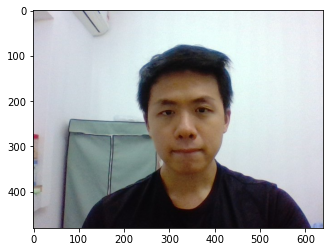

In [3]:
img = mpimg.imread('chuareal.jpg')
imgplot = plt.imshow(img)

In [4]:
DATA = r'/9j/4AAQSkZJRgABAQEAYABgAAD/4TDKRXhpZgAATU0AKgAAAAgABAExAAIAAAALAAAQSodpAAQAAAABAAAQVoglAAQAAAABAAAgouocAAcAABAMAAAAPgAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV2luZG93cyAxMAAAAAOQAwACAAAAFAAAIIySkQACAAAABDIwMQDqHAAHAAAQDAAAEIAAAAAAHOoAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMjE6MDg6MDkgMTQ6MjE6NTAAAAAAAeocAAcAABAMAAAgtAAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3xQ56kHnOKUSDJ9QaiTI9d3tVhVHAIG49ec4q9TVpIRkJPH1HvV3T76TTpllQ/MOx71XVcEknG4Hil2LtGD83ce1PVBY9V0LWk1i2Vx99QFZfQ96244wRyQc9xXjul38+lXQlgfaemGHBr1DRdXi1K1WRCu8jDLnlW71tBtbEtLoaTqMYxk9M5qN1zGSCvHFO4yMkeookwQOfyNbXMWZ0irzk9OtVJo95IHzZq/MB1A475qBl7gAGquTdnL6tpn2qMnJjZejDp+Vcyg2bw5bOSCv9a9CnhBjUZ46H3Nc1relsDvRRnrx3rKWpUZOJjLxnFcT8W/h4nxG8I3OnK6w3S4mt5OflkXp+ddsjc4APf8KftGDlQccYNYKTjJSQ3aR5V8CfiFca1p83hrW4xZ+ItJ/dPExwZUHRhzk17HG4YKN3PcDmvCvjT4AuLTUrXxz4djMWuaeQZ1iUsZ4u4IHX8jXpvw78b2njrQLfU7XClvlmi3ZMcg6r9K1q2t7SPXf1Ji3ax1pQ8OASV7eoqjrukxeINKurR8CKZCpYdVJ6H8DWhEwyecE9sUYETleqMeNvY1ipaproJroZfwo1yUWdx4f1FfL1LSwI19JoOiOP5Gu6ZeMnkiudtwLSfzRGiserYwcV0assyq68A98cGt5VOaTlbchXic7rmpSW15AqnKAbnU+meta0OdvT5vQ1xXjTUhYeIR5v+oa2AYgdPnauysGzCgJ52jPvWUtzpcfcuyzs2Mx6e1SR8k+1SxxAjp+OalEIABIOf0NVFW6mNh0Q9h71chiDYwen60yMDggKfarSAL1B6YqhMcgJzntU6L8uSM4689KVFxj09jUiKY+RwP50GbJY03qMYHOKk27RxnJ9f50iM2O/PWptpJ77u+aepDZLFhlXkVKy9VGCKFX2zjFPXD5yNzDvRqQ7dSPO3qOABxUsa7STjcOnHek8v2LP607uMZIzgii5OnQeiiQtnG7GfTAqULjbgFjmlWMrwVLVLtbcCuBj3o5n3DlI2UBSBgnGcU0R4HuKk+647g9qdsJbByDjvU3YEZUdQdvP1qVPmUcg4PakUkKOoK9M1KFJUlgPX1ovYfMIFU9eeP1qQR9iRwexBpFjLeuF65708IQQRjA9etFxOTEOElwACe9K3y5wCcHn8qa6OzB84HYmlGcFd3ORnipYc1yWNchj6dzTDHvxnaMcnBpPMJyAOnoOtOKZ+U5GO+OtLUNyNkOTgnAHrT0GSGIP40vDkgggjr7+9C85AyP60XYrIf8AfPPH9KbIuzAY88fjT2G3jG79fxpFIkIwASPzpXY79xGONoGCMetRSjt0z+lWPJ+XnGaZgMx2hSKHJl3diP7qDkD680MQehJLHj2pwXOOM/Wl64ABH0HSjci7FVSeBwe/PSorn5dwx14zVhQhbuMmo5F5YkKcetKw0+jK6oflzyO5zUu0bc5PynjHehV7japPBwODTyvTH0IqtSxo4AbBx65pgjLLkkjvkipNp4BAwDjOaldjg45H8qQ7lCRTvOCSQe1PK7lycgngZp5BVj3z+lNXL7txIGcrxRcoAvAORyKY8YZMEE89qkUbiN/AHpSvlVwOPr3p8xVyrsXGMZI7Z60sYBAz1z0pzgt04wOw5pE6r1Y461d2wuOZCwI5PP5UmCB8gPUjrSxlt4BJDZp5zgEtk+lTdoF5leWMk8nAHOfU1C4w4BzzzmrHB3An5f60m3dIQDgr0zRzM00GqflB5GCB7UnOcEsTnk4p0mOqjPtSeV8ueAD1FG5UXy7DZGMbZBzjv1xTCWk5UjPqakIARieR24qL7wA24+posi1J9yJo8k45GefrUm1FAzj5ueDTNvmFgmNxHHPWpV9RzmnqS7AwC4C8gioXQgZz1HHrUjLtyR1A96YWdkPmZAXJx7/SjUcW7keS2ACvHXNJsG9gCcZ79CKe4UjgflUUmRtwDjPc1TuzbmPk+01J0YhgcA/e9atJdPIu7Z83Tr1reXw2pIB2gbsgVowaNGmAEB+neueWmwaHLxfa3wfKyRwSaupbXMq8xt1x6V1UWmqpzsU8VdWyAUZAOO1Jc/UrmXQ5KLR71peilTj3rrPCmkz2V+spf5cFWHqKtxRBSvCnHoK2tNhVWycHjNapNEymrbGiScg46UH3zg07jbUeTnAORnpW6OVkcqjyyQCCaqOxA6cdOtXzjHPXrj0qvPFnB9qpCaKjR7h/nk1WurXzMdKujqQSDUZBY+n4UCOL1nS2t5jOgODjco/nVFTv6cD867a6thIDu5J4rltSsDYyFwp2E/lWcoroUym8IkRlxvVhgg9CPSvBtZtH+A3j5NdsbaQeEtWbbqEcWSsEhP8ArCPzOa98Qlz1wccGs3xFoFp4k0i40+/hW5tbhdrrIMg9cH6j1rJS5XZ7Bdmrpt/BqFtBd20qz28yh0kQ5BU9xWnsD5znkcfWvnz4aeIL34WeLZPAviCUjTZG3aRfSdGX+4T+le/RuTwTkg1lKPs3boVe6uLuLgq4G5eRz29a1dNuT/qm47jms5174G5efqKerHcrjg56DtTTRBn+ONG/tS2kA4kICqwUblHXit6wUhVzgFQB/wDWpk6CdRcIRkDBqe0Zs9OlarXY3dS8UjTgj3ZySTirKY4AwMVDCCQOcGrCA55xz6CqMWTKuWyMD29atohyp7Y/Oq8KnPXJHrVyJg20c5Pp3pambJFjyBngdal8xVAznn1pI0+UgAcc09eccZx3p6kk0Sg9l3etTcy5DemKjRNxweh7Hr7c1Mo6Z+UdKohkqIAgGMe+e1SBQRyep60o3bcYwG6EjqPaj7+AMAdPrUmbYrREqVJwSPSnxjaecEeuKRxz3z0xmpF+Y44UCmLQlX5yG3AH3NLtO7J/D2pVj7ZOMU9WO1iRx70guMVd4YnqOlClnI3Hn6VJuxjuD2xkGm88DAGf0pCuMDYznnHbNWP4O/zY4pjKOgA+X9amXBDAptA/WgY3HmFVJqb7uA2G9aYvHY8VK209QRn09aTZJD5eZGYA47c9KcMsVBA7mjaRycADn2FIMltw6H0oBNIXeNy8Z9ugzUjNtU465piwkMGPIPPpiptoJwAAOvFQDaIPKVgcbgW6mnNGBkIM49e1OZg3GME03YX+XrnpTuAvMfJ6njikXJYnJ49BUnKtg4NO2bhk/KO4pFEW3buP97rTYc5xyO/FSkH5j1H+7nNR7cdyDnt2oC7EMnc5LelGDnd0A9+9Hl/3u/TvxSkld3GBQMdynGMlfb9aZIeobkN0p+CoGcdOvemNt4OSMcUDEDdR/Dn8TT9g29Mg9cnpUbOG5GBT4XyWGOBnvnPFBV2B7Z5A46YzSnbIhBHyg46UYJ9dueB6GnFTyGGB9M0CuQGHytxByo/lTfN+XjkH9c0u0KcHkN2x1pc7DwNvGKS8y7iAByBgA0bQT1xjjFKFG8AEbsHt3pWw0uOBxkmq9Au2VmULgjaT0zSjMfJGSKWXAwMDbSx5XscMcDuKLj1uRq7yEHn8eop+1WY8gFRjGOgqQglX3nH0HNN8ovgkY4BOTj8TRdFldwSSu0BR74pFADccg9x2qV1J3Fxhge1RgHBAHQdKehaVhyKqdAWwOtRFT5mcnHbNOSNiM5+X2pYxtGM544Pp+FUtA1IucnOcjn2+lRyfeAGMt04qwxLMeTz97PSo/LIG7sR070XFqRL82eApX9KkRFfGOS2OKiOVJ5btyKcjDaQOFGelVa5abHrle529Mk9qY3ygn7xY/iaVXwh7sp4psmNwCgZYEnnODUamhGwLE7TgKcnnIqNk4XAyeuTU7LtU5ADAdvTNQkb8biOR9KLsdjx+SAEk8L/hUsMAYfUdu9WHjK7ujKB0pdoHI4/nWvKhXIQoUk4x+GasCPO0A8HmlVMBSCctUiRh8cYI4JosNvsPhRAVJzhRn61pWSDG/hs/d57VTjQ8EgLnn5a0LYYXOMZx+Ap2sZu7JwSuMZB/SlVTnjk560hYhjwCPelUlWxnk96Cdh7c9cccmqsvyrknr7VYOcHPP0NMmUYyQee3pQK5TRlAPHJ6GmsvTDE49anUAKTzx0z2prANk9/pQFyu64GMcniqF5aCaNgQTmtPB53D5RTJU+UAclu3amScFc2ps5iMkr2PSmjpjBJ966fU7ASx8DbzzXNTI0DlG7dzWEognY4r4ofD238daBJb/LFfQfvbScZDxyDkYI5ANVfhJ45vdYtZNG1uI2+v6edkqk/62McBx/Wu+3Zxn/8AXXmPxR8I3lreweMPD0X/ABN9Py00QH/HxF3Dc849Kle8uRjPYYpeO556UvTJBxk1yfgTxvaeNtCh1G0IAb5ZYj1jkH3l/OulW4DEAfjWfK07MNOhp2E3ls0TH73Iq9Yrk5OeD2rm471prsRRjcF6v6V1GmQE9c8VrFWFdmpCnBOME9qnT5WwBkY9KSIYUk5z9anjjO7+LDetaBcfHGeoIBPerUUe45JPI/So0XAHJGO1To3zcDJA6+lAiQA9ulSx5C4wKZnIA4PHT3qTJ6EjK880GbJVz0wT6nnNPXL8k8A5AqAH7xPBb0qxFja3H5880WIdyyo24I5J680/O4AjgLxj0qKIfLkbs1Iw+UEcZ44HX60jN+Y5R2IyT79qkj+XPrnGfWo4xnnGWHXmpIyMdTjryP60BoWFBUZzn69Kc0Z5BOVYc80xMkDALf0py78gY6e/Wp1B2RI/zdeNw/P3pm3LDkHPbmpewx0FMCnsMLjP/wBalqRoIBiQhj+Pep+3BZuajA3EY+XGD9RUu1ly3y7e2OpFK4Ccue3H93vT8MvJOPxpOMDsenNO+YbeM+rUXFzLqJkOT8ozShe4OfUelB56jaezU7cq4JGCeN2aQXQeTx6898dPwpwUKoxyT/Kmv+8XgY5yOetPwOP50DVnoRP0P3uKNuEDnkgfQ05gBnptxyf60KoZj1oG7Arl2ABBUdTil38csfakKDPHQdeaTAjOc7snHHNPRhdjypIxlcAc+tROuWyDkdQPapcAAA8gj8ahZixwE4HB65pD5g+YAeg7+hpWMkg29SevPSpByrJtAGaY25OB1788mmMcoIPOd2eM1HMN55JGfQVL83Bx7YPSglf7oIoKuRcBOQOc4OOlIgJUYA3nqT3oIGFPQd/rS8Rpt3ZB6+9Fw1lsLGSecdD0FObe3PJ2j6c0YGMYA/2iaN2zI+U565oL5e5GexP0prKOg3H1o3BmxwFI7dqTDMy5YYIz71Nh6dB4XBPONvv19qUbj23Ke+aUglRtxuzzQQfLc9qYyu6bCDkHPWkyDtGG4PIxxUgbKMAcjryOaQKPmYhsjofQd6RpFi85J9eRQTlgM8N/Ok+/0BwvBJpdo9G46c07DIJMfUZ5FRg8Dk7e/HJqWZP3fPG7pkjrUDA8A4AA65p2KUh46Ed/rTTGEYNgD8eaFUfLzz3zyKMDYEAJZc8joaoXMxxQ5OeVb17mo58fLjcSPTpUgco5GSduDzTZOQenBzxQVch8pY23YxnnA5p+QVBAAxyQOtJ8qZBbGeTxSRBcMSTn86p3KuKylWXrwadI4+bjAPTjvUfBQ5yyrxgilLlWIc5Xt3zU7jvYgyOQcsPakGATznjof50+fjkDgDJz2qMhmxghB1OOhquVAnc8vYg4657cUwA7mGTj86lYBivBz605UAPA49q20FYAu7HXjnmpVU44GSx5NAGOM8DoTUkY7knA9KVyx8Y+6Rk8etW4G2DnJyfrxUEJGcDAJGOatL/q/TJov3IJNysOOcHNKPmBA9KjXYzAAEleN2OadgK3fIpaEuQZ6gjP+NNbGBkk+x61IuByRnB6Uj9cflmkSQ7Nygk8e/ek8vuOg9qf9zAHOOvWk+90707kkLdwMqPamMSxUf0qVs9Ofl5zSH6iqFcqTR54GfTIrB1PTxMgyPnHXPQV0ki5XIO0/SqVxD6/Nn9akLnDzOkD4chdvUk9ajm1C2dSpkUgVq654fGpDqUYHqO49Ky4/AyLtVmkweuKxlDzKTZjafZ6Rosk0tjBHamZtzrAuFc+pFbVv9q1GQCJWjj7vgitWx8I28JG1MgHPPOK6Kx0tIvlAwKz5WW3co6VpSwIBsOB19TXQWsWFwOQP0FOig+UYBqwiZz14461pFMzY9RtGO/r61Mu4ZIx6ZqNQWIPbNWYyR0wSaozJI13Fc81YRPu52jB5qBQTyQcVZTPXrkUwA5PotO5Jz26c0hOfQA/lUi4LDAHvRqS7Dtp69SOw4qdFOBnn61Go5yRn1qeNdoGDkfyp3I0JoyF4JOev0pWzn1zk805QWXkZ4/OpSoOGOCMdPSkToMjUjJwp/HOacvzNkkrg4FKRlAQODxTo8jPBPt1pEuxIhwWIxzzUqATRnPAXp2NRxxt0C5JHpUpA3AY57j0qTNgIjuXBOMcgnpSNnJAAx0BPapZPukgd6iOcDAPJ9KLsdxVGCOeenWpd24YKs23r2qJcfK3GDj8PrUu9egwR79DQK444Cnk7j+NP5xyc8cc9aYMsuCv4CnKTkEqDkdu3tSGrdR3zHGOAT+dO4b7xBIORTVyqnjpzzg0n3m4+XoSPepBtD/u4xznj6Uq4OScj8SKYMgY2kkHJ704ZJ+o5oErDm2txxg0KoUD0prAjgA59RSY3MMZzQMkwd2f603ac5xj8aVflUfxf0pW785z60hgeQMnHrzTNvzZ3fjTlXg9x70jIdpzz9TRcFcX+I5GQP50nHJyuR1pOCq4woz6Zp2PQg+lIrUVicLxwRzUUg5Bx34FSctgED1PtS8Beg4PHPAoKuV2UMT1NBx8oxwBjNLkCRjnGafGuDyFYEdRVDWgvy5AwAF+YUjevB3dM84pWHzEjAJ6UhUrHgkn3oHchZFRN3djzQNrKAR0PansNwwOV5HHUU1VAYDOAO/vTGPWVTuH8XJFJkhAD6YOKeCq9Sd2OMUnD54J9agfMQbhEePTr0pFOCMlvcZobIZRjAB9M1IBjI+8T1FMaI9w3HAB7H6Zp2MYyeMdfWlZFGDnDd/SnMDkYCgDjr3qkWtdiCSMnkdun1quw3Z45xjIq0+4YALZHOKhxuTGCc8UXaGkNXeMnG1D1OOBS4/iAB9ARigoSOTznAHrTznbjJ56+1Vdml9LDeHYkduDUMmVHydzjp0qUYUN2Zv8KbKp2oQD16+lFxqNyJ8NnkHI5Pf/APXUarmRTnAPp6Yp0hOOm4+3akVe/OOuBQmyrDtpww4OTjNKfuuSoKg9+pFK6PHgA4A6Y60n3uu4saBlXCvwQ3PTPWhsrtHIHf2qR1+YjJJ757U0SHaykkk9eOtPQDzErjgE5FOjBC5J3AjIz2o2bn7naOtPDc9OR1Fb6Bdjwgk5PWnqvX7w9fWljA5JwvsTjmnKOcHO7rkUhczJVwpGcnvk9amyMDkiohklQQPT3NTnG0cDIHpSFcQMAxwDubvSlwW6HdTVzkelP2jOBnsPrSdiWIMnABJ4/WkOe5Jx+tKD2xzSbc9wKehA/lQRnrzTBheMZz6U8EnAPJ9aa2cUihH6kr0xzUZw3XK/WpGUDBHU1EzjGMHPsM0EEfDAj05zmoTnqM4qXaRx0JqM7VI5xk5oDUrtCPMqQRBgc449hU6YbpjPvS+V83JOKAI40CjgYz1qePB5wSccUCPnrmpgoBPvzRYBVAK5NKPm4AGT19qUA4wRkZoHykkYHNFhNk0fcErxzU68569MioFQ4796s2w+UhgM8dqCSVVyuRnOO9TIDyMnB5pkYGMHr61Kn3gDyM9QakliiM7euAPXtT9vcUYBOCGPPWnD5V6j8qCGx8YaRRgdqsDAUZB9+ajTA6EK2fzqdB0yA3v607kEqKBggkn3p3PIA6jOO9Ni+bP3QT0OKfnkAfMQP1qdSRysMDGC3f2qaLcDzzmowAM5GWYZNLH8zAkkkdqkllgkberDPQ/0oTDkcYpqBm69TnPtTxGxOMjp19aVhByFUg8ZzTW3O5OcgdqlAG0DA54zmoS3JUbSBz9KBDovmyOV+tPYBU2jK89arrOCSCQB3x3rjvGPxZ0bwfbzKzy300edyWwBVT6M+cCqV5OyBnfrgckgsfQ0nmBfxPUmvlrxJ+2ppHh+OR5rK4AHeNo3JP4ZI/KuZj/4KDaQib/7HmdR03zxZ/EDnNdKwlaSuomftI3tc+y/MJ7g56Uu75lJ6/TOa+V9J/bs8O3m03OkXtqD8wwysMfnXd6N+1j4D1MgT6o2mEjI+1xbM/Q96zlhqsd4lKcXse35Bwd544NHBwAST615Z/wv7w3eLu0q4S+Vm/1kkqwoT7bsEj6CrsHxXiu+Uex3j+FLtWArL2c+xpeLPRXHKAHk+tKM7gAeneuW0zxxbXkgSVGhfOGcEMmfr1rpopg6rJldrAkEd6lprcCfhTwM55PFDZb2+vaoo3zH15PQVJvA68CpHZjt3y8Lml428jJz6dKbwVOP50itjOcAevrSeoaoU53YwMYyT6Ug+51zjjgUuPveh9KTbvU44PcelSNC4KtnOWY+nFOb7tBPAx6jrTGbPzY4OKYyDqx4BxU8bBl24wD+FR7gOT8ppVxjHXce46D0qhrzJANpPHI4OaG3KvBzj2ob7pJxjvz1pvmYGAQTjnrxUl6EW8bnBAYtimhTkYbbz06igAk5znHp1pRjO3B49+avQeg8SMRjHzE8E9jSnkZ3t+ApV7AHORzk/jTdxYgAYXPO6p0K0GsNvOCT7npQMMqknJ5GBTXZucHJbt6fWl27MDFFhgEBJO3PsKSTHcZBG7mlbOQVOQRyRSthsZ5bpk9xRqL0YyRWLFxjnjI71VztByWIHYc1ZcELgKoJ5PvVYMZDjAwfypmi8hRkNjgBemDml+6ucsxz+VCqRnJx36ZzQACrAsP8arU05hp2ydOf9mlP3c/muTxScKoUkAn0z0psuQCvTB6jrTQ9SNgDgjp3pIsFShJBbvQQIwTt4PORSDBc5ycj8qditWPLNnC9V70oJ3Z+Uk54xS9GPOAaR0DZAwTigpLuyvcby2F3Z689qaXdcDk4OO2alfPmAHGGH+cUx+vA5AyPYUWK0R5kmeuMDtmpF55Gcnrio0UtjOcVOFAYcYNbWIuO2gg4zkcGpU5bjOMUwghcDPrkU6IYC7idx5qQuS+hyTipZCRt47VAF+YMOnuakaQ9M5Oc0egXHg5TjcSPXikYgZ6npx3FNDZxjinKBk45zz9TTJ1Y6PKk8f8A6qVjyB1FMU4PPXHoKMng43etIkkTAyOnejbg8c/yoVsAEnrTXO7oSaAG8gHGAT0pB8p2nBH8qVt2cADmk+bvjPtQJkbJknOeD+dRjC9cZ9cdqmOMjO3AHGOahb7wJ+YH0p2ZmOjyHGAAPQDrTu5OM05Muc8jHelUEc+lBTFXAwOhNS7N3PvTdmAucc8iplQnI/h7GgkUIflGaAuWyOT6Ypy5yMA80oDbzxyelIm5JHnbzjnrjtU8YznqO/1qMKTwcipI8g9DigCfG7B6Z9alHy8ZwOuCKbGTtxnPpn1qdMlR0LDpU3IbE5554Pr2pAvIyCe/40rfL26dqWJiTgnkn04ouQS8cDKgnuamGVAIwcCo044Izj17mpRnHTbj1702Tcni+YdPf609B1YfKfyzzSD5VAHXuaVm3Djdge1TdiE7DNSR4XGCQ3QEVCHeTlSuMc5FKp8vuMmlcV0XI8Ng7sAe/WmvcgOcEY7Y61m3N7H5qoG+6PmI7VQ1rxjpHhvTLi/1O7jtLWFeS5ALewzyanXYR0bShjjg7eenWuC8f/E3w/4BjeXVdUgtCo3CIuC7fRc5r5Y+L37as+64ttAI0u0OVW4A3Tye654A96+QvGfxZvvEN29zNcT307sWa4upNzqfTjivToYJy1qaI5ZVlF2WrPrz4lft0tcW9za+GrQpFnBu532uAPT0+tfKfjL426rrru9zqMzbsnyomIGTzjI6/WvL7zWnu5TJc3SyPnI3EfyrC1HWBKWWN18wd+grtl7HDr3UOjGdZPmOkuvGguiS4K4OfnO45+tRL4pSSTGQh7HPU15/dvcyliCw/ukdCahhS4dyS7BwOcmsXi3bQ7YYVR1Z6UvitYJAplSRjkYYZrQtPE08xIAV4gPlz/Ca8ghu9sw3N905zu5rWtfEotSNkgJ5wH7/AIVP1px3Nfq8XsepDxJI8Klg6TITwHbgfXPNaNn8TLmxkVEvbm32gfPFncOe7V5TD43iuZAjoyurFTgcH8617HXraU5VFdscq3XFa/WkzH6r0PetC/aC8Z2M6GDxFcTRxjCrcNktn3HNe4fDn9uTUdFKW3iJBcQMRudWyVPcjnOPwr4Wm8QWsbLhJPM3fwKfl/GtKx1hZcvhihX+I1op0aq96JzSo1Kfws/Wrwn+174M1CFHnuQkbcZjcOV+o616j4c+KPhrxRGDp2t2d27Y/dCVVcfVSc1+NGi+MbnSSJ7KZozGNqsOqit2P4wau0schuZpAGGVZUX8QQP51zywdGp8ErEutUgveR+0yuAvUHI4xjH50M4Y44NflF4P/bA8Y+EG/wBD1O4lRMfuLj5kYfTHFfSHw2/4KB6RdiKHxbYSWN1J0mt0JUj1PNc08vrR96Goo4iEtJaH2eAQGJYjvTwAy4PXua47wh8T/D3juziudI1a3vI2GTHE4Lr/ALw6iuviG7k9682ScXaWjOrR7DuvoffNI2T2OOtKWVeFGB/M0N90fyqdBkanPRQeMMaU8OmB71HG23IwVHf3NSrjqTzTHZjuGbaVHIodTngA44HNIMAZB3evvSbmX5scHmgdyJV+Vh0LEU88NtIBU++KRm2qxHCex7n2pmdufvE55wKZSfkPgCqWBB4NSc7cgFjnuKZjOTnPfgdacMjpwBk570maIim+Ugt1PG0dqYSMqCM5PU+lSShTwC3PcUm3Eakg+5bnFJAIAVYHChepA60rY6n049hShjswo3cdfQelRsDjByW7j0pit2EkJ6jncPvVXkxuHOce9WcMFJBXGADVfqMgfxGrsVG40tt2sMkDjGD1pxGeeMg8+x9KXdliecA9D3pWmHPAz9KNTQCUbH3SOv15qK4lDBecZ6nFSKRHztyD0qMqHyCBk84oKv2IycR4OCc8DH60KAr5JyF6n1o4DEnByeF6Ypu3gBSR35OKu5RIQCdmDhgc0m3y1AwPzzmnRhZctkDHH1NDDcAQMkD1xkVFxpshONgJOzsOaiyy/KGI3c0soy2OmeuaZj5wQwI+vSrTRWp5uncj5T2zUip5mdxbJzRGM9uvvTy+0g5PvWrC3VjgQMgdfSnLyee/cjmkXaWxkgnn608Z6t3qR6CqOdvOetG4E4yenJp0ZDPnHQUyUE85Byc1WhDJAcgcnPvTwO3OO31poyWGcH6VIu0KevHOewpMQhXdnnAFMUkHBB5GBjtUjdOoAPv1po3Y75pEajtnygHilXPA4yaXcD2pA3XqcHkZpXARc5OR070FScEj1zjvS5G7IzS7i3AHTr9ad7iIHXPUY/CkPXuvHFSb2PGTk+tN2ggZLE9/amBJGuASDx6mlxz7EUQ5XJOCM81LtxggYPpQJiBQMZBJ9PapOoBA/CgfTGKfwdoJweppE3Fz8vGRT1+ZiSOvApFQnvToozgH1oEPiTJweCPX0qwuGIA4I79ajVQdwHBH41Io2suDkEZqSbky5bByeKcAVHJ96YOxGTzUw4HJwf51LJbDzGJ6gBvSn8DgUD5uT06nA6U6MqVAAGOvSmiLksJHXv069Kn3dB6dCagy20MVBJ9KlRTke/v0pu4h8TlmwMZB/P3p82FwRkcevBqvtyuUO1hwT71Ru7sqMuxwOS6j5RUk3JNV1m20y1E88nlxqMn8O9fPHxH/AGrPs88uneEtOl1S8DFRI6kqCPQd6qftN/F9NH0kaTaT5FwCZrhBuxHyMD2JGPwr5Jk+MMehQTQ6Si2ckgIa+nwXGeuF7fj61206SUeaSv2I3dj03xp8avHNrbNd6j4juNIlY7vsUTKGOfYDgZ//AF15P4y+LeteI7T/AImOu3F8dp2q8gLLx2Xp+Yry/wAW/EK41GUFrmS6llPO0ks2PQVz76hqEkYMNgIHYZaWdvmUntt9f5V1xnFK7STGoNy02NTXNWe8VjJMBtH8Z+auM1TWIk4RwznrzxUuvN9pUEyASLzk/wAq5eeThtjxKRyxl7/SsKuLlayOiGFg9eo+fUQ7lWcFeO1Umn8oycB898cVXW7TdhwsjdAe1Qyarw6GMIueMdK8upWlI9KnSUVoXG1eVCgRExjBBzk1SvppbtyScD+6DUH26BSCV3N65pRqB5YRAr39qxUncpwIRauMbgwz0rSt7qeC2ESSuFP8PY1my6s24FABj2pPttwxUu+QvTAHFbczZNrG3awecwZwwA4zVyO6ksyxiiY7hwfesQXTvGSZmXB3cHFWF1dyFLuz8fjSlJgzZGpTTv8APgex7VoWV7KFZpiqRg4brn24rk5byCXq7K/UelSR6xLDuVX3q3BNONRxE4roeg2WsCBQh/eKf4h2rTXUMR7sEemO5rz638RKFAI+UDkrzWpB4ggZY9/mdeCo6n0NaKrLoYSpJnWLqT/KUkVZCc7HBx9OK29L8QyRN5k8XlhSNpB3Z9fpXDLq26J3iMe9T92Q449qy7jxDdpFtEgKMTwf4c9a76OJnHc4qmHU9UfRfgb4wXvhLVI7iwuTZksDiB8Mx9MYxj1r79+AP7Tdh8QrWGwuJ5LfV1UbobqTiT3U9K/IXQNUf7TC92ri3/iIGM/Q9M5r6G+ENxJd6vp93oOqXC3C5AMsYRkwRkf7Xbiu+XssTHlqbnNGnOmz9frK+W6B3rtf3NW3+73wK8Z+B/xKn8U6e2mauph1uzAVmICrOnJDKPXA5r2CNifl5/A8V4FSn7OTizbcnDnaBkMevTtR8vv7e9RhiYiQfrx0FSfmeMgVkxXdhyrk5yOegokG7g88U3du55Xnv2pePLOTn3NIZCykLwM45OaRmLkHOAF9KcXOOSPTikGMfxY7f409TXoPj6At35x6UefuwjAE0Mw34GenOetIjYyxxuo3KVxhJ6H5cdqTl1G04GTx/SnSZ3gsMBvQ8GmmTHAPGelMd31FjO1guNxHb0pWXYGZstu54oXlHPr60SEjCgkr6Uh3IeWzj5P51HtzjOCyjr70/dyck7unPSopAQxJAz9Keo1Ji7AWBLnnPFLt+9wG24qTeJEU53MMnmmMoC/M2e4p3NbDdg3jkk9+/NRzY4A3K2c9eCKsNGeTk4XHSoZfuA8FuhH1p8wFc4ZycE4HBobJUA8BcUfJjksMcGkKYxgFtuTVXQEyIjIe3t60om3dSuB147VGp3gADBK85HaljKeWAWxtPGKm1y7NEdxjIxueoVQhiQMdyKlbjkAZbrUbSFMnrnIyOtUtC0zzfeNucNjoaeMEHGSQelM69ieeRUq/KvGRWhYobkgk59hTiwOMkfXOOKVMHPzA7hRs3c7RkU9CLEqZVhgkY79aU/exlSx9s5qNc5JAxxxSk/OMYVh39TQSx+eeBjntUvbIPB/WolYjkn3xT1Ytjp/hSFcUqBz0OPzpoduOOD3pWJ2mhZMp3wKQmx46g+tA9OnvTTjkZOTSliMe1BPMGT16kelObDHr3pnUE9G7UDJPOTVENiv1yeo7EdaMdSeOeaUkH1xTcHplgDQO5NANy4xnnmpVXByQRjpRbIfLOOgPen4LHocdeKliDZ1IqQIOpOMUm71yPpUiITgdR1pE3DHoRxzkUu3v1NOji4A6jOKVcDg4/A0yW7Coihj/AHiKshPUFR/KoE7jkY/WpV98nH6UWJuSqoVeVPrUmwqF4B44pE6gZySM5x1p3zK3OKRIvGwgA7jSIpzzkAU7BXcSSGI6U4MGVegOM+tIjqSpjPOSM09mKqDwP6VVSQqxVgV560y/vorSzmnlnWGKNdzOxwAKYieVyoLFl2dSDwAK+c/jr+1PoPg8S6Vo4j1fWFyvy5MMTf7RB5rzD49/tDa14s1KTw94Vmlg0rcYnlRtj3BzydwJwlfLHjrWrDw4pSe8W4uWb5mhyR/tY7se2TXpUsLFe/V69P8AMwlKT0gXfin8UdQ8Q6vPfX92Wk2gMI/kQLj7u30FeMah4uh+1LEHkmZuh2/KB65703xBq9prfm+WispIUK8+xjXKjX4I7dYii4jPB6nrmqq1YxWh00KbWstTuYrh5EEqKu1TncFxj8aXU/FUNpGDhTKOm31rgbjxXczwiKJ2t7dc8qxG/wBjWPeas1wNru3PBxXmyq8x6MY9jZ13xIZH2Iw6kttA2/nXM3N8XQ85J6mqU9yDwrHBqpJuJ9qwlLmNFGxZN6R0yTUZlkf7wI9KiCle9DEjnJyeawKJWbkZzinNd/J5Y+6arbmPUEilEY5OeapD1LHnkDGAaXzicgHiofLI5GTRuMeB1z2IouNXLIuTtABwe/vU8VxuYH25rPMoXtTlvCo2jGD1p3uJnQWcq3UoRIQT1J9hVycW8GOFJYcr61yrXbKoAOc0v2+TAycYpbhodErIq58sdOApxTRfDcMZ4PAzXOveM5zk9PWlhvCrjOWqhM6S41ORQwQ43Lgj1qnDfPvwexBBqk15G6g7T5nqD0qWCUSSDYApYirTe5HKeu/CjWrM6sltrtvHd6PMrIybc7H4IbA5/wD119QfCn4fZ1iCG326fLJI09jJHjbMmM4b0YDH1xXyj8I9Fj1LxJb2lzLHDHeZiSWQfLG/OCfYnFfo3pvge7s/7OvrcWoMBjm3pI4yQATtG3GCMjGa6IzcbPuc9RHs/wAO9Fa6ijkk3QalaBY2dGwSMAg5HUE5r3PSrh7m0QzDZKD8wXp9RXknw/u5305bk23lh1GZkw/HXBxyePavWNMuYr2JJbeZZEYckdj6expVHd2OWa0uaOcEHOVJ7VMcSAFT7/SosEKMZODkCnqzLnAA9iK52ZDsE9QMN1xS8FSCuBTRvPdcegp3DLkkjNSN3IQ5GQpz7YpFfc2BwP4sdjTiNvU89iO9R+rZGAdpNNFEjMW2kD8+9NUcEkLlvTrSj5EGDk9enWkLEtnJ5PIpjWrsI0mccHIzn2qNQM5xgduOtPfHJwQD+tLnAUjtwaq5o0GShJG4j0FIZM8Yyp6e1ODttAyOmc1H8ynAyxIyeOlIdkJzsYjrUY+XgnqKl4GM5449ailRdwGGPfJo0LWggB6KT07Uokw5+Xk+3amfMcY59MGnK5ClSTyQfahD5rCLhiSM8dqinyThSRnqal4ZSSevLVCynGMDBHPrTKIh1znjPOe9P3gJwAcjuOlQtj5edhPAHWnJyMEcjoQKsvluTREMoAOCP1+lRy5LZwQuOKCdvzD5mP8ADnp+NP5GDjPOen6Uh6kKkA4JJyPlqPYCCCMnkfUU642gdeBz0z+FRSMVK9F74FUUjz1WznjtT/vcmo1JKjn3604Nxy2CeODVl3H8YByOR2p24r1JP4UwELwfw96FUxqADuxyPWglk0bbs+g6EjpTVODggAA8HvSK+Yyec5wRSDIwwOR3p8ork20ZHOVPSpM71xuHHtUA/T2HNSMoAyBj6UiWSEsAQCcGmr2+bI/izTTnAJPNNBOeDigzLHynpyR+lDEjrg460cYHXBxk4pWPXGDgUhWEIzgkDOOKVchuvt17UzHQZOc9utOGAuOevNAhNo3kFsZpVXnrmgjaAetCEjoKA0LtspEZ5Pzdsdaeylc89O/pTYmxFnv0NO+ZhQK5J8hyT68VJxuHFRx/wkk4qxy7gjAxkmgTG7tucEY9BTYQVfHYU8x9xnntTUQc5BGPU1JmyUAngnOOc1IBngdaYuRjB69faptxUknqfegkkXlxz0FS8dMkH6VGkihhkFiBwaf97kEgdeaTuIa+dwxzj9acg+b5sZ701jkgnj0o+6SSQR3+tBHUSaQQjMjAHr718x/tS/FS5sQnhjTZdiXCGS7lTIYpnGzOe/NfRmp+bICEBwOOvSvhz9pp/sPjTULqQ5hRY1WNc5bOQD/47ya6cOlzXkKSbjoeNa/r1lb2ywQljdOpUjso9DXkPibVUv8Azop7KGV0BAcqN6+wYdq6C91CCW9JeVSzFmZc5K9xmuKvriKa4klIPlM7YYHBIzWs6vvM3pRXLqed6oIpbp/L3bAOVPY96y5IvLbe+0Kv5mug1uxjspJFRWYOdyyZyCPeuW1GUlcErkcda4pyudqj2Ipr8M5QdF5FU5pmkJwflPpTI49zkCr9rpjSDA65rkbOiEW9jOEZOeMGpltmdiD6VtjRGUlZAAT3q5aaOFILbsHjpnNQ6iR1RoyZzi2Mm3dg46Gn/wBnuVBxwa7aPRkRcAZxycjjFWYtAHGQrbuw7VzvEROmODcnqcNHpzjAKn8uKmh0dp5AMda7lvDysVCg7T+dWrPQNkpIAPb6Vl9ZRv8AUTkofCvmxgnKk9BVK+8PSW5I2MT78V6lbae8agAAqp9ORTbvTUnJDozM3oOnvWf1rXU0eDitEeN/YW5G1s1BLZFEzyvPevWJvC0TShQGLY4YLx0rLufCT/d8kyOfYYFbRxEWYywdjzF4Dnvx3pPKft0NdjdeHjCSuCCDyMdKoXGiMp+QZz0rpjWizklhZrZHOhCDyOfelOeuMdq6EaDITnY2AMkkcVWuNKbyjjBPf2q/aRZi6Mo7oxV49eatWrESDnioJIHjbB4xTon2H1rRNM5+Wx6P4P1WeDyzA5SWNgyuMEjnI61+kf7KfxTj8aaLH4d1h1fV7VN0LsR+9QAdq/LfQZmjlDkFVPSvo34UeMJPD/ibTNTt2aNrdhIwDcMuOQfw5/CvaoU4VaXJI8rFc9OSnH5n6+eC9MWO32hAq7enTFdLZ2ohb938mG3HHf3rz/4LeJYfE/huzuY5WYzRRtg9Blc8V6mIlQcdu1eZO8JWYuZSJY36jPPfNPVurE4x3pg4IOAD9Kfncv41mQ7DlctwMjPQ4oOVjP50gbvzgcfWkd9gAHI/OlcREM7egK+/WmnO31J6Uqk45AB5Ap/VsHdvAx7UxgvznBOGA/Smdxz3HNSg9wOee9NVcydAuentSuaIbJ6nL5OTz0ppkMY24+nNIwPmEHODnJpSABjG49vWkVqOAwF5U9unSjecnJI4700fKBksQDwO+acciTnlmqgEfG4jduI7jpVeaRxyOC3pUsh4O1eD71GzDkH5j9e9Iq4zGOScMeenSk4UDd0PepCq7e5Y9c9vakV8sR/EfSmMQoGQgYOMEg1CVIQkjktnipWL5UZweSR7VFLl8dee2MUy0+pEoLKTnKg9DihtygDaCc/nQqlTnAU9vrSBhIWySX7YGKopNj0k3kjbjPSnb/LGSeDxj8KaxHyj8c0ihipOSoGeaLaGnMyIoVwRgkevTFN4JO45H8vpUsijyvvEncc+pqDdszkKc8/SkUjztcfdByPpTkx6fSo1IGQPvVIhx7nHpXRqDFJGcZ/+vQjDIB60DP5c5NAA35yT9aYWJgQYzzjaeR61Gsik9Dg56d6XO1T3pG+7kHJJ7VJLHKvIAYgds1IG5IzwBTI/QkjBz61KzBST2/nRoQIzbgCDlR2oQk9MYFMkyfx7VJFjvgHHrTMyRTwD601eDwev40ZAJxkg9KbkcHpUgS8k8HHrSNgc4PXt3pAvQ+hp+Dg9s0AM5b7wxj3p0a4YZpuQc85579qeMetMTRdjICDrk/lT8ngAgg96jjzsHX60HAI7GkSy3FzjtjoKk528BT9Kjj5QkZ+lPBxyM8UE6j1JXPIBIpMnOSeo7U7fuAGwe/rSj5uAOBxmgi4ZCLj5myc5zxUyHHPHPWmRryBkEdTUpYKcHJH0qSbjg2cA4JHJ460/GDycg+9NA6c9f8KUDPAHfP40hCZJyvOAeATSNIFAAyW9BTtuJDj1xSSKHPXkfypXJMvUbh0V25HYYGe1fG/7UulutlrTxkNeSW8aKxIGF3sSfoAPzNfZGrPHbwndjHVmNfAf7WXjf7Rd6gkTlHkK2rsrcKELfKPqevrXTRvfQHLlVz5J12b7WQ0W47m+ftxXAar4gnjBtEcCPeW655rrNZ1UWVk0Yk2sWyO3HpXmOqXCyTM6YIbmnVaTbOyj78dSS/16aSMoXJP1rDIeZ8nPzHmnPlsjqTV3T4uhKn/CvOlKx3whd2Rb03RjJIDggV2Wl+HRt3Mcn+lSeG9Ok3oDFguMcj1r0LTtBRQfMUN6kd68etiLOyPco0VFJnIDRFPyiLOe5HNX7Xw3vTldpH3eldnHpQXOFzk8Z61YTSSXGQAuOQK4Z1ZWumd0YpM5a30MbAoG8kZbIzVxfDYcAmMD37118GneWeANuMY71Z+wMApwo/vGuCVZo67nGtoSAcKCVHYdafDoBGW2fe45rsV05QuVPYkk+tLHZFtpb5QBiodco5iHRjncqkDGCDQmgh5CQoBP8q6yKweTIQqPTJqT7A8Odw/+uKj20pbGbRx8mgkOzcg4xtx29ab/AGAAQeTniu4Fr5uAUAT1x1FTN4bQ7CCTt+6orWNSTQaHmM/hxZdysise25elU38LROVDxKB3IXk16pLoQ5ynX86qPoxxhUbjpx0rRVpIxkjzU+Fwm8JCEGOOeAa5/VfDJuCGMWWz82wc4xXso0eTlG+cseMCoLnQghAIwfeuynXlvI5pRPlzXtHMLMQCu3PXvWFBFk49+Sa9x+JHhcfYnl8pQ6uAsg4J4PBrxvY0VzjHGehr3KM+ZXR5FaFnexf0uQRXHlOpKHgY65r0PwXrH9nahBC0S+TNuUuWyVOD2rz+3jLPjhWHOe59q6TSpkiuYzyNp9eh9a9nC1EpJM8uvrFpH6qfsI+MG17w3c6e7nzbGYKjbsgIRwPwGa+xY87Rk7lOCD3Jr83P+CdmseX49vrBjiG6td656My96/SCI/IinI9+/Srx0VGrp1PHpXcbdiw2G5BKg9KcGCkAgYPJzTYz8hyRjHakyDs4/pXnGtmSbSowTuye/Sml23EEDApZOFU/MT7dqa+fu5YkHmnYnUawyAc5AOenNKwcqT0JOfemDq2flGaTIZmw+NufxoL1HIhALKRy3NOPBJG4nGBR8vlqWZjjkU37rZBOMc/SjUtXQEjAIbDDrTs8dcADI7VFLIHGFyCD+YppmPRhnnkE0tRkq44JYjGd3Oc03cDtCklenNNXGBkMueR3peVzgYAOD3plIeBjp15qGRfXg+nrUisDznIB54GKgbH3iSCOOKZeg7Kg5B4Pt0pi/eJ6+mOtIuNxOc/WmhsA43A9eTwaNR2HsQ0i5z8tRyqMHoexNSZOcEBS3IFQSL94FjlvQcU7jWm5GSNhXKg5yCTShNjgqcN6Uz5MFmOD7cinJL905IUfTmrVy9B2NzKctk9jxzSAbs7iWwegzQMNgk8ZB605pP4QSOcn3ouy7J7kb58sAdT+mahZM4JBznrT+dhBP1GKMfL1OT19CKV2UkjzZGDP396kc49hUSZjbORtP6U4bmPU4H6VvdlDwSM7uCegoXrwRn1pqH7wLfnScE8Hv1oJuWDu25PJI7UyMEqQCQwp2SEGc57/AJ1GCeT3/OpZDuSr1OTgn0qYDGeQTjj1qBTnAPbvUm4/UniixLEOC4GTkCliUrnkccVHLngeo5zUiAY6jinqBIM9+tI+Wxj6UoORgHnpRzgZGQP0pEsWNzyOcg88dKcowDzj+Zphba3XknvTtw2kH5s09RIPLKvlu/41JklgM9O1RAbjjPSpFyp+8AKQMuIDtHbNIAfbj+VNXI5ONvTNCNggjp0oILaEHHPSrX8OB0PJqrE2RgYGKtLhehyTzQJioDjPU4pxYrtx0pMsNxyCBx160uMcgk9xRoZtkiY3dx9KfjK5JJCiosFwM9+KljXPBzxUkj4yOcj1PSnbh/Ccd6TzMcduaU8BRx68ikyWIXO7GT0JzSOSIyOWIHXHShT6dfrT/ukn1HIo0E0cd46VriyNuheN34eRc/Kvt71+Vv7UGupJ8QLm3Q7LGMDyk3ZBzn5/cnBOfev1Z8cS+VotzIBtIjZQ2Mkkj/PNfj3+0HerceNNWnIC+XJ5KR912jgH06mu/DdSZe9ZHhut3RkdwxYjJ75xWFNINvU47e1X7+QySMd2d1ZbNnj7x+lcFSV73PWpx5VoXdLs3unGxGcivS9D8DqyIXTzA+CBnp7VzngHTTc3iALlFwzP/d9j9a990XTIYIYyFXbxkY6V4uIrcuiPdw9D3eZmdpfhoWsCSAFv4QznJ4rZgstj7QGyetaq2hG4bflP3c8U4RlWJY5YAceteDUfvXPWj2KTWpjcAng/nVuJUSIKhyW/vVKYzPwflPt6VMtig2qCd2KwlNmiiVpYJJY8Jj3YU5IXjYEsGBHX3q/bWbxovYsemO1WFslDEcv3zjFcVWDk7s1TtoU47bcuRkL3xT0ibOOv17itVLUrgBevtxQtmxb86WvYfMQQWafKQMEdavRWYnTJBqxY2p3Yxu5xj1retrJJFO4YJx2roopvciTOZGk7siM7uf4q07PT5ARlclfbpXT2+hopDA8H2rUg0hBHwBnua6lGJi5HHtpIm+d0ye2aqTaMGLfL/hXdT2IRRgDOaqy2wZdpxkGtNCbtnGjSo4iMIBVG80jfJuCggetdrLao+WIP+BqlNZbhgDA9aakidTxvxt4Y+12M6AYKguvuwBx/OvmLXbF7W9kTgmNyuV6EjrX2/rumCWN0CgnBGAcdRXyB4+tfsesXsIVhtlbPGMe1ehhJbxRyV43jqcrDJ5L/ADHO4dfStbTZlS+jQsShYNz0NZYRZNqAjPc1e03/AF6ABSw4yRmvpKO9z56otD7i/YZv47X4yWiM2yCSCRFAOBkj7o9+P1r9Q7KZmVMszHHO/qa/HT9mDXjonxO8NyByMXKq4JwMMcZz9TX7C6ZOksUbgZLLkflXoY/7Mjw6ejkjTxgYzkZ6098MFHX6GodxJzgfnTwxbd2weea8ou7HtJ0O3BHYU12bscHp0pDnJbAYdM4pu75jgn/A1RY5mc/eOAOv1qNtxIJHzNxikHOQwGPXFO3Lxt4UnqTTGnrqHOzjr3pwztOduehxTPnCjBzT85K55IGOtK7L06DXAJHHWm7Rxxn6+vpS4GASSPrTGI4wSQMk/WhMpEgcb8ZwR2xTmJwGIY5qIk7QcEd81ICWQ/3f50x3G5K8lcBuvtUb/MNw+YKOOaeWORnp7Ux8N7defSkGhHt5IwOeOvWnK5GQvRegz1pEyQMHp+ppFRWyWPT39+tUVqDsPMySc/y9aSRv3ZB+cDp2pVbzM88DoPUVFLgbjtzjtSKIzkcA8tmk2/IFAAOM80B1KYxhj3oOUTjntmqux3Q/0C45Gc0M2wkEHkevSmKPlHb8adu3AZAbHtzRdlIachgBg8D8BTfmOcnd1yDSsp3ZwQ2O/emA/u85G4/3uKo0PN+WJAJAIpykA4xmgOMAgj5uD60IAy46Y/OrLFIOTknHXmjcGUcA9+tNxtPqDx+FAI6EYx68GqsBMflUE5ORTAeD2WiQn5R1wOOaCzbTk/rRYzZJHwBj6U/eMDkgg1FGfmPGSKkDZzxg4pWJY04eQ5DEL3qRCOgz+VRZPzc5Henx9jk807mbZMGIIOAQacv3sknHpUQ+YdeR05p4YjoeTRcAHynkkkU8OSowPrUY+uf8afjcM9hUiFJ/eZC4B96cDuIx17jvTMjAPNOVhx7+nU0wuWd2U75PbFIhbcM9uvFG4hR2J70u4cdTmkIuwgE5yQ35VcjOFz3qjF9wcjDdqtoRwDyAM1JErk3EmQx5Hr3pI+pw2Ae9MB9ee+KcvzAcgdv1oJsPAwGAHJqVCQvIJxyc0xflPPPvUm9h97ofep1J0FUgqRxz1py/MeP4aAoUA9OKavG5RncTzxTIfYAOQCME04qRg54HIz3pdvGGGT9aR84HXI7UiTh/ixqQ0fwnqF223cImWGMnO6QjCj86/Gb4yai13qd0drefLL5052nAck5yT/EeuK/V79o26uB4dkECtNcDHlwqpJUZwW/lX5JfFtJB4p1EA4hjmkTAP3jkZz6//Xr08OrRbF73PE8ruHIc4xVYI7SDjINWpxsY5OTmo7dA0p5Iwc15NZ6nuQirHrHwvtFaBkOSS3zYHUnoa9v0uyNvbqSMgD8a8k+E9pi3E4AaQHBGOo9vavbrH57ZHGeVDEHtXy+IknUaPp4JxghskXmR8jGe1PNrkDbgn16Yq0FZuMH1zVq1s/NABHArjaNEyhHbbmwVy3rV+HTjJyQQw7VaWNFx0J6Vo25iCDPHrWTibpsgtdLLnBA45+laUWlxqBuRSfXHWnRXSRgkEEbeKP7VWOTaPnBH5VLa6id2FxpuPuYwBk+lQ/Zwu0uuPwq5/aYzgdxzmqtzd5BLlcdvesnNX0EuZE8MIRiA2Ce3Sti38vyxgY9a5qLUBv3ZGR71Yt9ZxJyy5b360c9iuVs7SCUYUfLsAzWlFGJEGCMGuOt9VTapMgY4+hq2vieG1z8wB4zirUu4rM6qbTxgEZJ756VRn0woDjq3OBXM3fxIhtfkDMzHPXp/n2qsfibB8iFslh97acj2/wAmtlJE2ZuyWgAYHiqkiARHkk9x6Ulh4vsL/wCRyQ5Gc4wDV1ikjEoQyn86TZLOW1dV8lyB8xHWvlH40aMLLW5p9nySOTI3o+Bx9K+xdSsPMjbGeh6cV4H8aPDi3OmTu4ZZGCsr/wB0qc9fwrqws+SZjUjzRaPmJEPzFTn1p8Mpt7tCMqTgkevNLdhbe4YKGVScHjFWbC3F26EDcFPXvX1lN3asfOzjyvU9m+Fuo3Ed3ZuibphIrDtyGr9hPg74mk8Q+FNOlkJLPCjZ6ZOBn9a/J/4JeFpdStYbpyCsFx8wOdxTIOQB1Pt6V+p3wM0yWw8JWcVwjJLCiqMHKnAPIPoRivXxElKnY8KUOWo2erZKL0OKftdiTyqt7VCmX6kj1FWYty5xggD17V4/qFh3BwpbgADOOlMyEycjB9qVpMFc5yx7cg0yTjJ4IHTNGo7IYzBsep6kdKdJIuVDc5HYcVGDglSSFI7dqUgdSR1wMinsTZki7kGSRjJFKGDE5GM+2ajjPzdW7ke9O83jbgf40Fq4PtJORk8fSmFMbhwR70m/djAPGfxqN8ydM88mmVsStyuSVJHQUqkqPmHyn0PQ03AfqSAB6UM3XGSowKpmqHO4zgBgT/FmmPnjke49qdj5cdx7VEW5YZyRzux1qbDI/L5ODkdPwoGFbBO7inAkjIxj1pGcrnrirvYV7jkXa/DAKf0qKY8bnGTn+GnpjaSTjPT3pvJBYYLfzqWUvMhUI2QCcj1p424HJOPamsTk4C5I6gimnA64y4prUvQUDdluF9icUeYqHdgZ6H6Um0YGfxz2pS2WDYB47jpVWRSEZwxJ+bIz361DIdoVSdxHqelTtlfm5G3PYYNQELtJwT17U9B6nnC4bH3cD1p5OeD3pi5zyOM9cdacG+Yk8E9OKs1DI6A4I60qAfMT9abvGMjv7UA5fHSmS/IlZs8+3FNDlhgnA5prMFcnAPp7Ck3ZUY60zFk4bAPcUCTC5547GolHPc+gFOJzjAxQS2x24EDHWpRlQB8xFQKe+SG7ipFcjJJ4PQ4pXJ1JwRnnoKTcewA+tMDHpgYPIzT2wfYY6Ug1HYG0nIyeSBTgw245NRL82cZp6sD0OcigNRQctkDAIp65LZ9OOKi3nJIxjpipI/8AWgEUCZaYjjJ4pVySccimtjcCTyKEIyOQMjmgRfiOCoOB/WrQk3A4x2FUoSOD+WatZORxgAelSRclUHYep96Xjkk4XpUW/HXjJ70o9MA/WlqS2TDLdOw4qZCVbkc+461AM5yD6Yp/mEE5yMetBJOGG7lcd8jvTg33Sc8j8qYGBcHIxilLHJ2AY9+aRI4qu8Z4Ye9K/cgEetRhiCTkE+/apVlGTuJ5oaC54H+0bcGz8MzG05uZWMQ4Py5B5J9uTX5OfFWykttWuo7gESrKcs38XHX2zX7VfEDwqniKzmg2rgqSWPYev161+TX7U3hWTSvFWqPFH/oZvJEWRsZYjB4HtyM+1d9GSasaRjeV2fMlwpMjDqM022j/AHo5+bNWLohGYY5z6Vc8KRifXLdDH5hJyBjPORXl1pKKZ7FGPNJI+gPhfZfZNNWIkbVO7HruFelL8qDaML0rn/ClmkOnQ7Rhduenetm4u3iYpH82RzXyFX3pNn1GisS3msRabGrFxkDkViN8R44lbOQq5yR2rL1mK6umUuQgJxz6V534wcw4REkYryWXIXPvWSpy7ijq7Hcn4wWqSEfae+BlN2fxrbsviRaXcSu8wh9mPJr5qZZlnYnOTzirsc9+oIQyfL/Dnj61tLCStdM6eaB9OW3jKK4yI5AyjjaD1qdPE6b8h2dicfSvmOw1a9tmwfMjBOeCetdnoHiO7cLG7tt7Z6/WvMq4arDqdUeXoe7LrhdkHy7SM5Lc5+lTT6wkS5Zly3Qk9K84s9ULIo3Ed+epNa/23z4hwcAcn3rzZyqR6DcEbo1n5fvcHvmqNx4rg087yd/bIPSucu7gptJYgZxxXM6oZX6OcZ5963hzT3HypHW6x8X4NOwEDM3ruwPy61weq/GvVru4KwPsQ8cnOR6ev61i3nh57qRiRyxyTUEXhcZC7WbB54r1KVCFvedzCTSZYk8b6hNMd13JG7fxRkDb716H4V8VRaip33G5l45bOT9a4+P4dCUjaJHLckrjAFdZovwxls8SwRzIh5ZW5BPvxmu2NKCXukSkpbno+i/v9hWXaSOR612Wmz30DqUYyLx8r8ivPtDSexYCWN1AAA4613ui6hl4xuZvbHSoaXUxnG2x1tvm6hBdDGxHKk9K4b4meF/7Y0mRNo4+cHtx2NekW6RTKuCuSKh1HTEuoXRxkDj6VnG0JXMdWfnf42sUsNYaA5ReTg+uSCPwqr4eh8u8UqTg4PHfvXoH7RPh5tG8VQyyMN0gZSBwWBJKsPoAQfwrj/C1t5l7bOrsFDgv7DvX1WGk7Kx4WKioydz6m/ZkXyvElna3GYobzD287Z/1g5A/LP5V+mfw9tjZ6eE3Bo2YsuOgzjpXwz+zF4CTxroMNxGn+lWU5QYwdoIyjA+hB6j0NfengfTJtL0iC3uSJJIlCNIP4gOjV6tV6I8CpozrgpXBABz+Jp2/g9zjFRmX5Rjn3pwO0sTggj9a4tTDmbJGHA/u9j6VDIvc8DofepuCoxuIxjGOlRP0Y9we9MpNsTaX5JJAwM0jqB1b3waZ6AEkHt60ucbd3yn+VA2miRT8oxyqjuKM7lB5zntTCzt0Pyg8GhpDg4BULTsOLFZdzL97nOQOM0itwATgjimli+GyeOpxTAzbj/CFzzQabk+4LnJwD79qMhsZO3I6+9RkbiDzj+7nqKVz2HPqKNSrDuB1JbsM81E3DHk5bkmnbsHuOM1F86Pwc85xmkIeXbPB6DAFIfQgk9+TSEAEZG/PanHruOeQeKvQpDCc8knHXApjSHbwTz7e9PVw2QAQT3psjGNsAnnrj1paFEbtuzncc/8A16ZnAzjPbp0/GjlSASuDyM9etJuGCrbsE/nx1osaK3UcG6ZOdoxR537oBic9/ak3EAZA49B/OmMpbagYY7nHWmN26EjOAucHB7YqOHhWBLZ9M44pc4B6H1JpFIYYzjb1OOtMuJ5t95R1Y+9I3K4wT/Kk3jrzxSgjAJyT/KtCwHGAMgfSnID5n973xSDdtz05/OhX5AyF96dxDpsI54yM80m7ac5Iz/Kkc72HO4igHnLc4HFMhkitjnOQR+NNWQZOTmm5VlOMk9+Ka6BehycelSZsmjPzZ4IPvUu/5QORVSJgxJJzj3qwrdcY/HvQIfvztBPA9KcWA9898VEO3QHtS5DDHUmgknGQeCBS44xzye3aoV7g8H2pQw+hPamTckSTaTgDIFSxcyAkAVW3AnOSFqeNvmHGQo60hFsk4xn8aanLYbAHUUxmJAwOpqRG+Yr0FBLRbgx0wMirkfb5s/WqMJJGauK27kknHGPSpJJunoT/ADoC7Tkc/TtTJOVwA1LluB0IoJJQ5BJpyY3EnkHqKjyAF5Ifue1B4w3HWi4ifP4Z5wKl3AgHByahWTJBA5Pt1qQMM9QaQaDwcluQAOaeuQDzwagCkk5GfQVLGW45yBQQVdWheSzdEUM5B2+3FfnV+3B4TTS3tLOK3EzwW7zyMoGS7Nhcn6Bq/SJ8dDk7q8C+P/wUtvHdrdSvLKHnCRuFUEEDkY79fcda0ptX1Kiz8WNXsXt5m5OXO7BGK1PhraST+MbCOI4diw+gxyfyr1L9oT4Yv4N8SXSQ2ki2FtttUuAvyvIpO8/mcenFcZ8F9PNx8Q9NCjJCyscdht6n8cD8a5cXHlg2up7+EtKaPpzS9NENpEgwVAxkd6sXFjHEucVp2dosdvg5UdqoagSQc9q+V6nvPU5rVI1XOCQvsK5DUNFW9ncHc46la7K8wzgNwvY1hazrenaIhe7uorfPygMw3n6L1NZuTuaQ8jATw1aqsgSBY29lAzVLUPDybDyucYVsVS1j4xaVZD/RrW6vHYZ+6Ixj6t/hXNzfGDz5MjSGVCP+e4JH6VadW2iNOXX3jpn0uJowCFAQZOBVq00lI4WlAA7qR1rEsfGFvqCxyvC0JfoDz+ddDYXRZs7sRkdPWuWpOX2jpUOxasISXGWP1NdPbxbowuPlH61W0mEPMAV+U12mnaDHOSyhgB7ZFcaipGim4nGX1h50Y2r932rGNmFyhXBPTPQ16VrOhm24IK+5ridWs3gEhKs+08EGqceXoHNc5y9AjV0j3bs81nvq9npJH2mQA8HaAWNQ+Lr2TTdNF4BtkVhGq/3mYjGfoATXI6pZpeeELvUvMM2pLIHcKxyFDDcMfSumnFzRErJc0j0/Svihp9l/y8W8AzzJKNxA9l6122jeO11baNP1/SrneRiCSFoWb6HPX8K+O/tYklzkKDznPU16X4A8Ix674blvJ5TE0srhCAM4XjPPuK6a2FnGG5xKvSk7H0/9qlkULd2ixsV5MLblJpsL+RMNjcdSK8C0fxT4t8K38kFnNcX1pHlPKu8shUd1z0r0nwx8QDrTRi8sxbzFcnY2QDnFcbVSmrT1R1+zduZHuvhzUDNGOu0AdfWushVZUJwCG/nXm/hmZ+oyobrxXpGmMfJQEZHqapvY5nufLX7YPhtftuhX6J80m+EEL2ABx+efwrx/wVolxqF1BbxWskgZwrGIZO3+I/gK+qP2ntJW98HWlyOJbe6G1iM7dyEV5V8LprLRrHz5wQ4kP3RlieO39a+oy6olBN9DysZT9o+VH2/+xX4a/s/wjLcAeRcRsbWWFhtDBDlGPvtYCvrm1YYHY96+aP2QPEdlrVrr0cCqD5kcwTqfu7T+uK+mem0AivWqyU5XPma1N0nyMmztY8kipVY9cZ3DJz3qurjGTwtSBxtAGemQayasc/KSeZ83AUCmSNjPXn+dMB2sxIyOfwoeQtGc/ex+FIdiMbiw689T6VKcYI6k1HE5QAMwyOcYpy5XcWPX9KfMLUdyygdAelJk7cjqMcU3JYHnr0FA+VGJODxxTux2F3MeAB+VOLBgdw79e9NDNHjJz9RSM7IQOePmwKspW6h9zBJAHuMmnknYD0HoOajOeclh3NIQMEljtGMDHNSUP4VurcjvTNvJ5IY8ijcGwQxbH4UxjJ1zgjsKChRw2CMleR7iniYHIJPPqOaiyWY/eLdM+gprYU+pHPXtQXckY7duOQc8ZqNlP8ZPIz+FCSEtzgKeOO9JI4UEN85IxntSsCGygcHcWIOPoKRieCT8o/8A1VHuzkZxt647084JAOMH24Bo2LuugMgIXB/XpQzZGc9hj3pm7ac8kDpjijajDODk9T/n6VokPUVQWLEEgAA1GJQC3q3elLEsV4CAdfU1EMg5IGMZ/GhmlmednnOAeB+VLn07eoqPG7Ofrn3pd5HcnPtVGrQFvmAJAyafGu1/zz71GD1yWz1FOSQ565oIGux3YyeOxqQZ4O7P9KZJn0Occ0wNtByQDighky+nU0w49DgVGHA5J/OmGUbjtOfTNBJKmzdxkHmpxKcEfex1NUvOK9sntSicEYJAouQaG4EKehzxSb2Ddcj0x0rPn1W2s9ouLiOLOdvmMFz9MmiDVLe5yYrmKVf9lw2PyNK4tzTEnHOcGlcA4JOD2qsJtwB+Y56U9m3McZP0FLmQWZN0x3qaBzu+vNU45htwGBGasQyKTkdRTujN3Lwbgce3FL8vXPNU/NPJyTT45fnx1Bo9Cbs04cheOhq7HJtHB7c1mwucAAkE1bU47EnNIllnJB+9nB6U5W64PLHtUPmbck8Z75pquBu5z70EllJAuQ+ACKQTKxyGA5rn7rUy900THAHb0p1vdIJCSQQPeq5Sb3OlEuGJHJ7U5XBIJOPWsdr62xwSGPfNOhuI5M7JDkjuetTyoepteaFHDDNKr8dgDWCZH2btwxmpRcSwtskYLkcA85pcoje8wdAfl9DTbuBbiE9Rjp3zWbFfOn3vmHTg1YTUVcDjCj9aWw13Pg39s7wzp3h+6utOdFC3NkHUnnksSefdh+tfHXwJ05F+J0a+X5bizl3A9G5Uf4mvvD/goVoLzabpOsQqxjaGS0kbGQOdwz+dfE/wUtpY/ii7MqlfskqqQ3PVeaxxTaotn0WCjePMe+3REUewDCjp7Vy+pThdxDhR3J7V1l7GTu78elczqtj50LBQBu4r5Rs9qLPLfF/izUFzb6WMu2Q023lfpmvP9N0C+m1lbrW4nu7PJLF2BZv5V7LL4TIfzSMcnioG8OwHeHHuOwoguXV6nYqkYxsjz/xx4c0XXvC7ppMsdvqFuwmRPKKFwAcoSQOv868ktfDGr3JC/ZXX1LnA+vrX0Fe6PbW7OeAzDjAzWXc6SWHmIhyR39K66eKVmmcTo8zvc5Kz0mf+xbPTSVi2KCzDqzeprs/DulvZaZb2rEzNGT85HXJJ/LmnaRoTXB/eDnOARXcafpAQIAoIAwa4KsoyVjuh7gmiWj+fHkYTpwP1r1zw3YA7RtG1sfjXBWdv5NxDtAAB2nnoK9R8JWr/AC7nZgTxx0FcsEzV2auW9e8MJdWXzqFAHXGcV5Frfhpn80BSFVjgnuK+jNWs/wDQ1Dk/MueK861PTNzsSMgnnPetpeZiro+d9X0c7GWWPcpyMMK5cadHBE0QhjBY4Py/er33xDoUM+UaBen3gMEfjXnWu+EntjvRGkA6bVyTz/nmpg3HYt+8rM4Sz8E6Je3WbnSraSUtnc0Y616No/hSCySNbS2gtlH/ADzQDHf+dYlvpwbKjcCT1xnFdfoejyKVIkY9COSP0pyxNT4ehi6MVsbFh4SiunUy/vGPPzdM1qWnw0gFx58aRIc5OFxXQeHtKcKu4NnjqK7vTtN2qOM9K2531MXzR2Zzuj6A0CKG3LjGOK6OzxA23JArT+xgKSDkjqMVXljXlj1+lZy12KV+pwvxrtE1LwDqUZOGULIvHQg4H86+fdC0OVrBrlEZBGxVuDx05/Wvov4jr53hbUABlQqnJ9mBrzX4Zol9qF/YygyLJFuX2I6n9a9LB1OVOIcl5c59KfsIaTcN/bGo5KwRwpAe252bd+gH619kEFSpznPU14D+x/oqaV8P9Q2IF3X7rnHZVH+Ne8g7ZFySM5zX0UpczVj5TMJc1eTJckggjIIqULjG07T/AEqEtnrkfSnK5ZgDnI71NzyiTzc5GCcHnjrSM/QgEn0pnz7gck9e9IWwAd2TjinYVxA4zydjdfpSt82cHcaj+VmyfmPPOKkVs55PtzjiqsUPVuhxyRnJ70incBwGx1zzUa52gdh0ozsGATk8/SmUSglwR8uV55NMdvmyeSRxz2psmGYHs3frTSAvTJI68U7BYkA79Bmns6dQd2DioiwZcEYBHUULGsaqAoCjnp1HrValR0Hem3Cg9c9xUbZ3Z5xnj3p3GQMEkdPTFRyOCTjn+Qqblj/NyRs5Zhzx2qP7xU8KBTVPQgdvpQWGwYzyadiRxIwwHUDP40SLwdy575ppdeBkjueeKY+GZTyf1yKZqrAzDoRnaOo701ZMBTgjJ79qY8hXJ4waerFgUILHsAOv6UnqOw5iGJxgnrTM4HAYluuKYBjgnaRgUiseAW9uO1BdiQlT8uQCP51GR1IJ5yKckfXIGD1AOT9aYem3kZplWPOmxtOKYzHjI49qZnb/ABZ7nPegtwMHp1HrTOmw7duHBOffilhLBnI9OD1pnTLAnIpY2Co3LYp3M2OLH69+RSE8/wB1l/Wm4BPbnsT1pHYDsFxyaZhsMllzwex65qtNIEbIIH8qSRjnJyfWs69ujhsdh1PepEPl1IKc7uc9DSnU0KNnA4yxz0Ark9R1TyiSRnOa4zxj43/svwvqs7OA0NrIy47naQP1pW1Jlsed/b4PiJf6rq2oRfaIpL2VLYSEkLEpwoHNRTeB9ILCSKCSFsceTPIn6KwpfAGnm08GaQvdofMbPcuS39a6NITg8AhepNayrcsrI89x7nOxaTf2y/6JrusWeO0N9IB+uauQ6h4vtlAg8a67GMZG+4V//QlNa3kEZJAAwcUyNCCuScE8+9T7buNyla1yK38W+OoWCr41vmY95beJgP0rRt/iD8RYySni2OXHRJNNj5/WqMkKhjgYJ5NRsdijOeKn2ib2IUpR2Z0I+KfxMX7mqaTO3YS2O3P1IzVmD4yfE+M/PD4dlI4/1coJ/UVzdpdEMQO3Y1e8zdhhnmq5o/yidSo3udZb/Hnx3AAJdB0ac4+Zo7iRP55/nWnbftF+KUwZvCFrMO3k3+0/+PCuAeSTK85B7U1LmXdtLcU7w7C9pI9Mj/aT1nJaXwHdBF6tFqML/pirQ/aa2j954K1k5HO2SNs15sl47RkLww5qpcX0o6feHPXrS5odhe0mdtqH7QTTT+avhHXQWPzAIrfyNRr+0I3GfCviAZ4IW2Un/wBCrkIdSlaMFcAnqMZqQauy9dpPqPWh1I9gU5I6uX9oa0jwJtD8QQsO72JH9TTI/wBpTSbVsmLWIR3Emnua5R9ZdlCjGe9NN8xwMNz6etLnj2H7WXY626/aW8OTfPJq99aSAdJrSVAPyGKbY/tMeGLeQE+JInBPPnRyk/8AoNcTcN57Avg7arPp9s64NtG/QfMgovBmiqHsR/ab8FFEYeJrUnuvzpj81rSsf2kPAc7If+EnsY+/zsV/pXgh8N27HLWsJHpsFI3hWwmADWlu2Dn5olP9KPc7j5tdT1D48/EjwP8AEr4c6hpVt4k0+e++WW1jWTlpFPQZHevg74Wk6b8TbvKFQkjWwyOSST1/X8q+oJPCVl99bSLevIPlr/hXhd1oK+F/Fl5PtCH7eGbPGMtkDP0asMRy+ykr3Pfy6qpXgz1e7hRgSpPI9azpbTCnj5T69TWqeQpAwCM9OtUbghiRg7gPyr5OR7kbmDNa/vMkE+lZt1aB1YZG7Nb06gtnJ4HPNZV1EN5YMct7Vyyk4nQo3OYvNPTdkgDiqE2nCTbtPWuluYTNIMDB6cjrTbfRyZAWzgdB6VnzGyiUtM0ryEA6E/nWxbxCJxgH/wCvUrxCLJHy+9Rrdb+N34461i2+pqkaenoJbxec4Pp0r1fwrEEWMtwDjvXnPh/TjcfvQufX6V6LpCGNIjnaFPTqa6KcWtR6Hf6rErafEvJOMcfSvOtVtSu5CcKfzr0iB4ruwGzO/b82eTmuN1WFlkb5CeTW8iYo4K/s0IYdc9SaxZNNGDzuDd/St/XnFs2XIG4/nVCCUTbSFHt71ySmospQbOf/AOEah6hRweijrWrpWnJDj92OvSt22gRjk/KOp4q0NOQuXUYHtVcyIehd04iEhsjkY610treKCBnDY7VykFs6jaCQQc8+ladvcFeO/QmsOeSZPKjovtABI6nr9ahmkDcnGCKzVut3GO3UVLHIqqRnOema0UmxNIxfHVkbzwvqkSHLtbuVHqQMj9RXnHwk04jxIz/MxEZJ9hz+nIr1u9sZ9UiNtF5e+RSvzHtil8J+CLfRbyKxs1aa7n2RPKRyASAB09TXr4S3NZkKXLF3PqT4B6X/AGb8PbJsFDcyy3B47M+B+gFejMSmCCCD14rO8OaUmg6HYafF923hSIZ7kDGauMzZxnG2vpI2PhsRPnqNlhcfKQeehp4yVPRV55qFex65p4+VieT6irscpKzGNcDBODzTGPyZOCffrSbhzxtzSPnPAznj9KQ3ZkY+bK5xyB1qRcq3z846VEG6kgDmnCT7wJ3ZB7U9QSJHc/wAmhGz95fmHXmkiJ2uABzQG3bQG57mmihz89FGM9RTOV7g56U1mLMR8w7UPIMKAcFTVJDsx5J5H8K+1KrEDJxu6fWok2kHlsnmlMh/hwc9KoLMemM5JaopmOGA4O7j3pyseOfvHnNRNHjaM+5qXY0jfqLu7AA4oYjkDLEjoOlA78r83X3pBlRjOTSLsNGMYPUd89vSlf8AdrgY4P5UbtvXJDdeelR4yox83ODTFZXGkCUdT9OtC5w2T8o65pu8LwCARmjJ6A7QD36U9DQeyq3JbqB+dNJC5G7I/LNM3EjrkNxwabtbaMBSy5pgO3mM8E89MVED1B6HnmpdxxjgEe3SoSuPfFMdzztnJyM8e1M3tkcdR0ApvmBcnO361FHMHcYOAeM1Ca6Ha4sm8wFifanK2UOSD0NVjINzYOT9KlhdRD1JHriquQyVXG09QM0yVsRtjKgHH1pqdTxuA6eoqKb5V+Y//XrVWZyy7FW4cgAg46nrXP6rdbd38GRnPY1rXE5HzBmG7371yeu3HysDkHBxg5rNsRzGs6gyByWK5B4/rXiXxX10NoMkAPmC6ljh+Q4zub/61emeJ75kjJLkN19xXgPxJvv+JfLOCESzb7R16qgNStdSuVHu2l2Q0+xgtkGEiiWNc9gAAKtrEcnPTvXj/hn4/wA2rabb3kug/u5FyPKuADwSM7SD6etbsPx80UcTWGoROevyI38mrn97qjjlHU9GMbMMhWAB4PrUPlMrYxgc/ga4a2/aI8NSlglrqjbTg/uAMH6Eg1e0346+C9Wn8o6i1tIc4FxEU59Ku0t7GXJ2Ojn3CTjkDjPtVZ5Bhs962YVttWgWe0kWWJ+Q6HIIqtPo8uGxEzBuM7aScXoZuLMkTCPaQPrV2C587gEACs64tZYM4Vsj14qKykfeVfPXPSr06Eam+7/d5OTSPIrdeG57VntI544wKaJmiVjyxOBjHSlczdjUtyFJwTuNSSwlsuQCR+tZcE5QqSCRjrWvBIHj3Z4PvQw0Mwy+U/B6VFLJu6nJqze2gmGQMZPOKzzBKpwCeuBTF6E0U+wgEjp61MhErjDEZrPaxmyxJPP6Um+W3KAe9OwG38igA7eKkjUS57AVlx3DEgsAAe2Ktm4IQYAH9KhgmXN+3gYzSjAXOePWqX2gs2B830qWOQkgMuMVJXMXkQn0Oa8x+Kfh2KS4D+WQ10M7ugLrxj8sV6dCpl6Dr1qt4m8P/wBs6I8WF8yP50YjoR1/TNZ1I80Wj0MDWVOsmzhNLEv9i2wlH74RIGI5G4AA81WuZNmSec9h3raZGtbVYiQwRQuQOvauevG+YjhQOOK+blGzPsoy5paFCRtxO7AHt2qrHb+cRnuc5p0zHzMghhViGU4B2AVwT31O2KHRaYvLYDY5BqZoAoIIwMZqzHOq8kAEj0qvcXO9Tj35pXijWzMDVLhLdWO4qMdzWVoszX9+wQMwX5mOOAKfrznnOGPWtLTbZNEsTwPNbLM/dv8AOax5XJ3vojocUo6HW6Td/YEAcnb046101v4gijdEBGTzuzXkjeImLbAVDDtmnReJsFeF6HPPSoliOXYuFK+59EaFrqKhkEqspOCOM+9P1DULa9kZh8jE/wD1q8C0zxftYkSKMEFsnAFasXjyKG5CzTj5jkYbgmhYqNtTT2Nju/F2hNd6fLJGMvGpYAdWIHQV5vpurv5hU5yvGc16Vo/i63vIipYkYxvPQn29a4PxRo8cGqSTWyBFmO7KDCnNOolWhzR3JiuV2ZtWMhO1w4Py5IPauktJUYEY461wGm3UkOxeWB65611GnXm7AI27R1JrOHuxsZzijddkCZG7NRGIttIOATzVeG4Lbjv3diM8VYVgykZ3fWtkYuJPG+wdjViF8lgQc9jVEqsmME5HoavWhBzkHJPpxWkI3MpbGjbF1lRkByteofCXQU1LxXbXJAItx9ol46leE/8AHj+leWWtxPHqVvBb2011PKcLFChdmP0H86+nPhd4MufDmny3GoBBe3W3dGhz5SDopPc8knFfRYOi2+do8nFV1TptX1Z36HIjUKAB0wO9AbLkknFHzLGcDjtUQUhiwPAr21FI+PZbGc8YwKfycEfjzVcOcnJDY4zzUkhyvBCkkVVhDyCxJGMDA69KYXZWA2UIQCnXnikYknJyAO1J3Q/UZkqucq3t9aUSEZ6U1jjOE3fUUD7iAdfSkMf5h6Z2juadnp0xgd6j3YUoQaVGCjjoQe1MWo+VgGB5z69qZn+9nnr6VHKxbJzk9uOlO3HaBkEfWhGi1H7+hz9eO1LkYwnDZqDGFBOeew/nTlAwTjOeaoLD8jq3LDnrTC2c5yO9NkIXrt47e9RyPg5GTkUmUrik8H7uRxzTgTtADcHvUbsHVVOSOvSkByCMDb6elBdiXzdpADEYHWm7hGpPOcg9KZllPRSfWm8yYJwNwzn0p2GL5ijPOSwHWmeWzBiCc+9JnYecD0pnJYEDG7vRoWiReDzj0p2Cq5wQCOvrURIycnPbPoaaJCTyWKiq1HYkzheScfjTWwF35BJGPwpo28gnmmbiG2/w+1NjR+aUXx58XafKgg1+7d+rJckPtH1Ir3b4F/FLVvHK3S6i8c6xpuEgjVGDbsEHHBryZfgqby4AdY1J6hZCv616n8JPCJ8IzXaK7FWVF+YlixBPc/hXlSbP1HNK+WVcPaivePZ45g6kkgY5+tXoWBtwDxkmsCLG0DJ+Wtm2I+zrktuPPSu6Mr7n51NcqJlyTjnpkg1DdMY0PBORgGn/AHjzmq9/jYPb17mujY5OYybl927JwQd2a5XXG5YICcAc9ia6O7ztz0zXN6v0btkEjJ60tzHVHknjOcCNuSPx7185/FbUDa+G9V3Zy8RhAHcv8v8AWvof4hWrz2c5AYbQSAnB9a+XfiLNHPbxWiAA3Fwg2kE5yfX16mrtY2i7nfeFvDMtr4d022dFR47aNWx/e2jP65q4/gqO8uFkDtuX34/KuqEQSMJjhQBwPQVc0/Yso44bg8Vz8zZwVJe8cUvgGBpGMjOJPUN1ofwHEDG7JvdDw23JA9jXq1vpscqBgF55q5HpMOc7D8oyK1VWSI5n0PIrPStQ07d9j1fU9PUnOLa7kUflnH6Vcim8UeYhj8a67B6KZRIPyavRrnQIm3Hbk8kisibQjuJGdwzVxmuxUqjatcxV1HxzbsjJ4nj1BTztv7KNvzIGabL4x8bQkN9i8NSZPeKZD+jYrTtoJbdiCpIPepzai442c+1ZXT3iLmujK/4WH4thUbvDmh3QP3jFNLH+hNPh+JniMYL+CLaUH/njqWP5jirc2nvBxjeD6dqjDCFzGASOobHAqrQ7EFy3+KxkkWO/+HF1EB957fVVyR9Dx+tdt4Q8d+HvElpr5sNAu7S70a1+0TRahcF85Viv3T0+XrXBEZxuHy/zrA0Ga6sfiR4ltIZSIbvw7vaMHrtdlGfX7zUlTh0/MIu8uVpGro/xu8QaxZW+oQ+GdFktLhS0aSNKpxkjqD7VoP8AFm9kAMng6xjlHUwajIAfwKmuZ+E9qlz8OdCDglvs2eO3zGt680sxEkqx49KqUaV7WHHltqiN/iprkrsqeFbEqOfmv3BA/wC+al/4WVqHlqH8HRO/X5NUAUe/KZrNW1Zc7RjPBz6VK0Q2YOcjpUckEJtdEW0+JmqbyjeDbcj+8uqf4p1/Clf4mX8S8eDPNbPRtUXH6KKzVjbcQfXpUiwHJJ5HWh8rIv3Rcj+LOp8E+DbZE6nbqTBv1U1al+LRSIlPDMolx/HfJs/RM1jyR7sADK9xiq8mnuhbIx61Hu3KXK+hh6l8YPF4vGeK7trGAk7YYrZXIHuzZz+VQxfH7xnbjbL9kvoiOVlh2H/vpcfyrSvPDaXoVyvJGAQP1rIl8BFt5WRQGycMp5NW1B9BxXK7ne6P40s/FdmjwkCRlIdehVx1H51UvM7mBGSOBWV4V8JHSrpJATlRjGOPetzUosO2cg+xr5jEQlTlrsfW4WtColbcyjG3HA4600sUI28k/pTwSMDHPY1WfKlznnPT0rz5JNntwZaFyTjBLMvVjUUk48ohzx3IqOPHIDEnOagmBl3DcFx3HcVxSj2OqLKOpCLiUbWK+tZer+IUSEFGy3cegrbnQTQleBu45FcB4g0m5d91vzBkhvm5B+lRaUlZG8Em9Tg9U+Ks+n65Mfswe2DY55dl9RXU2fimLUoBd2zbo2654I9iPWsbVvA0F4gkEJ81RliozuH0qbT/AA6NNhECYG4f5zW8sJCVNNbm8aiTsbVprbRZkLKjHkgdDXmHiX4i6xqWuI9p/ocMZKxqi5Y8/eJ9a9Ej09kiRAAxPXnrULeAbKaWOdIFDKcsir96nQw9OEvfVxVKn8rOh+HvjPVFsU+0SkzLnccnaw+nrX0Po2jvquhxTToBK67th64I4rxzwP8ADt73ULYyo9tbxsHIQAZ9B9K+hbRxbwJDENqqAo9hU06XsZt20M8TJTScd+p5xc2j2d2y8qAe46Vdt5kbIO7d1571u+J7Hzm80k5Hpzmueh5wBkMvSpnC92jCMro2re5Ctt2kepPer8Ew80joSOtYkUu11Rsj1z3q7byozYPLdqlRsZs2raIjdgjk1eixgZ4b69azrMkbeT9K1Uw5Ujqf0rehG8kjlm7Hv/7P1r/xKdRnIA3ThVx1ACivYAMKATmvOPghaCDwNbSDh5XkYn1+cgfoK9D8wbQMcivtoRskj4fEycqjZMR0O4kHnFGAcYIx160zd05469Kadm4tk1pY5bPqTLkH+dP3cY9Tz2qFWU+ueKfu289++TmncOUf343bevFJIeDnAzTd5+UDj3pjPuySRtznpyKOYLDsbMHI55xTmPOeBkc9iKhPODndzzxTnkG7qDxxTKHZDYG4ep96XKnjPBJ5NRAjy8Dpmhm7gYA6j0oKSuOkIx8uahDkdeT6GlbKMfmBBHpTd42gY655oSLsShzwAcHrTzMcfeJB4OTUKK233z69KNxDY3ZJHfvQBJnqMA5Oc+9MY4GATkDqBTuQM9OOnoahlkByFzyOaRd0GSoUk5J5JxTmOMnOA3U1CpPA5waVZGbjnHUg96qweg9MLu3Lux0NI+WPA5IxxQwU+2Ouajd+Rzu5qtAVwVi5+78uCc00sAACxBPPSgyFQBg4/Wo2cn+Lj0JpGisOLEgjn/GlXHrz0+tRKSWyBg+tSHDjrgDk8UylYP8AWMBg4IJ4qNsk7fQYzT89hxxUW7axCjIPBz+lPUZ8qwwyCQuGJA54ro9ADyZclg3T6iufsriK4/1EgYqMHaeldRog/dHPBzXmw97U9abaRvQc8dgPTrWxH+7hUdTjrn3rEhlDnnJz0rZXOxMEcLn3xXTHQ4pyuP8AM5JJ5+lVNQkZo+ufT1qznPXtVTUPu8HPPPFb77nLJIx7j8yfc1z+r9MsThc444reuPu9DtNc7rB2ht2cgfKuarqQ0eXeN2OyUMcIykHntXyr4qAuvFHh2EbXDalHtGexYc19O+PJSLKckEnbjg18viGTUvidoEBkLmK4RzIV+8EDPn9Bmr+zccLo9+hAwWCk54wfrTSTDIj5bJy309qsWzbgDkDiicZRgAC3Ye1ccWcUktze0u78xVJ9ASB3rfiPm8gg5rgbG4MbsMtuyO/Fddp915iAE4JFaWMWzS8ssPmAJHWoZrZDGSAS31qdG2dOSRzUi85zgZqbC3OZutOKgn8hVJYXhIJGFb0rrpIw69B6VRuNPCt8nHr35qxWMVlHHG7I4z2qtLZggjAz6ntWo9sVOGAwOlRi3xuY7j7U0JmU9uYBz83FcppNwkXxe1rccA+EZWBPqJf/AK1egNCHBHYj8q821+zEPxOvXiOCfCtzu9vn4/lVIuHxI2vhDJbQfDfQjxvMHU/7xrq3mSXdkH0/GuN+Fek+Z8PfD53sHa1UnH+8a7WG1AOBng4zispbhK9zPuLDcd2Ac8D2qL+zSCMgEjP41vi2JIXnOe9SLbjcB+tBl6nN/YjkYjJBOPpU66SQc7STjmugFqpAYAg1ZS2BQfLz60xnLLpQ3DIIH0q4uh5VeOSDgkV0Udki/wAOcjNTrAMgAYpFaHNR+H+BkZyOas/2HEqnKD2GK6GSMKOMcccVXwWfjGPSkJyMiLS1DHAwO1YniSx2ShuQP512axiMnuawfE0e+HcBz0rjxMOaB6OAqclU8+uI33ZG0AfnVKWXt1c9au3TAMePpjvWXcFhICOWFfMzPt6fQczbEJ5U+1Qy3SE9Mlv51Xu7hsuSMKPesGfUykmQ+wHmvPlJJndCNzpzdFRtYDGMAYrOulRFYuuTnt6VQTWlmddr7m74NWfta3C7WK8U6c9blNFB7eOUbU455PrUE+lbV3AdOhx1rbiSPy1Ix+XWrkFp5kZAx8pIHfivQjNSJOSsrHEqjks54zxXU2OjlmG8BQO4pbfSR9pV2XG3nmustUtBH159a0sr3ZMnc0vD96trGiYCbePr7108Goo+BnI65rjhJHCAwYFemajbXPKjcKRn1PasKskne4jrNTugyldynI9etcqt1/pPHBXge9YWp+K0jym4FxnODyKyrXXt06sJBlevPJrzZ17OxcYs74yG4wTjK81csnAbJYisvTb9JoVYYy3UdKtCQpL2OefpWqkmrkS0Ont7jcoPy/L0x1rUgYcPkkqM49+1cra3IDDBwvpXoPw10X/hJvFOm2I5RnMsvHHlpgn8+BXo4ODqVUjz8RJQi2fUngHTzo3hLSrNx+8jt03jHRiMn9TXR7gG56A8VXhjKx8HAPI6VIOjdmr7A+Km7smd97LyMdeDTGYBjgfXFNx0weTSdB0zuPNUZ3JQwPI+8e9KH2nOM/1qFO/Xr2qQH5cjcM9xTBX6Eu/2K96a54xwMc1GJTwc5+tI0vDHpk5AoE7i7zuGT+PUU8tnBzlM9KgSQE4zy3bHSnfxdPkNBUUSLJ8zDKhR605ZDyRwRwcDrUS/f4wv+FOLCTvwOnNBQ1t2Bjmmlj8wPU80hYgZySB2PWkzjnGWaqTKH+Yflwc545qRs5B+7tH581FyOcdacGz15wMetAxxPOTjqR71ByBnHGce9SZA4wWOe/OKZJjjnA9KVigyN2RxikEg/hJyTnr0pmQeRlR2z2oAORwMgdh1o1LHZ3dXJHpjrTgwx6DoPamFP4jkd+KRgGA5yKofKxjc5ySR70wfdyDn6UvO5gSDSAhc8YyaCrD0JALbj0/Knhm2Y4I9c1EWGQMDPekkJzk/hQJoeOnPQfnUEjjsCGAp75K9SB/OoCQTy3TjFVcZ8ieHbyyZpBZeYq9f3mNx+uK7/QHJjyeTXnVtAtqp8kKrH+IYrs/C05FkoO7OTya8CjJxdnqe3WV9Ts4iMjaOp4xWsG+VS3OPbNYlpNvK57dfrW0zElcfKcDNetHXc8yTF3/JgdySKoXzn5Bng1cy24Zzj1rN1AjeODkDI962SOZ+RnXTblbnII71zmsSZizv+7n8K6C4YEMQStczrTcHaeCKLE+Z478Qpf8AQZxuKkrgH0NfPfhOD7V8YHfBMNtDIsZ/2hgE/wDj1e9fESUrZvg/vGD7MnHJU14T8Jf9K8fajcqzFoLc8npl2H9B+laOXLBg5dD3O3U7QPl59akH94DnpxTI88A4PHNTNggKB0riiee5IpSYRyy7h9a1tMvhIyk8bT0rPkBkO3OAB1xUcH7uQ5J45znpWhF+520NydmVJHTOTVyKTJ55H865uyugwBBDD8q14J9uB1zQU7dDVIyo579KY+D90Goo5tw/i/HpUobIz1x6UySpNDz05qs8JXPrjNabfTk1FIoK5OBQSzJciBsFSQeOBXFSQQXfxD8TS/L/AKL4WcY9D5hbH4givQpYgRknA9a8yuCY9d+KN0gIW30KOEN6l4mbP6Y/Crj3RdP41Y6L4W28UPgDQSeCLVOPzrqshicZxWF8P9LaHwZoSSDDGyiZh6EqD/WurgsQuTjJrLm94clroyt5HmAVJ9nPB5Aq95J/ugYpwQBskAj0NMyd0VVh5GAce9TeWB9wliOtTmMdScewpUYRtwOvNMi4irhegFJkD0JNK8vXOfXNV3lweQeelILjbj5icDHOaj2lSODz3p3mdjk0jTHIx0pD1I2kIJAxWdq4R9PuDLgIqliSegHNXiDnJ5B/SsDx5L5Xg7XHBwFsZfxO01MveVjSnJxkmcFqWElIX8KyZ2fsGLMevpW/qFnJ/Z1lcjOyeFXZsdyoP9a5+5xsYFmz1zmvma1O1z7+jU5ooxNQYpkFiyMelchr12LdGIO1Fya6u5fzI8kAHHG6uG8UWQuFYLKxI6jcdp9eK8WUE5antU3oc7b+PRp9248h5YMkbl659q2I/iAJVwkDKxGdxbrTPDvhy23eTNarcKwJYmugHw9tWhzCvljkrnnHtXdHDwlsV7SF/eMSPx7dSMqp+7C9Q3PFX4PiDeJgRu0Mg5OSHVhVk+BooCWMakMOWweKzNT8KxRvlflVm457Yo+rqOp0RnT2sa138TbtykZKoVHEuMnP8v0rOm8c3Ukm5Z2wOeD1PrVW28FJPkmeT3JxXQaL4Es95aUCVM/KpJ596HQ5t2dCqUF0MB/FmpTN8txLM/RthPH4CkuNU8RlR9lluo37KTkD8+K9b0vwfYwldqxx46qqhd1dXa6PZR252RRhu+FGaHhoJas4quKjH4YnzFdS+I4pBdXs0jN3zjgenT+Vdj4Z1OW4YbwRtI616N4o8HW12rtGoib/AGV4P4VwX9ntpt7sjVnxzu28f/WrlrUYOOiMoVVLdHqWiTKYFIcsfT0rTeYYznOOlcPpupiIITuDkY5rbi1AzLgkDnrXFSunysiZ0+mXBdwPvc8ZbFfV37OvhU2Wjy63cRBZLwbYMjkRj+L8T/Kvnf4Q+Bp/G/ii1s1DfZVHm3Em37seR/PpX3Fp1nFp9nDbQRrHDGoREX+FRwK+5y/D+yp88t2fJ5lX5moRL4IVQAA39KezbvQAGodwHTjt0oblTnJxXq6M8DUs+Z8pAA56moi+Mc8Z/Ko1Yxrkt1pvDNzge9Kwmiyv3h/Q0/zOnOwdBkdqgVjkjGB1PpT/ADOx/wD1VVgHsRgYx17CmO3GQD160xifL/H86GbCgDqTT1Cw5TxkDr1NOBz14JOKj5HByM/rQWGMnIOMetBViQt0xnjPanLIG3DG38OpqLzATyPlx1pA2ORkgigpIc+WB2nI/lQM44GQPemM4wACcNx9aduGACWBx2qi/UVWwQCSeuMd6k42DIIBJ/Gmhi24HGe1KW4HqPWpY9BOAMZ6c0yQluTnP6USHn5e/rSP8zDn8u9IegnzKF5GTRuYEdQKaGI6DOKQv5hPQEVQWJC28EbSFHrURXO3ngnn2pzd2Jxn9ajOTgYwPrQVsNZNxzz689KP4sE9vypmTuxjI9KGA6k4xTGmStnavfPT1qIg7snJXPelzjgdR0NDMFYBDjPr60hjdxbrnA7VDI2TgDCk5HNPdj5gHHPNM4BBx04qkrjSPi5PEkRfZ5O0leMHrXoPhScyWKEcE54NeSzeLfs8ZcwR885Zc8V6V4J1CW+0uKZwED9l/h9qweX1MP70ju+txrXUTvrD/WhjwCea3TIOeucdc1haWCtwvJ256H61uyHkFSRnt+lXpc5JsGY7c4B7Vl3ZPOdwbnHtWkTgcDp09qybx/3mDk8c1RizPuGZeSSPU461y+uSZjbkKAK6eduCB09+9ch4iOIpcnHGOlMk8H+Ll46WMjKTvQghQcd+teafBCHGpa3IRuZlhUknnq5x+tdz8Y5MWTgFi5XqfTPIFcn8DxJc2+sybsos6rGS3QbMkfmaKmlMq3utnrax7CoJJJ5qVepzUccfU5JdeKkVNhBJDetc0bWPNa1IMnec/dPc9qqSA/vD3PpWg5BVOSSBk1WkUsM5Kk8YrZWFJC2dyyugyQB1963LK78wAjr7muc2lW5wB2q7ZXJ45yRUvyJZ08MxXJzgt6mriuVPGPesS3k3bWY8+lXI5/n4xgjr6VOon3NRW7k5xSMT2wM+tVkYYyM569ad87DJJx71RBIzJJGQcb8HNeUaneR2vgr4sXRP+kz31vYqPUAKu38mP516bKr5ABIJPPvXjGo2sl74G1mTe23UPF6oCO6qwHH5H8q0ima07uWh7hpMCWNnBACCsMaRqfYKAP5VotdDG3I9RiudEMqSkhmPODnsKuL/AAsQT6ZrFxd7kykzUNxhTnJpftHyjjFURORwRk96X7SFbB69uM0rEXLpkUsASwIB59ab5wA6kk1WafbkcVGbnI4I/wAKsZYkmIzg/pVYytyWB5qKS5wOpOOtV5Lrd37/AKUCsXGnwinjJ7elRNOCOM8mqr3P3R1x39abES5J6EikBdV245wfTFYPxHkZvAOv5G7/AEKQnHsuc1uxREZJ+nNYfxFU/wDCB6+oG7/QZv8A0A0tDSO6ZX062XUvC9h5mD59pGx2jpuQHivONbtX0+8lhlDblJAyMBlzwR6ivSPCWJdI8PWaMC81rEik5xkRA/0Ndh4s+G9t4j8HAuBFqdojvHMMfNgnKk46EYryKtP2jaR9ZSqqmlc+Xr6bYrcD6Z7Vj3tsl4GzwDyBVzXIXs3kWWN1kUE+WfvH2xWbDkRg4bcx5UnoK+VrQlGep9LSndXRoaVB5bBSQB9OldAs2F7YUdaw7cEqGQE89zVm4uSFAyQV59KI1mkVKNy3c3J2jcQynpWfdxCVAADnHfvUP27IJ6kc4qrJPM9wSX2qcYGc10RqyepcY9B8CGE5zlTnOa0rCfydpLYycVmvnjD89MetOW0nZRnLK3GfSh1ZG3L3O6tbh2XKnOOTmtq1vhHzkYxiuEspp4vk3sU6Zbsa1LOWVpT824jsfSsJVGZOOp1lxeedG2RxiuD1hwkxLFvT5a6eOZpOp5HGO1Y2t2LyYJUZPPSsYzbepPKkYccrSuSAFwK3tHV5pehfA+UeprFVTbu2duM4ye1d/wDD3TkSU3Uoy2cRn27104WMZ1FKWyMa0uWLSPtL9nvwnYeHvAVjc20sdzdX6LNPPG2Rux9z229MetesK4C5Jz+FfD/wP+L8fwf+Il94Y1l2i8N6owubabqsDOcZPoMhgfpmvtayuoLu2ingkWaCRQ6SRsGVh6g96++T91S6M+GrRam7lvG7OD945pMnKg5/LpSbhwQDyOKVZAMnPPpTOcdI21Qckhqj3hn4zz1psrEY5701SeeWz6VQizuxwOppc4ycE7qhGPfNSfNuHHJqhEiYAJzgfzoc7hlcdOxpp2gZIyKZ9/byPyoGhc5KgAnHOadnuTknvTM7flGabypx0znFLfcZJkhjjJPbtinAk4IOOKi5OSM56EelOD7ePvAUykKTvIwR8vr3pBlSCwx9fWkWQdccEGot/TBK7TmmV0LYYg5OMd803Ayc96j5OWw3tSs59B+VBNxwYnIP8+lM3EAY6+tORtq4I5HQ9qY7n1z61Ny9Buep/ipDJu9Tg0zO75jxk1IvUYOM/wA6dh27Awf5RnqBxSMxBAflvrTmwTnke2e1RMdxpWGDSEZyQT7VFgsDuGQe9Okywzg8U3fleDwO1Whp9xETuG6U9vmyAc8/lTUfPAI9eaXJzj+8aCvQRmxgHJPQHFNZWJGeV61K2CDgAkVC77e31oQanyI/w3sAsYXVLmRuoLRoSPyxXW+GNIGmWUcCSNMqdGIwSPXisfw7Fex6zcT3C4tX3mNMA7fmXHPqRn6Y967a1XIUgYXp+NdNTFVKi5Zs5qcFT2NPT4v32QASDzzxWqxPGB24rO07f5gI54zV8t904BIrj1OkcxPPHBPNZN4f3rYxg8fStRpWdSQSMDHIrIuupGQaLEsz7psIOpFcn4hYGB9uTxg11F47LEe56DI6VxniVs25GPmPf3ppEX1PnX41SOLeQIdxiXe3pjkn9BXNfAMCLw9qW0na186hWOWJ2qcfrV745XbR2l0gU+a0SnIPbP8APGaz/glC0HhfzgcPPdSux+9g5Cj9FFOqrU0ayv7Ns9ltQS3TnHIqxKAI9xJG0ZxVbS5htwSN44z3rQMRf5uQD0zXImec7Gf5iEgAc/SmyIQwJ7/pUroIy20fTjpUfnEgjBwO9akFeZM5A+bHNQ228sDkAjqBVyVweQOvU4quxxnHIB/OmZs0YJSQegzV2OYRgE89uKx4ZlwozhquROMHdkk0hI2IZ/l6Yx365qwt2WX1/wBntWZC5ZQKsRyMy7SeR0odh2NCWYPEZBg7csRnHFeLadqKzfDr4ZacwIe+1qS6kz1YJI/P5MK9M165ez0bUJ1bAjtpGz9EJrzW3svLf4R2SDlbS6ufcboxgj3/AMa3pp2ujSndNnsi3sZXHG4dqI7veDgcisc27w7TnLHqxNSCU9OBk9axsZt6mqsoJ5PUc1H5nqee1Uoy54ORnvTw5U4PzdaLEFvzScEjNQS3ByQQox+tQm4xwR0/Sq0nzjO4jBoDQsPMeT97IqLc/c7CeKhLMcA5+vrToEd2GQSTzg96RLJ1hJxu5HtWla2QLbjz360lvEMjKgCrRYxrkFQ3oKLMYySQIpGfm7c1yfxEnYeCddJJCizk49flNdFNOZH+bGPauJ+LV1Inw+1hAcM6xqPo0qjr9KmxcWm0WdOnNnbaGVJSSCKFlK+qqv8APp+NeweK/E1vYeGp1WVFurlCsUW4bj0BIHoPWvnnx3480rwZZwvezhrlkKw2kWPMYjGD7Lx1qPwn4pv/ABZox8Q6nsWXUB+4hjHywwA4VR3yTlie+RXk1KnKz66NJzjG/QxfHdpFcXX2hFHmDn61xqNibLqpzwc967TxDdRsCWIxz2NcdqERbMqjIPIIrwMTL2krnt0vdikadqgRew3DHTpRMqyoQQNxPJxWPa6g8coEpx6Vpfa45lGOD3rypXTOtK5DLCm8HHGO1U7toy3BIz275qe5d0kDZICj161lXlx5j8NsP9K2jc2guovmt54QONynPrW1plzJKpX74B53dq5pnClpgC0hXGcVqaPqRt23HbyMkHvWku5u9T0KO3iIJQDYxyvsKtRwIoIAVST19a5SDxF8oLMAOmAMYrSt9eh8sMSMHndu5rCVRXMHCR0G/wAtOisw71janqgXcDktjp6VnXWvcl4m4PAzyBWWZHvpyS5IYj6VnzXdkTyvqbOm2YuLlpWPAxz616Pof7i3ByCMcCuO0S0OAMEKuOexrpoJvJAwuDnC16EP3cbI45+8cN+0orWnh/R9YiBMsd0LWXBxujcEgH2DD9a6T9lf9sS58AXyeHdceW88OSDIBbc9p0AMY6keorkf2k77b8MHG471vIG+pycCvlqy1g29wpIBJbDc191k1eFbDOjVXU+azCk1NSR+5vg/4v8AhPxui/2J4gs7uRv+WBk2yD6q2D+VdiJd3UnNfiBpXjy+0vYUu3iHVbndhlx6GvsH9nX9te70SSHSfF9w2r6QSES+DAzQD1Iz8y16c8HOK5qbuvxPKupOyR9/tjAx096j3HduzWbofiLTvEenxXumXsV/azKHWWBwwIP06VeDA5549M1w3XUTi1uWeTg1LvByKrLkKp5x0zTs/OCaoRN5o4APBpGI4x29aYG6jv2NIzcdPmByeetOwrD88ZGQfc0pkGQMCoi4b5RSE4PcGiwEw5LEZGOevFGd3oOlRRSHsSB70847HvmmUhxb0GDikHzk5ByBximbskHPbNBcZzkjPrQWSljxxtA7+tCsF56nmowfQj6HvSNkAd8/pUiJDKec5xnoKYWycdMcCmNuJ9BQzcdAWzTEOyTgdvak38cZBP61ESTjPApd4Bxzk0zSxK/bpnvjimlugwfrUaufm9B0pU+brg1QAxHGDyKizyT+goZsdBwKQdc4z6HOKkqw7qzYzz3qUHbgYBwKrlvmGAQPanhsZ578e9UUOMgDEnPNMK91zz7005POTz2ppJI4IODQB4RLGllEoSONVHTBJxWjY/vCDnAHOCCAaydXWAAbIl3Fhx0rUtmMcC8kccj3rFxaCKu9TZsSA5OSMdKslyWzjd3qjZyeYu5fvFTkH1qxuJGMcfWgbsh7yADvkfpWPc5zkenrWmWPPJ/xrKuPnYkAhs8nHWqTaIepnXz/ACE5B9PauJ8USMIG5JOO3NdpfqSpPC8c+tcJ4pf9zIRwQMD61QlHufMPxy1BIZHLKWGwrjHQ8D+Z/Wn/AAbJj8B6bIF8sSbpNgGAGZsnisv45zE+dxubkYPUHhs+9dH8NLc2/wAP9GzFtxAGP+8Tk/zrStrFGlTSkd/p7ByvTBbPvmuiiciPDFiK5LSpkdwDnnmuptGBjVQCR/LNcjPJv3HTAFBhKoy/KcEZB/nWk2UDDjcaz7gNuBI+Y9PajyGV/K2qeAQetVvLLHIG3J5q6JvLXBwTnt2qCVwxzywznr0q9iXZkSsysAB3q6vPu2cj1NVJGOQVz/Wlt5MKWwzP0AzjFIRpwk4AGSQPXpUgmaPJB5FVoJTJgcKfarBTuR19KGCVzJ8cakYvBGvs+1AbCcZ9MoRXOWSmXxj8PbRxhrXwwJsjszbV/pV74tyFfh9rKgbi8IT/AL6dVP6GpbuGGx+MmnQjaiWvhiEAE8KWccfka0jLlRVNtN9jt/KPqDjgZFM+zYbkEHrQl4hIwQB3NJLd7Dzxu6Cs0zJu71A5xzx/SoGcqcDJ4pslwS5GOPSojIX4B4FO5IHLPyCAevFPEPzZwSPrTUyX6HkDFW4kLDHf3NIBbaEHqcirsMSq2e44pkIHGBg1Z34U9PamIduSJTwCc/nVSa4dnBzg96ZPcBQQTXlHxP8AjrpXggy2Vpt1TWQP+PdDlY/dz6+w5o1Y0nLY9Kvr+C0tnluJVhjQFmkdsAV8y/Gn9pC1uLeTRdHtEuAJAXnmk5yhyPlU8fNzg+leefEP4ma74ot7iW/vSYpORbIxCIPZQeDj1rxpmDMQmEHYU5Q5VZs6qdB812dXfeKbvVpLm9v7uS4vJFOZZGy2MdPYe1fWXhHUo7HwNoMCMf3djAoyOf8AVrXxQp3Js9QQa+lvhr4o/tjwXp6zEPcW6CCXB5yvAP5YrwMyl7Ommj63A3ndHd31yJIgW+YE+lc7KD58nJIYDaM/0q+LxJSFxj0z3qpcyR+Yxzl17c5FfK+0b3PZjoZt7CNhOSD29jWa8klogw27npmtlyBuyc7hxWRcQep57etF09zWnKzGSaq0igEhW6cmqEt8xZiSSFPXNSy6eZCTjkndyOlQSWRJdWJG4fKAOlbRgjp5kN/th9pAPT+VFvfhOp4PvVZtM2g/MMnjINStZxLFtzlm/irbkiPnRdXVtpGdzIelacOovKmCCUPbH6VkwQqYlwFXav8A31WvYqNuMbj29q55QXYJVLbFmEPKpA+QBskda6HSYkBTqQ3fGKxIYTJKANyNmt2yyu0dWU4JFY8qiYuTZ2GnBEjUZwe1a4TAUMTnOfrXPaIzctwwJ/KtwSh1BQAkZJNXGfc5ZXueM/tRa0sfh3SdOUkyXFy07L6Ig6/mw/Kvm2GTfJx1zXpv7RHiA6l45ktlfdHYxLEfTe3zNj8No/CvL7dQZFz0PNfYZUuWkpPqeJmGskuxtJIZMZICYrX0XVmsmUDlPr1rmnuF3Ki/dqWWQxtuidkI7A19PDEyhseRax7r4E+M+p+ErqOay1K40ycEBHtpGAz7jOK+lPCn7e3iexs4YtQsNP1sr8rXBzE7e5Knbn8K/P621K7ADZ81RwDjkVu6T4qOPIIyG7Hgqa0bo1tZIuUubc/Uzwd+294Q1iJI9Zt7zRJycMygTRD8Rz+hr3Lwl8Q/Dvji0+0aFrNrqadSsT/OPqh5H5V+KT688TggKWHK4PT3rsvhr8TtZ8GavHe6beTWlxGwYSIxDE9x9D6VP1SMr8kjnsr2Z+znmA85xSs3HX5a+O/Bn/BQTSDp0MXifQr2K6VQrXFiyurn+8UJGK9R8K/tjfDPxXMsMWsy2ErHb/p0OxAT2LAkD8a4nTqRdnFh7J2ue5FgR3yOM0wk9ueO9UtP1i11S1W4tLmO6tnGVliYOjD2Iqff9DipRHLYsljlRzUnmdxhTVZX3fe6dAKdx2NMQ8n86ZzkAnNKTuzknFM+7j360D5SQSjIFOBy3P41GpBIIHBoUhfWnYofu/Ak8inb/l6YPtUQwMjOQacz9ABkYxxRYBGJYnJzn86QkAY6npUW7PJ54PFInpyM9fenYomXO/HTjP4UucZ5H41H1Y5Izz/+qkz0JO7mlYY4sTndlT+dRbtpB+b0pSS2STg/WmK2TggE9zQPQkJIx3z6U7G7lMLUYITAHGT1ozzwDgelMYoPGSD7mk6fdwR04pAe5Iz096TkE8sfpimB8+a5KHmg2ZkO75j2rXt2GxCDnPY9q8e0rxpe3mpwxXEq7Wboq7eT0/XFeqWU/wAikHJPJOPatK1KVL3ZGdOSmrxOj0/HLDIAGGyMVc3BR/nmqemzgrsLLg4OM1b29APzrjsaNgRgsAP1/lWTcMRuOTk8DmtKQZjJJ+bFZdxjkFzxzmrJRlXbEZ6EN6964Dxe5WGQAKCAe/Su8vZBtYKTkCvPvF0oKuM7Sw5NWg6nyR8dLyVfMPLEA7ZADnJzk/hjj616X4KtxF4K0ZDt3Lax7sdGJGSa8s+Nt8BqcSGTylWF2+f+Lk/5/GvWvDNq0HhXSICPnjs4gw7g7Bn9aqtayKqu1NGjayiKYEZwOmK6uyn/AHQYY3D+9XGws/mkY2hfWuk0ucSRJznIGf8ACua55TaZvqu3bzn1qtdZdBx830qzFkr1B9AetRvjaegxUjSRmyRssY53etMwgjIyMelWpWPpnqR6VWkQyPuyBjrirB+RU2FZMjgr0PrSowxgtkt145HWl+455JB61BvHmAqNrAnnFMkv25EfyAndmriyAlSCfWs+EqwEqn71TxzjOM4A/WkyrM5n4uubf4fapLtOV8vAI+9mRQP1xUFvLJqXxo8Qyt9220q0gI/u7gD/AOymnfFR3m8OQWxBcXOo2sTf7rSgVb0eFZfjD47CNkKtipx6+UeKfLzK5Sb5WdEWKtxk1I1wW2+YSQOev6VZ/s8Envj3qP7Kc8DtSsjJxbIVbeQQeam2Djk9OKesAXAx75qZEBUYwTnj1oRFrBDnjnOKt/Lv5BqPAHpkda5/XviBoHh7zEu9Vt0mUFjErh34HoP60Ow+VvY6UzqilyyoqgszHgAepNeY+Nf2g/DXhi5e0tpJNXvVHMVqy7FPoXJx+VeJfE/9oD/hJ5TBHdMukx9bG03B29GkPAJ9uleP3PjhITm00yCIHo0hy2PoOK3jR0vLQ1jSk3qj2HxZ+0R4p1uGYRPBoFo2VXy1Jkx7yE9fpXjGoeLpWmV4SXuf+erfMc+vPJP1rn9S1u71Nv38rOmcqmcIp9QKZZIVPmEg7eTWcZcux6EaMYu6JdSuXVCGPzyHc3ufespMg9M5qW9n8+Utlj9e1RRA5qXI0sTbhkHNd58OPEx0a5lhYt5Em1iAMnI9K4AD14Iq/plx5EytlgfbtXDi6arU3FnpYKp7Oqn0PqfTL0XNukiHeGxg461LcMJH3FQZGFcR4C8QG9tMFlSXjA5zgcZNdnuSVdwbLDrX59Vg6cuU+mlG7uijNvUjIAOcYqhL8p+ZwT3FX7qPOXZj7VVI3A/dKD2+Y1rBoaiyDzHaIAA4HFK+znndJiptwGTg4I7jmmtaqPmBy33vY1tdFNFGREcMoQBj1OKWSASQw4QBo23LxnJ5HP51owxHyWfPfkGkgjAO5QzEdveq5xor2tuwQmYJvAydvTNa1vD8rHaoLfNkdqqR2vmZ6ZPJ9q1rKzICh23L/dFJyuNjAERMbi2TmrFm8qS/KwMYzwf4vrVqOxD7kC4A/lTobJ45ANo4PA9awk77md9TV06SVwoIEeOW29DWve6kmm6ZNcEsI4lLE96o21vJ5aORtVePeuH+MHiR9D8M3aRyZefESr3G7Iz+HNZW55KK6sl9z5y8VasdY1rULx/ma4uJJfoC3H6YrNtcZJ64Heo5scYPAGKmtkzExPev0XD0+SmkfMYmp7SbYnnqtwCRxn8quS5lj3ADGeKy7pNrA81oaefPtSC5GOa6+pyFvSi5mRMZVmA/Gpry0QTOAwzkjcD0NQ2q7ZBuJXFX2iVsgc55zXTGVtCGiml08MgEobAHDetasGpBsIcmNhjg9KpJCsqANgjP5VBue1P7oCVcdCKrmcdhep1VjqrW4McZVlyQOa0dP1N1kD72Rl6so6+1cLb6oIyu4MrLzWzD4it4V3ncX/3e9dtPEOKu2TvofQ3wz/aA1/4V3SPp2oyiHILQSEvFIPRh0H4Yr6u8H/t4eHNRtYhrek3VlOwGXs2WVG9wM5/WvzWXxPFJMqPIVi+8w2nGfUVrWniywhuUeIyIiDBULgtWVX2Vd8z0ZcIq9pn6o2v7W3w6uxu/tK6hHXD2rkr9cV02gftCeAPEcixWvie0imboly3lE/8AfVfk+3xJVIUEEU2VPO8AbvxzxVBfiPfzKwBt7PccFtu8n/voVzRw6ltI29lE/a20v4NShEttNHcRno8LBlI+op+7fycdsV+QHgX47eKfBl0k+ka7NbT/AMQRvkYD1HSvqL4cft+XZtVtvEejrqEw+X7TAwhLH8SQfyqp4WrBc0XdHK7c3Itz7hVlx159qdxgDuT3rxzwr+1H4H8QiGK6v5NIumwDBfoVCn/eHH416xa6hBfW8c9tKk8EihleNgysPYiuXVbobjJblnd6nvnFBkOAwyM8UA7xnHSkdwMZDDHtV3JQ0nGTnBP60m4568U0ksMfMMc/WjGOuSaYyXcS3b8qTdt9yKYJQcDOMU04GTk8c8mkMklJf/dIxUYHynjJpryBupC9+KZHIDkE/hQUPZt3qPr0pd3ONvXpUXmeWcL0PWl3Hjk59h1qkIlOMr3zTHfcWOeCecdqarEcAkj1pBtxgE5HJ9KGWtj4pisJoLpJ44/nUgg9sjkVt/2xrgAVHUEZ2rt4r2KKw0l1VjZW4kwcnYDn/Cql5Dp6Rk/ZLdGVT83lg8V4lXE1KusmVTqUIq0Uc98MbvVrmW4bULk3ESoAqsq8NnrwM4wDXfvjIYcEc89a474eNGTelGDAFV659ePr0rsGJB5Gf6V00ZOS1LrRjzXiJKwYNgnOPzrHlYDIJyvb61qSY2kEZbnvWNKi8jPJJ6116HNYzbx1UNgZGK838ZybInIzjoc16RdZSJgT9cCvNPHEn7qUuwwBwBxk1aHY+Qfi6Yp9aQXBy+ViV9uRuP8AD/LJr3SyB/s6DaTGQi5AHtXgHxRH2nxIluWYFZUUgcguX7fUba+iIOIABgHA/SlV3QYhr2SMySQ+aPmYHr+Nbmkzrwh3ANyfase6ATJwwZjjp7VZ0qc+YARzjFQeUos7W2OYwSeR+OasyKJPqazrFi4Bz0HHvWghLdfxpDKskewkE/lVZl2jHPJq/JgKSRkVVfkAg8e9FwKzRBT/AAkt2NZ8sOyRCMD3NaM21thB3P39qibZIgA+YjpT1FexBaEFiADkcYHQ1dljZl3AD05rI8wwyYDBST0HWtWzuTKAvBB46802PmOJ+JVwZLDQ4lJ8w6tbAe/zVa8GNI/xD+IFy7fM17En/fMeAPyqz4n0tdU8X+DLIcpJqYlI9kQsaPCgT/hM/HZUfM2rFCfUqgGKfTQ6F8FzvROPLHP5U44xxgZrHnv7bR7WW5uriO3t4uWlmYKij6mvIPHf7U2jaUHt/DkDa3dg4MzApAvuD1b8Kz7HPyt7HuJlRFJdlQL1LsAB+dcH45+MGk+C7d1tiup3+0kRRyBUQ9t79B9BzXyf4u+NfinxSWa7vI4s/wDLJAWT8mrzq71G4vnPnTyT7jk7mOCfp0q+VxlaWx0QoKSvJns/jT4+azr7N9o1OSKJsg2NgwRFPYFgMkfU15pfavfaxjcn2a3blo4iSGPqx71nWFiB87DI9DUl9fGFSiHaPatfdTujojBIi1CWGNVVEC8dqxZpQ/TOfelubksxHeq4yx61Eql9DZInRA20ZBOauzv9ltfLHBbkmobJfnV+u3nmq9/cGWRietYFopsdzHmpoM/lUC1aixjp9aBCjHfvzSq+18j6UwjLH0pSoHPek9RrTU77wXq5tZYySPmIUk/wjNev2F6JlJJUL7HrXzzol0ROig4Oetex+GpHls9xKkYA4PpXymYYeKlzH1eFqe0pnTOwaPYX3hj19qjWJQ+EJ2r2ot1JOWwR6VbW3w3KnaRnIHWvHStsdlyHO7AUYOOaPIwMnpjPNSnCjn5fb0NLEj+Rkks3ZW7UwjdkVu7rkEbQeQKeVmjxt28nOacI3dlDYGR+tSpHshyRkg81BXUi3vJMFjARx/Fjdg/SuosLF52Xg89cHtWPYqSx7I3LDHT3zXb+H7NSI8Dk8Ak9aNSZWGwaTtBYKc49ang0nfMA64HbPeuzsdEWdlJU9Og/rW5H4XSTblcNjkkV0xpX1Zxymcd/Zai1LAhlzhuK+XP2gNYM+tx6eu1PLUu656c/L+ma+yfEEdpoWh3tzdsscEETSMdwGABn+lfnv4w11/E/iDUdVdSou5mdFJ+6g4Rf++QK78LQU6ylbYmU3yNnOMBtzjmrNuCsYOMkc1Gyk4B6+lWmbgADAI5r7GOx8zNalDUeCCD1pdNn2ggZyeKW9w0eQOnGapWsvlyetBnc6iKFn2NlSfQ1bjb5XXAyvv1qpp7MyoScJzg55pXlMatuXAY+tdHQEieHLFiSox/DUdxKsMe4f6zp9BVWK6EWdwOSeKju5FlXcDkZ59qXMMbu8+QYxu960YmAVPlwcYOVrIV/IkDDkVo210NuXOSP1q4tMlou/u2bGzp0wKVShKgqVG7njpUancrOCQ2PWoRcMflbPPerTsOJfWUCTAJMa+tV7hkm3bFZWHQjoagaRgNoIJNG9imThQKakol77F3SpfLGGBG73rbtNReGIkJ5iryMt90D2rnLQjPd+uD6VLPfoHVPvHvWkaziRy+9c7bR/iBdpdIk26VCwLMjtvC56cmv0b/Ys+JNr4h+GI0ybUY2v7G6kRIJXUOYzgqQD1HWvy600jzA/wAqE8fWuw0TxXPodwZLa6a1ZGz+7bbz9a7YyhXouDdn0KlSlOad/U/aX7RleeKR3yOentX54fCX9sLxJ4fSKG9vRq1kMDyL0lnx/syda+zPhn8aPDvxUslGmXPk36qDLYzMN4OOdpHDj3FeVOjVp/EtDOcFGVrnfmTp1PFCMR1yO9QZOM5UZ6c01HKkDPAPPes1qRsW9xOBluabkMMA5IOeai+8e+1etODneDgAfSrWgD9wbdkDimyHCqDn1zmo3JwemTk1ECuwbtxbvnmi9xFhvmAGcZ6ccmm788EnPaq+QcHlfxp27HI6YznNUWixv2gg8g/pTN5xxk/j05qJZNgzkc9Qe9IpB6c/pUjZ83Xd/wCJdOQeabdo5DjMJ3Yx7EAj61q2FrdzJHNPdM+V3FduMe1b95aiUAu5IB9KgtljjBQD23eleY8LBNWOeNFRNrS0VYF4AAAxgVbJPrzVKwA8r6g4wec1ZXPRwcenTNdMYI35mlYbdb1i6qOOeeayZiu7OSfr0rUuiNjA5I6EVkO2FOBxzgVokuor3M/UeVIGcAfnXl/jxgbWVWKoQDgnue1emX77kbAwT615P8QJj5LkAA9CD1aqgnfQZ8ieNEF149t1Jba11EqhCDtfeMg5PqDzX0RbhvLQAc7Sx3dfWvnjUsan8UNM80F2juooyx6P8xJB/PFfRSKvckkjr0orfErjxC0SK903C4JyO1VrK6xM3Zvf0qzcyjzMbAB64NVBlX44BzS3R5dmmdhpcxdAeoFbMWH68E9q5jSJgkSoT6dOK6S3IcErkisbmsoomdVwwwcdaqN+8QHBXHHNWwD09fWoZsdBgYGee9NGLsiptHIA+XnNM3BscAAdcdafIzrtx8qsOT61B0+f5sZ7960RDIJ4CzYAG0ZOfes+CQwTZZsc9ula9xNHHBJKcKiqWZmOAqjqSa8F8efHVPNls/Dyq8asytqLYOe2Yx/U0rdhwi5P3T1PUfEtlofxE8IXuo3MdtYW5u3eeQ7UQGLaMn3bAFeSSfH2Hw7qevnTrL+0Lm+1Ke6jnkbZEFdvl6ctwAegryTVde1DWbiWS7vrq9Z+C07lsD2HQVlzaklhA4UsXcMjNnHHpWlOKTtLY9aNGMadmdJ4+8dax4suPM1nUpLjkutsilIox6Beh/HNed3eoBGO1iB2FR32ovcOSWJB55qi2ZME5OO9VKa+yirLoLJK9yxyeKv2VskeHJO70FVIId7ccCtWICKPPO4jgVndvcrlQSTLHGz7jj09TWFeXPmSE9jU99O2SM8elZcjbjUskGOTT4l3EdKaq7qsQqPTms2VYsSN9nt8AfMe9ZrvliT3qe5kLNyegqtQyNUCc1aGRGcHk1AnBwKlkxjg80hjGzjnrTh2zmmLz1pwOKBont7g206SDqpzj1r2z4d3CajBjap+VWyP4sk4H1FeGg9M9q7b4YeKhomvQwz5+x3BCE5+42eH/nmvLx1H2kND1cFV5Z8r6n0PZ6QY0zImMH8MU94EGQCQVJB9B6Yre0/7NPbIWZZgQMFWyCPwovdPQx5iUDJr5m3u3R7qfRnOTWn3hsBJ55qrGhYsrEjI7jp7V0n2MlmTJl6YJGKetiITtZVO4Zz6GuZpmsTLstMKkHhvQ1pjRty5+Ug9MVrWdh8oITHHPNXVsxuA/ujpVQj3G2Y8GlLGrALw34iun0e03GLjaRzx0qS304MOB7gHirkSpayB+dq8/jitXFrUxZ2WjwiNVOWOR1Nb0PBJ67hnFcnpGp+YQvIC9PesX4sfFyy+GnhWW6Z0k1OZWSytuTvfHBIHO0Hqa0T6I53DXU8k/a5+JieWnhPTpVZpB5t9Ijcqo+7Hx69xXyfK/muc5AFaWu61ca3fz3dzKZ7m4kMs0nTcxPJrIb731r6nBYf2dPXc87FV/sx2HryRnI208g+YDnGaSEKnUlvWo5mPmA5A9q9Q8lsLqMbCCRk+lZOdj9ehralTdDkDJPesi6TZJwOaT3IOi0t1kjQOe/5Cn3cgLnHzAcVmaPMfMAbnFaVwy7D1yauLGmZ5JLE8nPal+coAcDNLs2lT709iOCef6U5JBYjUeXyc0hJXkEYPPpTywBPOc1HKSzYx9KNA6lmKbe3DY7GrOdzD3/SsqORocmrUVxnnPX9aLgtEXFIMozzjuKR5FKuAxYntVdt4yQDg9Kilcbz/AAk9vWm+xSNHTl8xmw3ygc9sGmMyrI6bsFT+dJpcpDOSAF6k+tV22ySyP93HSki000alpcBHB5GByabcX7tOqhwVPb1qjFKG4I6DrVbzM3xHVQK0hK2xfM0djYa00O1Y3MZBGccZ/GvS/BHjK/8ADmuWeoWN/JbyxtkTB22qPXAIzXjOmysc5J46D1ro9PupYvL3sNq/wivTpVujI5VJ3aP1H/Z9/aMs/ihaf2VqMscWvQL99cBLpezDP8XqK9uHyHghjjkntX5EeEPFh0jUrW6trmWOa3bzVaNirBgOCPev0N/Z++O8HxN0pbK/Ig8QwR5kBztnTHDg+vqK5cRh+X95S2/I57M9u8wYI6nrS7w2OCD9aqKzHa3Vj0z0qRc5OeVJzx2rjQrErSYUkng+gqLJyM8ZyOOlLvEnyjAqJpCOn51Vg2F98mld1wuTyDUSyZOcbT396CQHBOGJ6UalqxK2SOu70pN7bRhsbu2KYxIkJ3Y4yR6Ux5NhOTyOeB1p6ha55lI4HA3EH2qDjpjnsfWrEjD5TxgduuapEndkgKTxjPTvWRFjYsdscCg4bb1I5qySWCnk+vsap2rYjyDkf1qQzqoO4jjHXvUlWXUZfNmMFBj1xWbK3BHOB39KnurgyAhDnaOvtmqcrt3xk9eBTREvIo6lKpiPzAMoH4+9eP8AxBlCQyMDuYBiAex9TXqmoMChwTgdiOntXkPxNuQtjODkJwzEdABxmtIP3kVF9z5c0krd/GDSUOZgt08kn+8Y2I/Lr9a+hY9yPjdke4r548Iv5vxhsShLIvmjbn7pEZOP0/WvoNSPKH3skjqKVf4gxNkkSt9xuAdx79qy5mIYscAg/erUl+XbhslcgjHWsy7BUEL83fmsYo82+poaXcqxU84B5zXW2MhCrxlSPWuFsZgNqkf/AK66zSpDt2l+ABz7elO5UnobnmHj7pxUc+Nu48P1zTY/m+UZ69RUj4zyd3Y0vQys2U5Iy2CSW/rVPUr22060e5u7hLe2jzukkbCijxDrFp4f0ya9vJTFbwjczd/ZQO5NfI/xP+Ld34zvZYpB9nsYnJhsx0X0Zj3fH4VpGLmTyvojpfid8bpdbknsdMSW3sYHIIZgrTbf4jg9PQdK8gW4a8i4yili3Tv6Vj3t+00xOSCTyc9aUXT/AGdVDYat5yjGPKj0aEOXc1ptT+yIoXadwwwxWDfXXncAEDPApkkjEkEk+9R+WO7cd65bnWQ+S7Nxk7qmZPIwOST60vmBMYyD2OetNkcuBnqai4+VE8RDjJJVqddXCLEecsf4qZCB5ZLAHb1rMuJi7EcYzWhGxHK+7JznmottDc0dPapbAcMg1aBCR54BNVo13HryafcNhsDtUDIJG3Mc0z71LjJ60fdoJZIgGRSyNzTQD1ok+vNAAuCadyCetMGO1OzxzxQPVChs9afFJtcEdjmo/wDGkGc9alq5cZOLuj3/AOFvjOS/0tIppt8sWV5OGZc8fkCB+FeraffmdcAE9yOxr5P8F+JH0DU43OGgdtrgnoDwT/X8K+gfDevrceUVlyjfxJyK+Rx1J0Z3jsfXYeoq9Pm69T0a1McyuSrK2McnFWmtkkVcAMpGeetZVjdxS7TknPTitVbjKrtAZu+O1eXGfNob27F+HaBnnn+E1oQwbgpBHPPFZsMXmIjOShY56Z4+latqy+WYh8oHX3roi0jN+RaCnauDtUAZ461JOsZRR1NV/OXcDluOCMfrXOeOPiFpXgPT2mvnMlywzDZxHMkh9cdh7mujR7ElvxZ4ytPA2iyajePIqr8sccIy8jf3Rnj6ntXyD4+8fal441ye/wBQlJLErFCORFH2TPej4g+Pr/xtrD318/PPkwBjsgTsqj+Z7muPe46HvXr4TCqPvzWpy4msoRsnqJJndnpmoww3ZJLcelRyTcjH41GGLH2r31ofOTlzF63Y8kdKZeY3BsAZqQMVgABxnk0y4k3xqCORV3M9CSBi0BNUL5fmB74rSslDIRkD0qpfxehGPWkyfQr2EhE656VtHkgg5zXOxHZKOSK6FG324I7/AMVaRt1AryMMkc5FMQeYwBJwOuBSsBz9aLYYlOTgHtUy3GtUOdBnIz6UqxGPbnI3dDVm3KrJlu3T3p7lGJPOAelNAZ9zEBknHPpVdW4xnp2q9Mg3NtyV96pzRhW9RSemwFiO5+UJnHtTJSCVqLO0devX6Um4Z5B9qLtlaGnZ4aOQFjwOKo7irMM9zVyDZ9mJwd2OuayVlySD3NS5WZeljQssEsewGaiik3zSHpTY2xG2BwajtWG5j0JNHXUVzYtZNi5+Y1oW1yWcHDHHPFZUTYPP3jVmKYo7EHaMYPPWt1JIqNzqbPVB5sajkjuRxXpPgPx1feHdXtL2y1Fra5tXMiNvOcDkrjPIOMfjXiMF0QSxOc+9bWi6gY5SVyJWPXPau6lWNnFNWP16+DPxZ0/4reFIr+GRVv4cLdW4BUq+OuDzg16CJPm5B57V+YHwN+Lt78PvFVrqMEwMbMqXSnBUxjOQR0H1+lfpF4V8WWHjDQ7TVNOuFuLW4UMpUglTjlTjvWNeg6T5o/CzifuvlNw44wejY96jfCN6ge9N3lWJyx3dOMVEZAq4yBnIYViSP3qVY45znnvTmk445+naq4CvnB4P3RUo+RWJ9KRWgMTtyeGPH1pruWjwCM/ypjTbcHnk96gkkJ4Xj27VLkO1jzpgQ5ywBAOVrndU8Rw2LsiYmnJ5weF+tYmqeKbvUGdYMwxE4yp+Yj61lraM0iscnPUHmsW2UrX1OptvFl48IXCBOwUc1fsriS8bdI+TyeTXO2lq/BIYnt9a39OhK49c4K1lrcuyWxrw4VUBYlscnFNkJOD2YemMU7LBQCTjGMVDKxXGMt9BW1jBmPqbbVYluo5rxD4ts0Wl3WSHDIVAPGec4r2vUpP3bY+8c57V4P8AFq4QWVwrFSWUKu7PBPP8hXRSXvGXXU+efhhD9q+KMd2DwIJi3y4B6YIr6JXOMsc5HBrwL4SLLJ4/1BXKyrFaHa+c5+dQf0r32AZQEEqxPSsKsuaegYi90hrApkHBcdRVSc7tq8hs/pWht3fOAB+PWqcwB3EHaw6FulNJM4CiuI3J3Y3HHPaug0mUhsIxPHJ9a5pyfObOGI6jHFa2lzcqc4KnNZSTLWrO0gnyqDn39qleYRxsWYIFBJY8AD1NZtowdAx4H9415b+0N8Sk8OeH10WxnX+0tQQlmUn5IwRnP16fjVwg5PlQOJ5P8e/ie3i/WhaW0jf2PYuyoC/yyydN+B+OM14zdXbynOSxqW8uSSxJBLEsVA4BPpWU8xPQ4FdlS0Vyo7acEkO8zqACD3Jp0bEqxyeOKrF+oJ68VLE+3AycVxs2SJs7VyPmJ/SoXfd68dakz83GcVCw5Y80l5jkuw0sxqeDMmPaoPv4AHGaeXEMZwcmodiUSXdweecHuKzc7icmnu/mNkmhl9KZRFTh7nNOPzHrRgtQBIihVzj6VA571PKQuBycVXOPTmpAYPmPFO59qUgZoAGaBMeo/DFMc4qQflmomI9iaAQ0evTNPGemaZTx3PSgBCaMilOCDyc0xfvc0C2JNxHIro/DPjjUvDsgEE5aLPzQyDcrf4VzW71pM9+awqU41FaSOqjiJ0ZXiz37w/8AHvTkYLf2c1uNo3PEd/PsPT8a7rSfjX4QlOTfyW/HWa3cAflmvkdXPrUv2hxxk14kspp3vBtHsxzK/wAcT7Wt/ip4UlYN/wAJHp2McZkwfp0ou/jd4O0vOdbhnfv9mVnP6DFfFgnPGfw9qX7QSDknB/Wp/s3W/MWsdT6o+k/Fn7UsASSHw7YyM5yBd3gAAPqqZ/nXhWteLNQ16+lvL66kurqU5aV2yT7D0HtXP+ZnrQHAJr0qODhT1OOrjpS92OhdaYkkt8xPrURmOPSod+ck03cWA9BXopJHmym2Lu/GpByw96rjJbPWp4R868cVoYlk7zgcjH60kxIIO0DA7mgtzkc802bJbmqJ5S5aZcE5+X1pL1TsI4wO/c021IUc9DUs+HXnsKTXUZhufmx3re00+dEFODx3rEnA3HA71d0tyGxnANON0IuXChGxnjsajXG/IP1q5KN6nAA9DWcyFZDnOPaq3K2LxY9RgYH51HuJBycKeuKW2YdhnPY08o0rHAwKbaBERbAx+vrTSpKEfeFLIrb+nTv2pBMkXXk+lSxlUnac9cU3eSeuM0l0cEkZGajVicc1GoNGluH2Zhgk46j1rNH3qtkj7MxBODVKJ+MEfSn1HfQtgqsbZOBTbVhg85zUZb5CeopuPk4xyaQGjG469+/NSM+5/wDZHaqKt/B0Bq0E6Ddj0o5i4knnNuCdFJ6Vo2syRIX3ZYDpWK8zPKAOx5qw1x0AAyKtSZd9Wdl4d1Qw8ptG5gx4r6v/AGVP2hD4N8Rp4f1GZTod+2AXbJhkOMEeg/GvjSxmKQ5PLZ/IV1miTPCd8UskLkZDocMp7GveoVI1o+znszjqU29Y7n7LCYSICrbwcEYwQR60m0DOAcnrmvAf2T/jQPH3hZdE1SdF1vT1ChWbmRPUZ6//AK/Svfs7uc/lXlThKnNwfQmPvIMjaMceuaPNJXnB7dKbuCjk4PvUbPt+c8nB+lFjTlSFuMADr78dKiaYIFBBYfSmszE5LE44xTGJPPAwPl5rGQ0eCWmnE8KDn36GtSLTFjAPViARV20tQqAcZH44q9BAQoBIBBzn2rCN2PmZXtoCpGVGT/Or0UYjIO7G7IHsacp2jI429fel2g5ORtznjtV8ocw47OMZYjt2FVm3IrZzkjjdUiMS5AJIPt3qCcElgTkA9euDT16k6Mx9UZlt8OOCTg18+fGGQpYzOArPGu4Ljjuf5V9A6yR5BDk4OTn0r5w+OMwGg35jZmcL9wDBNa0+1xKN2eRfA2Df4p1W6QbDHbqhU853vu/TZ+te8xPiQDO1jzXiHwBcXF1r0xVVIaJF98KT1/4FXs77lYOy4HT865XdVGGId3oaSxt8z8bRwc+tVbpFC5GAT+tXIST1Uk9/eorpNuXALBuRnnFas4TDumyuQoQk8470+yl8njPLevapLgAgE8D0qof3bnIJz0ANRqhXR0Umrx6TYXF3O2YYYmlck427QTivi/x34zufGPiK81SeViLly0aM3ypHn5FH4Y/GvXPjt42ntbGHQbWUhZV865ZCMbQSAmfcjmvna5l3yZztx2rrpS5bs6KdNSXMxLhtrnB3Y6moHx6DnmnTBQMg5J4xVZm6cdKynJs642QO3AJIGTT0IyOpNROd3enRnHOcnvWJWhd924JFQsv3eev61I7BwOpbvTD83rkUAKVCYJH5VTmk3Ngd6luJDgLngVAg9eaRAijGfen429e9B+8M0b854xQAhHWnxrxk8YpgyQcHilJxwDSAZIc5zyaj3Z7U7nJ60ADnNIBN1L15NHy++aTnjHSgB38NROBUnam465oEM/WnqobJPWmheaf7UAN28HvTOc+9P69aQ49elACleM0znHJ4p273zSHk8UhhQQc9aTnpThytO1wuKud3NO2knpTPutwaeMdcnNKwJjsHJpOPTJpOOc0q8+oqrFXJEj3kZokAyAKkRfLU9eaiUkvRYByjYp6Zp8JO7k8VFLjp60+AYHPSqRncst9/I7VHK27oOacMf/qqPsQCeabHct2r54qxLwAM4x1rPtySQK0Du2AEZB5+tUncWvQyrhM7j7020mKy9M/WpbsHniqsZUMASRzWfUGdIoGwNweOo7VSuMlyMnmpLN/3ZGSV71JdIBH2PHWtClqV4Rn2Kngir3nHywAAT0OB1rNRsHGOf5VcT92OW6DNBS0A5ZiCOv6UyZUBHyh8+nemNOCPlBLHqfSkD7c5yDQhLchu1DKONoz+Iqrwh6Z5q6/zdTk9Kp7WQk9QKT3KepYmZfs2QO1UYvfnNWpJN0BHfGaqRnHUVHUknkYhMEcGkjwcZzSPyQO1OU4b60DLCqFyT16g0skuV75xTGbG0k5qJm3txximxpkkZMSFj1ap7XE02cgBfWqUkmcJmrUaqigA5JpIq5rW8xP3CGPTmt6xuynlAS4KEEjPWuYs5dpKkEZINa0csUByMsW9B0Nd1N8mo1LmPZvhP8Rr/wAKeJ7LVrMMLm3lGPLbDOp6qRjBHXj3r9OfCHiq28Y+G7LWLF1NtdR5HPKt0Kn3Br8fdMvPJtfnKyhn+6BtyvvX2t+x78XFhvpPCFxMn2a43TWhzkLICMp+PP5V6NWPtqXOt0cTh7GWvU+wS7PgYJx0NI8nQDBPvUX2gcngkjH5U2Tcygk7eK8yNzYfI5OMZyBUErMVGW69h1pGO4fNkAD0qNnJCfMcdPpSlFgmjz2ONuAwxgcEHg1ZGQAR2OOaC7DbwDkfkKGUtzklc85rnh2Y9SRst8/AU9qZ0wWBDDg+lP4UAvjbjpijf5rk5JB7VfMkHKmN3D5jgqNuM4qnJ/EQevTmrUr7ThwSPpVGeQkHCfNnPPpRdsjlMnWJAsJLfLng18zfG6cjTbv5v3jKykjAAYghcj86+kPEDbYDkjkHn0NfLXxpuFl0t4sCMspZC3HKjPNbUviuEbqRyfwCVhpGrOuQRdKoOPRFzXs8QWTAkJ39M5yK8j+A3l/8IxfkFsvfuemP4EH9K9VhzGoVizAd8Vz1LOo2gxC1uaozGCVJc57VC3mSAs2AB0565pY8EZUkgnp6VLJzEQFXbSTPPMy6jIDAHkc4rB1e8XT7G5uZvuQRPI3P90E9a6h1GAzDBIIrxb9oHxB/Z2jW+lQFllv2LSkfwxryR+JxVpczKirnh/iLxFPr2r3V/MzE3LFlUkHy17KMegrm5mIlwQvHrVl5fmYEcfyqlMf3mauTtod6VkOZz1OKqyHcf61Nk49qgk+8axbKBeRyeadD8mT3ph7ZNID8/fFQwWhd3kYPc+lI7jkg9abHyD71HLLtGMCl6lEUrFjjPFO/hGetNHz4OevUVJtwSe47UXEx27j69ab1x2FL24xmhsrwSDTEORS+SO3vUUjDtinfd6ZHrTD64yBTEhFzSlOc0/HGB+dIFIzyTUdRjdob2oZSjc0p9jzSDPQjNUA1htGaYQT3qQ56YzTee/FSA38OlL92lxzn0pMe45oAbjv60qoDyRTsYBH607kjtTuBB0OKKmeLAHrioyhXr0pAM6/hSo1B6/WmEbeaAJ1Xdz1zTvLINRxN6VNz0zgmgBhGPc1JEnHIpyx07eF47incHoE8mAB7VCvTrzRIxz25oTqMdTSGI3HUc1Zjz5Y4FV2bJIPJqVdyqDnGKpMhjhndycUjZbJGab5meM5xQc9M5JpMLEkZCkEMa0UPmouG/wDrVloD04FXY5QMgjrVoaGXiggnP/16zWXDVpS4K4HWqEinnPJFZu5TNDT5eCCeOlWZwShH8Q6c1nWEm1+a02y7Z4ww4z61pG7JKmSuCfvd6cC3Y8CmPlWIJp2RwAc96pa7lWHrhxz8pPp3p8rjbjuKjj4JLDPHrSOc564NMaGhu+PwpJMt7ZpQ2z5SoyRUL53cZ461LEvIbKCqYz9arx88VLJ904JyetRRPtx6VBTJD2BPNCdT/Okc5JPemliFA7mlcfoSu/zEj5cU3gZJPOKaMt1peJGPFNEixcAuec9Knt1JO4jIpsYEhAPCj2qwpCgY5X9auO4y1EwVueuKtxz/AC7FHK9zxWXypLE89hmpFnQLgoWdj1FVzWLi1HU3YLpt2wZYd2rvfBXii88N6lZXdoXt7mGVJo2BxuCnOD9efzrgNPDvH1Are0u7MUo3biynA9CK9rCzUHaWzHJOoj9YPh540t/HvhXTNdtHUrdRgsmeUkx8yn8f51tan4gtNKCefKqlunPzH8K+Qv2P/iO1pqV74akLLBcQm7hVjkROpw4H1BBr3zVb3+0dfWNwrBRuzjpiuuOBjKpa+nQ8ipiPZtx7HetqyyxeahYj723oeaoS+I4Y+JDsJzxnOKxYLmT7HJsPcj8MVyGoQXF3LJIJdh5A56V0SwFO1jmWInI//9k='
JSON = {'data': DATA}
#response = requests.post(BASE+TARGET, json = JSON)
response = requests.post('https://hazim78.pythonanywhere.com/process/1', json = JSON)
print(response.json())

{'result': 1, 'confidence': 0.995193362236023}


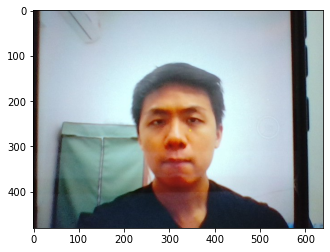

In [5]:
img = mpimg.imread('chuafake.jpg')
imgplot = plt.imshow(img)

In [6]:
#BASE = 'https://prodit12.pythonanywhere.com/'
#TARGET = 'process'
DATA = r'/9j/4AAQSkZJRgABAQEAYABgAAD/4TDKRXhpZgAATU0AKgAAAAgABAExAAIAAAALAAAQSodpAAQAAAABAAAQVoglAAQAAAABAAAgouocAAcAABAMAAAAPgAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV2luZG93cyAxMAAAAAOQAwACAAAAFAAAIIySkQACAAAABDkzMgDqHAAHAAAQDAAAEIAAAAAAHOoAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMjE6MDg6MDkgMTQ6MjQ6MjgAAAAAAeocAAcAABAMAAAgtAAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD86G68EZ6j2r1P4IIZPFFqhPLEDjqFzyfrnH515avDg4Jr1f4IgnxhZqhZTIVOSvChclhn3wBXPW20O+jLVn3x4dG6zhI4BUGujUA8Y6Vi6JGfs0WTn5R+FbsaD+Icc9K92jJ8iPmKnxMcVyh9ag8vJxjk+/WrYXgg9RTSnG444/StgiZFxafeI6e9UuFbnrW/JHmPkEsc9qoXNr8vyjaazmrnSpFLl/YGsnX9LN9bsVyJF+7kdTW0mF3AjmldcrjGSP1rEmfkc54b1gMTZTnZdISNh6nBOf6V1UB7HjccZzXJeINJcSJewEpLGD/D94elbXh3VotWt1kBKsOGB7GqVjF9zYaMhsklhU8QyOMg+tOQHAxjBqZItuTyA3YVQolyylVkwTyvFWtueAMsOprBvI3RhJE7KV5Poa29LuVvIlIbDng/Wptc6Ex4jwRk5z2qndWuexI71rhDxjvTZLc7TkDLetQ72L5jGjhCgnBHpUiRk8Yxxmrogbd0+UCnrbtwWIyRjpWPKKUivFDgYYE5/SpkjwuMYOKnWE8gj5fWpo4iV4wRVpHPJ3I1gJ24GBj86sLbvyMZFSRwFvQ7eKsLCcrhjnvxV+hkR29tnqOO3NShD0xz9anFsV4Pc9Qaf9mzzngAAVoo3LTIVixgkZ/GpPJzjaMnrU8MXHUj6VJ5W0cDk96rkY7lUW59Ru9M0qxluoGenNXBFwS2KcbccZ5o5AKgt9pz29M08xntjBqfycYAz7U8QE8itUZOxV8s4NCxfXpVow5BBGTSJCF6g47ChxuUmQeTkdeaeYRgc89qn8r2/CpBCMjipsBTFuQ2B09ad5PY5z2q41vt5H5U4whvUmiwyn5QGeefak8gBM88nHBq75GD04pwtlBPGfTPejlLuUvKCnBBpvkBGPHWr/lYHTJHWnGHOMrS5Q5mUBGBxx70m0KxwOevWrZiBb5V6etBi54A59aLAVCRu7kioyAzEcmrxhGScUnkj0xTFqUTHzyDx3xSeX0IB59e1XWjOcjk+lAjOOn0z60CZntEVGTyelDKegA/OrpU+bzjHtSGP0HXrxU8orlBoyvPOV9O9HlsVJ9e1XWg9MD+lM2cdOtVqSU3Q7enPvUTIynnH51oSp8oA6n3qMpwMYPrRYtaFPySBnGSaaYm7jHvVwplQMdTQMBcEHNZuCLUmZzx8dOaYY3I55q6wC54/HFNZdo4HHr7VHKXzFDyTyScVG8JPHIxV51BIBz7Go24/Ch3HzFBrcjv3pjWoPXINXj096jPcEAn+VRyl85nG1wx5JAqFrfgn+taTqMEYwaryJjBPU/rS5Re0M2W1I4Gef0qvLanAGcnrmtSWPdnjBPvVdkPfOO1PluHOZrWgPTIPXmoXt++eM9M8itTyfmPHamMhIYEYJ4P/wBanyoOYz/s2W5+uMVXktfk7lutagTLYPJxxnvTJEIOBwO/sabikO7OR8SWCvpd4uTzCwP4g1+WniKPyNVvIjx5czpn6MRX6veIIgbG6yQwaNs4+lflR4uTZ4k1NDkkXcucjkfO3/6682t8Z62Gk1TkjOC/uuDnIqin3zknHtV8D9xgE/TFURgMeKFsZnV+EfmuJlAG7yywJOBgHnn8RX6B/sFXn2z4aXu/5fLv5VAz93kHH5k1+fPgva17OACxMDr+dfef/BPiX/i3+txE526nJjHYHb1r0aD9ySPPxV1G59cAbgCOue5pu32JpQNtJgKnBz71yNHFGXVkTjdnsaiPDHIznpUrKG2/570z+LHbJPvUmt7n4lcpyTnNes/A2cjxNEBkouGIx3BGP515OzHcOmfpXpnwbRj4msSWC7bmNiPVfT+lc1bY+iw+79D9EdB2/Y7cIdwCKOuSeOtbqE4zg8Vx/hW9MdnCGZdrAE47cV2cX7xNwYFeMCvZov3Uj5uovfZJ5fbJ6cml2BeM5z1BpyA+uOw4p/lkck56mugSISgAJXdioZoPmHJAOauDB5BAC9uuaayYyMeoqWaGJeWm055JqFVHrW21qHDA5yeRms2a2MJ5BI78Vm4om5V8oOuDzuPeuTvrOTw3qv2+DcLeQgTR9iB6fnXaptc+v1qO6tFuEKONytkHIzxSaMuazuS6bfJf2qTICVYZB9R61prH5gyOcYFcFpcr+FtV+zSbjaSn5W545x3/AMa9AtSGAxzkZ4qdepfLrdbAIs5QjKkcVWhLaXfKwH7pjz7VpLHgHinPbidADyPX0qk7Fx3uaMZDIrr3Hakk4GT+PFJp6iKIDnAP51Ncf6tsDik2aFSKQTE46qfSrAj2k9xVLTZhI7ZGMH8a10jBPXIrIUlykXlHGB1+tTxLsbcOMipBbjAOPxNSxoPTNXZnMxIYycnsKnRO2O+ackZxyMHrxU8aevBrSMSBmzII4+lOVccGpfL6YFShcYIHWtSkRCMrkYFPKfMOMGphGAehJp+zOODmmURBcdgSaBkjjgg4OamKH04+lOSMliQOB+lOwmyERggZP/1qdsy3bHv3qfyh1xk+lKkIJ9MUWMmQGI/j3pfLHWrWzLcjn19aTHcAdelGoFfYP9kZp6xkckHH1qZY923gf4U/ZjjGaYyER5ySO350vlg4Pb0qbblhnAFP8vGfb9aVh3KuC3OakCnHTiphDhSe9SBMpgikBT8vGc5xml8snjPNWvLzwBgU3bgk8j+tBVyu0Y69O1II/UYJqdoj3z707YcE4z70BzFUoD26Ubcr2yfarOzqO/8AOk28HIxigdyq0fOQCfpTDCD6+tXHjJ6cDPam+UPfn9KAuUSnB+7TSnOSMCrpiHTGab5WSc5H4UCKbc8DNRYPQ5q8Y93XsaicAMMCgCqYx0wCe9RlOozkZq75YxnHIqMx/KcAHmgCtt/LpUcicjBycZNWzF8ucj86jKBe2adwKjJgEg1Gyj6irgQ7jk4470xogzEcY+tTYZRZAcccjjioTH8zAcg1oPCeMdKgeMjjqc88UuULlJozuyKZIv4VdYdScqPp0qFkwxAyc96llFKRM5A/PFRSREqSeSK0DGduCc96rtARnhSDye4qLDsUSmSc9SaieLPUEj61edPwHsaikXHy4x9aRSTKTQ9Sc46e1M8s/LgHirrRDK89enFI8JA9+2aRoosoBcjJGMfpUbxlg2ck9sjqKveVgnJzn9KSSP5cg/pUtnRGBzOtxgwS4HG1uPwNflF46R4vFesKwyVu5Px+c1+s2sR/uZRjqpx+VflJ8TIDD431xSG/4/ZsA9hvOK86t/ER6eHj+7lY58E+Vx6VR48w5FXUyIF4wKpSD94Tz1pGB0fg+YwXxdASwUkDs1fdP/BPQmPwr4igbClb8k5P3gQMfpXwp4TQtqKKG2lgygepwcCvuH/gnt8uj+KlJJ/00AZ/hAUcfnmvQoLRnmYx+4faBwo6cnnNJxj27inKMgEnPH60j52jpmudnHHVEWeenTPSoj82T0NTNnv3FM/TOfwpGx+JO7LqTgAenevVfg1CLjxNZrjlmByR2GSR7cV5VGDuAJI55r2f4AwlvEtqiMN3JKnHzEHg/lmuOu7JH0uH3fofbGjwu0EWAwIVc54ycda7LSBKoAYHDday9JjDRxkAYAAz68V09rGFXjoecY7V6dFu1zxKqTbH7CWyAcDvinCMng/Mc/Sp9hwSAfTFLs5znB+tdtznSRDtH3dpVvpRsxJz93nmp8Ec5BNNOSeRkdTUlNEJj6NkdM9aSaAOuTz/AEqYAcYHIHWn+X1ByAetMxkYM1sYpOE4Pf1pY4yexJJ6Ctia3BPI5x1qlJC0bZGSKTMjK1jR49Ts3Qrlipxz0NUfCupS2U50+8bJX5Y5Hxk+1dPDHuBPH41ieJNA+1x+dAqJOvO7b1/Gs5K+xtB20Z1EPv3qcIAARnB7Vz/hbXBqcCRSgi6jGGBPXHeumVNx544qdTWwRADHtVqRfNjI4yfaoViI+XOSTxViJf72f8KLj1MuyszDdtkEKe/rW3Gg6n0pghyx44bmrcMIOeoqYqw6j5tWIFLZwD7VNHGdvPB9uKcsONoywqeOP1xmuhXOVjAhyM5OB3qbyzwM5xUiLu6/WpQnBwCfrVozGLGQTT9ufz6U/wAvHQYqYL6Dn1qxkIHfH51MkY+hbrTlQnrxnrUoQD+lFihhUdecDigADjgZ/KpvL3devel8oYHHv0qQINh54INSCM46VKqfN0PNP2EDPUUGZBs4z69qTycjr948YqyuMnsTS7Dn6fpQIgCk5x2pwjJHP4VLty3OMU7ywxHANAEJTp1z607yjx6ipgnI46frT1Qn8KBFfYckdj6etL5e0ZxjtVnyidxPH1pduQuR/wDXoKKgj9OAKd5YODxxU+3Pt60bD+FAyuY9zdOnWjy+3IHtU+wZHB5ox1GO9ILog8vGehNHljH86sunXjH40wRcHrkGlcorMg9eKaUzjJx/WrZTqCBUWwbsYwFouMrGHk8Z4/KkKk7s4+tWjCG6k8GmmMdOo96YFTyuM8g+9RNCOeBmrzIOhz9RURhIPJOOadwKYXAPSmsu41bKYJFNZOQR1PelcCs0YHYFjUDRjnAxn371e27ifWmGIZI4oKsUTHyAT2qNojnPAAOKueWNwBzTGi5J7fSgrlKbRluoFMkj69+fxq6YyATkYqEp3xk9u1AcpSaM4JAFMWPO7AbmrnlkDkHmo/LyTgdsfWpY1Ep+V3A4FRPDgfrV50IBXjr2qJ49qnnPtWbNEjOMQ/iGSKZImCTgZNXnXBGBwcdqhePL45wDWbZvGLKZhJwPWmuncgkmrr5I7DHSonG8YPUVJokUWQ5IxkU11CqByfrVtk+Y9MGq0x+U88+1BRz+rrujkyDwrD9DX5WfGNSnxJ8UZGD9udQAOOO9fqzqhKo5J52kc/Q1+VfxuQw/FHxGnGBeyBRjnGcgn864K695Hdhpe7NHFpkQYA4P6VSb5pCfQ8Vfiz5OMkAnqaz2wshHDUvUxN/wk5GpIQVDAEgv04r7d/4J6GUf8Jgjhd/2pWwhyPunn6Hgj618QeFZPK1SEsAygn5fXg8V9qf8E9HEV94yg4GZ43+mV4/lXoYd6M83FxXLdn3ImDz0zyKGXqT8wPoc0ifdGAMYpeTzgY6Vyu5xxbsQyZCnv+FMwMY6mnnr1IPpimE468mkaH4iD/WKT+Fe5/s4wiXxlbOuQCpLED73B4/D+teIRqFcEgHmvd/2cFMniuIqAFTazbfRiV5/SuOv0PqMMrqT8j7v0iP92pHJJ/KujgU598d+9Y2lkBFGOTXQwAYz0PqBXs0/hR89UvzMkGWznPSlVR15GfWlyei8gcZp4655rYSGbBjNLtxz/DipewI60FTycfpT1BkYQY7Cl2jpwCeaftyc559MVIkeQBg5Gfr1o1MGQlAXByNoqOW3Eij1HWrflD61IEHTP4UtTOxi+QFbHIxUghDDbwQRWhc2uVOeo6YquqEcEYx/Ks3dFrscnrelz6bdLqNkCGQfMB39/wAq6rSL+PULdJkJbsdw6GpDAJAwOTu/WubeN/DOpCRVZrSQ4YD+E0mzojtY7NQG9jU0alev/wCuoba4SdFkQ/KwyKmMnG4fNzijQHdFoL8oOAKsxruUYOKq2pZieCfStONFHbH+NXEyk7CIncnk09Iz1wMVJtOc+tPCFeeOfWt0YvUVIiRknmplX5iTjj2pyAjjGSKlC564qjMYoycEZJp4UDGMnP6VMqZU56GnBRkA0FKw1YgcHnPvS45x2qRVBb8ak2jjgZzSGRKDnmpNhPbinhT3HFP2njrSAjEROcdRTgu4kAA4qcflmkxg9OlBLIdmCMD9KdtBweanC5weD6ijaepzQTcg8rcTxk07yv8AOasMAAPT1xTgmMDBwenrU3C5X2e3404LyP1qYIOlOSMDsT+NFwuQsgPYijycjqBipiDg9xn8qcyhQCRk+9ArlcLjjGf60eWc4qyybsH/APWKNp6Hp70XHcqtGCMZxR5Z9sD261O0Y7DijZu6gjd/OlcZXYAt0xSbMFj61OyHOMcUqx9+KCrlXb0Pc8Yo2nqV/GrDpluBximtz3oKTKrfmT2xSMuR09sVYKenWk4xz1oGVWiJQ9jjAzSeXtJ46VaMYPrUZQbTkDPvTAqsh7AepqPyjkirRGc5HWk2jJAHFBRW2HPIBFQsmcEgrk8VdaIYPvUTpt55pFFUpznaeKYQc9P/AK9WmQE5OP8ACo2H6UGhVaMde2Kh8sE9DxVt8LxzzUTKWB680DICoz0Jz/Oo2jFWWAGelNx83WgdiqU68HrVd1IJxgj2q8y8kE55qCT0PbioLRT2ew/+tULruPQ5z0q03Hbio2UNyeCf51HKa3KZTtjHpUEnDHI/Grjr83cioJAATwT2Az1pcpVyqw3NzyetVpIwCTnPrV2RMNjGOOagkAbOQAKLEtnPamB5bc8dM1+W/wC0LbGD4veJVB+U3G4n8Aa/VDU4f3fAB55r8t/2jbcw/F/xAfMMhabP05OB+QrixGjR24XVSPOIx+4wpOCaoP8AJNz2rQjJ8s4JBqhID5hz1rFXDQ2vCxT+1YmIJC5PTocV9p/8E+42bXfGJxhA0QUjnPyn/D9a+KfDGF1uzUuqo8gDO3Qemfx/nX6Q/sZfDefwr4d1TVLlPLk1KZXUBdvygDt+dd9G1jgxWsGj6bHTGCM98UrcdcHNC/Qk9PSk+8SPT271hI4IvQifgDGBnP4VH12jnK8/Wpiw5PWo2UHGCcHkVOhZ+I6Y3AfN/Svf/wBmSNZPE3XZkdF6EcHJ/EV8+gDdznrzX0T+y3GR4qyF5XaOe4yK5K62PqMPfll6H3jpUfyR9s/nW7bqFxu7+orM0mH92CDzjvW1EDhS3JHcCvZp35UfPy1bDPTgYNOVR15PH5U5QCc46HIBp6A7f979a1QgSPd1GfrSsDnA6HmlB2DJ5I/QU5VO7IyfrTIkNCc843fzqRUwODz7dqNhyCTxmpvLDk8ZNMwkxEiBzgk49TSiEDoCM+tSRxnPT/61TKN1OxBVMPXPBNQy2o2Z6N7itZIRtA5+ppkkJbsD2FQ4loxN6RcNj1psrwXCFCAwb7wYdfrWjLpaSk5B9M0sWhRcZwxHfPJrFpo6Y2M+2RLddsR+XPTtWjb2rzNluKuw6WkfAHJPOa0I4B0wfmoSZUiGGAx4IAwOtWkjGM81II9rY4x396lGB1Xp6VstDnkMEY5xnnp7VMqkL3JpVjDKSD+dTqgXjGDVmQ1APQYPepFXkHAB9hT1QHg8GpkQ88f/AF6ZmRKPlPUDtT1H1/GpcdOAcCn4BAzgZoGNWMqx7ipPKHB5z9KesfTkn1p6qOeR/Oky7kfTp/KnBehA9qkwG9QaevXHApXIZCsfHXGKdsy2OM1KsY5HBPqakEf50yCHyfTp/OgLwM8/WrKx56jHpSeXnvilqIi2jHY+vtTgq+/FT+UW96FXtjJ6UCK5UHOAME9alx0wBg/zqXy+cDGCKURjkDNINivtwSBz+NOI3dSAKm2jOMYpfLDdBQIr7QOnalfqCRjirO3BGRzUZhI3ZC9exoHcr7OMkcmkVXBGOKteRkjP6mlMWGGAGH16UBcrmM5LHn8ajCg54+8e1WME8dRTWjPPynFBdyDn/PamlOSSBg1Y2A5yBx2pNpIwAuDQMruoxx271G69wODVnYemMgUhTqc/N7UDTK+zPrULrnqMetWmTJBHU9aYQMngZ60FFYrt603aOmM96sNHx0z3phBxg9+tBXMQsnboRUOwgjHT3q3tAHHT+tROvJx355oLKzLkkgVER8vt1qyV28dajZfc4oLuVWTB6nNRvH8xOcZ9RVtgOTntUDKM4J4oLTImTIJzxUbDgAZHFTt8jEAZBpjD1PagdyocqeailHDD1FW9xU5OeTVaRTnk8bqZRWYk+39arsSrev8ASrTrz2wKrzDgmpsO5A/Qf41C2B61Z28HPGeQagdDgDqKkXMVJItx685/So3TnnBz6HpVnoR19/amSD5mxyCKViWzE1GMEMADmvy7/abiEfxk19eclw3seP8A6wr9StQjHzDIJPf0r8yP2s0ZPjLq2VUARx4IHJBGefxzXBiejPRwX2/Q8ajU+USDyDVCbPnZOavxkeWecetUph+8PrmsStzT0R1jv7UnBHmoCM9eRX7K/DNYx4O0kAhttvHyONx2jmvxn0vBvLcBhuMigZ78iv1v+AXjuw8VeCdOhg3i5t4UWWN1xjgV3U03TbR5WMk1KOp6sRzxzmk6E846mhWGMAbSOlB3EZB6+1c5zpkPmEEAE80gb8ByQKVsnrnrUYOABk5HT6UWLPxHRl3YPIr6U/ZVt/M8RGYjcQwQY/PFfNce5pAO9fTX7KWH8SCIFxGYVlYdgwbAH15/Q1xV3sfVYV2hP0PvDSlBUZATvz6Vr4+U5FZ2mx4XsAOw+ta6KdvTpXtU9kfPS3uNHQ5NKM5HJIPQ+lSL97PPSnDAGTgjFa2JI1T5xUwQZz0Y0ina/AzzjHvUjfNwACR+dMhjQpUYJ5+lPj9QAMGngEbTwSPXrUuzvxn2qkYyAdgc1KExg5OelCjB7Y9MVKFHGB+dMjlBQG4PGKkCfMN3TpQq/dJznrUyAA9M55pWLSGLGDjoRUkcfYjjtUka88AZx+dShN3bFKxqiNUHB54qwuSowMUix9OoJOKm27RwMmgdxq59O9OC9M/rSop5HvUgiwAc0yGORNwBySO1P25xnLGnKrLggVMo7gAHrmgyGeWOveplQ5p+zpnn+tSRx7jnGDSuQM2jdk8Z6mnmIg9jn26VKIzxUnA9aZNhojGz3xyPWl8sBcY6VMkR7CpRGD0wMUDKxTJHXHepNnAxgmrIQY/vZpCvUAj8aWgmRxxg84xzTtm7t+VTIpGAQDin42+2KCSLbu7cEcinLF74NTqo6leKVV6nIIHT3pEkC5z904pzJjlQBnipdpI7Cl8snGcH2oEQCNsDjOPWlMeeQMjvzU/l5HC4NK0WQDjNSMgCbsD1qRY8cgZI71IYsMDjn9KNhY+nrVE3IsbiScZ7Gmlc8fnxU20q3QjNIU254wT3oEQBTj1xmk2Ec46/yqYxjgAE5p5UgE9xxQMqbASKDkD0Bqw8Qz6jPXvTdu4cZyOtA7lUp3HPPWlK/KAAD2qZoyc+vNNCY4I6/nTHcqsmQQM5+lMwEb6579KtFSCe2T1xTGUblAHI55oLuQFPl7ZP51C0Z3AdatNGd64G4DnrURXk4zmkUmQ7exycdM1EwHvVh4xxgHIpjJwDigsh28dePWonTIxnpzmrJQLnGATUWwnqOlMq5XdAM56EVEYxweT7VYbd369qaAfmwP8A61I0TKzLjtmoXBJHFWnU9Tz3xUTgZHqfSgq5WPTGCCPU1GVyOcYPpVllPPr7monjwOTmgpMrOCDxnmoZF+hzyeKtMvGM+9QSKMZ4NNbiuVSuMk96gKgLn8hVp1YruwMH+dQOo64OaYXK+zdnI6c9Kg24JwARnr61cdcH2Pv1qIx546AUmhlR4zk4GAajKnGR2PNWzwwOCPbFRyJ8pHY1LGY93hRggsTxx3r8yP2wIvK+Meo4P3oo2Y/hx/Wv0/u0O08D5R3r8zv2y7YQ/F+6c4/eW8Zx6YJFeZinblPTwW8k+x4FEvysexNVLn/WdfpV6JhtIzwTVC6PznpgHg1ncehe0NxFqFsxGdrqffrX2j+xh4ruT8Ub7SGdjG1iXAY9SHA/ka+KdLIF3A5wcSJnPYZAP6Zr6q/Y8uSv7QCjLbZLGTaSMblyuDXo4eTs4nm4yPMr9j9HoSXVc8gfxGnnOOtR2vKfLyp5qTBYEdARXJLRnDF3RFIMnpn8ajVyCRjtnrT5M9McHrTADzjJNI2PxFjXBJzX1X+ydCDqKgFZFAjIIHPOev8AhXypb5EmCDivq/8AZKST+1RGVVIy+4AcngBhn1Jyw/CuGvvFH1GH+CfofcumRFIhnsuPx/8A11sIOFALDA61l6bkoCCWXGcZrUi+ZM9CTyPSvbhsfPSvcXaQNuCOOTnrSgDB54/nTkI6kbhSkZ59egB7VoRcNp29Og5FSIMPkZ9qATkA4PrUqjDE4ODV3Jkxwh2tyQc1IiZAzkUqg89z/KplXK9ea0MmIsfXnjvT0XpgU5AD2A96mVCCMjrQK43yjUkSAnntT0QseP0FSqPnyak0QiIRxwc9KkVAvB6ipFHXHWpNnI6f40ixoXkU7YSQcYqVVJXkVIqjjAxQSyLyz1B6U/ZnAPX271MUBz6ZqZY+wxQQyNQR0Gc1LGmBzQFwRkGrAHy4xyOaDIaUGCDzUqAcdcnrTgp4xwRznFTY5OTn8aRNyNQOoBHpUvlAEZHXk05V355wBzk1MozjOKNAuRqh5LHFS4A5A681KkWGz1707bnJI4HQjtSBkaxjoTx2qVYhx93jmpdox0wCOacsZ44+pxQZshVOvcnk05YxkZI556VYZBuXjjHPFKYhxjoD0pXJuyBo8EDnjj60/wAr5ehOe1WBH8uT1/nSFOhB70rhcrLF8xBHGPWpFj3NknB6c1KFAI5yDTzj0xnqaLiZDtxyeh/WkZPm4PHpVgrnHPANKIhy3HuaLk3Ilj4J4pmw+xI71ORjGOM+tNGRuOcjvSEQGM8AevPFNc7nJ5I+lWcndzwCcUmwO3B6UAVmVi3HGaXyzyCSCanCngdKd5QBJbJI7Uy0U/KPYcDuaci7Rgjr3p8uQSASOemKcF+UE4P1pAVXj6lh24A5qFlJcHoP1q40TNgjPPv2pCgJOccDHNUhbFRoyoHOf51Hs785OOe1W2XaB/WmmIMB7c5qxplUx9T6VCV69x6+lXNp5GARTPKwc889RSNFIqbCajZTjnk1aKElcYx1+tR42npgGkaJorFOf/rVE/fB5FWiPX+dRMijJODn170FXK3lnHOTmoWAPGD19elXXUhQVwR0qJ13dsHvQNMquhPuaheP25FXMcd+O9RFeTnv3pXNEVSMDkHIqIqSMdC386tMDk+5zTGXGcmi4yk6EcDrUZUbcYzxVt1A5zmoipxx92mMzzGDjsKiZeScGrsqkdOnrUDDtn8cUxlfyw2eOaiMZyc7fqas896Yy7uucNQUiq4OeuR0zUUi4HGGqx5XryPemSL/AN8gUmaJGRfKSnJxX5qfts/L8YOUCsbUDPtuJ/r+lfpjeR5P61+bP7cgDfFaAhcbbXDcercV5eM6Hq4HeXofOCfLGQTnmqF0B5h5yKur90+n9apXK/vBkisUTJalrTzuuIQBjLKpI7ZNfS37I9wo/aH0/Yy7XsZdu3+EApx7/wD16+ZrDP2mLBA+cH9a+j/2Vpy37QuhybQha1lQEDA7GvQw+pwYl+4z9OodvljDDg/lT3/hwTnGeKigA8vAPTt7VPy4GDyKwnfmZ5kNiJzu/Eck1CJD0xjjj3qVhuGOgqFM5AAP1qNzdWPxKtfmmBxyv86+tf2RyTqnJ3Myq2enzZP65BH0r5KgO2Veeh/Ovrz9kOMrKquCrSSs6kcg4IAB9OAT+FcVb4on1WHt7OZ9t6b9wLjgcD2rUXqDg46ZqhZ5bHRc8mtJVPGOVFe1HRHz0tGJzt5JDevapIs/dIyKdnocn8KeM7sdsd62RkwCjOOMVLGMZP8Ak0bd3HAxUi/w5xkVqYtiop5ODyOOanRSvBpoQ9T9RU6jcAc9fWnYQIBnODiriqNoJHOeKij6kE9amVT15FSAoTHPGT0qWNNuflIyaRUAIwT9T2qYLngk+1BaEjQsepxUsY4HX6mhYyOnNToh3HOfagdxo545qRVHQ5GakVNqg96dt749s0rCY3B3dKmRMgdjRs2gZ6Z61IkYYDgnnikZsFjGOO1SpGF54z7UscHHTr+tTIMDBx16UjJsETH9496m2+wBpEyM8e3FSiMOw4we+aCbiKoCknr9Kmjj4HOSeelPUZxx04Jp4UjnqFoExqKu5eCT3qYKGGOeBT4xlG5I9PWpVjK9VG6k7AM2cDqKeAMe/wDOpBG2c9OvFSqu3JHPHNTcRXWIY5B5pwiy2R19KmGTkdM9OKVVwc/xGlckZ5WeSMenrSKqspA4/GpsNnrmsrWbiWygd0xvUE8mn6AzQVfYjHemySL1+73ry/UPj1pOkLLDexyC8iypUDIY/hXkvjH9oTU9T3pp2bSJuAT94j+lWo92LklJ6I+jNX8Y6Vowb7Zdx22P7zVxGrftF+FtN3RrdCdug2V8j+IPEF3qkrPd3ckzNydzd65i4vTk4faPak2lsdKw/dn19c/tN6M8bkt5GPqTWDeftWWNuxENvJcD1ZRj86+T3uSz/wCtP51XlaRgf3nHp601Jdh/Vo9z6tb9riJcAaexOMlcj9K09O/a2sdyCfSJhnqQ6kj9a+PI3m2k7vu9ialTUJrZk38j603NFPDRPvnw7+0N4U150j+0PaStgbbhcYP16V6LaalBqEayW0qShgCNpyDX5pW+vgkA8AdMjpXofgv4u6z4SdW0+/cRA/6iUl0P4Z4ovF9DN4V2vFn3ntBJ6cn8qUx7QcYNeAeE/wBqKG7KLrNotqW4MsRJGf1r2HQPG+keJYlksr2KZj/CDz+tHJ2OWSlDdG40e3/9XSoNjHnjHarB+f5gTk8/SkVN3VhtNQTzFfy+2OB39aYwGeAAKtbORweegNRNHubOP500Mg6Z4BGelRlCCSMYxVpl5IbHNRMCSCT0plpkATdzg5HrUbpleR9KtNg9jz6VHgnIzyvrQVcrSALHjjnvVYr82OMCrxXqCB7moCuOeCenNBZUdd2CeB9KiZecd81bdOcDJqIoN2evrQaIrsucYHTtUbrg9MZq2UJ781CVOAeDmg0KjRnqeaiIz94dfWrjDYOmSfWoWUnk8Y61Iyo0eOO1RMg+ozVsqTj0FROpAzxz2xQWim0Y25xkg1XdAMkgVbbOTzjNQtGOe2eetVctIp9ec5IprKVz35qwcdOMA1ESOfrQWiuydTx9aiZc7c4OOtWcdRgkfnmoXye3UZpsszb5RzgcDpX5v/t4r5PxJsGXCtLaurfgwOf1/Sv0jvhmM4GOMivzk/b3gI+I2myZGDasV9T83P8AOvJxfQ9LAv336Hy2rbsnjjpVC4zvq6vzBu1Urn7wzWSIb1JrL5pUG0kkjH519EfszzY/aB8LuxCu6SK23oPkHT8QPyr52suZVAPzEjFe+fs6zm1+PHhAkja3mLjvgxk124f4jkxH8Nn6m2rExAgZyMDFTbiF4xn371XsW/0dD1x6+lTZUgdueOama95nlQasRv8ANwM5Bxz6UmeevSllO4AdMdcVE4wAcjPSsy9D8R422txnI6e9fZf7IUO+cBiWbaDnsMZH6Zr43s2RZ1Z8YB+u33r7Q/ZGtyk0QGNoCnK/xbi2OPwP6V59d2lFeZ9XR/hTZ9n2GWGTjJ6+9aqDp1xWbYpiMdc49a01jHH9RzXuR2PAluOCFvXaOaVVBbPSkLNwCKkTt3J9K3iZMlC87ieg7Cn+WoIxgn1oCkL2x6VMi+gHFWZsUZOeelTKp25FMwe4yPpU0anbkYOaCLDwnIOferKZI6jgfnUMa4UEd6nAGPTNAIfGvft1xU4XkHsBSKAMY5zUvToOvWg0FiT5cgVMgHfIpI0zjpUyrjA6VNxMUYPPO2pFUEDJ6/pSY+XoDipERwTwMUEsVVxjtnuamRC3oAe4o44PWrCrnp8ooM2MSP5sdcdKl8s5GcUqRn5sHOPwzUoUv6YHakYyeokUR35BPsKnQcjOQf4hTljAxg5apdnmZyBnmmTcNp4wOnWpO3AUf1ojTHHXFT7ecD8aQrkXln5h0NWdvTPO2k27+eM1JHHnknAFSxCZzgAEE0/ygoAI57gGnhc442gdDUqjr1Gf1qAuiuEVWPXApzR7V3cqD68ZpzBE5LKR6elecfEH40aJ4P3xtceZcjOIVJOTTScthX6I7jUtbg0q3eWVlVV5yelfO3xP+NF3dTS22nXARASG8vODXnXjL42ar4keRFZYLVicRrySPc151ca04hLGU59T1rT4VodVOjrzSNjU9TluJnkeTLZJLk1zOo65Ht+eQKw5rB1TWi5bEh56jNcvfXwJJY/rzWGu5320sdJd67GWyDn61iXOu/vMZzXO3F+oXjnHv1qi17umwWIzz9Ki7Fy9jqjqwZCQRk1GNZx3zx69K5eTUhEx5yKrnW4ojkDkilzGkY9ztEv35JzgYP1qU3iscE9SO9cdHrzzKMH5fWpotRLPgyDOM9aVy7HaQyo5wSPbmr8MqdjhvrXEDUsYIlXBGRzyKuWuoluQcFffrRdisd3a3rxAkSMWPXnmtvStdurC5EsF3Nbyj+KKQr/WvPbTUuAc4J5PvWqupImDyTgE1rGdiOQ+gfC/7RXiXw/sinlGqWwx8sjbX/PBr3LwD8ftF8XFYpi1jdcDy5BgH6HvXw1/aybQQcfjV631NxseJipHQg8itlU7nLPDxl5H6UQ3SyxhkZWB5BFSMRnjOcV8M+C/jh4l8JyIILtrmAfeiuGLg/jmvdvBf7UWhaw6QarFJp9y3BcjKE/U1pyp/CzhlRnDpdHtzKBkj7x6Co9m0jPOf51Fper2msRJPazxzxsMhkbJq1jc3+7+tZtNaMhEBCqoJ7cCo2TBycncO/erDqTnIyARyaa6gEd+MdaRoisVLAjgDFVvKxkHAIOBWi8Q7ZLN7VB5R5yM0i0USh6k5Xim7ACQBgHmrU0YIxiomHTkn1p3NCtKCePT3qKRc45wRVllGOmCahkGSAPWkWiq4weeecUyVd3TcMVPIpAHf+lRk9cjk0zQrkbVz0FV5BjB/nVtsdRk/hUEin05HekWim4zmoGAZTVl/vY5yKicEZAAxVXLRUkyCPQe1NYBgTjgVM2WJzgE81G/cAkCmWV2XDDI+tMkUkHgDHfPWpCDkgdfWmsMdc/40wMy77+3I9a/O7/goDbeX420ecliPKkjOemcggV+il6CFPuDx6V+en/BQiN/+El0V+x3rg85rzcYrJHoYKVpnyGi/exiqV0uHNXVOVb1FUrkncDjOa5ga1H2/D4/lXuXwTRbf44eC3yVZbhlzn72UP6V4XBnOcfMK91+B1m2ofGjwIEV2KsGPf5QhJOf89a7cNb2iOTE/Az9U7FdsKdT6Z71aYYTOP61VsRi2XIwT+lT43DNKp8TPGp3sRvgck4qIqcdQRUrDA571FtJ6Ecc1lqbo/EqBQ8vIYHnkV9s/sfZVYndgSyKoHO77x5I7DkV8S2h+bk819ufseqDGZCqiZ1Vg3T92u3C/h1Pua86uvfh6n1lH+DM+zLIfKMgnj0rSiUkc8n9azrAfKATwe4rRjX2ODXuRPnZEjZJAJPpUyoF980wDnpnFTL6966ImTYozt9zUyKSeOD71GowQcE5qWIg4ILD6VqQSqvy44I71Kik4yPqaaoyO+KmjQDuRkUtCdR8eQMc+tS4xtbOc8dKaik++Kn24GOv1pFocMflUwUHHr3qOMbe2ff0qZFzxk8e1IZLGDgdzU0Y2gAZOetCDHf2qSIHJPHPrUiY5flwByPep40O/JPHemLz6YNSjkKAMnNBDFVD29euKmjG0dsr3pEXueSOgIqZFCnPXNIyY9MMhI4NSqoGPcVF9n8zB3snfirccY2jqccZNMxYiYGDwfepkAbHOTk9R2pdu3AyDk9alVAuPXOKCQ2E8cDHSngEt/M0qqfowqSLPQk9O9S2SEI65zyOwqwgzx6DPNN9cjinhSWGAAO2KzbFcCCmSSKZLJ5atkj5gcVHfXkdpG7yEKFySTXz58aPjbJpMMlnpcsTyNkMckFfrg1cY82+wKLk7I2PjP8AGMeGraS0sbqNrpshtgyRx+FfI+v+KLvWLuSe4dndjy2etUtX8S3mqSyzzkvK7EsC2RmsaXWJIudoKdwRVyelkd9Ol7P1NGO6RcEng1Dql9bGEgKp9x3rPfWbaeAnaqOOvPJrmdX17buUY+orByOqzGateoCVB59zXNXGqjJBzjpu9ao6vqRmmLAnAA4Pasa4vJJEHqG4waiUkjdI07i/2neSDgdBWdc6o2A6FgQOuKpozz9TjJ60fY5AXw5bdj5dvSuZ1LGypyewybVyYjkkMvXNRLeCXZ1Jx68USae6yFQAzNxzxmkOmSAqBllXOVHel7RHTGi+xPHe+VIDyFPX61eTUA7B/u49+aw5LQ+YCSxPb2qSW0ZmU5O0e3fuaXtETKizpIL8MoI4wcndVy1vjk/MMfWuRjJiD+WflHJLd6eLqdF3b8A8/hRzmTp2PRrK/wA5QFSwrXg1IHqVHvmvK4NRdWyJDzjnNacWpSAgCUjceprSMu5HLY9LXUIy2CeAMmrkWoxJghyOOK85tblyRvlUn3ar6akeEMo3fWtboiSPQE1ZsAgmrUOrGTg9PpXBR6oyrkEMV4J61oW1+8rLzuFaczM7Htvw5+L2r+BryI2s7S2hP7yBnPT/AGa+yfhn8UNP8eacksUo84j51PBB9OtfnboyXF0QYonlY5wEBY/lXuHwAnvLDxBJdWhbESgTw9mB9vUVvGfNozCrSjJX6n25xz3B6Y5oeNcBjjGPzqjpFz9st1kBG1hkH0rQIHB4z65oaPPs0QZCvkAHnjPaoXVmbg53cHirLgL171FISVBxtX6dahjRXaPapHUelV2XOducr61bkA9yD0FRFSvJABPWkarzKsgYHngn+VQScYI5PtVpskEmopOvIxmg1RWdAVFQHjjHX9KssDzxkVCygqSPzoLRWZflwc1FInUZNTsOMnBJ61E+QMZoNCk4K59PaoXzgdsHqKtTD/vmq7KeecGrWpRXK5xjPp9aiYYyB3H51ZwR3yahYA5I+Uj2pgV8cEnJ96bIcjp05p7j64pr/wAOBwetaEtmbeAbG75r8/v+ChCbta0J+fm3fL7gdf1x+NfoLegbWz/vV8B/8FDIAup6C69Nz/hwK83G/AjvwP8AFPi6NfmbsD1qle/fx6VeUDzGycZ4qldAhjzn3NcaOiW9gtOGBZsg197fsV/Da01a0sPF8+2QxQmG3Uc7VJIz7E9fyr4Itgufm6NxX6U/sGXHmfCWBQgTy22Z7Hvn9a76Ed2edi5csND6khXauCDz0NO49elCqCoJJyRmkHfqeKxlJtnmxQxjkDPQ9CO9Rn1AHPepO/BzzzxUROSATkk+lI0TPxKsfmlXPrx619zfshpiCHdw8S+WMduQxH545r4e0xVNwo6fMOcdOa+5v2Qcm0TAYllLE/ieD+FcNXWpA+spaUJn2BZDKrkZI/WtBT05GKoWI6Yx6cGtGJe/8PU17cT5uW5JGuB3yalQDv8ATmmrx1GCRmpEHzdeMetdCMWSgDb69KkjUEk8A1GPu5HB7+1Txnoe4FMkkQ+v51PHhuMHjvUceCobuamRPl44PWgCRQVYYqdMlTUac49TVhPmbBHSgYqqSOp46VMvOB3pFTAzknP6VNGOFJ5PTNIokXJ6duaep6AYGe9CDhucEVIqj5TgkgUEtkiA8ZJBqUZz1NEKEHPA4zmpEXnnnnuaDNscoyOT1qaJDkDGcc805NoUHHNSxr8478c4qWZNj4wfl79uTUuAeeR60iYzx196lRd3U5x69qTRiwRT3HFT7c9jSeVUiKc8c+1SSPQcDIyPzqUZ3YPJpI48cN+VSY24OMnpSZIoU4wSeOKJZBDFuJ6ZP0pytxkjGP1rC8VasmmafM7kBQpPNSlzOxNzyD46+OpYYja2srRKMrkNtOQO+DXyl4huXvXYtKzE5PzMTzXZfFLxRca3qN04kZYldlxnrXl9zcOyFnbJWt5NKyR6NGHKileSeSm5yQq+lZF7qETQuqnLYqPUtYHzJnNcleaqY5H67W6c1jJnXG7G6hqBy4RirKp69q5i4v5n3BixO75W6ZrRmkNxJgFiT1IqtJp0sgBIwV6e9c0pnVGm2ZrZbLPISOpqWIpLGyEYduAw7Vcg0CS8YiUfLnpyP5V0em+HVi4A3BscEdBXnVa1tD2MPg3J3MaLT/LijJUMvQDkmtCHRh1A+gx0rqbXQ2mKZGwcbeK3LPw8BHkjJHA4ry5YjzPpKeXaHnZ0ZQcqhDH5c1KNADICVYBePrXpSeGw5zszjnA4qY+Gk2nCkD/PNZ/WfM61l6sePTeGwMEJjuTk8VUfRD12kjpjPavYJNBEBI2nLd6zbrQlaUfJ7VccUYzy9dDyabQ5FiwEyvtVN9L3Bg6EDpx2r1s+HWAI2Aiqd94XRlO1RuHXsDW8cRrucNTLTyP+zgu9ssu3pnoal8t12Hufeu6uPDL7iCgQLkNxwap/8I8CWG1sjgcV2wrpnmVMC4s4/wAx8uwJHPQ1ZivnDBSNxIzu9Pat240FimQh3Vlz6e8GdiZx09q6I1EzzalBrc0Le92AYJJPUVtWV+Ycc/Lj61xgZmlXkg/dPvWvaEs2ATkcfWuiMjhlGx6v4N8ZDR9QguUjWVFbLD1Hevo/4eavYXfiiHVdOBSG4jKTw4AK5HXH1/nXx7pJIfAyMda9w+DmryWWohizNCuFH+yc9/bmuqDMZxuj798PRIbRfKPyHkc1tbAP4R69a4H4Xa41/pgQlXCtzz2r0UAHoAFx3rSR5bfK7MqsA3HAH0qNo8kjPGOKsMM89MfrUTJ3A4qAKxjwQM8ntULsdpJBwTgHtVqRQG6cjpUbKW+g7HpQaRKvl/Lxn3NV5FHqSfU1cY4Xgk+wqBgFHPPNBomVHDK3ZlNRSAYxxzVhzngjp6VDnqcA44oLKkij6kVWbn1q7KucjBqs4/DFBoiq43ZDZx2qBzg8VakB4zwarlRyQc1Qyqxyx9QKj53c4BNTkHqOnc1HLyoPpzmtAKxQ5zyfxpjg4P6VKw5wfw9qR17A1QmZ10p2HIz1Ga+Cv+CiETp/YMi9VkZRj3XnP4DFffM4+Rh196+EP+CiSf6Joh7tIVA9MAHP6Y/GvPxukD0MD/GPhxAXkI9iao3nXvV63byzJwDkEZPas+9k3P0AriRrN+8Lb85x2Ffoz+wJeed8N7mJNwENyUG7gkE7h/Ovzkte+cng1+i37ALD/hW9y+fmabaxPqo2/wAgK9HD/DI83G/AmfXIBO0Z+7QSR3PNA7cgf1NG8kjg81ys4YjOMd+lRnjGQcfrTySeRSH3zxUmh+JtgS0y44UfpX3h+yOP3EYBPyooPHGAP6HivhCwUyzKAWUNxkdfrX3n+x4hTTgHy2FCjIxhegP4kE1wVNasD6ynph5s+s7JhgAjA/nWlFk4xms603BFBOR0rQiIOCAcYr34pHzEicZzjnJ71MicDOTjvUKnOfWp1yccn6V0IyJBgt3K96nHHPJ4zUC4XIqePnBOeKAJotoxk4x6CrCAdevFQoRuHJP0qeJV+YdMdaCiROvIANWUBJ6Y4qFDwO47Gp4wenQGpHoSKoznOc/rUy/e9uahHOMYqZO2c80gJ1HAJJB6fhUsLlc55JpijI5zz29KkSPighlmHpyOfSp1UcADkjJqGJQcEZ4qbaBnr6cUGT0J1GOvXtUqcH68U1cDacZ9RUw6ZAIPp+NBmyRGOAMEEVYjQMeTmoUQqckZ3DvVtV6dcY7VJmx0UI4BPT7tP8s+uB60it0459u1Td8EkkcZrNtmbEXPX5uO/rUinp1+akXnrgf1qU9KTJE7GvKvjlqRt/DcwB2rtYnHc16qRXzb+1R4lOnaYsaMVaTbtx+taU9ydeZHyv4w1w+Y/I5bqBmuA1DWmWLJYnn86seJL7dI2ecdD1xXMNqMUxMcjkdhmpke2l3GXurWxYkAeb3z61jzIbxt6HanUj1qS4sUluSwYHJ45rotG8Om5KtJgr+tcVWq4bnpYaj7R+6Ymm6ccbgpY9x7V1lr4eDIrlVIPtXR2WhxxbQEXtxt6VsR6bgA7QAO3rXj1MRqfT0cGrao4pdDEZPAwe9a+m6VkrlQ23v6V0A03zcgAb161qWGlPkDyx26d68nEV1ufRYfD2RnafoyDsWFdVp3h1G6pkcdeM1d0/SgACBj8K37KzdOBnI9RXi1K2t0z2FDlVjJ/wCEbTjCKGPT2qSPwkJOMfpXSCzcgFhg1ct024wTx1965vbMzZxc3w/LfPtBz27Vzmq+C5YW4i568Yr3WxhSZc4/TrU9xpCTx/c59xVxrN9TnlUtufNcvh2YYzEc+mKoyeHZQCdhwvHIr6Kn8LxdVhX5f9npVdvCkE3PljPuvSupVGtifaRZ82z6LJKeUBLdsVTfw4VnyVHp0NfQV/4ETeWSME+3GayZPCCPwUzz1Arsp4lx3MZxjNHiEvh1GBVkUgD0rnNa8MBAzxBuSWJ9BX0Vc+CYzCwSIK55yBzXFa34QeFGGNwPavTo4tX1PJxGGjJHzdfaebWV++fmwOoq5o+0fOcgj+92rqvGHh77JOSyPtxjOP8APFcvb2hjmOPutyfSvejPmV0fJ4ik4ux0mkhWJ3ja7HrXoHhHVho1/C7DdGrYbPANeeacdpBbrnGfSuqsH34+eu6DPOlFn3b8FVe3iWWOQvZ3SgrgdDn/APXXuMcZ4J4xXgf7Kt4b3wYsEnziJ2Ct6DOa+gwmRjOAOldU3bQ8WrpKzK7KM9xiotoGRz/Srmwj0I6fWq2D1IOB1FYXM0Qnk4JGBxUbA7eCeR+FTuoPReahfp/tD9aDSLKssZAzkEGq0ydsGrci8nIYAGq+CoJ6mmjZMqFR349DULfNknnFWmjPTIPXj0qFlB4Axk81RdynIDnrjFQOAck8mrkqjOT6ccVXkO3I6EU0aIpTRnrnJqF1GME81Oy5LHByaryDoTxVq4yB/lwM8etQsCOCMip5V3ZAJz1qJuw7/wA6pAQMvzdeOtN2lh24PPrUj5zyPlphY9jxTKsU7hRgE/nXwx/wUViH9k6MeTicAkdcFf8ACvuqcZUkniviH/gohgeHdH7t9qU59trZ/nXnY34EehgP4yPz/AKybf4aqXQ5GeMVoZ/eP6YNULtTkZ5PvXJHY2mveYlqxyB6Gv0F/wCCeL+Z4F1BTkj7S2QfXaP/AKxr8+oPvLnHXrX3p/wT41m0t9B1SyeVY53uWKKzcsMA8euMivQw93zHlY74F6n2vwFA7DpTw24dweO9NU+o49/Wm7d3B5zXM9zhjsKwHOMY/WoC3QE81N07cnpUJwMkgk+tK5oj8U9PJEydMA5P0r75/ZCD/wBjxvn92Ywq99wBJH6ZH4V8DaWW85cHB3DPrX37+yGo/scgDajEsuOhAGOPb+prz6n8aB9bH/dZn1Xa/cXJyMVfUnGfWs60wRjp7Y61oxgBeo6V7sT5hkyjuO5xmplOGByT14qBPfv61Mvy5PAroRJPGQ2ST04qxGxbHpVZCPf/ABqzGPlztxVCJ1HTjPbpVhFJIPPFQR9MDHrU4YYGSwzSZasTr3AOefSpUB6dDUMbdCAMelTr+PFSJkifL9c1Ovzke3Sq646jrViMdMZ55oEWIvujk5PrU6/My+n86gzjb3wKsxruYDg5/lQQ9CeDAJ/HtVpByCOAearwx+mORVpQMAgngYOKDOQ9fXJ/xFWYyF6k1Ap4U9cDvVmPGBj060GJKpBPr6cVNHjqMnnmowWJ4781YXPy8c/SobM2SAhsE8H371KMhsHpimpz0wM/jUvfnvxWbMwznI/CnUmPXmlqRjWGFJ9sV8o/tawLDZpKX3uSBtPbOf6819WzNtjJ718Vftd6291q8duAREpIPPcYx/WtqV9WEf4kUfJWuzsjOSSFrjNTuuPk4YnOTXSeJbjaX4yQTkA1xc8Zknzk84xjrXPUk0e1Fc0rI3vDNq11dwuSSxbnPvmvZ9B0hUjBwOnYda898AaeHc8EsOvGOMivatIsisS5UgY/A185iq2tj7rA4ZRpoppppjQHliO3FaMNgJDjHStNLBpTwB1xW3p+gvwxHQg8CvCqVn0PoKVNLVmTY6DvPQ/lW7b+HSGXjj9a1LOyMBIPrxWtCoXacEGvJrVJM7VJIqW2hBguPp9K1INGIxkfiBVu0ZFXrwOtacE0TL1rgdVDlNmM1goGMHINMWxwwJ55rXuHiU43j5ufpWc90qswByAcc1EpojmbNGxtgrgjqe1bMcS4wf1rBs75cgk4P8624rnKgiqhNX0Oeon1JvsKckc47VDLZoDkKKu20pMg7Zq+9tE6jLKDjiu6F5bHFKXKcpc2oboB71m3NmnmcqMn9K7GfTk2nDA1kXNntbtzVvmjuOM0cxPp6FTgYJrn9Y0UPu4BB9q7e4tm645FZlxbjYQRkCnCpZmt7nz38SfDQFsXCEA5Un+hrw54xbzdSGzyOwr668c6ZHd6XcIAMkZ/HnFfKuvwSQX0gCAEcc+o4z+lfYYGtzwPAx9FLVEVu23BOfw710OmSAsmGA/rXM20gbODuIOGx61qabOPO2HqDXvU2z5iZ9s/se62I/tumltw3CRfowIP8h+dfV44AIPB618Tfsh3qReJ7mCQguEUjP8AFlj/ACr7ajwYwQPSu2eyZ4OI/iDHIByeAefrUTsccAncfSrEuAvpmqvJxg7VPOaxOcZMp5PT2JqA+/NW5F6cjIqu6kt83ynsRVIpMrMu/g5BFVpotvQ/NxnirpDMx28j1qtNGc5Jyc84pmyKsmeMk57e1QMP168VZmyMYIqs5xn73FMtEDY6VVkQBc96s+47fpUMuOeOfenZmsSqIxIWDvsqm/3iOuDjNW2TLcnpUEgGcEZyKpMsqNjOcnA7ComHNWWx2GDUL/NzzViKznt1xTPL4zxg9alAxnPBzSbRzyeaosqXCjyyeAD2r4h/4KLRH/hDdLIGW+0IN390k9f5ivt6f7nHf9K+L/8AgohEV8BWPPDXEY/Ebv8AGvPxv8O534G3t1c/PJcmRsvVK6JLH2qzkbyefYVWvCOuBzXFE6Kj95jISc+wr2X4TePJfBKaXcRu0Z+1ZDKcYywXJHfPFeMQn3P1rroZwvh+2bPKSr/3yG/+tXoYWXLI87F01UhZn7H6BefbdNtpyQA6q2B9P/11on14Oe9c58PphL4T0zJ3H7OnPX+EV0ZwcDA9M1FVWkzyqbuhp568EUm7dkZ4HOaRsc8YJ44pvA+7xkdfWsbGx+KWnFi+U+8o5x1xX6BfsjwgaBFwoOzBK/3sc/mAK/O+xk/eqehBH41+h/7IPHhvcSW3KDn2yeP5V59T+NA+sjL/AGaaPqa0HGPm4rQjU7RnOay7VyUUhsgjHNX0bB4/P0r3onzDdy0jYzkDr3FTLjqc5PPNVA5znnpz71KuSATknoc10IRbXkDmrSkBRjr7VRiJz8wxjp6GrSKRjk0xlyP584P446Gp1XZxnIqrG/GAcGpk6jkcfzqdQLaHB4JBFSBj16/1qsjYx0+lTDLAY6HrSAtI2QAOtTxtt9jnrVOM4xnJqwv38etAi4OQOOamh69OfpVYOcgdBzVhCBjoSe+aCGXo+cAdD+lWkUdMdRVCHPOCcmryZVQT1FBmyYAc9due9WI2OR1xjpVdCcL/ABA/zqx029eaDGRZDbfQGp05IGcgDp6VUBztz/8Arq0EOR7+hrORmydGGBgcVKM9+DUQU47AdqkOeAcEf1rNk6DqKTvRipEiOZgqFicAcnNfAX7WPiiC78TPBb4J3feH8IyTn9P1r7o8VTNHo9xsOG29utfmt+0pm28U3LoxG0MpbPUgg/410Q92DZdGPNUueKarNuZl3BWXIOeprm1TdcDqNp6gZzUWrX7tI+Dg9znrVHSLie5vEBcYLZ29zXBXklG57+FpylVUT3n4d2ZaPcVI2n72ep4yK9i06H92q4wcV578PLAx2UaOMheScck16hBcQ2cJdmB2jPFfD4io5SZ+l0YqnBI2dJsIY3DznCnsK3r3XtL0+3AEkYx614P42+IF4iSJbHy0XvnOQOoNePeJPinqtupYXJEh+6gzgD615c6jT5YrU640Z1Nb2PrqTxfZSyApKhJ7ZqwviyB1I3q2McA+9fCEfxS1aWTLzhmDcEZBH862bf4w6lA3yyMe2yQgg+ua8fE08bf3Inq0sNBq3MfbL+JIzFvR1APvS2visFCPNAPoa+TLL40zyQKuRwBxuYkfjW7pHxVe42iUv83AxkgH8TXzmIljI6uNj06eXKWzufUC+I1niDFgwHU5rJ1DxTFG2N6DngBuTXlGleMhOfkOV253dM9ePrWZ4j8TSQsMOcsehxXFHGV5PlasWsutKx7NF4uQMMSqO/3q6HTfH8UMf7wqQT9MV8n33xCntkbPD9jniuV1T4j6vJkJdOinowbtnNelhp4qU72Lq5XFrU+5Lv4p6daKWeeNT6buRXIa1+0JZae7LFcqXXjA6mvh3U/FOq6tLme5kuDjbiTkEelU7WW8jXEckgGeBuP86+soxrct2eHUy6lF6s+5bL4/faxwzSKeuADz+lbum/FR7hg5T738LDtXw3peuX2mzrcZYSLgBSTtbnpjvX0F4N8RDVLW3LgxM2MjGMHuKuVSpF2mc0sDTjqkfRtn4rttQAzlCe5x1q7IiXKEgjbj1zmvP9Ks0ubdWD5BFdNpUFzb4AYtGO2aLS3SOKVOMdij4g0zdbvyOQRj19q+XviNpJsdUlJXB3HJPpk4/nX17f2v2iHoQa+d/jZojrLuC/I6Ft2PQ17uXVeWXKzy8XD2kGeLRAbmXG3J6jvVq1haK6ByT+NZG54rpkOSQcc+tbdnJmaNWHOQD/jX2tN3PjKkWnY9y+AmqTab420+cFlDEQ/UHrX6J6XL9os4pOV3KDj0r4Q+D3w9udUWx1XTplkt0kDY75B5r7g8LyTnSYFmXbIqgEV3tPlPGxdrqxrn5RnnB7VXJyeD7Y61O3zNgg461BIpX/dFc55o1sehP1qBl+YEdB2xUrblzg/SomPykk4zVItDSTt4zj3qtNk9xg1K4YLnGQPeq75xnGcdqo0RWlXHOcgVA+COOM9qssw5Pfr1qB+h45PJxTNivIAO2Caqvz296tSHCsGIyKqMPmJyMDpTLRA0e/pxjvVeROpJqw/oCarvk+nHNUaoqsOoJyT3qJ+p9aml5DcZNV29egFUhkZyOtEi84I/+tSMvJIJpGyMnPUVdgZVmyoxXxt/wUQXf8O7ViTkXCcY7Z5/pX2VMeuetfHP/BQ1S3wxWUDiOVC303f/AFhXDjf4TO3BfxkfnGOJMbRxVS7AznGM1JE7ecQT1qO7zjFcMdkdNT4mRR4HFdPhR4ZSX/pqAwI/2u1cvCpyPaunjAPhN+gZZtwB6YBBP8q6Ke5hU+E/Xn4XEt4M0cgnDWsZx/wEV1xJCjHbmuE+DLmX4d+HmJYhrGIlj3+QV3Z5QdQcZrprfEeBDqNPc8gg9ajPHGOD3FP/ANWCcnmoyg9BXPY3PxJ00hZwQMkHPPev0R/ZHhMHh2FcAkRA8Y2lWHH4/wCNfnXpfNyuCeTX6KfskjyfC8AALKsQXf8A7rFQfxGfyrzZO1eKPrLf7LI+mbVxwBkZ7VpxHKr2wDmsm2fJz1HStK3c8k7jwcV70T5xotKMnPAAqQN05/KqwYsOT+FTKcrkH9K3T0ILKnkZzVlHI4B4NUosNzk1Zjk9sYPr1oKLakHpzip42xtzkCqsLnpjb65qdTx1pi1LcZzzU0ZJBqtH65z3+tSpwx64FJ2JLMZznBwKtRnkHrzVPOMYyatRgsODn+lSIs7jtxxx2z1qzBjg4OBzVMAsRirUeQCeBQZsuocYJGQDxVpTnaMk7uoqlEw75OO+atoxwCGP5UEcpajJUcj86tL90Ed/0qnCwcjOcirKngc4xQQy0mJCMEkVZTAA7lqqQzKpBJHXtVoOCMAjH8qzkYssqAF6+/rTvTioI3AwR0xzUqybqyIH0Um4euaWhAZHiWFrjTZUUEllIGPXFfnP+1RoU+j6hJcOvyu+717H9K/SudQyEH+Wa+GP2zvDd3qUpNrFuIycdscito6waNqDtUsfn/qcvlXARmDFs9R196ueBozdaogAMjLLGPY7mx+XBP4VD4kgksZ5I3jYyK2WXHI4zXRfBCybVPEwwhCKrSLx95hkf+zV4mMny03Y+zyqnz10fSvhuyaK2iVFZtoxkd+a2tQt5ltTvLLxyD1Fa/hvTxbW4LDHGee3FZHim8G5gCVDdOa+MlNbs+75by5UeaeJIsLIeCe2DXjviDw1NfTkxkKrHuea9wuoftDncN2eaqppMI3AhQGOGAHWueVRR9476cGtDwA+CLiGNnKsp/hDcZ96o/8ACOuMh87wegr33ULDTgrJ58UOARjIIFef6rawRzt5bjGSQQc7h7URxkZbHTGl5nCw6TPCwK52E1tWRngfKlgRzitFPLzjkj2NWhbo8gCkgtWGInGpHVHt4OU6bsdd4TnuJ4wWx8wB445rf1jSXubRnaRgx4HGRnB9/ao/A3h2e6jifG4KB8vPzE/h/k16z/wr957E8HgHGR1r5BYdOq2kejiMTGm7nzRrGnMz7TnK8Djg1lnRwcb8/L0r1HxR4cmtrtsqxKnaCDlRjrgVxl9/osmPlAbPbvXrU709zKVZ1I6GL/YSqSEAO4eldF4b8IpdgKwKEnb8oznJ/wAa5251r7L1JYk4FXNF+LUHhh0D2wmCtu2uTnPtgHP416arTt7queXKg3ds918NfB20eIS7Nx9ZIvm/pW7/AMK1OnjNqQMe2OfWuK8NftgaCPLgvrK6t+Au4RbwPyr0rw78XvDHjLcLLUYxPjJjc7GA/wB080SkpfGeXJ16cr8uhb0O7n05vKlPzDAz6+teheHL9ZyAzciuHvbXzP3ikMCOMVoeHbl7e4RSW+vr7VzxnKErdDjrRVSLa3PTJbcSr615t8WvC51TQZyi5lVSobHIHf8ATNej6fcCVAT3p2q6etzbSK3I2kfXivVoStNNHiydtGfnbe2z2+oSFyV2sRz9a17GASsrdSvPrurU+JOiHR/G+pWgXEYZXUkcbW//AFU3w1bxi8gDEYZgMde/Sv0DDS54po+VxUOWdz6o/ZfvZtFlSzmU/Yp1Xk/wMMnH+favsmzQLDlDkY64r5z+CfgqP7JBPECUkVSAx6Hg19H2cfl26qRz9a9eXwK58liWnO6JN3cdfeo95Xgj/wDVUvTOME1ESRnjOeuK5zkIX3KCMZ57VDkBPm3ZJIqzgcjIXrUMijk8HsKaKRX42e/SqzqF6knvVhsLnuMVXf8A1h74HT1qkaK5Xk2qeBz0qtICQTmrbMCTxg9KqScNg9D05qjVFZhnHPfv3qCQcEirE0oI+VeaqSKA25zwP4R2p6GiIJCAxAIB+tVmPJ9DVh5U5IiJ+tV5GjcYMbJnqQelUaEL4wOee1QtjPHODUzRlQXUmRPbqKhbDKCPfNWhkRyGA6A9/SmP8wBzkfpStk49KRmxgYz2qgKs64BJxXyF/wAFCM/8KlOCQxmjXPqGbB/Q19fy8g479K+Sv+CgluZPg/IwPEcyOw9QG/xrgxv8JnZgv48T8x4j+9znJNJcZx2yaRf+Pg4zk96W5XctcMdjuq/GyKIdOoro1bPhmQA/OWccDtg8/nXNRkLwea6O1w+iSjzGQ5J68YFdEPiRzT2P1j+Adx53wr8LsCWVrCIg/wDABXoqscHuDzzXln7Ncm/4NeECW+U6fFx/wAV6n049OK6a3xHhQ3Yu44YfeqJuMkkc0dFJ9DTN3IJJH9a5rmqPxK03InTBK5OMg4zX6NfsnoR4RjUsP9WoJHrlj/Wvzm08B5cE1+jX7J758Hw7k2MIUJ9T6Z/DA/CvNl/HgfWf8wsj6NtsbRjBrRRhgDHbrWXagrj296vKwPJr3Uz5tlgYO7k47ZqVHI9cfzqoz4zzjHSjzwByQf6VpzAlc0Em+YYJGfap/PG7OQKwjfbWGDg9KrX+tfZ7cncT1NNPUJaK5pX3jnStKkEU87GTuiKWI+tMg+JWgyuB9t8rH/PVSorxS2vm1i8u7x2DLJKxXPZewq2bSORT8uDisJVneyRlzLqe82/jbRJiAmqW5Y/w7hzWpDrdkw4u4Oe28cmvm7+zE3dM1LHpuz7rupJ7MalVpdUO8H9o+mIr2BlDCaNvowNXbaZWbO4HvXzHDDMvBmlyO5bJrZ09ZkGEvJowf7rEf1q/bP8AlJbh/MfRomGcgkE1YibPOc5rwOBb8AFNTuBnn75/xq/DfaxFyNXmbHXJ/wDrVfO+xHu/zHvCODj1q7ET1BHPavCofFGvwkKNRZuOjH/ACtS18Y68Au65Dn8gKrmFp3R7TFyFwBmia4EYxzmvJIPHetrj504/2Ac09vHWsSddp/3VAp8yIcX5HrMNwu4b8ZPWr0d4hXn7w9DXiyeLtZJH3cf7oq2vjPVkUHYpI9V/+vU3RDi+57JFfIeAQBkg1K10m7AYDivEx491OM58lR9Fb/GkuPijdKv7y0HHdcijQz5Ge4Q3UTEHzAWPYGrKyKygkivn6H4tmHk20nXrmtP/AIXvbQoM2s27Hbn+QNR7vcfs5dEe4bwQRkbsV4r8dPDMNxot3cMgkdl+XA5xkZH61LafHuwGN9tPk/3gf8KreJvi3o+s6dJFJay4YYzjP6Yp05wUrNi5KkdUj8ovinYzWHibUPtMTrumbaB2XJGP0r0L9l3QftX2m5U79kx2nr8pUZ/l+laH7VFlZXWsx3FnC0MzSAkhfvK3Un8a7P8AZR0dLbwdJO6/M0pUNjqFFfO5r7q0Z+hZHrF1D16522dmAuAcceteb+INQHnn5hxwST0ru/E7sEdV9Dj1+teG+Pb6eESRRBndhwCOCT6nFfn2IqS2ifdYWnzu5R8YfESx8PQsqOZbo8Kg459cmuCh1PxP4xLy2dwVgbICs+xR+A5NZ03gW91RvtEj7mbrIcMfyyK39Bt9R8NwGJUaNRyMrkH863hSUopzPVlJUYtU9ZHk/iXWdY0fUpbK7dkmU8hQAPXiq2kard3sxEk7Pk/xHgV6L4o8O/27OlzLErbmJZhjOaoWnh6O2YLBGscvTPbNepGnQUfdRxwqYmo7yRBpDyvMIyWIXr9K7rw3p/mXBQgtkcc8j3pfDngi6v7sStFiHpvQlVPGfTmvTNG8JjSomBIfc27vXhYyX8h9Jh58sfe3O9+FPh8LbqDGVRtjLwTnrk59a9703w8j6cRs6Lj3PFeafDe12rAAmDxn3x/kV77pNgDpp4zkda4MLH2srng5lWcZHzb8R/AxmuXMQBkVSpypO7/PSvAvEng65tL4lo/3fUDcMAV9veIdLS4nPy5IrgvEHgRNTVyVK5GMkZyPSupxTY6GM5YpM+FY7M2/iDbcxCWBZD8rDII7f0NZXj7w6LqdZ9MgYkgbo17/AEr3/wCInwruLCWSeAHcWB3Mcsw6c8dccV59/Zk9o+3y2A3gncpHGf8A9dehSn7PdHTVTxFnCR554H8B6lqGrxG9tntYIxu/eFSHI/hwDXoniv4ertgudJtFtLtDu3xSMrZ7AYNd74bsIZguVIJbg+tei6T4NS6AyQysOhUdK7ak6NTc4k6tFp32PEPCXxA8ZeEkFtfiW9tkOPmVnY+2/oa998D+IG12NZSMnPO0HAPpW/Z/Di0mg2+UF47jP6Vt6F8OxpcoMalASCSBivFqYf37wloTUxNKom3FJnV+H2fy1zweua6Jox5TA8kiqNnZG3UADGOfWtBXO3nqP1rtp+60fM1tXdHyH+0ZoZtvHKSog/fJk89euP6/nXC+H7N/tUDhMMki4/PrXuX7Smlia70+4UHOdpI7jp/WuO8B6daRylrvYxXG3dxj8fzr7zBVFy6nhVqcqr0Pu74RabGnhmynVNoaJePqM16Jn5a4T4Q3SXXhG08l98aIoU5zkYxn9K7jnce5r3JPmdz4GunCo0wYEd+agbPPr3qw3eoHAUYzg1BgQOOh7VE/bsfap2YYHXA/KoWU7uMjHc1aLRA+ffn3qFz0yTzVhuvTNQug3H16896aNIlQqoYjGCeenWqtwMKxPerjD5iDyB/OqN185UZOWNUaIgIMa8Yy36VX8s4bcTk1YfDTHnKrUMxxknj0po1TsV3zuGSDVeQdc85OamaQ4J5bd71A06cZ/KrLK7ZhJMZxxyOzVDOAAJUxtbt6GrLlT05Haq+3cJU79RVoRET83TOO9M27j7c96RX6AceuaVM9W4Jz0plEM2VTjGVFfKP7fZDfBe8ym75lBP8AdO7r+Gf0r6umIIIPQ18v/t3pn4M6lkjDIc8e+a4cZf2TsduC/jxufldGdk4yOB70XDDqMijIMuT/ABHPNJKv5GuCNuVHfWX7xsgixuGa6W08pvD93lctuK/UECubTg+tdJYyMNCudgBKjPPTj/8AXW9N+8c0ttD9SP2XJzd/BLwm+4c2EXb/AGB/hXrwXjr9a8T/AGR5CfgR4SwxH+iRj8s5Fe1BgQSTXTW3PBhu2xHUHjJx3pmegJ5NP+6GJzk9KiOODnJrmN9D8S9L5mAzjnr1xX6M/ssSZ8FQNkZeNWPfGc8Z/wA9a/OfSiouo2JIG4c/41+iv7KyiLwLbcgow3DnIHJwPyx+dcLSdeJ9V/zCysfRdo2BwdxrT3bkUdB3rKteRwMDHNXN21QCWz617KPm3ceJAvPbHaq88pQcdP1pGYbevQdKzL24Izg8GtC0QahqQiwc8muD8UeLGSJkRyHPAYYxjPNaGtajtEhDHjNeQ6zq4v8AUkUn92zhRz1BOPw61jKpyl8nNuej6DaeVpcGOAy7hn0NbEERxyCfT1xUNiI1hiAIZcDG3p0rSiiB5yeOa5r3Z5c7XsMUEEjJUc05YyvHJb1q4kIk5OOKR7U9e3t3pq5kyEr2I5Y9h1puSCGBIA54pXSRCDg57c1WkumzgjkdcVtqYt2N2wvSQATn61qK5YfeIz+tcjb323659a27TUA6jjJI601LUHJWNgDjkkGrMEzdD1FZUeoBlI6+9SpeZPp261fMZ3NmSRlU8nPsKjiuXQkMT1ptvPvXg5z+lRXaleeh/nRcjmNFb8oCQSQKeNWdjwx6Vz/2rPbmhb4Jn1FPmFe50Qvzzk5+tJnz+SKxba7Ezcn5etacN1GFGG49qXOSO+xq3Yde9KukxnaWC8+1SROp53c1OkoHfOKdx8zQwaTBuIESrnvio30WCVSPLVs+o4q+jDv39atxomAQDk0tC1Wl3Pkb9qfw0um2onUBcYIOO+4ED9TWz+zjGI/hvppBBLKzN9SxOK6v9q3RH1DwRdSIgJjjZgcdGXkfpn8q4j9mW4874f26bCCjspJ9RxXymcS5Gkfp+QfvMK2j0bV7U3LHC9a4vV/BaXLF5BuLdQw4+n0r0w24JPeq11bKynP5V8fJ9z7CnJxVkePXfhsWygCNcKcLgYwPSub1PR3kc/ugVz0r2S/04TEgAD61iXmhqBuAPoKmVVtWuehR3uzx1vCLbmkdmG08D1z7VJp/g6C6uCG+X5ssgXhvrXotxozGUAKT61q6dovkIHPzEdB6VyyrOOzPapvS5S0vSYtOghjWIKowoC8bRWtNZiXaFAy3fpTJpdowflIrQ0K0k1C7TAYopyfTp0rzp1XKXKhy/mZ6X8N9NC2luHHzqoG71/8Ar9K9t0+IfYAMdOa8v8K2b2aL6+3SvV9LYPYKOh217uX01fQ+PzOo27nEaxCROTjvWLP864C8H1rrNai/ek471zN7+6GTmuKtBwmzSjNSijjPEejRahCyOPvCvLte+HEtlP5otpFgbldysFx7E17hNGtyuBtyM0mqJJqdpFbyqu2P7v5YrjrYitFxVNXV9T0KdSVO1jxPQvCsauh2fNk+2K9Q8OeGx5akDAHbvTDoos5MhK6XR5hGFUdvTtXX7VMdeo5LQ3tN0IbQCoH9a3E01Yl6Z7VTsdRBwDzjrV/7ckmMcDr9a9Gi4WPmqkpqWpBNahBVCQbM45FaEk4bOD0zVC5YsT3962tHoYSk3ueO/HizOoW1oEGSrA89vm/z+VeTjS57cLkNtY9c17f8SyiRQs3ILY64xWNpeh22v6G5ReQxDNX0NGraKRph4crU3se8/swySzeAbbzCThcDPcZ//XXsn8XHWuH+DOkro/gWxi27ZGXLD37/AK13fcV9VT+BH5zmrjPGTcdrjGwu0YzTDjHQsfenspPXjB4pmwYYjkHnFaHkXITncQy56n+lQS5CnkcdcVLJ8xAPIxioXfjGcZ6Cmi0RScgsc+wqvMcvwduKlZuoJOOv1qCQ9wTWiNEQvjdnJYtVVyPOjOBw2KsPjOep681VmGVYjAYc1VjRFZ0/0iQ4P3umailH8PUVPKwkCSr0I2t7GoZWG3CnJ9qo2T0M9xgHB6Gqzqu0/wB4dPpV2WMcZ5xwarvF3wQO3tVAQqPlGBxSKR57nr8p7Usg8uPPNRZZImJxuYcfSmhlfaCd3IyefelOCOue/vRuywPPSmt0znB6VQakE3QnHavmX9uJQ3wX1MkcYYY9fl4/XFfTlxjkDqTXzb+27B5/wU1gL95VLZ+nOK48Z/CZ34P+NE/J5AQ6g8kADNLPwpz1pBneDnOec+tE/K+hrzY/Cj0Kv8RkUSjg9jXR6Sivo9+wDFoyMLxggjkn8q5tAfwFex/s0+D7b4h/EKLQbrclvJH5jsBk/LnjFb0782hyVZckbn35+yZZS6f8D/DEUoIb7KpA9mOf6ivZnx8o4z3rE8KaHD4c0e2sLbaLe3jEca4xwBgfyrb5KgFmbJz9K6azvI8KG9xOQB3Ge9MOCo7g8U4kAEckj9KhOcDI69jXNqb6H4n6SoknAxkdx61+jX7Ko2+A7U7tzybn3KOGDMSD+WB+FfnNpUvlSgj73QGv0X/ZXUj4e2e0gBY1UEj+EjI+vWuN/wAaJ9Q/91kfQtu5BALdPfrVqWYbeTn6VStpBhcHOBU8jDb617ET5x+ZC7EKcA7s/lWLqcp2vjGR371qXD9QScDpxWHqjDBHH4DrVXLied+M9TMFvIQ7DjJx3FfOnjfxXNpYmktmYTR85HJAJxxXtvxIuHjtJyCF2HIOece9fMXim7We7lIdZUJC5HIJPFclaN0dUPM7Xw38Q9f/ALOSUXsz4GVBc8j6jp+Fa/8Awu7xlY7k2LIp6bg7Fvx6D8aXQ/D9tYabBCiKAqKpLDljgc10um6HFP8AwDJ9utcns5JWUjgqVKd9jLsvj341Uqv2aMxNwG+bj8hiuu8O/HPXXZTfwRsucEKuOM9elJb+DRtAKA5PQKOPxq7L4HDplAc9+KIwqR15jPmoyWx6BY/FTQruHM7hG6nGflP41ZTxb4evc7L1cketeVyeEGh6JuI65/nS21j9lODGMfyrpU59Uc/saT6nqkd7YXBBiu43PQDNamnyRKuHuIifTdgivKP7NiukGCV47HBpEsZ4Vx50gjz03Gqcn0Rj7GKfxHs6xqn/AC1jOTwA1XobKab7u0+mD2rxOGCYOCbuQIf4AeK2bW4v7cD7PqNxF3G1v8anmfYPZx/mPadN0+7UjKZB79qvXFnsGJHVT0xuFeUab441jTriET6g0sIYbtyjmnfELWrzW/FUAtrma3gW2DeWjlQWyfT2H61caikm7aomWHs0r6M9IfRTuyHUjqeelM/stBjLKM8mvIG1HWLNdov7kD081iDVZtWv5DzdyAn/AGjWftn1iJ4ZfzHsR01uqMoB9DwasQWrwry6j8a8ah1TVU5F9IO/zc1J/bup7hm8k993NP2ie6M3Q/vHtUZI7r9cip1jYfxqePWvEjrWpOnF2yZ/iHWof+Eg1aIkm/mbHYmj2q7B9Xf8yPfYVbGXb5cdfSrEGs6dbSbHu03g9M5xXzreeKtXuLV0S6Zc55XqK8x12PXvtDSjU7xue0p9e1ZSxFvhjc2p4TmdpSsfU/xiudP1jwleQJcRtI0bKAD6jnivKvg1piaNZ3FoBtj80uMejZP868ct9Q8Qy3cccuoXUkBOGWVi+0eor2bwZKdNeJJA251AOep96+azTFe2j70bNH6Lw/hpUKUlzXuelTvsUYIP4VmXFxzgnmpbm62RZOcH17Vzt5qISXJPHpnNfF4ityq59pQp3NSRg/oBmmSWX2gYKdapWlytwwYEEd66G2kGwDg479681Yi7PVVPlMpdDVPmYDI/2etVr6Iwo23AXnr610NxchBgcA/jzXKeJNQMEbEH5xk4welZzrRWp1UeaUrHE61rgjvYoAdskhKhfWvRPAKm0iDzggs2RnOR7V5romjx6hqZu5gWeHld3b3rdvPG405vKR1wvv29a86FXk/fTfoerWo8y9lBa9T6G03WIEQZYJXbeH9WilRdsisvTqOK+UbL4gsyltw5bawzySRnIrf0n4nyWtxuWdlIAH3wePT2+ldeHzyFKouZaHh4jJqlRWPpPVzFITyNwrjtct38hymWwCfrXDJ8VAzx+c+3ucsOfxrvNL1q11e3Vt+dy52//Xr1njsPjpPkZ5SwdXC251ocBa6y4vmiY4Kkgg5611VnMsiqcg5rjPHenS6VqwubYbonA3AHnrgYrS0PUhJGoOQ3cV4iqSo13Tn8j1ZU1KmpxOua1SbkDJquLJoXOOBU+n3QwAMf4VPJLuB5zXtJqUdTy5bkUMrRZGavQ32RxyD29KyGbzH2gnBpY5SmcsSOOKqLcdjmlBS3RupcjgDOfSlLEgnJyazFuAcg/NirCybgO9enRbZ59WmkcZ8UNNN9pIlQtuQnOPfv+lVPhNas1pPE3HzjA+uf8/jXU6xZT6pE8EaBkYYNa3gTwr/Z1xGmcSO4J9j0wK+joRcmrEe1jTw8k2e6eE7X7NoluMYwOlax68VDYxi3s4kwFwo4znFTk19lFWVj8qxEuao5EZ52g85/CmsD0Han9/YVBJgZ9c9ugqrnIMkRu3eq0pUjqd3ftmp93z8ZORUUnG75s/pTKRV7gn7oBqBmySAFAqaRx83T6ZqsSNxxyK0RohnC8dfWq8p3MccfhU0g/L+dVTncSM4HtWhSRXfMJbPKHOVqu0JUF4WV1zjBOSKtScg44Bqm6lSCh2EdcUzSNytJLg4IK9e1QGTeejHPNW2uJUyCFdV/HNVZJ5MnYACao01GvHs+aU8dQuaryt5zZ/hAwKcRk5dtxPao2wFJyTmmC1IPujGM/jT+w/u0jE8cY9qXI2HABJ7VRRXnUt3/ACr5y/bVYL8GdYBJ2lGGfwr6MmJycYX8a+e/2yIDJ8E/ECkKxML49Bx1rjxf8KR24T+NH1PyTyWkXfhSeo9KdcoecEYxTGO5lYjBbmllc5z19a82Hwo9Ov8AxGQITnb619C/sWOqfGqzB43W0hGPUD/69fPMfLHtXvP7Gt0Lb43WKkAmS3dVb0OCf6Yrso/Eebiv4bP1EhJ4ycg1Lw3IJwOtV7Y74Q2MEZ/GpsjknqfSplqzyILQGbdzj/69RFz944Izing889+lR7uTgk1GptE/FTSQHuEB5BPI9a/Rj9mAbfh5ZRhmxHGEwfvDaxGD+GK/OnSV/fqB1Nfop+zCcfDnT3yS0iiU88jd/wDXzXBL+Mj6l2+qy9T3y0ONvPI5qZnyp5OTzVG0Y4XG47u/ap5XC4BYfNXtLY+de5FLJtxuIbPpWRqf3GOR9a0JCB77aytUceWc521RcTyn4igGCRevG457da+T7lfP8TC1YEg3HJPIILZ6/wCelfUHxOvhb2dyw+ZlVyVK9QBwM/jXzBaXCX3i5fkZgpUMw+6HzhV/mawqq0Tojsz260iAiVOpGDzW/os/kTKGOBkVj2/yjB+8ON2OtTpIIZl5Oe5rHU8CT1dz1XSpYpolxjpW5DCjrnb+Vef+HdVHC7jk8dOtd7p9yGQHI5Ao5jG4+405JAMrzzWReaGNrkoMkd66iPDLgd+TTmtxJnPNMLnnq2j2z4IOM4wK044xLGueD0I9K3brSupC8Cs4WEkbHjg0wbuZ76b94g5IzTIYpIiAQcVtiIYAGevanfZwzDA6Hr6UEswrxj5W3+LPatq7tc+J7Qpni1HJ753CsbXbR7eNpEJHPLDt70sWr3N34ghMRyVtcdO3+eKO5vGT5TrrrTkeMZxv9e9YN1pRRuBnmtK0a5kI3bgWHetNLHzQobJJ9ag5JSZy32JwvTOaammuSSQT+Ga7GHSd64I6+3erC6GM5wN3fNFriUjjo9NdscHP0p/9iGTHDZ613MejBiq4xx1FXrbRVU9OBS5WXznAL4bLY+Q4Iz0p48FmcjKAgjgkZr1CDRkUDAHHFXodNiTJ2gEUezZXt+XY8ssvh8IplcxLtzkEinajootNQi+Q5UjtXqot8twMKKgv9HhuQHdQSo4z2rzMfhVUpN9T6jIsxdKtyyejPNdTmKQYOcY9q5O5mafPY+vrXV+MkMEmF2soHOO1cM8pDspJw36GvzHGU7SsfsODfMuZdTVtL0wDOOO2DWzZ6wSDuIBP61yDSGOIYcnPapra7bdjdkt25r5Wu5QfunuwipLU7Ka/LLkMDkcc1yfiK/L/AHSR+lTTXe2LG8ZI5xWHqMjSKxyTuHNcntZylZnZRpKLuU73xImlaWSEzu+U4xk5rwnxJ47+2asXDt5Stlc5HH0/+tWx4/1O7sLuWKKQqrdR6DJAx+VeVarZS3JLqSCP5V9LgMH7Z3qs92EFho+1WrZ6LZeOpUCuJWJ+7gE9O3NXdP8AHl1FOX3EfNk4kIX8u5968z0uGbAByT6ZrYRHaMgcNj8q7K2V0lfQ9GliKdSN5LU7XxJ8WbiGRPImYOoH91l/Ij+tem/CP9oCS522lw8du8YBPmN94eo4A/AV8y32kz3bhgdw6D1rZ0LTby1mtnhjkkmZgI40GWYg9MVFTKaMKHNT0l3PPcKWJm6U46H6Dafq48b6cjphzkjK85x1NRrpz2VwQQyEd6n/AGf/AAvJp3hOya63faZI1d946MyjcPz/AJ12nibTFBBAIA9KSwUqlFVK3xHxFatCjWlRg9EYthMwTJJA7+9XRdHjnFZsfy9Dke4xUgcJxjOazjHlVjjlFSZd8/k5OO+feiSQbgcnHaqsky5XgjimsWIJ5PFdcWzllE0LeT5uO1acPrWVaDoWx71pW8hfOfm4r1cOrM8rEeRs6Yuw7sA5rtPBulB73ziAdvzV5/ompeddtbBCW3ccV7P4R017Wz3yKFd+eeor7PL6blLm6I+VzCr7Om9dzoAMKPTFNYZ9sU9ucCmex619GfCSE5z/ADqBmPc5A4pzvtyM9ahkYDjk9/qKaJSGyNhemT61VkfqTzj2pzMCDndz2qJkwOORV2KRDIxbqAPwqsc5OCQPpU8ntx6j3qs4I67gM/nVotDJJOx5FQMRnknmpJiTjgVXcA45JyMiqRqhjtkHHGDgZqs53Z9P51PIBg5qrI2Gz61ZRE7YyQQD1qqxHep5M7ge1V3XOGPQ1aGMPfPJ6ZqFuu3P5VK2PUkDrUMuMjkmmWiMknH90UzOQMmnHCr1NMK9c4Bxz9KC7EEo3cnnFeFftbRCf4L6+jHaDC/fn7pP9K92kGMn8q8Q/ashH/Cn9dLYCrC7E/hXHjP4Mjpwv8aPqfj+X+ZMg+tE3IPTNI+d6g9R1NLMo2kmvNp/Cj08Q71GQL14r3H9j/C/HPSG3EEW82R68DH9a8Oibt0NeyfsoN5Px20AjOWWRWHqu05NdlG/MediNabP1Ts8iNDkkjpmp+vQnNQQN+7GT2GOKd5h4JA4olueVHYeWPHQkVE/PGDz708scAdfeoGfuSRWZrY/FvSs+enqDnP05r9Gf2ad0fw+09DtJRQNyH5TyentjFfnlpFukkuxQxZvlAQ8nPav0X/Z7t0i8D6eI/8AUtbxFDn+EIB+fb8K4XrVR9JN/wCzM9ktzkYGcdalmbODwM+tRW6Lgc4Ip047Akk17EbnhPcru55/zmsbVJMg+lbE2Ah4J/Q1i60oERbnOKZtGx4Z8ULgx2l395gqbmI6gHr9K+cvA8UQ8WW6q7Opm5Xrtx6nuemK+hfiwyPZXy4LGSMrjOMkgjA/WvIfh7o1v/bTSIihlVm65PUDn86Vb4Uim1ys9Sgl+QBiTgdWp7J8hLD5uoO7g1ZtrKMLgqTjGM1Zks1aNRxnHpXIrngSuQabftayAZI2ngk9K9H0XUz5Yzgg9686W0UY3AZHrXRaPMEdVB2/j1pNNGWh6baXm4Ajp3rRhkLEYJC965XTbwbRjHauitbgEjPA9utITZoMocYzkCq8tvkZGOT2q5CEbGOD3yKs+Wvopx7VqjNyOeNp82cEUqwFDg/eI/Kt5rcN2BHvUDWoyTtII7UcrJ5jkvEtpJLZbVy7FlwOvfn9KfpekiPxGIwFIW33FuncAf1q9rERh8rk8sDU1qxl8TSsiY2xqrD04z/WqeisdkL8jaN42iICNo3H9KnW3zyRzjip7Wykl5II9K2IbIdCBnikkcUpPqZcFtnb71dhtOhI6VorbKp6cVbht14PGTmrUTPmKEcG3HHBq5Bb8Zq0sar1GRjp6VLhR34PNVyk3IkjVckimSSdR/k1I8mSRjIqOPG45GT71VguMUng4wKbPIXiYA5qx5gxgYOevtUC4b157+9YyipJpnVRqOnJSW6PNvFenyxbjICVx2Ned30RhmJ52/SvaPF6q0QBAzg15rqNqvzcAnrzX5/mWEjGbsft2S411aMZs5U/Ngc4X2p0WY3GCeeav+WEUgj+KmCEDngkHv2r4yrgnJn29OsQSzCSMZGVPaqt1KeQg6frT7u6WI7CeR3xUX2pGyvQjocV5M8M1Lc9OE9NjifE/heDWW8yVMy4C98HByM/nXG/8IWlsrF1ZnbO05GBn8Oa9ZuiJEDj7wJ5qpDZi4YeYgbGOAO9fT4GPLHVm/1iSXKtjyRfBcwlQorPuzkKv3T2Pv8AlWpo/gG4ub0RSJLEGGfNaI4/DNe46PoPnZLoSRz939KvxaOI76MunAYEce9elKnz6tmX11x0Rymj/Bu3hiQlfNK9SylWOe/HSvTPAvwe0ey1BLua0jluVwqyuuWA9cmuntLL/RkYDHAzxWpZ35tuxGBWjUYrU8WrjK0tnqdxpsUWnwRpH8oX9KbqI+0xkE81gQa6r8Mw461PJrCdNw49DXPUqKSseB7OXNdlCS38t8A5xxzxUEiliMHpViW9SRz0BPcUPLvUAYrypU10OnmfUqAeu4mrFurFsdRTYQS/OCfetKHbuyBnAraFMzlN2HJGQucGtPR4fOuYxjlmCkfjVLeB04rovCFv9p1eBAAcNnmvewFJVKsUeBjKjjTcj1TRPCdjaQxTfZk87AJYrya6IZx6UkK4hUdsU5vlr9ISUVZH5XWqTqScpMT6GmnO7n7uOnvTvSikcxA2HJ45qqWPfirbZ+Y9e4P9KqvyWyOe3FUhoglyV4ALA+lQuTtHUYHNWMHjtnNRNnJHDe5rQtWKzZ6jIxVWXcc9cmrzbRtBOcDrVaZhkdiatFlM7h16fzqKTJHAAqxI3YgnPeoGyOTg9qZaZA+W7Y7c96gfsMY98VZYnqPvCq0vOD6CrLK0ykE98VXccdDVp8k5yRUEuCoGTzTsUVm6fd7Y96rurAexq00nB6VBITtHUkelUWmQHJ4wcVHJhc84BxzU+456HFRexwW/nQWQSE7T34rxr9p6A3Hwk11OmYXwf+AmvZnyqnPXr9K8j/aQiMvws1o5xiFic+m01x4vWjI3w38WPqfjc0MvBIK896SRTzmr0+5izYA3sSB6c/4VUuON2RivOp/Aj1cR/EZTHytXrv7Mcmz41+GXGQzSsh9wUP8A9avI0cZGe1eq/s1y7fjV4X4z++Zv90bTXZR+NXOCt/Dkj9XrNiYV64HOcYzUm7cTwQV4NV7EnylySflBFTl8ngdD3pVNJM8insDPsx3qCXvkintlgc0w+/cd6yNT8dPDyhb2A85DD5u6+hr9E/gIE/4QmyCbTGI0ZNn91gT/ADzX536Gm+6jRG/1mV6c9P8A9dfor8CgI/AulpgBVgjUYwcYXBHp1rl/5fI+hqf7v8z1qHOFwOvf1pZm546/yqOMhAASSF5+tNkI38Eg+9eqmeJykbSHGPTrmud8QTHyn5xtU/hW9I3XJwOx65rlfELAROfQGmWjwD4v3BFoQHCFm3ZPcc8fXHSuH+Ft4s0lygQAKAQ7D5zznB+nFdB8a5TLZOAS3lvuOeduMjP5/wA6xPhXYyfZJpmXbIdqjkHjknoe/FKtshT/AIbPTIJiSgPDE9q08jYCOfXHJrKt8jbxyfzrRi24PBG3riubqeTLYVimSOuDxjrTreQbwwJIBxRsRSTng89Oc1VnOxTgsg7kdBVbnJI6/TtSxIqZO7HUV1WnXocBtx5FeYabf+WUycluPWuv0zUP3akbvmGMEdKzehnfuegWV50O7PpWpFMHHBHNcfY3RKqDyc1t2t1hVGcHPNF7AbavtIABPNSIQ/WqUch6k8kUhkY9CwI5B9a05tBWKerwrNf2sR6MwJx3Geau+HEU6zqDjoWVRx2A5rFnnkm1iFRu3KM5qTw3NO73sqnKyTllx2Uj/Gmdu1I9HjkROmMmpRcDOeoNczb3ErY3E1fglOOSRRc86SZuxuD3BAqZJwPT86xkuOOvep/tQ+uPzq0Zmqbn14z2qCW64yD71ny3ZC85A7GoPtajPfvk1XMwS7mr9o+UAnrStKA3BFY32xchs9aX7YGOQelZuRokaxmBz8xyakjkBx7VkxTFz61ehDcZ49Kls1jE57xdJ++RScAjNcDrHyOScrmu18Xy51GBSCQR1/GuN8Qr846bRXy2aQ1uj9X4dl+5SZzV65V8gmszUNRKphRnHJNXblyxOc5+tYOrOTA+CARj3zXx2Ii1FtH6RQtexSvtTHlt833R1z1rnW8QvEXUkj0YkkVR8QXbMAdpDD0riL3WJLWRg+5u/BryaeHlX6HuRagrs9N0/wAR7wgwrq/JO7H6VpSeNtM0vb5syqWOAgG5g3vg9K8UTxNK0OyFTGCcn1z9az9QuJb35nZnI/vEmvYpYapTVoocJUpy95n1T4Q+KWiXU6xHUIWc+hxn25/lXW6h4q0mCRJBPGzjnhhj6Zz1NfD0cstvIHTcHznK9QfWugt9cuUsxFM32glt3z59MY/+vVezxUHo7o6p4LDTtKMj7UsPiPpvlld65B2n5hgGp7zxnYCEutyh3Zxt/wAK+KbLWbnzFaAtbBWH+pUZx6c1qX2ra3dRhbeS8QNztJI3D6//AF655Qxt9NUcNTLqV9JaH1U/jeMKWRzn/aFUV+JSvJsLoXPQhuffHrXyzB4k8U6fGRItxJGw2gSRM2Fx04/rU/h7XtV/tISzho0ZSMeXt6EccjPrXl1aGO3exMsFRjrzXPsDTfFD3LR7sqXwQAp54zz6V2NpeCaNSSQSO9fPXgvXPnQRvtQg9Rxn/Oa9m0a9ZogWIBxVUbt2kePiKKjsdKJ1DnJ/xq7bz/MMn5TWCJ+ME4LGpLe6Jcktx616dPc8mceh04lGV74NegfDGzM+reaR8sY5ryyC4HyYOR6+te7/AAp0s2mjmeQYkk5/CvrsppOVTn7Hx+cVFSoNdzvMYXFNNLTcYOe1fZH5sw4b8aazbce/c8YpQM9ecVEXJbHBI/SgkZI5LDNVycNnIX/Gntltw6ZPHNQt945Ocjt0q0h2B3LMf4j0/GoGbjHJ96SRh0+Yg8njoahbO/PHNaJFJEcj5HbBqpI4zkkg461akAcYHGOKpS88H1weKuyNEg4fnJNRFjt5HzU4AL7ionYdiW9qdzRJDXY4yTVWTk8kg9RUxY4I7VXccDnI9aoqJG+cDnH1qs7AEDINTyN0yTVZvvc8D29KDSxFJ6EdqhLcAd6lmz2zjHp1quWz0HX0qkOw1mPHOKbnBPfHrSP94EcetN3deeD+tMpDJWO08de9eS/tEE/8Kx1oHlBGcj2wc16vKdy8nIxxXlnx9Bf4a6wpG4LCxx6/KQf0NcuKv7KVjeh/Fjfufjtd481scruOKqzfvc5wKu3i4cjIABwcVRnzzjt3ry6fwo9jEL96ymqjf716X+z5Mbf4yeFGXALXew/7pU5/pXmY6+9eg/BCfyviz4SJ4P29Mfy/rXXS+JHBW/hs/WzT/mt069B/KrTnZj26VT05ibeI98D8eKun6cjrnoadT4tTxIDWbjPB96iPJABJOae5Bxzn60wyBSBg5IzWVjW5+PHh9zHfREDzCp+X6/8A6s1+iXwP8seELYBtwG1Qe+QMGvzw0CIy30YBdV3L904zgg4/Sv0R+Dbl/C1u/VDhgEUADIyP0xXJ/wAvkfRzv7A9Ugbdzk9Mimyky4DE47VHA3yqPwokOGOTzXpxeh5D3GTABeTgVyPieQfZpCCR7iumuH3ZB4/lXGeK3At5MZGVJGPUDNWtxbanzX8XmE0jqxOzzdxAONzHjn+eKh+GaC3sZQh/eM/zeu3tVT4qFp9ThU8xI24YP8WO/wCdX/h+BDp7E53Nhv8AdHpTq9DCbfI7npFgqpkkF9wwatgfLhRtJPGO4qppfzLtJyP5VqtAAAwOGIxXOzy5MhB24UjJ/nUZLyAxknYOTzxQysOSeR60+Fwhw/Ke9CRzSuR7BGOcYz1FathcGPjJwMD8KzpIhnaOlWLQFQBnqeKqyMne51mn3hxgng1u293npkknqK5CxOMZI9q2rW55AzyOtZtFpHXw3o2rzyP85rRinWQZUj+grkoLkDA3FscH2rThd1UhTweetIpaj/tAh1tnPRUZvwxU3g+6iTTwWbBd2YgjBAPrWLEhnl1CSRuY4WO70p+lW7R2KMGI3DNW2zqkn7PQ7lbmL7wNIt127jmuYgll4BJ4GDzWlBM278OvelzHC7m6t0M8kjjFSC52dST6YrH+1fKCCOfWomvTn7xGBwKOaxJsyXuSMnPFVJL8JxyayZbwvgbuppFYnPOD3pOY+VmnHdlyOxq7BvaQcdazrGMuRkdPWujtLYbASNtTuXy2LFnDtAz161bkm2L2zUJlEaE9BVR5dxznmixSZy3iq5LapATj7ucfjWLqsH2xGIGdoq94ilEmqxr1wMZ9s1Z0OBLm7eBhkOOM9zXjY60pan6TkrlToKR5jd5j8zpuWub1STAcHgN36CvQfiJ4efQdQy42pL8y4FeWatdqvmjliDk88V8jiqbg7M/SMJVVRKSZzGpKP3uMYGcn1rmpNDGo3DNt3sSDsPQj8K6i5dJgSBknng9KdpagEkhVbPXrRhOSm7nqVJSexXt/AVoiERRKgXsFyfzzUl14MSEZAX5fm6V0i3C28WA5GT2AqhfamwDKcNg9a9VYiJjTpSbOOl0WBSGeEBm4Bq1ZeE1uF3AiMA9cZ/rV65j83cR94/MB6VBHPcwq0Yyq9QO9Wq0D0oprqdl4a8HWMTAmCOVzzlwG/HmvR9M8K2cgVQqOD1BQHFeO+HdWmt5FjjkUsSThyTivVNJ8QMmDFkDpurhrY5U9EjXEUJNJpnXwfDnTnUkRKu4c7QBn61zfin4WWckZeJEUjn5hyK6/TPEBZFR3J4/OrF9qEU8bAlSfr+lcP9oKo9dj52VOpGVzxXR9JfSb0FyxRWyq4wPrXp2h6twpLFmPHPeuV1mKM3TEBs5OefeltZ/J2/NkCuStTTlzUzrbc4pSPSf7VDdxnFSQXZZ8AnFcPY6kBJjJ54HNdPpz/aJFCBmdvlC9STTopzlZnl1YqGrPQfBenya7q0FsmWBOW46CvqfS7NdPsordQQEUDt+deZfBnwSNJ09L+5TFxKpIOOQPT+deq7hnb7Zr9LwGG+r0knuz8kzrGKvX5IbIdnBwajbpweM8inbxx6/qKhcj1Gea9I+bF3EbsjgetROwVTgn5qXfuzn5qgY7uQRtqkhCZGMluB+tQzuORxz79KCQpIH/AOqq7yHPb05q7Fi4x7nvUErHpjb260Fxnvnp9aidzk9c4qy0hegBNVps7uO/PNPL56jJAqvJMcYBOKZeo3GMc/jVdpMFhn9KkLg4+tV5XGO+envVaFoSQ5Ug/WodxwCMkdqGIOehzUbnB4OeKouxE8nPHrULvuPrzT5DxmoXbGcHGf1pFIR5MEcmoD94/MTk053PT1qKR8AdRTNBjvuOcc8n6UzdwMUjN6cZ9sUnmYj47HvTGQT8A/TseleZ/HJj/wAK41sgbmED8f8AATXpVw+ep61538YFEngDWg2QhhYMR6EHNc+I/hSKov8Aex9T8c9Rh8mWQN1LtnB75IrMn7juf1rY1UCO5mAGP3snXr988Vk3IPU4NeVT+FHtYi/tGVMjPNdx8IWH/Cy/CuOXbUI0Ge2WBz+lcMv3vaux+FMvlfEvws+ThdQjOPfdxXTS+NHDWV6bP1101s2cQxj5R0q7uOCDnis7R3P2SEAA/Kv8q0JANmR1B71pNe8eNT2EZxxzn3qNsKwYA9KbjALZ4IxTQxCYXJ+tZmyPyE8O7pLuIrgbZEJyf9oV+h3wYYr4QtNozGwB+7gjj+nSvzv0F0N0qkMTxtHqTX6HfB4SReD7ESOHeONEfHdgMNj8a5LfvLnvzf7ix6cr5CrtbJHXHBpjuQ3XJJ6UiyfKuDzUcjDPUjJ5ruvY8ogun+Xg8muE8Z3Jt4VCncWJB9h3rtbqQEEcce+K878a3C+SecOvHt61rT+IiTPmv4lXO3VQVxglu/OQcZIrR8GXW7QYJduxpGbJHUgHH5Vyvjy/M/iJzhXVT8zOepJyQK6bw3tGl25OQpXcy+mTn9OlXUWpy1pXhqekaJdqNoDMR0OfeupjdZEXfkqvT3rz/Qb1HfAwAwzyPSu4sZA8YDEYPSuTZnlydx80fU9N3TI5qtCT5oUnIPBJq22VYEZH171UZg0mSVyeuBWisYslztUYGVHB470gmwwA5x1x1qLzdinbyR700SoWIO4MBnOO9Arm3ZXAKjuM1rW8mSp7GuZtrgbwcY/rW3bXSkYBHXvWTVmaI2opNuenvz1rQTUmhXqSB681k28mfoRirDN8p7mgLEg1Ita6oQOXVFz26/8A166HSoS+nwjsAAPYVy0LxW+gX7OQWknQdent+eK6HT9Wiht4wrqcKB15BrSSOqo+WCNL7PsTj14FPB24UnBHTFUZNYV84IyPyqJ9SGQT1HFZ6HC5IvySMjDAGB1zUTSknJ5Y96oNe5yAee1WIXO5ehDVmwLiLuZe/fNatlaB+cfMDVW1GSnIxWvbhUxtNI0ZftbcJgkZJq+J1jXHfHTvWcLjavJ4NV5b3GfmbjjiruZl24vAQRmqy3Kk9R/hWVLd7uM8d/WnJMf72cjgVEpMuMDndTuBJrrDO7b6HitLSbkwX9u68FXB5rmLi4J8RXABBVW69ewrq/DVuL66xn7ozgV4+J1nY/Ucrjy4RXPRfHHgeHxh4VkKj955eVPcH296+KvGFnc6LqE9tOGDoxGWGMjPH6V+gvhSXzLMQnnb2r5y/aw8F2mniHU4Iv3rMuT6hiQR+oNGLwkcRh+dbo6MszCWHxXsJfC9j5iTewOdvXOM0+J2jlJIOOe9UxPBvJDqrDripftKjJ3g7hjJr5VU1HQ/SITcjSXUwVKh8kAt83eqcmoL5sjH5QO2aqXM0bAEsAcdQfSs6TEkzFn3RMRgHqOKz5WpaM9Gnbc2Jb/dJlRwT60PcmYBsMu4c+tZa3cECYUjC+vekt9eiWReUZR82QcH8q6ox03NHG+yNqzSWMEbFY7iuQOCPWut0bW3iwhBXsOa5zS/EllcyxxZVSwJ3OQOldxY2FpJCH+T5xnIxXnYmnGorJ6msqjUbTRr6V4i+YA9eQRnOK6FNTE0WBjkY4rk4dLjgyUIHvWzZJ5Y6jB6V4n1ecJbnFNwkRaplt3LGqMIYsASa27tYPJ+c4b3NYc11HGThwe+BXsU4xtqzzZeRtWyBOSRla9Q+DmnrqHi7TvPG6PLN83dgMj/AD7145pupC6bKHPOD+FexfDbVE0rVLK4yP3bDNezglCNWMnseBmDm6Titz7Qsokt7eOJflCqB/SpZG7jqDisfSNYi1KxjuEIKsASf1q610NhG4Enn8a/Rd9UfiU4NSaluT7+/TPU0xj153DGRUDTjjB4PX2qAzDBzgEfzp2IcSwsmQTyDnGfSoeMNk9ajNxlQAcY56VC846hiRTSGoscWGTgk8Z9KjdvXg4qEzjaex71XNwORkHHp2qy+Ue0p6d/5013yOetV2uBk+o5zTGnU4JJFUXYmdsDr83Sqsjkt0yKY1yCc5//AF1A0g65yetBRJJJgjAAz2qEk4IPSmvLnnnk9qrmbHGcirKRO7At9KgcnnkYNRPLx14Heo5Jec560FCtJ8xA71FI3TrmmPKByO/6VDJPu7/WgteQsjA9Dg4qJieec8UwsnTP0OajaXI+X7xx+NBeopbnOeopu8gYNQvMMD+VN83JzxjHSrASZmxjgiuC+LaiTwHrC8n9ywwPocfrXbPNt574ziuF+Kcn/FEayWbaogfJA6fKeawxH8KQU/4kfU/HjVWIu5txVsSN375/xzWbdL2zjj8q2dRiFxeTuq4VpXYfTNYl4cSsOfxrx6XwI97EL3yknD9M11vw4k8rx54bYnBGowYPp84rkxjzMDmul8CMg8Z+Ht2Qov4Sx/4GK6afxo4anws/XzRCGs4sA52rz+FaDMPlBJPasrRW/wBCi6AMoJHvitHcGJ4PWt5/EzxIsGyRjHHf0phkVeuSc9MU4nJI6e/WmvISvbPSsDbU/HHQr0x3KvxjI69uetfop8IboyeFbXAKDg7SeACAcD8MV+cGj5aYRYJ3fLjPNfov8F2B8C6fwGBjT5vUY4/z7VxX/en0MkvYXPT0nOCQee1RtcE7jggdajQjyxgkZ/SoJZgE4Jy3XIrtPJlYju7v937Dk15X8RdRMGn3DAn5VyPUt0/LmvR9RYJGeoyOK8c+Jt6VgO1jknGxhgMD96uimYy8j5e8Ya7Pda9ekhVCuVAGcLiu00jVpYtHsyi/8s0Jbkjp3ryXU7onUbpwWZWdiu4c4Pr716jAoi0iCEtnaqjIPXjg1FSbuRiIr2audP4c8S3C3CAhDGGAIxyST6/jXqOj6mZgN33q8I067EV0gcrsJ9e/b9a9V8L35eJFJPCjk9TXM5O55Mo22O4+0s+cg+3tVG5lkhyMgt6mrEZGFAPLL3HJqrNGsp6D72TTUmRyplZLx+4AJoN+eEwv+8ainixIQox7UxYtrZ5b2rXmMnAtRai8T4Yg4PBHpWraaiTycN6Cuad234GSc9u9XrKYb/mz9SOc1MhxsdlbaluAwxGPetLziUDlsKa5SF9uD69avNdBrYgdBWd2acuuhUur+9l0y4Xc3lNchAw6Z7f411KzPHEpUYU88Vz48qLw9aISQ0l5lSBkljnj+VdjFaJJCuMAkA/StZO51VoKxRS8lPGWz71YinckgkgntT308qQf8mpYrYgdvap3OFwLFrl8Hk4rYtFKgZP0qjaZhAyuCetakbDjPO6kEYpF6GUx8kZ96vLd7RjPGKyfOxnvx0qCe8C5yT+BrNluxrTaiQB8/HXFZ09+7PwxyazpbsNnDHjrVcSnc3PFK44xRrpcE55+oqwkp4IPT3rMgk6d91WJZNsJA64596lmqSOPt5S+tz53cZI9jmvSvheTc63sO7GwjP1ry3TpxNrF8eDhnOfTLV6P8N9YtNLv7ie4lWKNVABZgBnmvIqzTrWbP1XCxVPAr0PZdDvF0+7nDuFVR0JrwT9ojxtHrU5gQ7oYf4l55wVP8/0ryv48/tU58WjRfC0kLyM4imuR84Qk7cAdCe9YHiTVprnSIw8/mTMAzEcEnr0rjx2O+rx9lA1yzLnWmsTNeh5Brp+x37BZH25OBnpTbXVmA+Y7vTJ4pNcO8uQepz0rAaR4jkn5RXkRXtFc/TKTjBJM6v7YWUckBvSqc928eAGYetZEOpleCfcCny3u/ngAVDptM74ygyWS6bdnex96r+eTk7jVaW4znjIpglAyMitYwZpzxRtWNxiQNvIx0Oa7/wAPeJ3DpFJK7ZGASeBjnFeXW8g55rQhvmgAAPJ7+lceJw/tFodtOrTlHlmfRui6ql9DHhiQeOueR2rbe9ijUMWVSpr570fxld6Zb+WXMkbe/wAwHsa05fH00keA7oxyFwc498+tfMzp4mnKyRyVMLF6xeh6h4g8QpBnJzJt9e3rXA3XiR7iZlDgHPRfT0rh9Q1ifUZjI7MzZ++Tg1saTa+f5blmJbGc85rop4aaXNUZx1KUKaPTfBzoMyBdjyEbz3Ydufzr2Twpe7sZJYHgbueleN+FoxEDxwG2getemaLOIBxweK66WIdJ2ufOYqkpXsen2v7Udh8LZ4tL1sNDCwBSbGVx0HPbpXt/gX42eG/HdvG9jfxSF+ihhkn6A1+dH7VN2INJ0e43cNMVdsdtrYBrw/wx8RNV8G3kV7o19JaNGQTGhOxvqua++wePxHKn8Uf66n59jMpw9W8r8smfuGJg65Qhge4NI0mG/wAa+KP2b/22bPxFHDpniOWOzvcYALZ3cdea+tNJ8Y6ZrsKvaXkMwYZG1wa+no4inXV4vXsfF4jCVcLJxmvmbrucE5xiotwI4qM3G7v+tRF+Tz9a6TmSHufT/wDXVUuScnJxwOafJJ056Gqskm0kZ4zQUKXBOT0FRO5PPc0jHsDioZH55oHZDpJOozkfyqN8cZIyBUbMM+pqJ5eoxVDt2JDKQOwHrUMjZPqPY0x2zz2PWow+eAAAR/X/APVQBIzdQduPaoSxxjluwJ7Ujt1/vZqORwcdQV56Vdy0JI3Uc1VZjyeuKkZ/m6nJqu8mcr3qkMbn1OQajJ6kHnqPQU2Rj6ZqJ2J5BIA4470y0mxWk5GT171Gz4YnqD0NQvIcZPamGTA+8AaQmrDp5fkODz2zXC/E/fJ4L1eIYJkgdQSe5GB/OuwllGGGeRXF/ERj/wAIvqgVd5MJAUHrmuas/wB2yYfxFY/KvxNpK6Te3EHmbnjeRW4wVYMeDXCSnLueCfeu78aW8o1zUo5JRLPFM6yOON7Z+9+NcDPxI2M5FeRSl7p71b4tSFSe3et/wW4j8XaE74KrfQn/AMfFc+vLc8Vs+GGC+I9HkJ2qt9ASf+2grrp/GjjqfCz9fdBY/wBnQEEB9g4PetZXIA3d/Ssbw45bTYO+1R17cVq7h9R6d62qfEzxopD+CMHgntUZ65GePSk3H1OB3zTJJNoA+YZ9qwZqkfjbo3E6HkkMDgdTzX6L/Bp1/wCEF0sAklY8c8e358V+dOjnbcxkHHzDn8a/Q34QSFPBOlnGAEO5d24hs8jP1zXE/wCKj3aulC/mek7hsz0IHNQGQlSoJHejd5ij0Pv3qGU7cn8DXarnjORU1NyYWySSB9a8P+LUq29lcO6M6Kplyp6YH/1hXsuqOBGwBz3rwX403AGm3IG7lCCOxH/6zXVR0ElzHy9dqbi9kUZ3MxHH1r1Izf6Ds8tSSoYOBz9K8ogy18uwsXDYHvXqbOPsyuFC5UcJ61zSd5MrE/CipDILK4VnJfPUY+7zXpPhjUfMjiIdGVsBTyD+Rry26YJLuIDHdnr0rqfC908+xwQkqNtPIPBPBx/npXPPR2POceY9rsZsrnJYY65qwyhlDH5cnjnrWVpc/lxxgtvbAGcYz6nFaxPy9A3GKSuYtcpWeAlcsBgfSoBHkYUlMfrU8sLjAOEJ5HfI96g3bcEnGDn8PStL2IsReWwyCRgDk/WoFuhFJjIUjj2NXScg5HB54qjcLheF3Nzj1o5rkyjY6PT2+1xqELHIz0zSag8lmh2nOQc//XrF0vUjbyAEMABltozzW7cXKX1qRyuVJ561SSYo7ogtFlbw9ojuGVpbppMemD0H5AV6DYX4wBjqK53xJbRaXpvhW0BztDN/vdP/ANdXbaZAEIJDd60qaM6q8ro65DHIBgHJ6Z7UvyrnkEisW31LAAPGasrfbuOCKxucdzVRhsOeoNSi4ATB4IPesV9RA4LjjtVdtV6HPHY0Nk3Nqa+2jnOfrVGa+OBhvrmsaTVDvwTx1BzVaa/yR/Fk9qhslamv9rLEZOCOM1YhlPXPeuefV7a2XMsyxn+6WGawte+MvhfwzbM93qkAdRlYtw3t7Y5qW0bxTPUYJegJUdKxfFfjzSPDFo8l/ewQBezyBSfpmvkT4gfta6xqkj22gW8dhb8gXDMWZhj06fnXhWq65qHiC6abUbuS7lPOXbgewFTzO9oo9GjhJVNZOx9TXf7S2nabdXp0xJLhGZiruAFbn164rzfxf+0V4l1lZora+k0+BwVIt8AkH3xXjvmtHHgk1Webd3JrieCUp8zPuaeY+zpKklsdP4a1iX+37eZ3Z3Egbc3ds9T+NfQ114jE9nCEZm2ryc8g+59a+W9PuvKukYcYIOa9h8P6v9ssI+c4G3Hqa8nM8IpWaPq8hxUakXGXQ1759zHDllHrWbdLkZBzU9xv56YPeqkj/MB19a4acXFWPq5yXQpyDAPfHpURuSg5OasSLkHsM1Wng/u5Oe+K61G5g6jjsRG9IXGQAaZ9t2++ab5RxyNp+nWo2i9B8wrRQRk8RIuQ33zc5q19s3E8nFZkSFiMg571biT2GamVNFRxUkX47w8EHNWkmL4xmqKQH0zx2ra0+0LRn6D8a5p04o74YmT6l2whMmwAYLcZ7Cux0C0EbHcRuHGeaxrCzVY+CSfX1/Cuk0uYCVFwpHX3rw8VKysjVy5zuPD0HykkZAxg9Ca6yK6FuoAJHHWuT0q9VVwAAeCPeth7oMi+p6183Uqe9ocdSn3PIv2ptaEmmaNaebyZjIyZ6jacH8/51892eoFVYE/KTzmu6+PviA6z4mAQbo4Y9gzweCf615XFK4IwpI71+o5LTbwycj8+zmoqdTlR0B1WS3lR0ckqdwr1z4dftC+JPCMkH2bVp2RcAQ3DFlx6ZHP614W/mdcHatWbd5IHDbG29cGvblhVJ3R4McY4rllqj9E/hv8At6EPDaeIbYxnAHmclP8Avrn9RX1F4J+NXhvxzbxy2WpW5Zh0Dg8+gr8ZoLy5dFkBYMPTqK6TQfHOt+FrsXOm31xbTDkrG2EY/wC0O9axliKOq95EVMLhMRqvdZ+1YnEi7gchuQahYn6jFfAHwR/bau9Plg0/xKpdHIUTKxZSfcdq+0fB/wARdI8Z2azafdxuXUEoW5H+Nd9KvCrpszxMRg6mHfvarujq93OeeagJ7EZz+lOD5yTyD0xUT8+uT3rpscQ3uP4cVGTk9RkU7PzHOagkzkYzzQMbJJ27Y/Ooy3TB5psgPOSeOKhwetWO5IW65JzUZb73U0HPbtUT5PbBxQUhkshHftVZnOQckkU+Xp7/ANKqTSYJJwT1zjimaJD3l6nPNV2kDAYBqGScbiS/H1qpLeovQsTnPFK5WpaaQqSSfwNQyTbsEjnpVP7WXYAK3PHSkaVzkhSKOYiV7E00wwTjNcZ8QJkHhfUiSSFhZuOuBz/SukkVpAcnBbk4Fch48tw3hfVUMhCm2kz/AN8msa2sGRT+NI/Nb4oWcEPizUL+CTel3JJIWGP7xxj2xXlV0P3jH3713WoXyXUZt2LLcW5aIqx4wDXC3WfNYd68elsfQYhWkVwo+lamiSiPVtNI5YXcR6dcODWX1NaOkcalYnkEXMRX1zvFdMPiRxz+E/Xvw5IW0m2cEfNErZ9eK1EkPGen0rF8Kyg6La7eNsS4/Ktcy8AY+Y+lbTauePFaak5YheD196aPmyCQcetRfTJ29Rnk0ZDH1zngdqxbNLH466ZEWfoXIHQdSfav0N+EylvB+muAvzxiRgOm5hk/rX5+6HlbiMtuVC67iOoXIz+lfoL8If3PgjR4uDstowTjGTgc1y2/eXPbrO9Cx3WcJ3y3BqHaT1JOKe0o7Dcec1GXIGc4yv513ani6GVqgKxE5OT3z2r54+NcUrxTRJxI5LFj90/KFI/LB/CvojVJP3DZI5Hevnf423qQWqFGGCXyCeoK9Pr/AIV10i4nzja27nUo1iI+Zwo+pOK9MtLM2kAjkKuQuTtJIBriPD0fna1bggE+aCoxnLDmvQ/LHk7GLRsR82OCD6VzcmosVJaIw7uFXJZU3bDjjjJrS8OJcwICwWNJcA7W75/Om3cPkqCNuUIPzetP028YSDfnhup7VE6aOCL0sj1rw9MZEVQBtUbQnXjsR+tddHEyoBkHH6Vwvhm/dI/IxzGckY55712tnP5ozngdQetZ8pzysiR4sISD8zDp71Tkh3IUO0nrWlMVyTnB61CQnbGSOlVyGTlYqJAflGPmK8HNPlss7sH2x71KwcDg9DgnpUiTKNuRnnH/ANejlQnLQ5y4sZLaYFSdv8qsw3htreTex+6WX34reuLRJU7MDz15FchrkLxQOPnYsQg2deTjIq/Z9jGMveVjsvEGoxaneaKiyBlggBBPrkc/+O1etrleBnOO/rXHzQy2ur6fCxIT7KpPfHPy/wBaui8khdxlsjJB96qpFnTWl2OzjuVYnBbIHepVudoJ3c471x0GqyYO9s8dRUy6zJnKtnt1xWFjk5rHVyXOYs7wSO3pVCe7EKZeVVB7k4Fcb4i8a2/hqykuLyVkHYLnJrwzxf8AG/V9TkaLT5xDaZ43LgkVXKUlKppFH0HrvjrR9BRZL2/iRj8qqrbyfwH868q8V/tFApJDo++NhlVbywCDz83zCvCLvUJ7+Z3knZ/MbJUsSM00xOPmLbiaz5JS0R6NLDJazZseIvF2s+Jub7UriRSSditsXH0XFctNAJGIJyT1JOSa03JeMgDGev0qqYMsDjjpmrWH7npQUY6Iz2sQcHJIzVkaahI4YYq4ITsJHC/XpR5hCgAnPSt1Rsbe0KcmnLn2qD+zlGSeK0mlOzDHk1GADxknjP41fs0HtGVI7KNDg5z1rsvBN9HFL5Tc7sAfWuX37s5ByeKs6fKbeZHU4wckjqK5sRh41INHp5fjJYespX0Z66bMSdBlOtMks4F6Ak47iqug6ubu0jQgFwM7+5rU80SJwoBPBOOlfOPDqJ+mU8TzRuiklrGmA4OPSnmwglzhdp9KtviRQqEOe59aDbgqpzk9flrRUl0NPbXKI0q383GA2B3yKjGlRDJ2c/Sr5jD8ksPm59qnLqcCPJKkYz0xVqn3MZTZlf2XAXI2jJ53elWho6R7B5QIzy/c1eSID5ht3Efdx+tWIGExy7ZII46YocENSYlno8RkzgBTxjFdLYWEdsqusSK+euMVSs0RJF4A56e9ayPtXJ5HXrXn4iKsdMZSJvsY8xSqqIzwSeTWqjxRgRBEH+0FGTWT55ZMoCOfzpEEsrvtZTIRkpk8GvCrU+bY7oSfVncaQwUqGRDnuecCrWrTxRQbxwq8Y7nv/Q1z2nTsNib2YjI69Kl8SXqQ2LsWK7QSPqAcCvKjSipqLRFWo0j5s8f3AuPEt0WCtnGP8K5xYkJYkcHvjpV7xBcPcajLI7EySMWYD1NZwugGxtIQ1+t5dSUKKVj8pzWs5V3cs7U4TnOeOKntpkhmySrDHOR0qoJT5ilfT16U7iMbzy+78K9mMUeC5M1YL2OGfIBG7r/ntU6zhpHOSfmLdcZrFkleRmcYLtyTUbXD45HGeD61tyxJ52b5uvmJgC4bgqf1rvfAHxU1XwhKk1hdva7CP3Scpn6E/wD168rS6P3t+G6cDmpYL4wXCkknccc9q4a2GjUOyji5wVpao+/PhX+2ktwsVrr/AA3RpSpP69vxr6e8MeOdM8XWazWFykgYcoSNw/Wvx8+2BGBYlQxxwetdz4C+MGteAr1ZbC/mWEHPlsxKH+o/A1zfvaP95GvscPidYPll+B+sfmZJAwaj84Y6571+fDftp+IECfupMkZJ87cD+gP611HhP9tu9E8Yv7aeePPO1d+Pw6/lUfXqadpRaM3l1a11b7z7YeQtwcA9qjZvlIPArgfAvxi0jxtp8U8UogmcAiN+C2fQHmuxaR3H3utehGUZK6PNcJQdpKxYaTb1NV7i5A5HP0pm1sHk/nTGwMeuelMuKIppmP3Tg1RlDHOWYg/rVqTO49M1Wkn9eT/KkzQrGMLycH2pjFMdBk0SSHnIPPYd6iYDk55AqAuKSM9OR61E7Hk549qGbj3qBzjnPX0pmchZZPlYHv8ArXJ+MWVtB1JTn5oXznpyK6GV8cZOPeua8XMJNB1BfuhoWA/Ks6vwMVJfvI3Pya1q8ZdYvnyAHupTkdxvNZV588nmEj5h2q/4jdX1W9ITaPPkAUdB8xrKkbcoz1AxXlU/hPfxHx6FfjOOlaOmkf2lYHO0i5i/9DFZvGe9X7Rit1bHAbbMh6f7QrojucUj9c/CjD+w7EoSQsCYz6Y61sK44+bJJrn/AAhn+wbDPGIEB/Ktxcbs96qpueUiTzOSM4P0pC2euMdfxqPzBkZJOaYTwxU8Viyz8kdBc/ao07Oyrn2zX3/8Mz5PhWwQgl0jAJ9QD1/Hr+Nfn/oalpOPvZG3HUHPH6194fDW+DeE9Oy4aURBW2nqRwTUL+IevVTdE76ScYjGMls8j+tKSNo5OAKp27b1xyF6KO+afKSm7tXboePyszNalHlZ3EADkgV82/HC9VvKiMYdlAk+Y/KPm25Hv82a+htbbdbuMjcRXzB8ZSz38x3EtgKy5HKcEfnXVST3RukeeeHWCaspIAAYspz0PI/rXexA+QxdjuyMEdq4LwxIIb55MDDKV9+tdyilRhn2kAj5ucGs+px4m9xLgJJEcxybhn5i2eKoeYIH4U7WHXODWgzbsYYHH3vl2g/rxWfeR+YwIQgZ6hgQRUyVzhi7Ha+F9Szcpk/Ns25znj/Ir0vS51kVWDAE4GPf0rxbw1cLBdDcrR7WzuPG4Y/UV6lo2pIVTaAyn+LFZ2sTUSTudasmeuMDuKiuGU7SAc4P3e1V0nBjYg5Y9OeopYzkkjgYycnpQkc0pWAykqFIJyOv40iyKqgAsADyaY2AflJ5NIzhMgAnNJojmuXba8BbAz3GapasASHYhQOM1WfIyEPzHtXPeKNdOn2pBdDNkbY2bBPvmtYK5MfjVjsb28g1TxCuz7kdrGPl6/xdajvY0QjnA9CeleZzfFTTtCu7gwo15I6rho9o/An615j4l+JOqeIZ2klkKqSSqBcbfTjPJ960k+51TpznK0UfQEmtWKO8ZuY92CvDcisLV/ilo2jwOI5GuplBG0AjaR3OecV88tr+ochrqVgwxgt1qrLM8rHLsxYfXFYrUpYST+JnReNPGl34p1AymRlt1b93GWLYGOlcm53Nkg89TUy5JwMjB6mlkQbwD8ob3rZRuehTpqmrISJU/wAKnEqdCMZ5FRcLkAAkUw/MNxAz6Vpyo3JpCXUdQCecCnDCqABz2zUcMqjqGwOhzUjKTuPUetWhFd9zNggKT29aRAMjI+Y9akb5fvKxOe9N/iPAGeRz0oGhv385HHao8Y4BxUjnpjP+NRABmJzgmkxhnKnGRz6U5SDjnaaXBGOOAOh70w/MRnIrNoo6DRdZNlKnzFgvb0rvrLUIruEOrjOMkDtXkqZjcYGfWui0bWfsQIyDvIBGeT715eIofaR9TluYONqc3od4ZvJIPIB5HvV2GZsDbtO5SOnIrBt9Q+1BSTkDsRV2PcACT9K8/lZ9XGrzbGtHnaSFBHvTuDtClQCcnIqrHuAIYkDHT2qeJgwYAE8fLxUSTN9x8MrgsmOT3qSKUROpD/K3BzxmolgfzSx+8MZxU7WrISyP94Yx6GoafU6I6F+IzMyA7Qhbg1r2kb5JJ3Lxx6Vi20DEI7FmKnIBrqdKjE2AnKg8nHP0ry6ydzqT7Fi1tQYztBYE8/WnfZ3WUYAVxj8a3odPMYVhwODj1qOSz/fJlflY88dDXnykkPm1JdLtt43AexPesTx2y2OmSgk4ZWGe4YcjH5V3+iacJoyFQDNeffGOyeCwIGQpDHgdBgbif89qzo0VOomc9apo0fMV9N5l48m0hjwwHrVPeJHwRg5qS+z52QT8wzx0FVyQmCPTPvX6ZQjywSR+U4yTlWkyeRtmMZNPDkxgY3DFVZZuBjnI/KnRSBgQSfl967Ueay0j/KQRz9aXzSGwoH86qOwB7kD1psU2GDZYEGtOYmxcBZCxBwTzR9o3cE8jrUG/cCW3ZHTNQs/70EEKD1FS2VY0YnKjBZj361ajuXK8MFXptz0rG81w+RyB39qmWduxwCeTST7j1Rclu51bAYMO3HSrVjqLoC24bx+BB9qx2kywGT659acboDnGAKylTjI6FWmup6R4c+Imq6JIJLe7kjdcEMXyQfTHp7V9OfCD9svyWh07xGYzzsWXdgEeuT09K+HVvmLfIOR3qxFqTxphJHDE8nOK5J0HB81N6noRr06y5K6+Z+t0Pxc8NXVvFImpxZcA7MgsPwrYtfFOl6hD5sV5Htbpvba35GvyS0zxxqOlwGCG9nSM9UEhGfxrqNF+MOv6anlwalLEg/gkPmBh6c8j865frVeL96FzR4Ci1enUP1LNwkqqySBh2KnNVpm3cnt1JHWvi34C/tHXo8UW2k6vcyPa3PHnyNwrdhg8fiK+yEuUnRXVlkRuQynIIrvp1HUjzNWPPrUZUJcr1HySFiDjkVWZypO7OaWSXPQ7f61C2CT1ORVnLcWWQcZJ2kdu1VTLsYgHI9ac8gPBAx3zVRsZJHIp3IY+aY9M8nmuZ8WyA6FqJbIP2eTn0+U1tyycdeawPFjg6HfIeVMD5z6YrKq/cZVP40fk94hcf2nenG3Mz7R7ZrK545JzWnrylNRulOS4lYMPQg4xWa4woPrXl09ke7W+Ih53VbhJSSJlP3XVgfQ5GP1qlj5iKtRZDId21Qylj/s55reO6OVn61+DXJ8NacM5xboPrwK3gvRd2ePwrmvh+f8AiktKH3l+zR4Oep2jmujfDdRgngGqqR1PITdxrHnnjmkeQ8gZA+nWmuNmOThT1qOV8nHOe2K57GqPyT00sGZkO0ryPwr7P+Erv/wienlizNsXuCOQDxXxZp6F2woy3OK+yPg+hi8J2bx5ZJPmBIxn5VAP6D8qUk+bQ9hv93qevWsp9QRzzTnlOOeg6mqds4A4696klmxEQSWzXRG55Rja1OsKcnGT19q+W/i7OBqToN37s+WCf7vUfXvX0v4jw1u24jnnmvlr4mzG41AAncWzN3AGScZ/DNejR2B+RzXhphvIA4JH1rsoYkYFwWBP8J6VyPhhgZHc8lT07dD1/H+VddbyGSNFkdc7cMegBpqJx15O4glDiaIAFT8oJHJBGCPpUEuVgBIJKnovUcj/ABq7Lb+Vt+cHbycHrVS4UmZT8rocscdqdtDznuPguGhk+8zgcZrvfC18xVd7l+AoT3yPmNecGUiYnYSrEDjoK6nRZR5yuQSeTuPH41hKPUU72PVoLkpGBtGR+Oanln+QbT161z9jqSRWqyGVVTH8bbea5rU/itZWNy6tExK/ew27PoahKxy6y2PQlm2gd3K9KbuLAbwwINee2vxZsJQS+Iw3zBt3OO//AOqtCL4kafKBmRwxA4PT86WhnZrob2s6uNM0+4uQylYULFm7186eJPGF5r2oz+ZcyPabyUjPA+prvfib4thutHMFnNukk+XAGBt/i/T+tePIpVssGJ9c10Rjpod+Dp8z55F52eTuMDtUbJjbkg57VEk3XjJPQmpmYScYGenP+NXyKW561kMYD5s49KBhTlOpFIf3nqpHXFNkVo8cnaRiq5EgsJ8wbJ6H3qPbkdf8acFZwAfzpxTBU5HHenoA3BRByTkdT605PuDOSTTiCF+YgYFIvy5JxgjjFVygJIu3IQgZpyEoQDjn9KVf3g6DaOM0vk45cDPtT5QI5M+p5OfpRGqspyc+5qQjCnjPP41Gq47Z9PWk0A0jGOmOmaWNBu7EEU3Y2dxwQegpXZzxgBamwCbWGDgn60bcH09Kc33QBznnrQeVGfmOO/WkA1mHYHNPjcoQccDpSGPlQQSfT0p+zGeeM8ZqZRLT5XdG5pmpGGRcncueRmuqs7jzsFicD9K4GJdrLu4Jrf0y88zahdvrXBUordH02Axv2JM7iJwFDk5VjjB5q7CBKSVPK8c8Zrm7a7LBASWCZx7Vr2Ep8xd2OSDz3ry5po+soVOfS5tqQ8SEA7h1A9asx2x2u75Gedmc0+wtd0RwMc/dI4rdtbH9wqkDLZ5PX6VxynY9OxlWinarfxN/DjGK6XQbckqCeTjJ6c1Uj00o5PRDwR610uhWAAC7DlTnOa82vPudFNqJ0+naVJMkefmzwK2IvCL3BBK4wOAR3rS8LaeWUZDNtwcEV6BZ2IXado+avGlJRZzVJtM4jR9Ca14YYP8AOuA+OWhqmgStyBJhM/3cn+XSvoC606I4IAz34rx746SiDw5cKdrMsbsoY4BOAcfln866MLUSqI4asuc+BtQDLcur8Mh2t7mq7Lzkfke1OvZM3EhDn7x69eTUYO7uSBzk1+l0pe6j82xStVkBU9/mzTEkGccYqTd5inGMNUBzsxvH9c103OInLblJAxjuKiLL1Bye1RrIQ6/MfcCiXJPcY7YpcwWLEcp2kFtxNIAvm5kyABkVArLnpjint+8b5SDzxmp5mOxMGDoNp/xofKkd884qtuCnDDgHJ20rSb9uD+Zo5gsTqxfGRgfXpSSSDbgkkZ6UxWbpx71G5OQM4x+tHOFiaNimBnluaWScqSOPaoQ+3PP51GX+Y5zRJl2LQORuyD3qWKYqwPWqW/IUMeBzTmxkEPwRzntUaGqbWxrxavPDIjpI0UikMrL/AA+9e6/Dr9qrXPCqwWs7yXkS4VwzDkexPX9K+bo2CyElmwakFwuCTjJ6mueom/hdjrp1VtUV0fpd8Ov2itB8cqsdw/2G7UDcrY4r1L7SJkBjdShAwwOd1fklp2t3GlzRy20xWReQw7f59K+oPgL+09PaGDR/EU0X2dmCxTE7NtFOrK/LMmtQg1zUPuPsYtkkDk1A8+cjk9uKrWepQX9ulxbTLLFIu5XU5DCguOedpHFdljy73HSMCMYBYcZrnPFZMmj3qDGWhcM31FbM0vykhjjHNc94kkY6PekHDNC/X12msatuVl0/jR+WfiXLazflirFriQkr0OWJz+tY5xgY52+taevgjUrxSSGWeQNn13GsrGR0PXj3ry6ex7df4yJTzzVjOFUgjJZR9MsBVfHY+tTBQUY8Y6jnvmt47nNI/WL4fTiXwjpTAcNaxsv4qK6VJFIP95R3Fcd8L9//AAgHh/ed0q2MQZ8dTsGa6zaZGGD1Hc1da/MeOnqIzBj1OPQ1E2ME57UOTwBjA5qN34yScfzrm1NUz8mrE5yo3DIxkHmvtb4ZEHwxpvGG8lSwUYCnHP8AKvi3TPmbdjO3rX2b8Oj9n8MafGDlTEp6AE9+eM1fU9ap/CPQoXdVHJz7mlnfKZyfmFU4ZtkQYnheSfSpZpxzliexrRHmPQ5rxXP5duWJC5BVW9DXyv4/klbWJzIxYlmBGMYGcr+hr6Z8YSiez5fCcdOpPUCvl7x1OLvWHlDFWYAspHH1r0oK0Lk7uyIfDTCGQuRwONuep9a6O1k3sFGSM9+9cxoZKKSy8EgHPIBzXTopZCzbFU8cZFEVoc1aOppCdMBAm4lsZrPvHDxGKPcr5GQKsKdoURlTt6FxnjvUcjNHcMp25IBYJzjvSR58lqZ24w/IZHUtxkdF98eta+nXhWdYxltu3OecD1/nWdIJfMUvIF3cY254pyzrHKwXG5iF8w8FsdP5miUbl7qx1Ota2dN0aW4kPyJjaM9CeB+prxV7yaSVyzlmZizN0ySea7bxfqhbTY4Bn5mKv8xwwHTjp171we0BjkcUnFWRvhKPKm31J/NYEfMCfUVYguHEpZ2YheOO1R28cfBG45HAPUVIwboAoyOcdaj2SZ3cqJnl3LlyxBPGaiKKVO0j8aiVy8g3kFR2PehpCp+TIDHkdcVvGPKLlS2Fwq8BWJ7HsacrlgABnB9aYSScADJ5+lCyheDmqvZhYdjggcZOfpTCp+YnkdqcWLfcGcnHuaUFgSCuB0p3uSNVAyqRkkdqfsHPOCKTaE4JbkUmRkkY5o0GPYI0ePmVeg+tRtk8HkDvUiNuIBOO4AqN/wB4SSQAvb1p3ENXOzO7jPGO9SbyVwc5ppkzggYHTpSlSehz7etIB4dyV9j60xgJHxlgw5puQrDjnp0p4XIJDcjpRewWEcfMMN+nSjyzySRn0NOVuhzliOhoyfN4wSfbpRzAJgoobA2+9ATcCc8nmkdGK8lc9eKRQc8E56dKAE3P5gODk+van/fGMbs+tPOd4UkED2qIZRtuDnPakK5JlsDJGB2qzbTiGVeSB7VW5LMMdOlBUEjI5HvSaTVi4TcXdHaaXKs4XYduecetdJZApINx2j1964Hw/f8Al3Co7ALnua9O062F3beahWRfukEdCK8WvDlvc+9y2oqkea51nhpPtAjjO1h0HqSTXWxWhLAeQwdTjDgjn1rj/DDBblYHCFADx1FeqWtrDJBHgYOBwoxgV8nWqctTlPsVDS5kR6du4yHz1AGMV0Wjaf5TqBu+YjmiC2O7aAdntW7BGECEZHHfpXLUkmaKNjrtB8qGEZJGOAPSuotLsMOOR2xXmKTPFMGDc9K67SNVVcF3wSP1r5zEVWqluhzVKfU6iaQiLOODXy7+1l4rWy0iOw5aSVxhQeuN39P5V9E6pr8FpaSSPINijOOpNfn18dPG03jTxhcXJfEcbsqRkn5R0/x/OvUy6EqtRHk1pKEXJ9DzOUBnJPL9aiPy4Ukkt/KnYbeSSetMkcMM9cdDX6nT0irn5vWblNyFOFyOSuKh83cMKgA9e9Sbiw4OR6VHIhAAKjnnrW1znEUHcCScDvUj54yMgdfeohjnOBjtUvmqFGCVyOlO4WImO08Nx6Cngggsfu00jJOAOaQZIwWGM/lUXGD4OTzj0zTA3HQ5HSlI+YeppN2CQaRQ4uwwQM0uT1OBn0pgfp79KDuPPUd6AFY4xnP501+vPQ0Z3nJxjpioiRk9zT5irFhuApIPT1qJskKRkH0pMlsc8ikdgcA0rjHjMhxxnrSZJGT+IFNXnGcLxmmt2GfeoYyUyBSOTkDtU8NyyrgMR+NU92AT3p2RjOeTUuKZpGbWqPrP9mD49NbyQ+HtbmaRZGWOCVlO0Engbvy619cecZIwQODX5O2d/daZNHNaTtbzKQyOjYKntX3l+zv8Y0+IHhgW0sjHUbECKZHbJIGPm/HP6VvGWljHERjbnj8z2dnCDBOOOPpXP+Irkrpd63B2Quf0rQuZyCDnrxWJr84bTLwMc7oXHA9qzqaxZjT+JH5ieIN39p3ZfduaaRjkY6sayemOua1talaa7uHc5cyuW/3ixJ/Wsk8AE9K82Gx7dX4roYG+bmpuBE544UnHrVfjPvVq2i8xipON3y/nW8d0c72P1I+D92Lz4ceHJM791jCTjsdgyK7NnPJBG1eOO1fPv7InjxNa8FyaBK6/atLx5SsfmaIgDPvhs/pXvu7GPm5PXjGfetqyakeRFbhI23HoRjJ6VBJl/u5x16VIWPJHOD+YqHeNhAPOa57Gh+VWk43DIBzjjFfY3gabdodkQB9wep/Cvj3R2Ec8RdAV3r3x3x/9evr7wHcN/wAI9aSyHdKyjPvgAZoW56lXWnY7WCVWkG04I5II/SluJCxOdqnn8aqwyDkkBcnPSmzzr5ZwDgdTmt0ea7HH+Nr6O3srnOW2rzzjDE4H618z+KmB1CRl2k7V3c969/8AiO5l0+Yfd53A+qgZxXzjqpLXJfPDMeMY4JzXpRj7lyIv3i/pew7Syqir82STub2FbenHzbhWBbhs9TisCwU7QQRvPTP8q1YJDE43kjIAVR0FLyZNTU6ERgRgqQTnHXGajZwjSYwu3bvPpnpmqtrKWVgNpPI571YbLOoZDllAY/Tp/OkjzZRZV1J5InYIfNkHKg8r27VTaWWJ0mlEavnHyL8oz6A5rRWEoxKdCCD9KzNQk/dgDcyA5zximaxijnNcud92QCTtOM+tZsiHqSMd6tTsWm3YwSelNKvKcvj/AHaTO+CsiuJflIB+73zUm5mwc5xTdivk9OcUbNvQjPtUGpKsm5SRjNNWQ7+26mr8vUYBpyuOuMDpitLkuxJwXzkAelIwHcjr25pBgE4BPp9KVVyfudumaSQmOT92pIJJPT2qfjaDktURkO0jAxnIwOlKsh8vPGD29KtIgTHznpjrTZFKuOG6enFK0kmMYXA/WpJG6H+EjFMLjeOuGDfSoM+YeMYxzmrPKt1yoH40x8IQcKq+nekFyOMghgcYNSbuOR04+ooEYYZwBnuOtPYbcDFAhjAOvoB09aahyRj5G57dae8eckEdMH3pECrz147U7CGjBbGCTjn0pwwXwDx60m4AA8rnijaNrYPI5HvU21AcMjCgDg5NOckZGck849KhaQoQcD0+tSLiXpkUbAKyhtw5B74pmQobnnPSnHHIU559aUOuAp5I56daAIlPyjOc/WnDgDJ3EU4DgDgU0ja+MZJ79qQEkJERBzn0rvPCXiYQboHfcpA69jXBpIQCgHB6inQXJilLBipzzXHiKftI2PVwGMeGqa7M+i9OifEUkRUM3ylgMgGvR/Dt5I6KrchVAJx973/Svn7wH45MMiwXLs8B5ZzlmXA7e2a988OywT20T2zbkdQ6sQRweefzr87xtOSlc/X8LWjWpKSOwtipHcDr+NTospYHKhBxVa2kQYJGAOvuat+YJFYAHk559K86SutTb0HsnPU880n9qmzIIkwqjGM9TTZbvyIu4J/GuH8ceJTo2mTSx7ZHCnaG6Z7H+dcc6akYylbc5P49/FhpLZdKtsGN13TP/F1IC/ocj3r5fvbs3E7OwOc5JrV8S6/Lq97LK8jSeYdxLHv61zrNuk65r7vKcEqFO8tz4XNsZFydKGyHscnB6nuKjduV7/ShtyMcYyaXJ4JA/CvptT4+TuBxw44HtUe4Nz3p8cg3FRj1poUFsDtzmqTMyMZYnOABSsyjAxwOfrQzY/HnNM35HQ8mmG5JLlwMDgjtUe4DGccDrT9xVSB0PFMbHTv6UD1H5BBxkkelMdvmww5pFdsnGKXfg8qOeKQ0ML/LwOc80b9ikHoaM4OMGmMc5OMikA7cShx2o4A9zSZ6HGaSR/Qc0irChxyMjgU3Oe/INNDcjPWnYz+FAxMAnucUhJ3HnGfag45OT/jRuP8AF0oGKW2gY5+tNVs8mkY85zntTf4jgAY9aTGTBxxjtXZ/DD4g3nw68TRalbOwiPFxCOfMj44/SuHLk9MEVJFK8bKetOm7SuX0sfpDpfju31yytrm3KvDOgcODkYIzx+dUfGfiSOx0C7kMqhlhdmHHIwRj88V86/s6/ESU2Vzo9yQWtcmBtufkbnb+B/Sup+K3iCW48OahAGZBIjLnuFIP65xX2VLK6NWj7aJ8PPM50cZ9Wkup8g3TiRmcZ+Zi3XPU1C38IPUVLO2GAK49vSonYMox6V8NUioTaR+gc/MkyAgB+Kt2zfMp+7z+tUt34Vbtyd6HAIzUAez/AAQ8f/8ACB/EjQr5n2Wc8n2W5weDG4Iz+DbTX39eava2UatPMqo2MMT1yOK/LmK48uRABlhyPY+tfZXwb8aS+NvCejxXRMslpGYZHcckp8q556kYNexSo/WoJ9UeFjKn1eXMtme9nUI5U3xvuDelU5dZjXG4eWeR9ayY7pvJkOema42+invp59l2YwAVGB0qvqMe5xLGH//Z'
JSON = {'data': DATA}
#response = requests.post(BASE+TARGET, json = JSON)
response = requests.post('https://prodit12.pythonanywhere.com/process/1', json = JSON)
print(response.json())

{'result': 0, 'confidence': 0.9105616211891174}
